# Master Thesis

### Generic Info

All Domains scaled from 0 to 1!

RGB, LMS, XYZ displayed as Vectors!

### Import

In [1]:
import sys
#sys.path.append('../shared/')
#import videodisko as vd
# Imports
import numpy as np
import numpy.matlib
import numpy.random

from mpl_toolkits.mplot3d import axes3d 

from matplotlib import pyplot as plt

from scipy import ndimage
from scipy import misc
from scipy import fftpack
from scipy import optimize
import scipy.io
import skimage
import imageio
import colour as c
import math
import csv

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import pandas as pd

import cv2
import time

from datetime import datetime

import os
from fnmatch import fnmatch

In [7]:
# plottet 8 Bilder in einen 2row x 4col Plot.


def plottyplot_4x2(img1, img2, img3, img4, img5, img6, img7, img8, index):
    plt.figure(figsize=(100, 30), dpi=96, facecolor='black')
    plt.grid(False)
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.0, hspace=0.0)

    # erste Zeile v.l.n.r.
    plt.subplot(2,4,1)
    plt.title(label='ACEScct 1.3', color='white', fontsize=20)
    plt.axis('off')
    plt.imshow(img1)
    plt.subplot(2,4,2)
    plt.title(label='Dolby Vision', color='white', fontsize=20)
    plt.axis('off')
    plt.imshow(img2)
    plt.subplot(2,4,4)
    plt.title(label='Exemplary Custom Tone Mapping #2', color='white', fontsize=20)
    plt.axis('off')
    plt.imshow(img3)
    plt.subplot(2,4,3)
    plt.title(label='Exemplary Custom Tone Mapping #1', color='white', fontsize=20)
    plt.axis('off')
    plt.imshow(img4)

    # zweite Zeile v.l.n.r.
    plt.subplot(2,4,5)
    plt.title(label='ITU-R BT.2446 Method A (4,000 nits)', color='white', fontsize=20)
    plt.axis('off')
    plt.imshow(img5)
    plt.subplot(2,4,6)
    plt.title(label='ITU-R BT.2446 Method C (4,000 nits)', color='white', fontsize=20)
    plt.axis('off')
    plt.imshow(img6)
    plt.subplot(2,4,7)
    plt.title(label='NBCU-LUT', color='white', fontsize=20)
    plt.axis('off')
    plt.imshow(img7)
    plt.subplot(2,4,8)
    plt.title(label='Reinhard-Devlin (2020 Luminance)', color='white', fontsize=20)
    plt.axis('off')
    plt.imshow(img8)

    # hier Speicherpfad für Output-Bilder ggf. anpassen
    plt.savefig('/Volumes/master/08_DaVinci/OutputComparison' + index + '.tiff', dpi=96, bbox_inches='tight', pad_inches=0.1)
    plt.savefig('/Volumes/master/08_DaVinci/OutputComparison'+ index +'.jpg', bbox_inches='tight', pad_inches=0.1)

    plt.close() # verhindert die Anzeige des Plots im Notebook

# plottet 8 Bilder in einen 4row x 2col Plot.

def plottyplot_2x4(img1, img2, img3, img4, img5, img6, img7, img8, index):
    plt.figure(figsize=(50, 60), dpi=96, facecolor='black')
    plt.grid(False)
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.0, hspace=0.0)

    # erste Zeile v.l.n.r.
    plt.subplot(4,2,1)
    plt.title(label='ACEScct 1.3', color='white', fontsize=20)
    plt.axis('off')
    plt.imshow(img1)
    plt.subplot(4,2,2)
    plt.title(label='Dolby Vision', color='white', size=20)
    plt.axis('off')
    plt.imshow(img2)

    # zweite Zeile v.l.n.r.
    plt.subplot(4,2,4)
    plt.title(label='Exemplary Custom Tone Mapping #2', color='white', size=20)
    plt.axis('off')
    plt.imshow(img3)
    plt.subplot(4,2,3)
    plt.title(label='Exemplary Custom Tone Mapping #1', color='white', size=20)
    plt.axis('off')
    plt.imshow(img4)

    # dritte Zeile v.l.n.r.
    plt.subplot(4,2,5)
    plt.title(label='ITU-R BT.2446 Method A (4,000 nits)', color='white', size=20)
    plt.axis('off')
    plt.imshow(img5)
    plt.subplot(4,2,6)
    plt.title(label='ITU-R BT.2446 Method C (4,000 nits)', color='white', size=20)
    plt.axis('off')
    plt.imshow(img6)

    # vierte Zeile v.l.n.r.
    plt.subplot(4,2,7)
    plt.title(label='NBCU LUT', color='white', size=20)
    plt.axis('off')
    plt.imshow(img7)
    plt.subplot(4,2,8)
    plt.title(label='Reinhard-Devlin', color='white', size=20)
    plt.axis('off')
    plt.imshow(img8)

    # hier Speicherpfad für Output-Bilder ggf. anpassen
    plt.savefig('/Volumes/master/08_DaVinci/OutputComparison' + index + '.tiff', dpi=96, bbox_inches='tight', pad_inches=0.1)
    plt.savefig('/Volumes/master/08_DaVinci/OutputComparison'+ index +'.jpg', bbox_inches='tight', pad_inches=0.1)

    plt.close() # verhindert die Anzeige des Plots im Notebook


In [3]:
# for-Schleife liest jeweils pro Indexwert alle 8 Tonemapper-Output-Bilder ein und speichert sie in einer Variablen (img1-img8)
# das filename-Schema sollte so aussehen (beachten, ob Dateiendung .tif oder .tiff ist):
# SDR_Stills_[NamedesTonemappers]_XX.tiff
# SDR_Stills_[NamedesTonemappers]_MitLUTAnalyzer_XX.tiff

# bei 60 Bildern die range auf range(1,61) stellen

for i in range(36,37):

    # main_directory ist das Verzeichnis, in dem die 8 Ordner mit den Stills liegen. --> entsprechend anpassen
    # mitLUTAnalyzer auf True umstellen, wenn gewünscht ist, dass die Bilder mit LUTAnalyzer verwendet werden

    main_directory = 'X:\\08_DaVinci\\Stills_Tonemapping\\'
    mitLUTAnalyzer = False

    index = str(i).zfill(2)     # zfill setzt den einstlligen Zahlen eine Null voran
    ending = '.tif'

    if mitLUTAnalyzer is True:
        mitohne = 'mitLUTAnalyzer/'
        mitOhne = 'MitLUTAnalyzer_'
    else:
        mitohne = 'ohneLUTAnalyzer/'
        mitOhne = ''
    
    
    # ACES
    ACES_path = main_directory + 'ACES//' + mitohne
    img1 = c.read_image(ACES_path + 'SDR_Stills_ACES_' + mitOhne + index + ending)

    # Dolby Vision
    DolbyVision_path = main_directory + 'DolbyVision//' + mitohne
    img2 = c.read_image(DolbyVision_path + 'SDR_Stills_DolbyVision_' + mitOhne + index + ending)

    # FS-HDR LasseIndiaPreset ColorfrontLive
    FS_HDR_Live_path = main_directory + 'FSHDR_LasseIndiaPreset_ColorFrontLive//' + mitohne
    img3 = c.read_image(FS_HDR_Live_path + 'SDR_Stills_FSHDRColorfrontLive_' + mitOhne + index + ending)

    # FS-HDR LasseIndiaPreset ColorfrontTV
    FS_HDR_TV_path = main_directory + 'FSHDR_LetsDancePreset_ColorFrontTV//' + mitohne
    img4 = c.read_image(FS_HDR_TV_path + 'SDR_Stills_FSHDRColorfrontTV_' + mitOhne + index + ending + 'f')

    # ITU Methode A
    ITU_A_path = main_directory + 'ITU-2446_Method-A//' + mitohne
    img5 = c.read_image(ITU_A_path + 'SDR_Stills_MethodA_' + mitOhne + index + ending + 'f')

    # ITU Methode C
    ITU_C_path = main_directory + 'ITU-2446_Method-C//' + mitohne
    img6 = c.read_image(ITU_C_path + 'SDR_Stills_MethodC_' + mitOhne + index + ending + 'f')

    # NBC-LUT
    NBC_path = main_directory + 'NBCU//' + mitohne
    img7 = c.read_image(NBC_path + 'SDR_Stills_NBCU_' + mitOhne + index + ending + 'f')
    
    # Reinhard-Devlin 2020 Luminanz
    reinhard_devlin_2020_path = main_directory + 'Reinhard-Devlin//' + mitohne
    img8 = c.read_image(reinhard_devlin_2020_path + 'SDR_Stills_ReinhardDevlin_' + mitOhne + index + ending + 'f')



    # plottet 4x2-Bild, für 2x4 entsprechend plottyplot_4x2 verwenden
    plottyplot_4x2(img1, img2, img3, img4, img5, img6, img7, img8, index)


/Users/justus/.local/lib/python3.9/site-packages/colour/utilities/verbose.py:262: ColourUsageWarning: "OpenImageIO" related API features are not available, switching to "Imageio"!
  warn(*args, **kwargs)


FileNotFoundError: No such file: '/Users/justus/Library/CloudStorage/SynologyDrive-DriveJustus/HdM/AM3_4/Masterarbeit/05_CODING/video-disko/Justus'Ordner/X:\08_DaVinci\Stills_Tonemapping\ACES/ohneLUTAnalyzer/SDR_Stills_ACES_36.tif'

### All Matrizes

In [3]:
Matrix_LMS_XYZ = [[1.91020,-1.11212,0.20191],
                  [0.37095,0.62905,0.0],
                  [0.0,0.0,1.0]]

Matrix_BT709_XYZ = [[0.4124564, 0.3575761, 0.1804375],
                    [0.2126729, 0.7151522, 0.0721750],
                    [0.0193339, 0.1191920, 0.9503041]]

Matrix_BT2020_XYZ = [[0.636958, 0.144617, 0.168881],
                    [0.262700, 0.677998, 0.059302],
                    [0.00000, 0.028073, 1.060985]]

Matrix_BT709_BT2020 = [[0.6274, 0.3293, 0.0433],
                        [0.0691, 0.9195, 0.0114],
                        [0.0164, 0.0880, 0.8956]]

### Import videodisco functions

In [2]:

## Linear to sRGB
def lin2srgb (x):
    result = (x <= 0.0031308) * np.multiply(x,12.92) + (x > 0.0031308) * np.subtract(np.multiply(1.055,np.power(x,(1/2.4))),0.055)
    return result


## sRGB to Linear 
def srgb2lin (x):
    result = (x <= 0.04045) * np.divide(x,12.92) + (x > 0.04045) * np.power(np.divide(np.add(x,0.055),1.055),2.4)
    return result

# SDR Formulas

## Input Luminance between 0-1
## Output Videosignal
def oetf709(x): 
    return np.subtract(np.multiply(np.power(x, 0.45), 1.099), 0.099)*(0.018<= x) + np.multiply(4.5, x) * (x <0.018)

def eotf1886(x, Lw = 100, Lb = 0): 
    gamma = 2.4
    a = np.power(np.subtract(np.power(Lw, np.divide(1,gamma)),np.power(Lb, np.divide(1, gamma))), gamma)
    b = np.divide(np.power(Lb, np.divide(1,gamma)) , np.subtract(np.power(Lw , np.divide(1,gamma)), np.power( Lb , np.divide(1, gamma))))
    return np.multiply(a , np.power( np.maximum(np.add(x, b), 0) , gamma))

def eotf1886_CRT(x, Lw = 100, Lb = 0, b = 0): 
    Vc = 0.35
    a1 = 2.6
    a2 = 3.0
    k = np.subtract(Lw,np.power(np.add(1,b),a1))
    return (x < Vc) * np.multiply(np.multiply(k,np.power(np.add(Vc,b),np.subtract(a1,a2))),np.power(np.add(x,b),a2)) + (Vc <= x) * np.multiply(k,np.power(np.add(x,b),a1))

## Luma Formulas for Rec2020 / Rec709 -> Fixed Addition
def luma709(img): 
    return np.multiply(img[:,:,0],0.2126) + np.multiply(img[:,:,1],0.7152) + np.multiply(img[:,:,2],0.0722)
def luma2020(img): 
    return np.multiply(img[:,:,0],0.2627) + np.multiply(img[:,:,1],0.6780) + np.multiply(img[:,:,2],0.0593)

## Formulas for PQ

# increasing rec.709 formulas 
def steroids709(x): 
    return np.subtract(np.multiply(np.power(np.multiply(59.5208 , x), 0.45), 1.099), 0.099)*(0.0003024< x) + np.multiply(267.84, x) * (x <= 0.0003024)

def steroids1886(x): 
    return np.multiply(100, np.power(x, 2.4))


## Transportfunctions

def pq_eotf(x): 
    ##m1
    m1 = np.divide(2610, 16384) ## 2^14 = 16384
    m2 = np.multiply(np.divide(2523, 4096), 128) ##2^12 = 4096 , 2^7 = 128 -> Jan fragen
    c1 = np.divide(3424, 4096)
    c2 = np.multiply(np.divide(2413, 4096), 32)
    c3 = np.multiply(np.divide(2392, 4096), 32)

    
    return np.multiply(np.power(np.divide(np.maximum( np.subtract( np.power(x , np.divide(1 , m2)), c1) , 0) , np.subtract(c2, np.multiply(c3 , np.power(x , np.divide(1 , m2))))) , np.divide(1, m1)), 10000)

## Inverse_eotf

def pq_eotf_inv(x): 
    m1 = np.divide(2610, 16384) ## 2^14 = 16384
    m2 = np.multiply(np.divide(2523, 4096), 128) ##2^12 = 4096 , 2^7 = 128 -> Jan fragen
    c1 = np.divide(3424, 4096)
    c2 = np.multiply(np.divide(2413, 4096), 32)
    c3 = np.multiply(np.divide(2392, 4096), 32)

    y = np.divide(x , 10000) ## Normalisierung auf 0.00 bis 1.0

    return np.power( np.divide(np.add(c1 , np.multiply(c2 , np.power(y , m1))), np.add(1 , np.multiply(c3 , np.power(y , m1)))), m2)

# RGB Input
def hlg_oetf(x): 
    a = 0.17883277
    b = np.subtract(1 , np.multiply(4 , a))
    c = np.subtract(0.5 , np.multiply(a , np.log(np.multiply(4 , a))))

    return np.where(x <= np.divide(1,12), np.sqrt(np.multiply(3,x )), np.add( np.multiply(a , np.log(np.subtract( np.multiply(12 , x ), b))) , c) )

def hlg_oetf_inv(x):
    a = 0.17883277
    b = np.subtract(1 , np.multiply(4 , a))
    c = np.subtract(0.5 , np.multiply(a , np.log(np.multiply(4 , a))))
    
    return np.where(x <= 0.5 , np.divide( np.power(x,2), 3), np.divide(np.add(np.exp(np.divide(np.subtract(x , c), a)), b) , 12) )

## Lw = Usergain, nominal peak Luminance of the display (achromatic)
def hlg_ootf(x, Lw): 
    r = x[: , : , 0]
    g = x[: , : , 1]
    b = x[: , : , 2]
    luma = np.add(np.multiply(0.2627 ,r ), np.multiply(0.678 , g), np.multiply(0.0593 , b))
    alpha = Lw
    gamma = np.add(1.2, np.multiply(0.42 , np.log10(np.divide(Lw,1000))))
    rd = np.multiply( alpha , np.power(luma , np.subtract(gamma , 1)), r)
    gd = np.multiply( alpha , np.power(luma , np.subtract(gamma , 1)), g)
    bd = np.multiply( alpha , np.power(luma , np.subtract(gamma , 1)), b)
    return np.stack((rd , gd , bd))

## Lw = Usergain, nominal peak Luminance of the display (achromatic)
def hlg_ootf_bw(x, Lw=1000): 
    alpha = Lw
    gamma = np.add(1.2, np.multiply(0.42 , np.log10(np.divide(Lw,1000))))
    return np.multiply(np.multiply( alpha , np.power(x , np.subtract(gamma , 1))),x)

def hlg_eotf(x, Lw = 1000, Lb = 0.005):
    gamma = np.add(1.2, np.multiply(0.42 , np.log10(np.divide(Lw,1000))))
    beta = np.sqrt(np.multiply(3 , np.power(np.divide(Lb , Lw), np.divide(1,gamma))))
    return hlg_ootf_bw(hlg_oetf_inv(np.maximum(0 , (np.add( np.multiply( np.subtract(1 , beta), x ), beta)))), Lw)


def slog3oetf(x): 
    # reflection add
    x = x*0.9

    return (x < 0.01125)* np.divide( np.add( np.multiply(x , np.divide(np.subtract(171.2102946929, 95), 0.01125)), 95), 1023) + (x >= 0.01125)* np.divide(np.add(420 , np.multiply( np.log10(np.divide(np.add(x,0.01), np.add(0.18, 0.01))), 261.5)), 1023)


def slog3eotf(x): 
    return (x >= np.divide(171.2102946929,1023)) * np.subtract( np.multiply(np.power(10 , np.divide( np.subtract(420 , np.multiply(x , 1023)) , 261.5)) , np.add(0.18 , 0.01)) , 0.01) + (x < np.divide(171.2102946929,1023)) * np.multiply(np.subtract(np.multiply(x , 1023), 95 ) , np.divide(0.01125 , np.subtract(171.2102946929 , 95)))

def hdr_steps(height=1080, width=1920): 
   
    patch10000 = np.tile(pq_eotf_inv(10000).reshape(1,1), (height , width//11, 3))
    patch5000 = np.tile(pq_eotf_inv(5000).reshape(1,1), (height , width//11, 3))
    patch1500 = np.tile(pq_eotf_inv(1500).reshape(1,1), (height , width//11, 3))
    patch1000 = np.tile(pq_eotf_inv(1000).reshape(1,1), (height , width//11, 3))
    patch200 = np.tile(pq_eotf_inv(200).reshape(1,1), (height , width//11, 3))
    patch100 = np.tile(pq_eotf_inv(100).reshape(1,1), (height , width//11, 3))
    patch10 = np.tile(pq_eotf_inv(10).reshape(1,1), (height , width//11, 3))
    patch1 = np.tile(pq_eotf_inv(1).reshape(1,1), (height , width//11, 3))
    patch01 = np.tile(pq_eotf_inv(0.1).reshape(1,1), (height , width//11, 3))
    patch005 = np.tile(pq_eotf_inv(0.05).reshape(1,1), (height , width//11, 3))
    patch0 = np.tile(np.array([0]).reshape(1, 1), (height , width//11 , 3))

    return np.concatenate((patch0 , patch005 , patch01, patch1 , patch10 , patch100 , patch200, patch1000, patch1500, patch5000, patch10000), axis=1)

'''
def logC2lin(x , a = 5.555556 , b = -0.052272 , c = 0.247190 , d = 0.385537, e = 5.367655, f = 0.092809, UpperClip = 976 , cut = 0.010591): 
    e_cut_f = np.add(np.multiply (e , cut) , f) 
    UpperClip = UpperClip/1023
    x = x * (x<UpperClip) + (UpperClip<=x)*UpperClip
    return (x > e_cut_f) * np.divide(np.subtract(np.power(10 , np.divide(np.subtract(x, d), c)) , b) , a) + \
           (x <= e_cut_f) * np.divide(np.subtract(x , f), e)

def lin2logC(x , a = 5.555556 , b = -0.052272 , c = 0.247190 , d = 0.385537, e = 5.367655, f = 0.092809, UpperClip = 976 , cut = 0.010591):
    return (x > cut) * np.add(np.multiply(c, np.log10(np.add(np.multiply(a , x), b))),d) + \
           (x <= cut) * np.add(np.multiply(e, x),f)
'''
# These are the ARRI LogCv3 Formulas
def lin2logc(x):
    return np.multiply(x > 0.010591, 0.24719 * np.log10(5.555556 * x + 0.052272) + 0.385537) + np.multiply(x <= 0.010591, 5.367655 * x + 0.092809)
def logc2lin(x):
    return np.multiply(x > 0.149659, (np.power(10.0, (x - 0.385537) / 0.247189) - 0.052272) / 5.555556) + np.multiply(x <= 0.149659, (x - 0.092809) / 5.367650)
'''
def NARROWtoFULL(x): 
    
def FULLtoNARROW(x): 
'''

def LUTGamma(LUT): 
    helper = np.zeros(LUT.size)
    for i in range(LUT.size): 
        helper[i] = np.divide(LUT.table[i , i , i].sum(),3)

    return helper

def TIFF16toFLOAT(arr): 
    return np.divide(arr , np.multiply(1023,64)).astype('int')

def TIFF16toBIT10(arr): 
    return np.divide(arr, 64)

def FLOATtoBIT10(arr): 
    return np.multiply(arr, 1024)

def FLOATtoTIFF16(arr): 
    return np.multiply(arr, 65472)

def BIT10toFLOAT(arr): 
    return np.divide(arr, 1023)

def BIT10toTIFF16(arr):
    return np.multiply(arr,64)

def LUT3DCutthrough(size=33): 
    lut_size = size
    next_equal_square = np.ceil(np.sqrt(lut_size))
    ## Create Long Row 
    img = np.concatenate(np.swapaxes(c.LUT3D(size=lut_size).table[:, :, :,: ] ,0,2), axis =1)
    #print(img.shape)
    img = np.append(img, np.repeat(np.zeros((lut_size,lut_size,3)) , (next_equal_square**2-lut_size), axis=1), axis=1)
    img =  np.concatenate(np.hsplit(img,next_equal_square), axis=0)
    #print(next_equal_square)
    return img 

def IMGtoLUT(img): 
    ### Just works for 33x33x33 Luts
    return c.LUT3D(np.swapaxes(np.array(np.hsplit(np.concatenate(np.vsplit(img , 6), axis=1)[:, 0:(33*33), :], 33)) ,0,2))


## Mapping Rec2020 HDR to REC2020 SDR
def itu2446A(IMG , L_HDR=1000 , L_SDR=100):
    R = np.power(IMG[:, :, 0], 1/2.4)
    G = np.power(IMG[:, :, 1], 1/2.4)
    B = np.power(IMG[:, :, 2], 1/2.4)

    Luma = 0.2627*R +0.6780 * G +0.0593 *B


    # Tonemapping Step1 
    phiHDR = np.add(1 , np.multiply(32, np.power( np.divide(L_HDR , 10000) , np.divide(1, 2.4))))
    LumaPhi = np.divide(np.log(np.add(1 , np.multiply(np.subtract(phiHDR , 1), Luma))), np.log(phiHDR))

    ##tonemapping Step2 
    LumaC = (LumaPhi <= 0.7399)*np.multiply(1.077, LumaPhi) + \
            (0.7399< LumaPhi)*(LumaPhi <= 0.9909)* np.subtract(np.add(np.multiply(-1.151 , np.power(LumaPhi ,2)), np.multiply(2.7811 , LumaPhi)), 0.6302) + \
            (0.9909<LumaPhi )*(LumaPhi<=1) * np.add(np.multiply(0.5 , LumaPhi), 0.5)

    ## Tonmapping Step3
    phiSDR = np.add(1 , np.multiply(32 , np.power(np.divide(L_SDR, 10000), np.divide(1,2.4))))
    Y_SDR = np.divide(np.subtract(np.power(phiSDR , LumaC), 1) , np.subtract(phiSDR , 1)) 

    FY_SDR = np.nan_to_num(np.divide(Y_SDR , np.multiply(1.1 , Luma)))
    ## Color Correction 
    Cb_TMO = np.multiply(FY_SDR , np.divide(np.subtract(B, Luma) , 1.8814))
    Cr_TMO = np.multiply(FY_SDR , np.divide(np.subtract(R, Luma) , 1.4746))

    ## Color-Scaling
    Y_TMO = np.subtract(Y_SDR , np.max(np.multiply(0.1 , Cr_TMO), 0))
   
    YCbCr_TM = np.stack((Y_TMO , Cb_TMO, Cr_TMO), axis=2)
    RGB_TM=  c.YCbCr_to_RGB(YCbCr_TM , k= c.WEIGHTS_YCBCR['ITU-R BT.2020'], in_legal=0 , out_legal=0)
    
    return RGB_TM

### LOG C4

def Encoding_LogC4(x):
    a = (np.power(2.0, 18.0) - 16.0) / 117.45
    b = (1023.0 - 95.0) / 1023.0
    c = 95.0 / 1023.0
    s = (7 * np.log(2) * np.power(2.0, 7 - 14 * c / b)) / (a * b)
    t = (np.power(2.0, 14.0 * (-c / b) + 6.0) - 64.0) / a
    return (x < t) * np.divide(np.subtract(x,t),s) + (x >= t) * np.add(np.multiply(np.divide( np.subtract(np.log2(np.add(np.multiply(a,x),64.0)),6.0),14.0),b),c)

def Decoding_LogC4(x):
    a = (np.power(2.0, 18.0) - 16.0) / 117.45
    b = (1023.0 - 95.0) / 1023.0
    c = 95.0 / 1023.0
    s = (7 * np.log(2) * np.power(2.0, 7 - 14 * c / b)) / (a * b)
    t = (np.power(2.0, 14.0 * (-c / b) + 6.0) - 64.0) / a
    return (x < 0.0) * np.add(np.multiply(x,s),t) + (x >= 0.0) * np.divide(np.subtract(np.power(2.0, np.add(np.multiply(14,np.divide(np.subtract(x,c),b)),6)),64.0),a)

def lin2log2(x):
    return np.log2(x)

def log22lin(x):
    return np.power(2,x)


def full2legal(x):
    return (219*(x)+16)*np.power(2,(10-8))

def legal2full(x):
    return (((x/np.power(2,(10-8)))-16)/219)

In [ ]:
import numpy as np

def hlg_eotf(E):
    # Constants from ITU-R BT.2100
    c6 = 0.17883277
    c7 = 0.0228
    c8 = 1.8556
    c9 = 0.125
    c10 = 0.0181
    c11 = 0.40986
    gamma = 1.2

    # HLG EOTF formula
    L = np.zeros_like(E)
    L[E < c7] = c6 * E[E < c7] ** (1 / gamma)
    L[E >= c7] = c8 * np.exp((E[E >= c7] - c9) / c10) - c11

    return L

# Example usage:
E_values = np.array([0.1, 0.5, 1.0, 2.0])
L_values = hlg_eotf(E_values)

print("E values:", E_values)
print("L values:", L_values)


In [36]:
plt.rcParams['figure.dpi'] = 800
plt.rcParams['savefig.dpi'] = 800

plt.rcParams['figure.figsize'] = [10, 10]

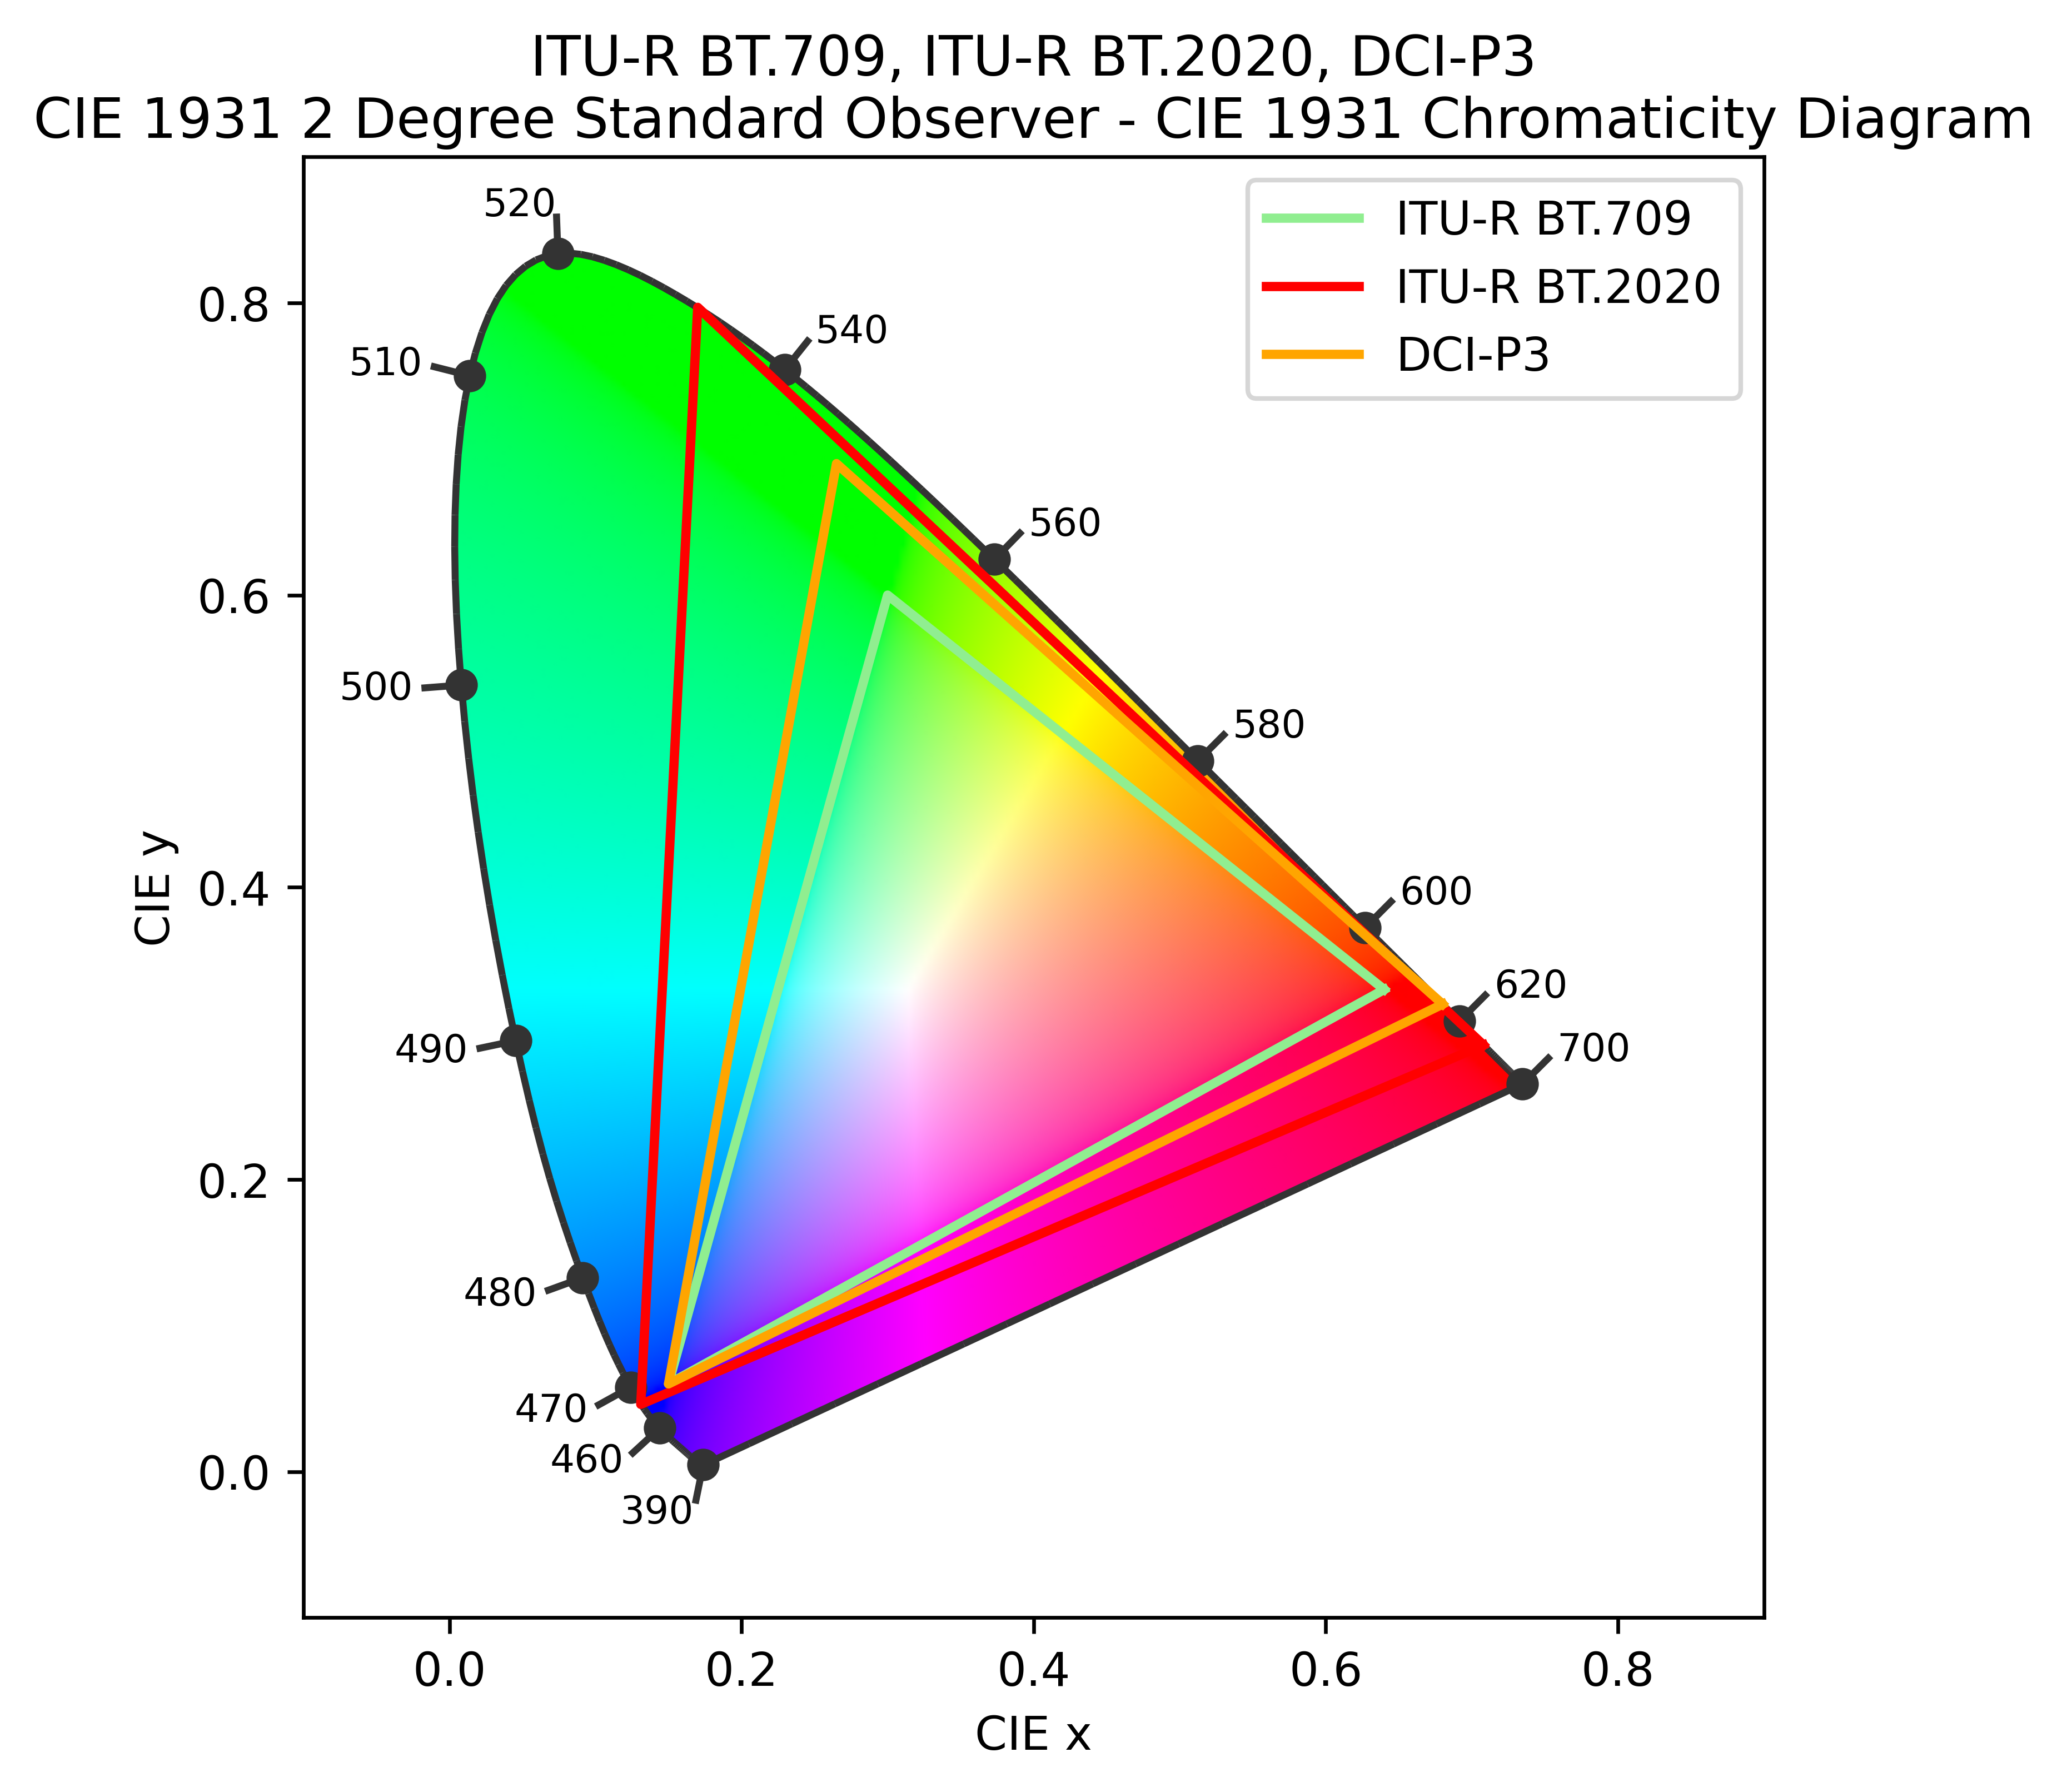

(<Figure size 3300x3300 with 1 Axes>,
 <AxesSubplot:title={'center':'ITU-R BT.709, ITU-R BT.2020, DCI-P3\nCIE 1931 2 Degree Standard Observer - CIE 1931 Chromaticity Diagram'}, xlabel='CIE x', ylabel='CIE y'>)

In [34]:


plot_kwargs = [

    {"color": "lightgreen", "linewidth": 2,"marker": None},

    {"color": "r", "linewidth": 2,"marker": None},

    {"color": "orange", "linewidth": 2,"marker": None},

]

c.plotting.models.plot_RGB_colourspaces_in_chromaticity_diagram(

    ["ITU-R BT.709", "ITU-R BT.2020", "DCI-P3"], show_whitepoints=False, plot_kwargs=plot_kwargs

)

In [ ]:
hlg_ootf([[[1],[1],[1]]],1000)

### LUT Import / Export / Functions

In [3]:
def LUTGamma(LUT): 
    helper = np.zeros(LUT.size)
    for i in range(LUT.size): 
        helper[i] = np.divide(LUT.table[i , i , i].sum(),3)

    return helper

### Spectrum Analysis

In [5]:
def test_spectrum_generator(start=380,stop=780,steps=1):
    steps_spectrum = np.multiply((np.subtract(stop,start)+1),steps)
    wavelengths = np.linspace(start,stop,steps_spectrum)
    amplitude = list(np.random.rand( len(wavelengths) ) )
    dic = {}
    for a,b in zip(wavelengths,amplitude):
        dic[a]=b
    return dic

def test_spectrum_generator_constant(start=380,stop=780,size=1,steps=1):
    steps_spectrum = np.multiply((np.subtract(stop,start)+1),steps)
    wavelengths = np.linspace(start,stop,steps_spectrum)
    amplitude = list(np.ones( len(wavelengths) ) * size)
    dic = {}
    for a,b in zip(wavelengths,amplitude):
        dic[a]=b
    return dic

def spectrum_monitor(dic,steps=35):
    x_values = list(dic.keys())
    y_values = list(dic.values())
    x_min = np.min(x_values)
    x_max = np.max(x_values)
    x_steps = int((len(x_values))/steps)
    x_range = np.linspace(0,len(x_values),x_steps)
    x_content = np.linspace(x_min,x_max,x_steps,dtype=int)
    plt.figure(figsize=(10,10))
    barlist=plt.bar(range(len(dic)), y_values)

    # HSV Rainbow
    HUE = np.linspace(300,0,len(x_values))
    SAT = np.ones(len(x_values))
    VAL = np.ones(len(x_values))/1.5


    HSV = np.dstack((HUE/359,SAT,VAL))
    colors = c.HSV_to_RGB(HSV)
    for i in range(0,len(x_values)):
        colorize = colors[0,i]
        barlist[i].set_color(colorize)
    plt.xticks(x_range,x_content,rotation=20)
    plt.xlabel("Wavelength [nm]")
    plt.ylabel("Scaled Amplitude")
    plt.show()

def spectrum_monitor_with_curves(dic,camera_red,camera_green, camera_blue,steps=35,alp=1):
    x_values = list(dic.keys())
    y_values = list(dic.values())
    plt.figure(figsize=(10,10))
    barlist=plt.bar(x_values, y_values,alpha=alp)

    # HSV Rainbow
    HUE = np.linspace(300,0,len(x_values))
    SAT = np.ones(len(x_values))
    VAL = np.ones(len(x_values))/1.5


    HSV = np.dstack((HUE/359,SAT,VAL))
    colors = c.HSV_to_RGB(HSV)
    for i in range(0,len(x_values)):
        colorize = colors[0,i]
        barlist[i].set_color(colorize)
    
    # Red Filter
    x_values_camera_red = list(camera_red.keys())
    y_values_camera_red = list(camera_red.values())
    plt.plot(x_values_camera_red, y_values_camera_red, color="red")

    # Green Filter
    x_values_camera_green = list(camera_green.keys())
    y_values_camera_green = list(camera_green.values())
    plt.plot(x_values_camera_green, y_values_camera_green, color="green")

    # Blue Filter
    x_values_camera_blue = list(camera_blue.keys())
    y_values_camera_blue = list(camera_blue.values())
    plt.plot(x_values_camera_blue, y_values_camera_blue, color="blue")

    plt.xlabel("Wavelength [nm]")
    plt.ylabel("Scaled Amplitude")
    plt.show()


In [ ]:
# Export Spectral Data to CSV

def store_spectrum_to_csv(data,name):
    with open(name, 'w') as csv_file:  
        writer = csv.writer(csv_file)
        for key, value in data.items():
            writer.writerow([key, value])

In [ ]:
# Import Spectral Data from CSV

def read_line_data_from_csv(name,row_start=0,row_stop=1):
    with open('Mappe1.csv') as csv_file:
        data = csv.reader(csv_file,delimiter=";",)
        for row in list(data)[row_start:row_stop]:
            for i in range(0,len(row)):
                row[i] = float(row[i])
            return row
        return row

In [ ]:
# Import Red, Green, Blue Characteristics from CSV

red_camera_char = read_line_data_from_csv("Mappe1.csv",1,2)
green_camera_char = read_line_data_from_csv("Mappe1.csv",2,3)
blue_camera_char = read_line_data_from_csv("Mappe1.csv",3,4)

In [ ]:
# Build Dictionary From Importet Data
x_counter = np.linspace(400,720,33)

# Red Dict
red_dic = {}
for a,b in zip(x_counter,red_camera_char):
    red_dic[a]=b

# Green Dict
green_dic = {}
for a,b in zip(x_counter,green_camera_char):
    green_dic[a]=b

# Blue Dict
blue_dic = {}
for a,b in zip(x_counter,blue_camera_char):
    blue_dic[a]=b

In [ ]:
test = test_spectrum_generator(400,720,1)
spectrum_monitor_with_curves(test,red_dic,green_dic,blue_dic,80,0.1)

In [ ]:
def LMS_to_XYZ_2_Degree(dic):
    wavelengths = list(dic.keys())
    a = np.zeros((len(wavelengths),1,3))
    for i in range(0,len(wavelengths)):
        a[i,:,:] = c.colorimetry.LMS_2_degree_cmfs_to_XYZ_2_degree_cmfs(wavelengths[i])
    return a

XYZ_array = LMS_to_XYZ_2_Degree(red_dic)

In [ ]:
def XYZ_to_xyY(input):
    return c.XYZ_to_xyY(input)

### Display Plots

In [ ]:
def display_plot_2D(x_value,y_value,table_title="",curve_label="",xaxis_label="",yaxis_label="",color_input="black",grid_value=True):
    fig,ax = plt.subplots(figsize=(5, 5))
    ax.grid(visible=grid_value)
    ax.plot(x_value , y_value, label=curve_label, color=color_input)
    ax.set_title(table_title)
    ax.set_xlabel(xaxis_label)
    ax.set_ylabel(yaxis_label)

In [ ]:
def display_xyY_in_CIE1931(input):
    x_values = input[:,:,0]
    y_values = input[:,:,1]
    Y_values = input[:,:,2]
    plt.scatter(x_values,y_values)

In [ ]:
x = np.linspace(0,1000,330)
y = c.models.eotf_inverse_HLG_BT2100(x,gamma=1.1)

figR,axR = plt.subplots(figsize=(5, 5))
axR.grid(visible=True)
x = np.linspace(0,1,33)



axR.plot(x1 , c.models.eotf_HLG_BT2100(x), label="BT.2100 HLG LB= 0 LW=1000", color='black')
axR.plot(x1 , c.models.eotf_HLG_BT2100(x,0,2000), label="BT.2100 HLG LB= 0 LW=2000", color='blue', linestyle=":")
axR.plot(x1 , c.models.eotf_HLG_BT2100(x,0,4000), label="BT.2100 HLG LB= 0 LW=4000", color='green', linestyle=":")
axR.plot(x1 , c.models.eotf_HLG_BT2100(x,0,10000), label="BT.2100 HLG LB= 0 LW=10000", color='red', linestyle=":")

# invert the colors

axR.set_title('BT.2100 HLG - Variable LW, According Gamma')
axR.set_xlabel('Signal Level')
axR.set_ylabel('Linear Display Luminance [Nits]')
axR.set_ylim(0.05,100) 
axR.vlines(0.75,0,10000,colors='gray')
axR.set_yscale('log', base=10)
axR.legend()
plt.yticks((10000, 4000, 1000, 200, 100, 50, 25, 10, 5, 1, 0.5, 0.25), (10000,4000, 1000, 200, 100, 50, 25, 10, 5, 1, 0.5, 0.25))




In [ ]:

figR,axR = plt.subplots(figsize=(5, 5))
axR.grid(visible=True)
x = np.linspace(0,1,500)



axR.plot(x , c.models.eotf_HLG_BT2100(x), label="BT.2100 HLG LB= 0 LW=1000", color='black')
axR.plot(x , c.models.eotf_HLG_BT2100(x,0,2000), label="BT.2100 HLG LB= 0 LW=2000", color='blue', linestyle=":")
axR.plot(x , c.models.eotf_HLG_BT2100(x,0,4000), label="BT.2100 HLG LB= 0 LW=4000", color='green', linestyle=":")
axR.plot(x , c.models.eotf_HLG_BT2100(x,0,10000), label="BT.2100 HLG LB= 0 LW=10000", color='red', linestyle=":")

# invert the colors

axR.set_title('BT.2100 HLG - Variable LW, According Gamma')
axR.set_xlabel('Signal Level')
axR.set_ylabel('Linear Display Luminance [Nits]')
axR.set_ylim(0.05,25) 
axR.set_xlim(0.0,0.3) 
axR.set_yscale('log', base=10)
axR.legend()
plt.yticks((25, 10, 5, 1, 0.5, 0.25), (25, 10, 5, 1, 0.5, 0.25))




In [ ]:
x = np.linspace(0,1000,330)
y = c.models.eotf_inverse_HLG_BT2100(x,gamma=1.1)

figR,axR = plt.subplots(figsize=(5, 5))
axR.grid(visible=True)
x = np.linspace(0,1,33)



axR.plot(x1 , c.models.eotf_HLG_BT2100(x), label="BT.2100 HLG LB= 0 LW=1000, g=1.2", color='black')
axR.plot(x1 , c.models.eotf_HLG_BT2100(x,0,2000,gamma=1.2), label="BT.2100 HLG LB= 0 LW=2000, g=1.2", color='blue', linestyle=":")
axR.plot(x1 , c.models.eotf_HLG_BT2100(x,0,4000,gamma=1.2), label="BT.2100 HLG LB= 0 LW=4000, g=1.2", color='green', linestyle=":")
axR.plot(x1 , c.models.eotf_HLG_BT2100(x,0,10000,gamma=1.2), label="BT.2100 HLG LB= 0 LW=10000, g=1.2", color='red', linestyle=":")

# invert the colors

axR.set_title('BT.2100 HLG - Variable LW, According Gamma')
axR.set_xlabel('Signal Level')
axR.set_ylabel('Linear Display Luminance [Nits]')
axR.set_ylim(0.05,1000) 
#axR.set_yticks((10000, 4000, 1000))
#axR.set_yticklabels((1000))
axR.vlines(0.75,0,10000,colors='gray')
axR.set_yscale('log', base=10)
axR.legend()
plt.yticks((10000, 4000, 1000, 200, 100, 50, 25, 10, 5, 1, 0.5, 0.25), (10000,4000, 1000, 200, 100, 50, 25, 10, 5, 1, 0.5, 0.25))




In [ ]:
x = np.linspace(0,1000,330)
y = c.models.eotf_inverse_HLG_BT2100(x,gamma=1.1)

figR,axR = plt.subplots(figsize=(5, 5))
axR.grid(visible=True)
x = np.linspace(0,1,33)

axR.plot(x1 , c.models.eotf_HLG_BT2100(x), label="BT.2100 HLG LB= 0 LW=1000", color='black')
axR.plot(x1 , c.models.eotf_HLG_BT2100(x,0,2000,gamma=1.3), label="BT.2100 HLG LB= 0 LW=2000", color='blue', linestyle=":")
axR.plot(x1 , c.models.eotf_HLG_BT2100(x,0,2000), label="BT.2100 HLG LB= 0 LW=4000", color='green', linestyle=":")
axR.plot(x1 , c.models.eotf_HLG_BT2100(x,0,10000), label="BT.2100 HLG LB= 0 LW=10000", color='red', linestyle=":")

c.models.eo

# invert the colors

axR.set_title('BT.2100 HLG - Variable LW, According Gamma')
axR.set_xlabel('Signal Level')
axR.set_ylabel('Linear Display Luminance [Nits]')
axR.set_ylim(0.05,100) 
axR.vlines(0.75,0,10000,colors='gray')
axR.set_yscale('log', base=10)
axR.legend()
plt.yticks((10000, 4000, 1000, 200, 100, 50, 25, 10, 5, 1, 0.5, 0.25), (10000,4000, 1000, 200, 100, 50, 25, 10, 5, 1, 0.5, 0.25))




In [ ]:
x = np.linspace(0,1,330)

figR,axR = plt.subplots(figsize=(5, 5))
axR.grid(visible=True)
x = np.linspace(0,1,300)



axR.plot(x , c.models.oetf_BT709(x), label="BT.709 Encoding", color='black')
axR.plot(x , np.power(x,0.5), label="EXP 0.5 Encoding", color='blue')

# invert the colors

axR.set_title('SDR OETF Encoding')
axR.set_xlabel('Relative Scene Light')
axR.set_ylabel('Video Signal Level')
axR.set_xlim(0,1) 
axR.set_ylim(0,1) 
#axR.set_yscale('log', base=10)
axR.legend()
plt.savefig('01_SDR_OETF_Encoding.png', dpi=600)

In [ ]:
x = np.linspace(0,1,330)

figR,axR = plt.subplots(figsize=(5, 5))
axR.grid(visible=True)
x = np.linspace(0,1,300)

axR.plot(x , c.models.eotf_BT1886(x), label="BT.1886 Decoding", color='black',alpha=0.3)
axR.plot(x , np.power(x,2.4), label="EXP 2.4 Decoding", color='blue',linestyle=":")

# invert the colors

axR.set_title('SDR EOTF Decoding')
axR.set_xlabel('Video Signal Level')
axR.set_ylabel('Linear Display Light')
axR.set_xlim(0,1) 
axR.set_ylim(0,1) 
#axR.set_yscale('log', base=10)
axR.legend()
plt.savefig('02_SDR_EOTF_Decoding.png', dpi=600)

In [ ]:
x = np.linspace(0,1,330)

figR,axR = plt.subplots(figsize=(5, 5))
axR.grid(visible=True)
x = np.linspace(0,1,300)

axR.plot(x , c.models.eotf_BT1886(x)*100, label="BT.1886 Decoding", color='black',alpha=0.3)
axR.plot(x , c.models.eotf_BT1886(x,0.0001,1)*100, label="BT.1886 Decoding Lb=0.01", color='red',alpha=0.8)
axR.plot(x , eotf1886_CRT(x), label="BT.1886 CRT Decoding", color='orange',alpha=0.8)
axR.plot(x , np.power(x,2.4)*100, label="EXP 2.4 Decoding", color='blue',linestyle=":")

# invert the colors

axR.set_title('SDR EOTF Decoding')
axR.set_xlabel('Video Signal Level')
axR.set_ylabel('Linear Display Light')
axR.set_xlim(0,1) 
axR.set_ylim(0,100) 
#axR.set_yscale('log', base=10)
axR.legend()
plt.savefig('02a_SDR_EOTF_Decoding_All.png.png', dpi=600)

In [ ]:
x = np.linspace(0,1,330)

figR,axR = plt.subplots(figsize=(5, 5))
axR.grid(visible=True)
x = np.linspace(0,1,300)

axR.plot(x , c.models.eotf_BT1886(x)*100, label="BT.1886 Decoding", color='black',alpha=0.3)
axR.plot(x , c.models.eotf_BT1886(x,0.0001,1)*100, label="BT.1886 Decoding Lb=0.01", color='red',alpha=0.8)
axR.plot(x , eotf1886_CRT(x), label="BT.1886 CRT Decoding", color='orange',alpha=0.8)
axR.plot(x , np.power(x,2.4)*100, label="EXP 2.4 Decoding", color='blue',linestyle=":")

# invert the colors

axR.set_title('SDR EOTF Decoding')
axR.set_xlabel('Video Signal Level')
axR.set_ylabel('Linear Display Light')
axR.set_xlim(0,0.5) 
axR.set_ylim(0,20) 
#axR.set_yscale('log', base=10)
axR.legend()
plt.savefig('02a_SDR_EOTF_Decoding_Low_Values.png', dpi=600)

In [ ]:
figR,axR = plt.subplots(figsize=(5, 5))
axR.grid(visible=True)
x = np.linspace(0,1,300)

#axR.plot(x , c.models.eotf_BT1886(c.models.oetf_BT709(x))*100, label="BT.709 + BT.1886", color='red', alpha=0.6)
#axR.plot(x , eotf1886_CRT(c.models.oetf_BT709(x)), label="BT.709 + BT.1886 CRT", color='orange', alpha=1)
#axR.plot(x , np.power(c.models.oetf_BT709(x),2.4)*100, label="BT.709 + EXP 2.4", color='blue', alpha=1, linestyle=":")

#axR.plot(x , c.models.eotf_BT1886(np.power(x,0.5))*100, label="EXP 0.5 + BT.1886", color='green')
#axR.plot(x , eotf1886_CRT(np.power(x,0.5)), label="EXP 0.5 + BT.1886 CRT", color='magenta',linestyle=":")
axR.plot(x , np.power(np.power(x,0.5),2.4)*100, label="EXP 0.5 + EXP 2.4", color='black',linestyle=":")

# invert the colors

axR.set_title('SDR - Different OETFs + EOTFs')
axR.set_xlabel('Relative Scene Light')
axR.set_ylabel('Displayed Linear Light [cd/m2]')
axR.set_xlim(0,1) 
axR.set_ylim(0,100) 
#axR.set_yscale('log', base=10)
axR.legend()
plt.savefig('03_SDR_-_EXP0.5_EXP2.4.png', dpi=600)

In [ ]:
figR,axR = plt.subplots(figsize=(20, 20))
axR.grid(visible=True)
x = np.linspace(0,1,300)

axR.plot(x , c.models.eotf_BT1886(c.models.oetf_BT709(x))*100, label="BT.709 + BT.1886", color='red', alpha=0.6)
#axR.plot(x , eotf1886_CRT(c.models.oetf_BT709(x)), label="BT.709 + BT.1886 CRT", color='orange', alpha=1)
#axR.plot(x , np.power(c.models.oetf_BT709(x),2.4)*100, label="BT.709 + EXP 2.4", color='blue', alpha=1, linestyle=":")

#axR.plot(x , c.models.eotf_BT1886(np.power(x,0.5))*100, label="EXP 0.5 + BT.1886", color='green')
#axR.plot(x , eotf1886_CRT(np.power(x,0.5)), label="EXP 0.5 + BT.1886 CRT", color='magenta',linestyle=":")
#axR.plot(x , np.power(np.power(x,0.5),2.4)*100, label="EXP 0.5 + EXP 2.4", color='cyan',linestyle=":")

# invert the colors

axR.set_title('03_SDR_-_Different_OETFs_+_EOTFs')
axR.set_xlabel('Relative Scene Light')
axR.set_ylabel('Displayed Linear Light [cd/m2]')
axR.set_xlim(0,1) 
axR.set_ylim(0,100) 
#axR.set_yscale('log', base=10)
axR.legend()

In [ ]:
figR,axR = plt.subplots(figsize=(5, 5))
axR.grid(visible=True)
x = np.linspace(0,1,300)

axR.plot(x , c.models.eotf_BT1886(c.models.oetf_BT709(x))*100, label="BT.709 + BT.1886", color='red', alpha=0.6)
axR.plot(x , eotf1886_CRT(c.models.oetf_BT709(x)), label="BT.709 + BT.1886 CRT", color='orange', alpha=1)
axR.plot(x , np.power(c.models.oetf_BT709(x),2.4)*100, label="BT.709 + EXP 2.4", color='blue', alpha=1, linestyle=":")

axR.plot(x , c.models.eotf_BT1886(np.power(x,0.5))*100, label="EXP 0.5 + BT.1886", color='green')
axR.plot(x , eotf1886_CRT(np.power(x,0.5)), label="EXP 0.5 + BT.1886 CRT", color='magenta',linestyle=":")
axR.plot(x , np.power(np.power(x,0.5),2.4)*100, label="EXP 0.5 + EXP 2.4", color='black',linestyle=":")

# invert the colors

axR.set_title('SDR - Different OETFs + EOTFs')
axR.set_xlabel('Relative Scene Light')
axR.set_ylabel('Displayed Linear Light [cd/m2]')
axR.set_xlim(0,0.3) 
axR.set_ylim(0,25) 
#axR.set_yscale('log', base=10)
axR.legend()
plt.savefig('03a_SDR_-_Different_OETFs_+_EOTFs_Zoom_Low_Values.png', dpi=600)

In [ ]:
figR,axR = plt.subplots(figsize=(5, 5))
axR.grid(visible=True)
x = np.linspace(0,1,300)

axR.plot(x , c.models.eotf_BT1886(c.models.oetf_BT709(x))*100, label="BT.709 + BT.1886", color='red', alpha=0.6)
axR.plot(x , eotf1886_CRT(c.models.oetf_BT709(x)), label="BT.709 + BT.1886 CRT", color='orange', alpha=1)
axR.plot(x , np.power(c.models.oetf_BT709(x),2.4)*100, label="BT.709 + EXP 2.4", color='blue', alpha=1, linestyle=":")

axR.plot(x , c.models.eotf_BT1886(np.power(x,0.5))*100, label="EXP 0.5 + BT.1886", color='green')
axR.plot(x , eotf1886_CRT(np.power(x,0.5)), label="EXP 0.5 + BT.1886 CRT", color='magenta',linestyle=":")
axR.plot(x , np.power(np.power(x,0.5),2.4)*100, label="EXP 0.5 + EXP 2.4", color='cyan',linestyle=":")

# invert the colors

axR.set_title('SDR - Different OETFs + EOTFs')
axR.set_xlabel('Relative Scene Light')
axR.set_ylabel('Displayed Linear Light [cd/m2]')
axR.set_xlim(0.7,1) 
axR.set_ylim(70,100) 
#axR.set_yscale('log', base=10)
axR.legend()
plt.savefig('03b_SDR_-_Different_OETFs_+_EOTFs_Zoom_High_Values.png', dpi=600)

### Encoding / Decoding Plotting

In [ ]:
figR,axR = plt.subplots(figsize=(5, 5))
axR.grid(visible=True)
x1 = np.linspace(0,1,33)



axR.plot(x1 , c.models.oetf_BT709(x1), label="ARRI4K200 LUT", color='black')

# make the plot transparent
axR.patch.set_alpha(0)

# invert the colors

axR.set_title('BT.709 Encoding')
axR.set_xlabel('Scaled Linear Scene Light')
axR.set_ylabel('Video Level')



In [ ]:
figR,axR = plt.subplots(figsize=(5, 5))
axR.grid(visible=True)
x1 = np.linspace(0,1,33)



axR.plot(x1 , c.models.eotf_BT1886(x1), label="ARRI4K200 LUT", color='black')

# make the plot transparent
axR.patch.set_alpha(0)

# invert the colors

axR.set_title('BT.1886 Decoding')
axR.set_xlabel('Video Level')
axR.set_ylabel('Displayed Linear Light')



In [ ]:
figR,axR = plt.subplots(figsize=(5, 5))
axR.grid(visible=True)
x1 = np.linspace(0,1,33)



axR.plot(x1 , c.models.eotf_BT1886(c.models.oetf_BT709(x1)), label="ARRI4K200 LUT", color='black')

# make the plot transparent
axR.patch.set_alpha(0)

# invert the colors

axR.set_title('BT.709 + BT.1886 OOTF(Look) SDR')
axR.set_xlabel('Relative Scene Light')
axR.set_ylabel('Displayed Linear Light')

In [ ]:
### HLG to SDR Monitoring LUT

def convert_hlg_to_sdr(input,max_lum=1700):
    np.divide ( c.models.eotf_inverse_HLG_BT2100(input,0,max_lum), 2.2555555555555555 )

In [ ]:
split_point = 0
split_point2 = 10000


x100_LUT = c.LUT3D(size=65)
x100_table2 = c.models.eotf_ST2084(x100_LUT.table)

x100_table2 = x100_table2 - 203
x100_table2 = (x100_table2 < split_point) * x100_table2 + (x100_table2 >= split_point) *  ( np. add (np.multiply (np.subtract(x100_table2,split_point) , 7), split_point) )
x100_table2 = np.clip(x100_table2, 0.0, 10000.0)

x10000_stable = c.LUT3D(size=65)
x10000_stable.table = c.models.eotf_inverse_ST2084(x100_table2)

x10000_stable_jm = x10000_stable
c.write_LUT(x10000_stable_jm,f'/Users/justus/Desktop/x10000_stable_HDR_Anteil_jm.cube')


x0 = np.linspace(0,1,65)

figR,axR = plt.subplots(figsize=(10, 10))
axR.grid(visible=True)

axR.plot(c.models.eotf_ST2084(x0),c.models.eotf_ST2084(LUTGamma(x10000_stable)),label="x10000_stable_jm", color="green")
#axR.plot(x0 , Custom_LUT_Gamma, label="with Custom LUT", color="green")
axR.set_title('HDR-PQ-Monitoring in PQ-Project on SDR-Screen')
axR.set_xlabel('HDR PQ Signal')
axR.set_ylabel('HDR PQ Signal')
axR.set_xlim(0,2000)
axR.set_ylim(0,10001)
axR.vlines(203,0,10000)
axR.vlines(1700,0,10000)
axR.hlines(8000,0,10000)
axR.legend()



In [ ]:
c.models.eotf_inverse_ST2084(203)

In [ ]:
split_point = 8000
split_point2 = 10000


x100_LUT = c.LUT3D(size=65)
x100_table2 = c.models.eotf_PQ_BT2100(x100_LUT.table)

x100_table2 = x100_table2 / 203 * 10000
x100_table2 = np.clip(x100_table2, 0.0, 10000.0)

x10000_stable = c.LUT3D(size=65)
x10000_stable.table = c.models.ootf_inverse_PQ_BT2100(x100_table2)

x10000_stable_SDR_InvOOTF_jm = x10000_stable
c.write_LUT(x10000_stable_SDR_InvOOTF_jm,f'/Users/justus/Desktop/x10000_stable_SDR_InvOOTF_jm.cube')

x0 = np.linspace(0,1,65)

figR,axR = plt.subplots(figsize=(10, 10))
axR.grid(visible=True)

axR.plot(c.models.eotf_ST2084(x0),c.models.eotf_ST2084(LUTGamma(x10000_stable)),label="x10000_stable_SDR_jm", color="green")
#axR.plot(x0 , Custom_LUT_Gamma, label="with Custom LUT", color="green")
axR.set_title('HDR-PQ-Monitoring in PQ-Project on SDR-Screen')
axR.set_xlabel('HDR PQ Signal')
axR.set_ylabel('HDR PQ Signal')
axR.set_xlim(0,2000)
axR.set_ylim(0,10001)
axR.vlines(203,0,10000)
axR.vlines(1700,0,10000)
axR.hlines(8000,0,10000)
axR.legend()



In [ ]:
c.models.eotf_PQ_BT2100(1)

In [ ]:
c.models.eotf_inverse_PQ_BT2100(1700)

In [ ]:
split_point = 8000
split_point2 = 10000


x100_LUT = c.LUT3D(size=65)
x100_table2 = c.models.eotf_PQ_BT2100(x100_LUT.table)

x100_table2 = x100_table2 / 203 * 10000
x100_table2 = np.clip(x100_table2, 0.0, 10000.0)

x10000_stable = c.LUT3D(size=65)
x10000_stable.table = c.models.eotf_inverse_PQ_BT2100(x100_table2)

x10000_stable_SDR_InvOOTF_jm = x10000_stable
c.write_LUT(x10000_stable_SDR_InvOOTF_jm,f'/Users/justus/Desktop/x10000_stable_SDR_InvOOTF_jm.cube')

x0 = np.linspace(0,1,65)

figR,axR = plt.subplots(figsize=(10, 10))
axR.grid(visible=True)

axR.plot(c.models.eotf_ST2084(x0),c.models.eotf_ST2084(LUTGamma(x10000_stable)),label="x10000_stable_SDR_jm", color="green")
#axR.plot(x0 , Custom_LUT_Gamma, label="with Custom LUT", color="green")
axR.set_title('HDR-PQ-Monitoring in PQ-Project on SDR-Screen')
axR.set_xlabel('HDR PQ Signal')
axR.set_ylabel('HDR PQ Signal')
axR.set_xlim(0,2000)
axR.set_ylim(0,10001)
axR.vlines(203,0,10000)
axR.vlines(1700,0,10000)
axR.hlines(8000,0,10000)
axR.legend()



In [ ]:
LUT = c.read_LUT(r"/Library/Application Support/Blackmagic Design/DaVinci Resolve/LUT/NBCU/5-NBCU_PQ2SDR_DL_v1.cube")

In [ ]:
for i in range(0,10):
    img = c.read_image(f"/Users/justus/Library/CloudStorage/SynologyDrive-Justus/HdM/AM3_3/Visual Media Lab Conference/Export/0{i}_Illuminating_Your_Images_VMLC_if_jm_Still_HDR.tiff")
    img = LUT.apply(img)
    c.write_image(img,f"/Users/justus/Library/CloudStorage/SynologyDrive-Justus/HdM/AM3_3/Visual Media Lab Conference/Export/0{i}_Illuminating_Your_Images_VMLC_if_jm_Still_SDR.tiff")

In [ ]:
figR,axR = plt.subplots(figsize=(10, 10))
axR.grid(visible=True)
x1 = np.linspace(0,1,100)

axR.plot(x1 , c.models.eotf_ST2084(x1), label="BT.2100 PQ EOTF (SMPTE ST 2084)", color='black')
axR.plot(x1 , c.models.eotf_HLG_BT2100(x1), label="BT.2100 HLG EOTF(=OOTF(OETF^-1)) 1000 Nits Max. Display Lum.", color='red')
axR.plot(x1 , c.models.eotf_HLG_BT2100(x1,0,2000), label="BT.2100 HLG EOTF(=OOTF(OETF^-1)) 2000 Nits Max. Display Luminance", color='green')
axR.plot(x1 , c.models.eotf_HLG_BT2100(x1,0,4000), label="BT.2100 HLG EOTF(=OOTF(OETF^-1)) 4000 Nits Max. Display Luminance", color='blue')
axR.set_title('System Comparison: BT.2100 PQ EOTF // BT.2100 HLG EOTF(=OOTF(OETF^-1))')
axR.set_xlabel('Video Signal')
axR.set_ylabel('Displayed Linear Light')
axR.set_yscale('log')
axR.legend()

In [ ]:
figR,axR = plt.subplots(figsize=(10, 10))
axR.grid(visible=True)
x1 = np.linspace(0,1,33000)

axR.plot(x1 , c.models.eotf_inverse_ST2084(c.models.ootf_PQ_BT2100(x1)), label="BT.2100 PQ OETF(=OETF^-1(OOTF))", color='black')
axR.plot(x1 , c.models.oetf_HLG_BT2100(x1), label="BT.2100 HLG OETF", color='red')
axR.set_title('System Comparison: BT.2100 PQ OETF(=EOTF^-1(OOTF)) // BT.2100 HLG OETF')
axR.set_xlabel('Relative Scene Light')
axR.set_ylabel('Video Signal')
axR.set_xlim(0,1)
axR.set_ylim(0,1)
axR.legend()

In [ ]:
figR,axR = plt.subplots(figsize=(10, 10))
axR.grid(visible=True)
x1 = np.linspace(0,1,33000)

axR.plot(x1 , c.models.ootf_PQ_BT2100(x1), label="BT.2100 PQ OOTF", color='black')
axR.plot(x1 , c.models.eotf_HLG_BT2100(c.models.oetf_HLG_BT2100(x1)), label="BT.2100 HLG OOTF", color='red')
axR.set_title('System Comparison: BT.2100 PQ OOTF // BT.2100 HLG OOTF')
axR.set_xscale('log')
axR.set_yscale('log')
axR.set_xlabel('Relative Scene Light')
axR.set_ylabel('Displayed Linear Light')
axR.legend()

## HLG / PQ / S-Log3

In [ ]:
x0 = np.linspace(0,1,1000)

figR,axR = plt.subplots(figsize=(10, 10))
axR.grid(visible=True)

axR.plot(x0,hlg_oetf(x0),label="ITU-R BT.2100 HLG", color="red")
axR.plot(x0,,label="SMPTE ST 2084", color="blue")
axR.plot(x0,c.models.eotf_ST2084(LUTGamma(x10000_stable)),label="Sony S-Log3", color="green")
axR.plot(x0,c.models.eotf_ST2084(LUTGamma(x10000_stable)),label="ARRI LogC3", color="magenta")
axR.plot(x0,c.models.eotf_ST2084(LUTGamma(x10000_stable)),label="ARRI LogC4", color="orange")

axR.set_title('HDR-PQ-Monitoring in PQ-Project on SDR-Screen')
axR.set_xlabel('HDR PQ Signal')
axR.set_ylabel('HDR PQ Signal')
axR.set_xlim(0,2000)
axR.set_ylim(0,10001)
axR.vlines(203,0,10000)
axR.vlines(1700,0,10000)
axR.hlines(8000,0,10000)
axR.legend()

### 3D Image Analyzer

In [ ]:
c.models.RGB_COLOURSPACE_BT709
c.models.RGB_COLOURSPACE_BT2020
c.models.RGB_COLOURSPACE_DCI_P3
c.models.RGB_COLOURSPACE_S_GAMUT3

In [ ]:
from mpl_toolkits import mplot3d

In [ ]:
from colour.models import (
    RGB_COLOURSPACE_sRGB,
    RGB_COLOURSPACE_PROPHOTO_RGB,
)

In [ ]:
def RGB_to_XYZ_jm(image,Matrix):
    return np.matmul(image,Matrix)

In [ ]:
image = c.read_image('/Users/justus/Desktop/SDR_TEST.tiff')

In [ ]:
transform_XYZ = RGB_to_XYZ_jm(image, Matrix_BT709_XYZ)
plt.imshow(transform_XYZ)

In [ ]:
transform_xyY = c.XYZ_to_xyY(transform_XYZ)
plt.imshow(transform_xyY)

In [ ]:
fig = plt.figure(figsize=(30,30))
fig.suptitle('SDR ANALYSIS')

x = transform_xyY[:,:,0].flatten()
y = transform_xyY[:,:,1].flatten()
z = transform_xyY[:,:,2].flatten()

########################

ax = fig.add_subplot(2, 3, 1, projection='3d')

ax.scatter3D(x, y, z*100, c=z, cmap='Greens')
ax.view_init(0, 0)

ax.set_xlabel('x Coordinate')
ax.set_ylabel('y Coordinate')
ax.set_zlabel('Displayed Linear Light')

ax.set_xlim(0,0.8)
ax.set_ylim(0,0.9)
ax.set_zlim(0,100)

########################

ax = fig.add_subplot(2, 3, 2, projection='3d')

ax.scatter3D(x, y, z*100, c=z, cmap='Greens')
ax.view_init(0, 90)

ax.set_xlabel('x Coordinate')
ax.set_ylabel('y Coordinate')
ax.set_zlabel('Displayed Linear Light')

ax.set_xlim(0,0.8)
ax.set_ylim(0,0.9)
ax.set_zlim(0,100)

########################

ax = fig.add_subplot(2, 3, 3, projection='3d')

ax.scatter3D(x, y, z*100, c=z, cmap='Greens')
ax.view_init(90, -90)

ax.set_xlabel('x Coordinate')
ax.set_ylabel('y Coordinate')
ax.set_zlabel('Displayed Linear Light')

ax.set_xlim(0,0.8)
ax.set_ylim(0,0.9)
ax.set_zlim(0,100)

########################

ax = fig.add_subplot(2, 3, 3, projection='3d')



ax.scatter3D(x, y, z*100, c=z, cmap='Greens')
ax.view_init(-90, -90)

ax.set_xlabel('x Coordinate')
ax.set_ylabel('y Coordinate')
ax.set_zlabel('Displayed Linear Light')

ax.set_xlim(0,0.8)
ax.set_ylim(0,0.9)
ax.set_zlim(0,100)

plt.show()

In [ ]:
fig = plt.figure(figsize=(30,30))
fig.suptitle('SDR ANALYSIS')

x = transform_xyY[:,:,0].flatten()
y = transform_xyY[:,:,1].flatten()
z = transform_xyY[:,:,2].flatten()

########################

ax = fig.add_subplot(2, 3, 1)

ax.scatter(x, z*100)

ax.set_xlabel('x Coordinate')
ax.set_ylabel('Y Coordinate')

ax.set_xlim(0,0.8)
ax.set_ylim(0,100)

########################

ax = fig.add_subplot(2, 3, 2)

ax.scatter(y, z*100)

ax.set_xlabel('y Coordinate')
ax.set_ylabel('Y Coordinate')

ax.set_xlim(0,0.9)
ax.set_ylim(0,100)

########################

ax = fig.add_subplot(2, 3, 3)

ax.scatter(x, y)

ax.set_xlabel('x Coordinate')
ax.set_ylabel('y Coordinate')

ax.set_xlim(0,0.8)
ax.set_ylim(0,0.9)

plt.show()

In [ ]:
c.plotting.plot_RGB_scatter(image, "ITU-R BT.709")

In [ ]:
import aspose.pdf as ap

In [ ]:
from pypdf import PdfWriter
pdf_writer = PdfWriter()

In [ ]:
page = pdf_writer.add_blank_page(width=8.27 * 72, height=11.7 * 72)

In [ ]:
type(page)

In [ ]:
pdf_writer.add_blank_page(width=8.27 * 72, height=11.7 * 72)

In [ ]:
pdf_writer.write("blank.pdf")

In [ ]:
#fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(11.69, 8.27))
gridsize = (12, 8)
img = c.read_image('/Users/justus/Desktop/Label_jm.png')
fig = plt.figure(figsize=(11.69*2, 8.27*2))
ax1 = plt.subplot2grid(gridsize, (0, 2), colspan=1, rowspan=1)
ax1 = plt.imshow(img)

ax2 = plt.subplot2grid(gridsize, (0, 0), colspan=1, rowspan=2)
ax3 = plt.subplot2grid(gridsize, (3, 0))
ax4 = plt.subplot2grid(gridsize, (2, 1))

### Coding HDR SDR Plots 25.06.2023 Matthias

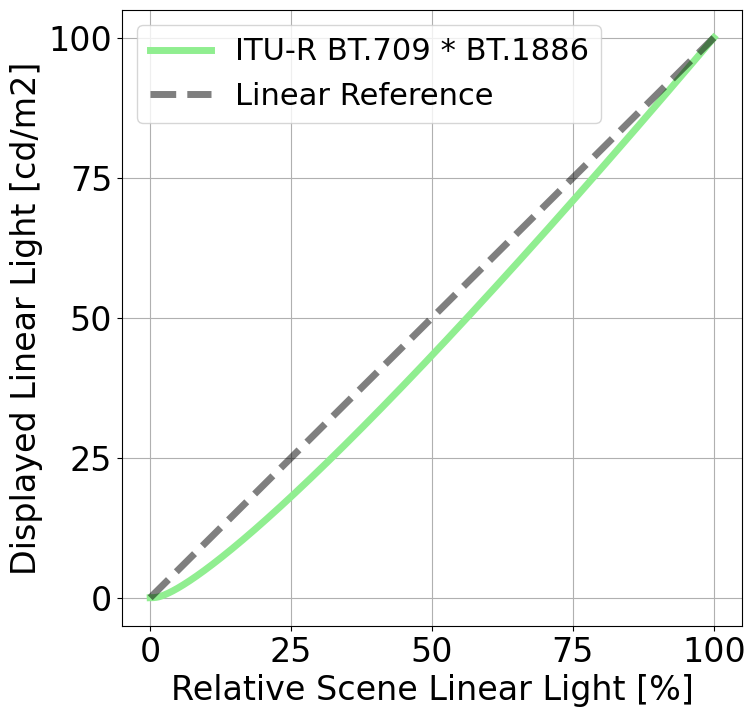

In [39]:
figR,axR = plt.subplots(figsize=(8, 8))
axR.grid(visible=True)
x1 = np.linspace(0,1,1000)

axR.plot(x1*100 , c.models.eotf_BT1886(c.models.oetf_BT709(x1))*100, label="ITU-R BT.709 * BT.1886", color='lightgreen',linewidth=5)
axR.plot(x1*100 , x1*100, label="Linear Reference", color='black', linestyle="dashed", alpha=0.5,linewidth=5)
#axR.plot(x1 , c.models.eotf_HLG_BT2100(x1), label="BT.2100 HLG EOTF(=OOTF(OETF^-1)) 1000 Nits Max. Display Lum.", color='red')
#axR.plot(x1 , c.models.eotf_HLG_BT2100(x1,0,2000), label="BT.2100 HLG EOTF(=OOTF(OETF^-1)) 2000 Nits Max. Display Luminance", color='green')
#axR.plot(x1 , c.models.eotf_HLG_BT2100(x1,0,4000), label="BT.2100 HLG EOTF(=OOTF(OETF^-1)) 4000 Nits Max. Display Luminance", color='blue')
#axR.set_title('System Comparison: SDR OOTF (ITU-R BT.709 * ITU-R BT.1886)')
axR.set_xlabel('Relative Scene Linear Light [%]',fontsize=24)
axR.set_ylabel('Displayed Linear Light [cd/m2]',fontsize=24)
axR.set_xticks([0,25,50,75,100],[0,25,50,75,100],fontsize=24)
axR.set_yticks([0,25,50,75,100],[0,25,50,75,100],fontsize=24)
#axR.set_yscale('log')
axR.legend(fontsize=22)

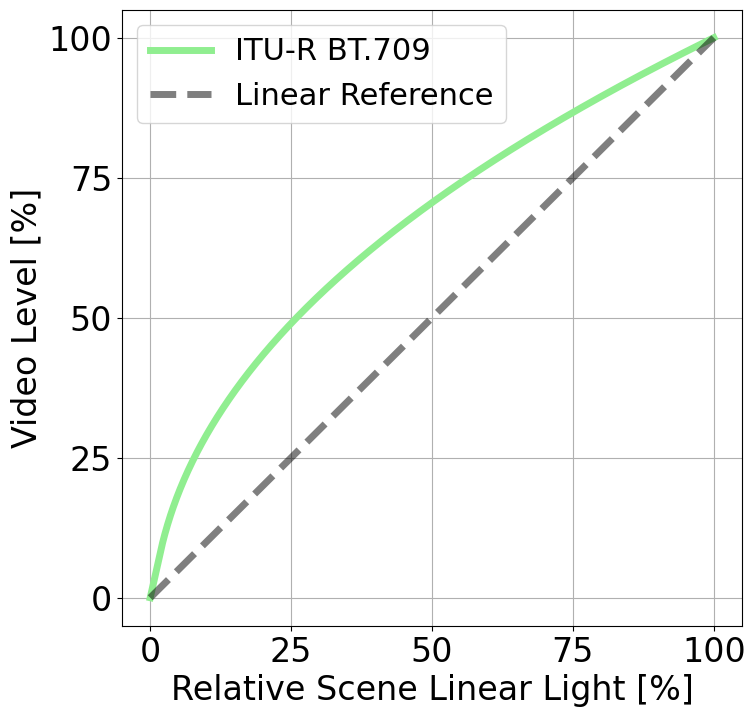

In [43]:
figR,axR = plt.subplots(figsize=(8, 8))
axR.grid(visible=True)
x1 = np.linspace(0,1,1000)

axR.plot(x1*100 , c.models.oetf_BT709(x1)*100, label="ITU-R BT.709", color='lightgreen',linewidth=5)
axR.plot(x1*100, x1*100, label="Linear Reference", color='black', linestyle="dashed", alpha=0.5,linewidth=5)
#axR.plot(x1 , c.models.eotf_HLG_BT2100(x1), label="BT.2100 HLG EOTF(=OOTF(OETF^-1)) 1000 Nits Max. Display Lum.", color='red')
#axR.plot(x1 , c.models.eotf_HLG_BT2100(x1,0,2000), label="BT.2100 HLG EOTF(=OOTF(OETF^-1)) 2000 Nits Max. Display Luminance", color='green')
#axR.plot(x1 , c.models.eotf_HLG_BT2100(x1,0,4000), label="BT.2100 HLG EOTF(=OOTF(OETF^-1)) 4000 Nits Max. Display Luminance", color='blue')
#axR.set_title('System Comparison: SDR OETF (ITU-R BT.709)')
axR.set_xlabel('Relative Scene Linear Light [%]',fontsize=24)
axR.set_ylabel('Video Level [%]',fontsize=24)
axR.set_xticks([0,25,50,75,100],[0,25,50,75,100],fontsize=24)
axR.set_yticks([0,25,50,75,100],[0,25,50,75,100],fontsize=24)
#axR.set_yscale('log')
axR.legend(fontsize=22)

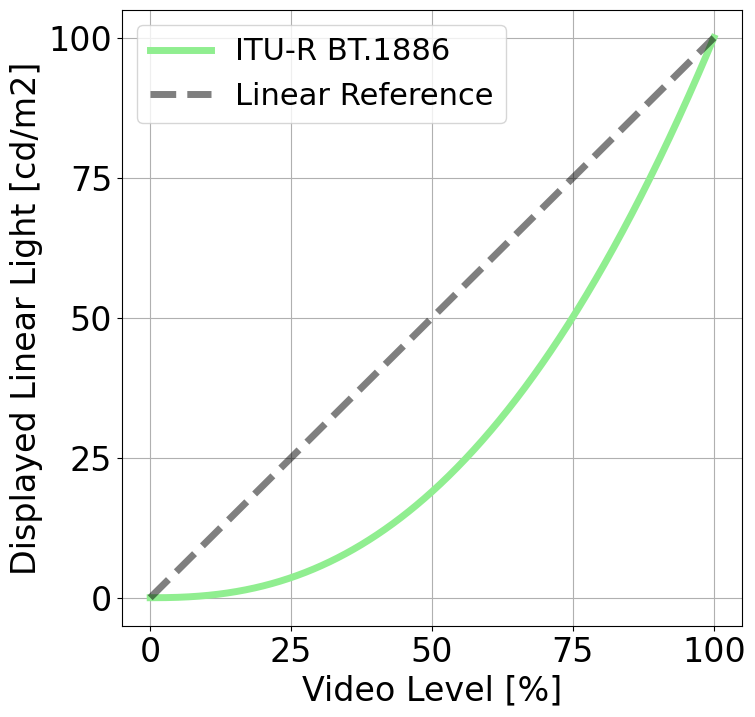

In [44]:
figR,axR = plt.subplots(figsize=(8, 8))
axR.grid(visible=True)
x1 = np.linspace(0,1,1000)

axR.plot(x1*100 , c.models.eotf_BT1886(x1)*100, label="ITU-R BT.1886", color='lightgreen',linewidth=5)
axR.plot(x1*100 , x1*100, label="Linear Reference", color='black', linestyle="dashed", alpha=0.5,linewidth=5)
#axR.plot(x1 , c.models.eotf_HLG_BT2100(x1), label="BT.2100 HLG EOTF(=OOTF(OETF^-1)) 1000 Nits Max. Display Lum.", color='red')
#axR.plot(x1 , c.models.eotf_HLG_BT2100(x1,0,2000), label="BT.2100 HLG EOTF(=OOTF(OETF^-1)) 2000 Nits Max. Display Luminance", color='green')
#axR.plot(x1 , c.models.eotf_HLG_BT2100(x1,0,4000), label="BT.2100 HLG EOTF(=OOTF(OETF^-1)) 4000 Nits Max. Display Luminance", color='blue')
#axR.set_title('System Comparison: SDR EOTF (ITU-R BT.1886)')
axR.set_xlabel('Video Level [%]',fontsize=24)
axR.set_ylabel('Displayed Linear Light [cd/m2]',fontsize=24)
axR.set_xticks([0,25,50,75,100],[0,25,50,75,100],fontsize=24)
axR.set_yticks([0,25,50,75,100],[0,25,50,75,100],fontsize=24)
#axR.set_yscale('log')
axR.legend(fontsize=22)

### SDR (709x1886), HLG (OOTF 1.2), HLG (OOTF 1.1), HLG (OETF-1), PQ (2084), PQ (Referenz OOTF 1.2), S-Log3 (OETF-1), S-Log3 (Sony OOTF)

In [ ]:
figR,axR = plt.subplots(figsize=(8, 8))
axR.grid(visible=True)
x1 = np.linspace(0,1,1000)

axR.plot(x1*100 , c.models.ootf_PQ_BT2100(x1), label="BT.709 * BT.1886 with Extended Input Range", color='darkgreen')
axR.plot(x1*100 , x1*10000, label="Linear Reference", color='black', linestyle="dashed", alpha=0.3)
#axR.plot(x1 , c.models.eotf_HLG_BT2100(x1), label="BT.2100 HLG EOTF(=OOTF(OETF^-1)) 1000 Nits Max. Display Lum.", color='red')
#axR.plot(x1 , c.models.eotf_HLG_BT2100(x1,0,2000), label="BT.2100 HLG EOTF(=OOTF(OETF^-1)) 2000 Nits Max. Display Luminance", color='green')
#axR.plot(x1 , c.models.eotf_HLG_BT2100(x1,0,4000), label="BT.2100 HLG EOTF(=OOTF(OETF^-1)) 4000 Nits Max. Display Luminance", color='blue')
axR.set_title('System Comparison: BT.2100 HDR PQ OOTF (BT.709 * BT.1886)')
axR.set_xlabel('Relative Scene Linear Light [%]')
axR.set_ylabel('Displayed Linear Light [cd/m2 (Nits)]')
axR.hlines(1000,0,100,color='darkred', linestyle="dashed", alpha=0.3)
axR.text(80.5,1100,'1000 Nits Limit',color='darkred', alpha=0.3)
#axR.set_yscale('log')
axR.legend()

In [ ]:
figR,axR = plt.subplots(figsize=(8, 8))
axR.grid(visible=True)
x1 = np.linspace(0,1,100000)

axR.plot(x1*100 , c.models.ootf_PQ_BT2100(x1), label="BT.709 * BT.1886 with Extended Input Range", color='darkgreen')
axR.plot(x1*100 , x1*10000, label="Linear Reference", color='black', linestyle="dashed", alpha=0.3)
#axR.plot(x1 , c.models.eotf_HLG_BT2100(x1), label="BT.2100 HLG EOTF(=OOTF(OETF^-1)) 1000 Nits Max. Display Lum.", color='red')
#axR.plot(x1 , c.models.eotf_HLG_BT2100(x1,0,2000), label="BT.2100 HLG EOTF(=OOTF(OETF^-1)) 2000 Nits Max. Display Luminance", color='green')
#axR.plot(x1 , c.models.eotf_HLG_BT2100(x1,0,4000), label="BT.2100 HLG EOTF(=OOTF(OETF^-1)) 4000 Nits Max. Display Luminance", color='blue')
axR.set_title('System Comparison: BT.2100 HDR PQ OOTF (BT.709 * BT.1886)')
axR.set_xlabel('Relative Scene Linear Light [%]')
axR.set_ylabel('Displayed Linear Light [cd/m2 (Nits)]')
axR.set_xscale('log')
axR.set_yscale('log')
axR.set_xlim(0.001,100)
axR.set_ylim(0.1,10000)
axR.set_xticks([0.001,0.01,0.1,1,10,100],[0.001,0.01,0.1,1,10,100])
axR.set_yticks([0.001,0.01,0.1,1,10,100,1000,10000],[0.001,0.01,0.1,1,10,100,1000,10000])
axR.hlines(1000,0,100,color='darkred', linestyle="dashed", alpha=0.3)
axR.text(80.5,1100,'1000 Nits Limit',color='darkred', alpha=0.3)
#axR.set_yscale('log')
axR.legend()

In [ ]:
figR,axR = plt.subplots(figsize=(8, 8))
axR.grid(visible=True)
x1 = np.linspace(0,1,100000)

axR.plot(x1*59.5208 , c.models.ootf_PQ_BT2100(x1), label="BT.709 * BT.1886 with Extended Input Range", color='darkgreen')
axR.plot(x1 , c.models.eotf_BT1886(c.models.oetf_BT709(x1))*100, label="BT.709 * BT.1886", color='lightgreen')
axR.set_title('System Comparison: HDR PQ OOTF vs. SDR OOTF')
axR.set_xlabel('Relative Scene Linear Light [%]')
axR.set_ylabel('Displayed Linear Light [cd/m2 (Nits)]')
axR.set_xscale('log')
axR.set_yscale('log')
axR.set_xlim(0.001,100)
axR.set_ylim(0.001,10000)
axR.set_xticks([0.001,0.01,0.1,1,10,100],[0.1,1,10,100,1000,10000])
axR.set_yticks([0.001,0.01,0.1,1,10,100,1000,10000],[0.001,0.01,0.1,1,10,100,1000,10000])
axR.hlines(1000,0.00205,100,color='darkred', linestyle="dashed", alpha=0.4)
axR.text(13,1100,'1000 Nits',color='darkred', alpha=0.5)

axR.hlines(100,0,1,color='black', linestyle="dashed",alpha=0.3)
axR.vlines(1,0,100,color='black', linestyle="dashed",alpha=0.3)

axR.hlines(0.0011,0,1,color='lightgreen', linewidth=10.0,alpha=0.3)
axR.hlines(0.0011,1,59.5208,color='darkgreen', linewidth=10.0,alpha=0.3)

axR.vlines(0.0011,0,100,color='lightgreen', linewidth=10.0,alpha=0.3)
axR.vlines(0.0011,100,10000,color='darkgreen', linewidth=10.0,alpha=0.3)

axR.vlines(59.5208,0,10000,color='darkgreen', linestyle="dashed", alpha=0.4)
axR.text(46,0.013,'5952.08 %',color='darkgreen', alpha=0.5,rotation=90)

axR.text(3.3,0.0015,'5.89532 Stops',color='darkgreen', alpha=0.5)
axR.text(0.0014,190,'6.6429 Stops',color='darkgreen', alpha=0.5,rotation=90)

axR.legend()

In [ ]:
figR,axR = plt.subplots(figsize=(8, 8))
axR.grid(visible=True)
x1 = np.linspace(0,1,1000)

axR.plot(x1*100 , c.models.eotf_inverse_ST2084(c.models.eotf_ST2084(x1))*10000, label="ST 2084 PQ EOTF^-1 * EOTF", color='darkgreen')
axR.plot(x1*100 , x1*10000, label="Linear Reference", color='black', linestyle="dashed", alpha=0.3)
#axR.plot(x1 , c.models.eotf_HLG_BT2100(x1), label="BT.2100 HLG EOTF(=OOTF(OETF^-1)) 1000 Nits Max. Display Lum.", color='red')
#axR.plot(x1 , c.models.eotf_HLG_BT2100(x1,0,2000), label="BT.2100 HLG EOTF(=OOTF(OETF^-1)) 2000 Nits Max. Display Luminance", color='green')
#axR.plot(x1 , c.models.eotf_HLG_BT2100(x1,0,4000), label="BT.2100 HLG EOTF(=OOTF(OETF^-1)) 4000 Nits Max. Display Luminance", color='blue')
axR.set_title('System Comparison: ST 2084 PQ EOTF^-1 * EOTF')
axR.set_xlabel('Relative Scene Linear Light [%]')
axR.set_ylabel('Displayed Linear Light [cd/m2 (Nits)]')
axR.hlines(1000,0,100,color='darkred', linestyle="dashed", alpha=0.3)
axR.text(80.5,1100,'1000 Nits Limit',color='darkred', alpha=0.3)
#axR.set_yscale('log')
axR.legend()

In [ ]:
figR,axR = plt.subplots(figsize=(8, 8))
axR.grid(visible=True)
x1 = np.linspace(0,1,1000)

axR.plot(x1*100 , c.models.ootf_PQ_BT2100(x1), label="BT.709 * BT.1886 with Extended Input Range", color='darkgreen')
axR.plot(x1*100 , c.models.ootf_HLG_BT2100(x1,0,1000)*10, label="HLG OOTF", color='darkred')
axR.plot(x1*100 , x1*10000, label="Linear Reference", color='black', linestyle="dashed", alpha=0.3)
#axR.plot(x1 , c.models.eotf_HLG_BT2100(x1), label="BT.2100 HLG EOTF(=OOTF(OETF^-1)) 1000 Nits Max. Display Lum.", color='red')
#axR.plot(x1 , c.models.eotf_HLG_BT2100(x1,0,2000), label="BT.2100 HLG EOTF(=OOTF(OETF^-1)) 2000 Nits Max. Display Luminance", color='green')
#axR.plot(x1 , c.models.eotf_HLG_BT2100(x1,0,4000), label="BT.2100 HLG EOTF(=OOTF(OETF^-1)) 4000 Nits Max. Display Luminance", color='blue')
axR.set_title('System Comparison: BT.2100 HDR PQ OOTF (BT.709 * BT.1886)')
axR.set_xlabel('Relative Scene Linear Light [%]')
axR.set_ylabel('Displayed Linear Light [cd/m2 (Nits)]')
axR.hlines(1000,0,100,color='darkred', linestyle="dashed", alpha=0.3)
axR.text(80.5,1100,'1000 Nits Limit',color='darkred', alpha=0.3)
#axR.set_yscale('log')
axR.set_xlim(0,100)
axR.set_ylim(0.001,10000)
axR.legend()

### LUT Creation Kolloquium Master AM3 Ton

In [ ]:
NBCU_LUT_NO5 =  c.read_LUT('/Library/Application Support/Blackmagic Design/DaVinci Resolve/LUT/NBCU/5-NBCU_PQ2SDR_DL_v1.cube')
WCG_to_SCG_LUT = c.read_LUT('/Library/Application Support/Blackmagic Design/DaVinci Resolve/LUT/Justus/gmLUT_Rec2020_to_Rec709_WmindE-LCh-1-1.5-0.8_in_ICtCp_33.cube')


In [ ]:
from numpy.typing import _96Bit
# 42346
split_point = 0
split_point2 = 0.05
split_point3 = 0.15
split_point4 = 0.3
split_point5 = 0.5
split_point6 = 0.82
split_point7 = 0.88
split_point8 = 0.97

def x100_streched_def(x):
    y1 = (x < split_point) * np.power (x, 1) + (x >= split_point) *  ( np. add (np.multiply (np.subtract(x,split_point) , 0.5), split_point) )
    y2 = (y1 < split_point2) * y1 + (y1 >= split_point2) *  ( np. add (np.multiply (np.subtract(y1,split_point2) , 1.6), split_point2) )
    y3 = (y2 < split_point3) * y2 + (y2 >= split_point3) *  ( np. add (np.multiply (np.subtract(y2,split_point3) , 1.7), split_point3) )
    y4 = (y3 < split_point4) * y3 + (y3 >= split_point4) *  ( np. add (np.multiply (np.subtract(y3,split_point4) , 2), split_point4) )
    y5 = (y4 < split_point5) * y4 + (y4 >= split_point5) *  ( np. add (np.multiply (np.subtract(y4,split_point5) , 1.4), split_point5) )
    y6 = (y5 < split_point6) * y5 + (y5 >= split_point6) *  ( np. add (np.multiply (np.subtract(y5,split_point6) , 1.3), split_point6) )
    y7 = (y6 < split_point7) * y6 + (y6 >= split_point7) *  ( np. add (np.multiply (np.subtract(y6,split_point7) , 0.25), split_point7) )
    y8 = (y7 < split_point8) * y7 + (y7 >= split_point8) *  ( np. add (np.multiply (np.subtract(y7,split_point8) , 0.14), split_point8) )
    y9 = np.clip(y8, 0.0, 1.0)
    return y9

Container = c.LUT3D(size=33)
NBCU_modified = Container.table
#NBCU_modified = NBCU_LUT_NO5.table
NBCU_modified = x100_streched_def(NBCU_modified)
NBCU_jm = c.LUT3D(size=33)
NBCU_jm.table = NBCU_modified

c.write_LUT(NBCU_jm,'/Users/justus/Desktop/20230625_x1_NBCU_jm.cube')

x0 = np.linspace(0,1,33)

figR,axR = plt.subplots(figsize=(5, 5))
axR.grid(visible=True)

axR.plot(x0 , LUTGamma(NBCU_LUT_NO5), label="NBCU_LUT_NO5", color="black", alpha=1)
axR.plot(x0 , LUTGamma(NBCU_jm), label="NBCU_jm", color="red", alpha = 1)
#axR.plot(x0 , Custom_LUT_Gamma, label="with Custom LUT", color="green")
axR.set_title('LUT HDR SDR Comparison')
axR.set_xlabel('Video Level')
axR.set_ylabel('Video Level')
axR.vlines(0.5,0,1, color="blue", alpha=0.5)
axR.vlines(0.75,0,1, color="blue", alpha=0.5)
axR.hlines(0.9,0,1, color="orange", alpha=0.5)
axR.hlines(0.75,0,1, color="blue", alpha=0.5)
axR.legend()

In [ ]:
image = NBCU_jm.table
c.LUT3D.apply(WCG_to_SCG_LUT,image)
c.write_LUT(NBCU_jm,'/Users/justus/Desktop/20230625_x1_NBCU_jm_cc.cube')

In [ ]:
from numpy.typing import _96Bit
# 42346
split_point = 0
split_point2 = 0.05
split_point3 = 0.15
split_point4 = 0.3
split_point5 = 0.5
split_point6 = 0.75
split_point7 = 0.9
split_point8 = 0.97

def x100_streched_def(x):
    y1 = (x < split_point) * np.power (x, 1) + (x >= split_point) *  ( np. add (np.multiply (np.subtract(x,split_point) , 0.5), split_point) )
    y2 = (y1 < split_point2) * y1 + (y1 >= split_point2) *  ( np. add (np.multiply (np.subtract(y1,split_point2) , 1.7), split_point2) )
    y3 = (y2 < split_point3) * y2 + (y2 >= split_point3) *  ( np. add (np.multiply (np.subtract(y2,split_point3) , 1.6), split_point3) )
    y4 = (y3 < split_point4) * y3 + (y3 >= split_point4) *  ( np. add (np.multiply (np.subtract(y3,split_point4) , 1.9), split_point4) )
    y5 = (y4 < split_point5) * y4 + (y4 >= split_point5) *  ( np. add (np.multiply (np.subtract(y4,split_point5) , 0.9), split_point5) )
    y6 = (y5 < split_point6) * y5 + (y5 >= split_point6) *  ( np. add (np.multiply (np.subtract(y5,split_point6) , 1.3), split_point6) )
    y7 = (y6 < split_point7) * y6 + (y6 >= split_point7) *  ( np. add (np.multiply (np.subtract(y6,split_point7) , 0.25), split_point7) )
    y8 = (y7 < split_point8) * y7 + (y7 >= split_point8) *  ( np. add (np.multiply (np.subtract(y7,split_point8) , 0.14), split_point8) )
    y9 = np.clip(y8, 0.0, 1.0)
    return y9

Container = c.LUT3D(size=33)
NBCU_modified = Container.table
#NBCU_modified = NBCU_LUT_NO5.table
NBCU_modified = x100_streched_def(NBCU_modified)
NBCU_jm = c.LUT3D(size=33)
NBCU_jm.table = NBCU_modified

c.write_LUT(NBCU_jm,'/Users/justus/Desktop/20230625_x1_NBCU_jm_flatten.cube')

x0 = np.linspace(0,1,33)

figR,axR = plt.subplots(figsize=(5, 5))
axR.grid(visible=True)

axR.plot(x0 , LUTGamma(NBCU_LUT_NO5), label="NBCU_LUT_NO5", color="black", alpha=1)
axR.plot(x0 , LUTGamma(NBCU_jm), label="NBCU_jm", color="red", alpha = 1)
#axR.plot(x0 , Custom_LUT_Gamma, label="with Custom LUT", color="green")
axR.set_title('LUT HDR SDR Comparison')
axR.set_xlabel('Video Level')
axR.set_ylabel('Video Level')
axR.vlines(0.5,0,1, color="blue", alpha=0.5)
axR.vlines(0.75,0,1, color="blue", alpha=0.5)
axR.hlines(0.9,0,1, color="orange", alpha=0.5)
axR.hlines(0.75,0,1, color="blue", alpha=0.5)
axR.legend()

In [ ]:
print(c.models.eotf_inverse_PQ_BT2100(10000))

In [ ]:
sdr_img = c.read_image(f"/Users/justus/Desktop/SDR_TEST_STILL.png")
hdr_img = c.read_image(f"/Users/justus/Desktop/HDR_TEST_STILL.png")

# Convert the SDR image to linear light from 0 to 100 cd/m2 SDR RANGE
sdr_img = c.models.eotf_BT1886(sdr_img) * 100

# Inverse of the Perceptual Quantizer (PQ) transfer function to put linear light from 0 to 100 in HDR CONTAINER expecting linear light from 0 to 10000
sdr_img_hdr = c.models.eotf_inverse_PQ_BT2100(sdr_img)

# Display the converted SDR and original HDR images side by side using matplotlib
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(sdr_img_hdr)
axes[0].set_title("Converted SDR to HDR Image")
axes[0].axis("off")

axes[1].imshow(hdr_img)
axes[1].set_title("Original HDR Image")
axes[1].axis("off")

plt.show()

In [ ]:
sdr_img = c.read_image(f"/Users/justus/Desktop/SDR_TEST_STILL.png")
hdr_img = c.read_image(f"/Users/justus/Desktop/HDR_TEST_STILL.png")

Container_LUT = c.read_LUT(f"/Library/Application Support/Blackmagic Design/DaVinci Resolve/LUT/NBCU/4-NBCU_SDR2PQ_DL_v1.cube")

# Apply NBCU LUT No.4 to put SDR IMAGE in HDR CONTAINER preserving 709 Color Space - Diffuse White @ 203 Nits 
sdr_img_hdr_container_203 = c.LUT3D.apply(Container_LUT,sdr_img)

# Reduce HDR Signal of sdr_img by half to set Diffuse White from 203 to 101.15 (100) Nits to set comparable SDR Monitor Limitations
sdr_img_linear = c.models.eotf_ST2084(sdr_img_hdr_container_203)
sdr_img_linear_100 = np.divide(sdr_img_linear,2)
sdr_img_hdr_container_203 = c.models.eotf_inverse_ST2084(sdr_img_linear_100)

# Display the converted SDR and original HDR images side by side using matplotlib
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(sdr_img_hdr_container_203)
axes[0].set_title("Converted SDR to HDR Image")
axes[0].axis("off")

axes[1].imshow(hdr_img)
axes[1].set_title("Original HDR Image")
axes[1].axis("off")

plt.show()

In [ ]:
figR,axR = plt.subplots(figsize=(8, 8))
axR.grid(visible=True)
x1 = np.linspace(0,1,1000)

axR.plot(x1, c.models.eotf_PQ_BT2100(x1), label="BT.709 * BT.1886 with Extended Input Range", color='darkgreen')
axR.plot(x1, c.models.eotf_ST2084(x1), label="HLG OOTF", color='darkred',alpha=0.2)
#axR.plot(x1 , c.models.eotf_HLG_BT2100(x1), label="BT.2100 HLG EOTF(=OOTF(OETF^-1)) 1000 Nits Max. Display Lum.", color='red')
#axR.plot(x1 , c.models.eotf_HLG_BT2100(x1,0,2000), label="BT.2100 HLG EOTF(=OOTF(OETF^-1)) 2000 Nits Max. Display Luminance", color='green')
#axR.plot(x1 , c.models.eotf_HLG_BT2100(x1,0,4000), label="BT.2100 HLG EOTF(=OOTF(OETF^-1)) 4000 Nits Max. Display Luminance", color='blue')
axR.set_title('System Comparison: BT.2100 HDR PQ OOTF (BT.709 * BT.1886)')
axR.set_xlabel('Relative Scene Linear Light [%]')
axR.set_ylabel('Displayed Linear Light [cd/m2 (Nits)]')
#axR.set_yscale('log')
axR.legend()

In [4]:
## Different HLG Looks in ST 2084 Container

HLG_100 = c.LUT3D(size=65)
HLG_200 = c.LUT3D(size=65)
HLG_400 = c.LUT3D(size=65)
HLG_800 = c.LUT3D(size=65)
HLG_1000 = c.LUT3D(size=65)
HLG_2000 = c.LUT3D(size=65)
HLG_4000 = c.LUT3D(size=65)

LUTGamma(HLG_100)

HLG_100.table = c.models.eotf_HLG_BT2100(HLG_100.table,0,100)
HLG_100.table = np.nan_to_num(HLG_100.table)
HLG_100.table = c.models.eotf_inverse_ST2084(HLG_100.table)

HLG_200.table = c.models.eotf_HLG_BT2100(HLG_200.table,0,200)
HLG_200.table = np.nan_to_num(HLG_200.table)
HLG_200.table = c.models.eotf_inverse_ST2084(HLG_200.table)

HLG_400.table = c.models.eotf_HLG_BT2100(HLG_400.table,0,400)
HLG_400.table = np.nan_to_num(HLG_400.table)
HLG_400.table = c.models.eotf_inverse_ST2084(HLG_400.table)

HLG_800.table = c.models.eotf_HLG_BT2100(HLG_800.table,0,800)
HLG_800.table = np.nan_to_num(HLG_800.table)
HLG_800.table = c.models.eotf_inverse_ST2084(HLG_800.table)

HLG_1000.table = c.models.eotf_HLG_BT2100(HLG_1000.table,0,1000)
HLG_1000.table = np.nan_to_num(HLG_1000.table)
HLG_1000.table = c.models.eotf_inverse_ST2084(HLG_1000.table)

HLG_2000.table = c.models.eotf_HLG_BT2100(HLG_2000.table,0,2000)
HLG_2000.table = np.nan_to_num(HLG_2000.table)
HLG_2000.table = c.models.eotf_inverse_ST2084(HLG_2000.table)

HLG_4000.table = c.models.eotf_HLG_BT2100(HLG_4000.table,0,4000)
HLG_4000.table = np.nan_to_num(HLG_4000.table)
HLG_4000.table = c.models.eotf_inverse_ST2084(HLG_4000.table)

# c.write_LUT(HLG_100,'/Users/justus/Desktop/20230706_x1_PQ_Containered_HLG_100_Nits_PDL.cube')
# c.write_LUT(HLG_200,'/Users/justus/Desktop/20230706_x1_PQ_Containered_HLG_200_Nits_PDL.cube')
# c.write_LUT(HLG_400,'/Users/justus/Desktop/20230706_x1_PQ_Containered_HLG_400_Nits_PDL.cube')
# c.write_LUT(HLG_800,'/Users/justus/Desktop/20230706_x1_PQ_Containered_HLG_800_Nits_PDL.cube')
# c.write_LUT(HLG_1000,'/Users/justus/Desktop/20230706_x1_PQ_Containered_HLG_1000_Nits_PDL.cube')
# c.write_LUT(HLG_2000,'/Users/justus/Desktop/20230706_x1_PQ_Containered_HLG_2000_Nits_PDL.cube')
# c.write_LUT(HLG_4000,'/Users/justus/Desktop/20230706_x1_PQ_Containered_HLG_4000_Nits_PDL.cube')

/Users/justus/.local/lib/python3.9/site-packages/colour/models/rgb/transfer_functions/itur_bt_2100.py:1246: RuntimeWarning: divide by zero encountered in power
  R_D = alpha * R_S * np.abs(Y_S) ** (gamma - 1)
/Users/justus/.local/lib/python3.9/site-packages/colour/models/rgb/transfer_functions/itur_bt_2100.py:1246: RuntimeWarning: invalid value encountered in multiply
  R_D = alpha * R_S * np.abs(Y_S) ** (gamma - 1)
/Users/justus/.local/lib/python3.9/site-packages/colour/models/rgb/transfer_functions/itur_bt_2100.py:1247: RuntimeWarning: divide by zero encountered in power
  G_D = alpha * G_S * np.abs(Y_S) ** (gamma - 1)
/Users/justus/.local/lib/python3.9/site-packages/colour/models/rgb/transfer_functions/itur_bt_2100.py:1247: RuntimeWarning: invalid value encountered in multiply
  G_D = alpha * G_S * np.abs(Y_S) ** (gamma - 1)
/Users/justus/.local/lib/python3.9/site-packages/colour/models/rgb/transfer_functions/itur_bt_2100.py:1248: RuntimeWarning: divide by zero encountered in power


In [5]:
## Different HLG Looks in ST 2084 Container

HLG_10_Scaled = c.LUT3D(size=65)
HLG_100_Scaled = c.LUT3D(size=65)
HLG_200_Scaled = c.LUT3D(size=65)
HLG_400_Scaled = c.LUT3D(size=65)
HLG_800_Scaled = c.LUT3D(size=65)
HLG_1000_Scaled = c.LUT3D(size=65)
HLG_2000_Scaled = c.LUT3D(size=65)
HLG_4000_Scaled = c.LUT3D(size=65)

LUTGamma(HLG_100_Scaled)

HLG_10_Scaled.table = c.models.eotf_HLG_BT2100(HLG_1000_Scaled.table,0,1000)

HLG_100_Scaled.table = HLG_10_Scaled.table / 10
HLG_100_Scaled.table = np.nan_to_num(HLG_100_Scaled.table)
HLG_100_Scaled.table = c.models.eotf_inverse_ST2084(HLG_100_Scaled.table)

HLG_200_Scaled.table = HLG_10_Scaled.table / 5
HLG_200_Scaled.table = np.nan_to_num(HLG_200_Scaled.table)
HLG_200_Scaled.table = c.models.eotf_inverse_ST2084(HLG_200_Scaled.table)

HLG_400_Scaled.table = HLG_10_Scaled.table / 2.5
HLG_400_Scaled.table = np.nan_to_num(HLG_400_Scaled.table)
HLG_400_Scaled.table = c.models.eotf_inverse_ST2084(HLG_400_Scaled.table)

HLG_800_Scaled.table = HLG_10_Scaled.table / 1.25
HLG_800_Scaled.table = np.nan_to_num(HLG_800_Scaled.table)
HLG_800_Scaled.table = c.models.eotf_inverse_ST2084(HLG_800_Scaled.table)

HLG_1000_Scaled.table = HLG_10_Scaled.table / 1
HLG_1000_Scaled.table = np.nan_to_num(HLG_1000_Scaled.table)
HLG_1000_Scaled.table = c.models.eotf_inverse_ST2084(HLG_1000_Scaled.table)

HLG_2000_Scaled.table = np.multiply(HLG_10_Scaled.table,2)
HLG_2000_Scaled.table = np.nan_to_num(HLG_2000_Scaled.table)
HLG_2000_Scaled.table = c.models.eotf_inverse_ST2084(HLG_2000_Scaled.table)

HLG_4000_Scaled.table = np.multiply(HLG_10_Scaled.table,4)
HLG_4000_Scaled.table = np.nan_to_num(HLG_4000_Scaled.table)
HLG_4000_Scaled.table = c.models.eotf_inverse_ST2084(HLG_4000_Scaled.table)

# c.write_LUT(HLG_100_Scaled,'/Users/justus/Desktop/20230706_x1_PQ_Containered_HLG_1000_Gained_To_100_Nits_PDL.cube')
# c.write_LUT(HLG_200_Scaled,'/Users/justus/Desktop/20230706_x1_PQ_Containered_HLG_1000_Gained_To_200_Nits_PDL.cube')
# c.write_LUT(HLG_400_Scaled,'/Users/justus/Desktop/20230706_x1_PQ_Containered_HLG_1000_Gained_To_400_Nits_PDL.cube')
# c.write_LUT(HLG_800_Scaled,'/Users/justus/Desktop/20230706_x1_PQ_Containered_HLG_1000_Gained_To_800_Nits_PDL.cube')
# c.write_LUT(HLG_1000_Scaled,'/Users/justus/Desktop/20230706_x1_PQ_Containered_HLG_1000_Gained_To_1000_Nits_PDL.cube')
# c.write_LUT(HLG_2000_Scaled,'/Users/justus/Desktop/20230706_x1_PQ_Containered_HLG_1000_Gained_To_2000_Nits_PDL.cube')
# c.write_LUT(HLG_4000_Scaled,'/Users/justus/Desktop/20230706_x1_PQ_Containered_HLG_1000_Gained_To_4000_Nits_PDL.cube')

[ 0.        0.015625  0.03125   0.046875  0.0625    0.078125  0.09375
  0.109375  0.125     0.140625  0.15625   0.171875  0.1875    0.203125
  0.21875   0.234375  0.25      0.265625  0.28125   0.296875  0.3125
  0.328125  0.34375   0.359375  0.375     0.390625  0.40625   0.421875
  0.4375    0.453125  0.46875   0.484375  0.5       0.515625  0.53125
  0.546875  0.5625    0.578125  0.59375   0.609375  0.625     0.640625
  0.65625   0.671875  0.6875    0.703125  0.71875   0.734375  0.75
  0.765625  0.78125   0.796875  0.8125    0.828125  0.84375   0.859375
  0.875     0.890625  0.90625   0.921875  0.9375    0.953125  0.96875
  0.984375  1.      ]


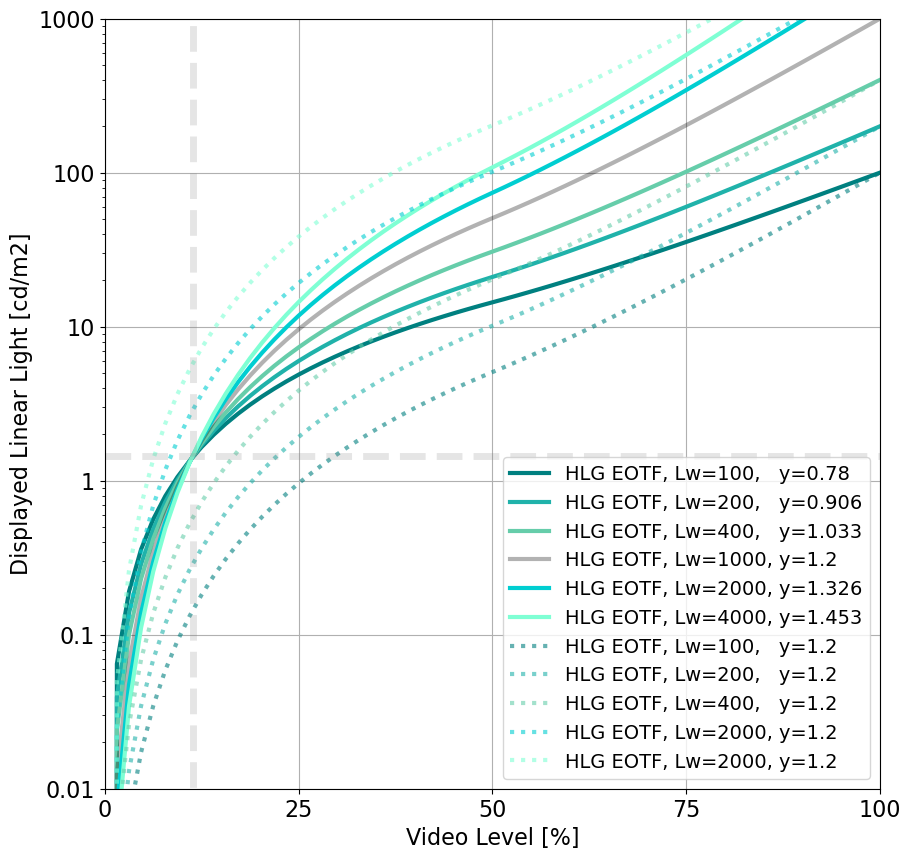

In [28]:
## Plotting HLG LUT Gamma for Different Peak Display Luminances

figR,axR = plt.subplots(figsize=(10, 10))
axR.grid(visible=True)
x1 = np.linspace(0,1,65)


axR.plot(x1, c.models.eotf_ST2084(LUTGamma(HLG_100)), label="HLG EOTF, Lw=100,   y=0.78", color='teal',alpha=1,linewidth=3)
axR.plot(x1, c.models.eotf_ST2084(LUTGamma(HLG_200)), label="HLG EOTF, Lw=200,   y=0.906", color='lightseagreen',alpha=1,linewidth=3)
axR.plot(x1, c.models.eotf_ST2084(LUTGamma(HLG_400)), label="HLG EOTF, Lw=400,   y=1.033", color='mediumaquamarine',alpha=1,linewidth=3)
axR.plot(x1, c.models.eotf_ST2084(LUTGamma(HLG_1000)), label="HLG EOTF, Lw=1000, y=1.2", color='black',alpha=0.3,linewidth=3)
axR.plot(x1, c.models.eotf_ST2084(LUTGamma(HLG_2000)), label="HLG EOTF, Lw=2000, y=1.326", color='darkturquoise',alpha=1,linewidth=3)
axR.plot(x1, c.models.eotf_ST2084(LUTGamma(HLG_4000)), label="HLG EOTF, Lw=4000, y=1.453", color='aquamarine',alpha=1,linewidth=3)

axR.plot(x1, c.models.eotf_ST2084(LUTGamma(HLG_100_Scaled)), label="HLG EOTF, Lw=100,   y=1.2", color='teal',alpha=0.6, linestyle='dotted',linewidth=3)
axR.plot(x1, c.models.eotf_ST2084(LUTGamma(HLG_200_Scaled)), label="HLG EOTF, Lw=200,   y=1.2", color='lightseagreen',alpha=0.6, linestyle='dotted',linewidth=3)
axR.plot(x1, c.models.eotf_ST2084(LUTGamma(HLG_400_Scaled)), label="HLG EOTF, Lw=400,   y=1.2", color='mediumaquamarine',alpha=0.6, linestyle='dotted',linewidth=3)
axR.plot(x1, c.models.eotf_ST2084(LUTGamma(HLG_2000_Scaled)), label="HLG EOTF, Lw=2000, y=1.2", color='darkturquoise',alpha=0.6, linestyle='dotted',linewidth=3)
axR.plot(x1, c.models.eotf_ST2084(LUTGamma(HLG_4000_Scaled)), label="HLG EOTF, Lw=2000, y=1.2", color='aquamarine',alpha=0.6, linestyle='dotted',linewidth=3)

print(x1)

#axR.plot(x1 , c.models.eotf_HLG_BT2100(x1), label="BT.2100 HLG EOTF(=OOTF(OETF^-1)) 1000 Nits Max. Display Lum.", color='red')
#axR.plot(x1 , c.models.eotf_HLG_BT2100(x1,0,2000), label="BT.2100 HLG EOTF(=OOTF(OETF^-1)) 2000 Nits Max. Display Luminance", color='green')
#axR.plot(x1 , c.models.eotf_HLG_BT2100(x1,0,4000), label="BT.2100 HLG EOTF(=OOTF(OETF^-1)) 4000 Nits Max. Display Luminance", color='blue')
#axR.set_title('System Comparison: BT.2100 HLG OOTF * OETF^-1')
axR.set_xlabel('Video Level [%]',fontsize=16)
axR.set_ylabel('Displayed Linear Light [cd/m2]',fontsize=16)
axR.set_yscale('log')
axR.set_xlim(0,1)
axR.set_ylim(0.01,1000)
#axR.set_yscale('log')
axR.legend(fontsize=14)

axR.set_yticks([0.01,0.1,1,10,100,1000],[0.01,0.1,1,10,100,1000],fontsize=16)
axR.set_xticks([0,0.25,0.5,0.75,1],[0,25,50,75,100],fontsize=16)

axR.vlines(0.114,0,1000,color='gray', linestyle="dashed", alpha=0.2,linewidth=5)
axR.hlines(1.44,0,1,color='gray', linestyle="dashed", alpha=0.2,linewidth=5)

In [ ]:
c.models.eotf_HLG_BT2100()

In [ ]:
## Plotting HLG LUT Gamma for Different Peak Display Luminances

figR,axR = plt.subplots(figsize=(10, 10))
axR.grid(visible=True)
x1 = np.linspace(0,1,65)



axR.plot(x1, c.models.eotf_HLG_BT2100(c.models.oetf_HLG_BT2100(x1),0,100), label="HLG_100", color='teal',alpha=1)


axR.plot(x1, c.models.eotf_BT1886(c.models.oetf_BT709(x1))*100, label="BT.1886", color='teal',alpha=0.6, linestyle='dotted')


print(x1)

#axR.plot(x1 , c.models.eotf_HLG_BT2100(x1), label="BT.2100 HLG EOTF(=OOTF(OETF^-1)) 1000 Nits Max. Display Lum.", color='red')
#axR.plot(x1 , c.models.eotf_HLG_BT2100(x1,0,2000), label="BT.2100 HLG EOTF(=OOTF(OETF^-1)) 2000 Nits Max. Display Luminance", color='green')
#axR.plot(x1 , c.models.eotf_HLG_BT2100(x1,0,4000), label="BT.2100 HLG EOTF(=OOTF(OETF^-1)) 4000 Nits Max. Display Luminance", color='blue')
axR.set_title('System Comparison: BT.2100 HLG OOTF * OETF^-1')
axR.set_xlabel('Video Level')
axR.set_ylabel('Displayed Linear Light [cd/m2 (Nits)]')
#axR.set_yscale('log')
axR.set_xlim(0,1)
axR.set_ylim(0.01,100)
#axR.set_yscale('log')
axR.legend()

axR.set_yticks([0.01,0.1,1,10,100],[0.01,0.1,1,10,100])


In [ ]:
c.models.eotf_ST2084(LUTGamma(HLG_2000))

In [ ]:
import math

from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


def plot_colortable(colors, *, ncols=4, sort_colors=True):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        names = sorted(
            colors, key=lambda c: tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(c))))
    else:
        names = list(colors)

    n = len(names)
    nrows = math.ceil(n / ncols)

    width = cell_width * 4 + 2 * margin
    height = cell_height * nrows + 2 * margin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-margin)/height)
    ax.set_xlim(0, cell_width * 4)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return fig

plot_colortable(mcolors.CSS4_COLORS)
plt.show()

In [ ]:
figR,axR = plt.subplots(figsize=(8, 8))
axR.grid(visible=True)
x1 = np.linspace(0,1,1000)

axR.plot(x1, c.models.oetf_BT709(x1), label="BT.709 * BT.1886 with Extended Input Range", color='darkgreen')
#axR.plot(x1 , c.models.eotf_HLG_BT2100(x1), label="BT.2100 HLG EOTF(=OOTF(OETF^-1)) 1000 Nits Max. Display Lum.", color='red')
#axR.plot(x1 , c.models.eotf_HLG_BT2100(x1,0,2000), label="BT.2100 HLG EOTF(=OOTF(OETF^-1)) 2000 Nits Max. Display Luminance", color='green')
#axR.plot(x1 , c.models.eotf_HLG_BT2100(x1,0,4000), label="BT.2100 HLG EOTF(=OOTF(OETF^-1)) 4000 Nits Max. Display Luminance", color='blue')
axR.set_title('System Comparison: BT.2100 HDR PQ OOTF (BT.709 * BT.1886)')
axR.set_xlabel('Relative Scene Linear Light [%]')
axR.set_ylabel('Displayed Linear Light [cd/m2 (Nits)]')
#axR.set_yscale('log')
axR.legend()

In [ ]:
figR,axR = plt.subplots(figsize=(8, 8))
axR.grid(visible=True)
x1 = np.linspace(0,1,1000)

axR.plot(x1, c.models.eotf_BT1886(x1), label="BT.709 * BT.1886 with Extended Input Range", color='darkgreen')
#axR.plot(x1 , c.models.eotf_HLG_BT2100(x1), label="BT.2100 HLG EOTF(=OOTF(OETF^-1)) 1000 Nits Max. Display Lum.", color='red')
#axR.plot(x1 , c.models.eotf_HLG_BT2100(x1,0,2000), label="BT.2100 HLG EOTF(=OOTF(OETF^-1)) 2000 Nits Max. Display Luminance", color='green')
#axR.plot(x1 , c.models.eotf_HLG_BT2100(x1,0,4000), label="BT.2100 HLG EOTF(=OOTF(OETF^-1)) 4000 Nits Max. Display Luminance", color='blue')
axR.set_title('System Comparison: BT.2100 HDR PQ OOTF (BT.709 * BT.1886)')
axR.set_xlabel('Video Level')
axR.set_ylabel('Displayed Linear Light')
#axR.set_yscale('log')
axR.legend()

In [ ]:
figR,axR = plt.subplots(figsize=(8, 8))
axR.grid(visible=True)
x1 = np.linspace(0,1,1000)

axR.plot(x1, c.models.eotf_BT1886(c.models.oetf_BT709(x1)), label="BT.709 * BT.1886 with Extended Input Range", color='darkgreen')
#axR.plot(x1 , c.models.eotf_HLG_BT2100(x1), label="BT.2100 HLG EOTF(=OOTF(OETF^-1)) 1000 Nits Max. Display Lum.", color='red')
#axR.plot(x1 , c.models.eotf_HLG_BT2100(x1,0,2000), label="BT.2100 HLG EOTF(=OOTF(OETF^-1)) 2000 Nits Max. Display Luminance", color='green')
#axR.plot(x1 , c.models.eotf_HLG_BT2100(x1,0,4000), label="BT.2100 HLG EOTF(=OOTF(OETF^-1)) 4000 Nits Max. Display Luminance", color='blue')
axR.set_title('System Comparison: BT.2100 HDR PQ OOTF (BT.709 * BT.1886)')
axR.set_xlabel('Lionear Scene Light')
axR.set_ylabel('Displayed Linear Light')
#axR.set_yscale('log')
axR.legend()

In [ ]:
figR,axR = plt.subplots(figsize=(8, 8))
axR.grid(visible=True)
x1 = np.linspace(0,1,100000)

axR.plot(x1*59.5208 , c.models.ootf_PQ_BT2100(x1), label="HDR PQ BT.709 * BT.1886 with Extended Input Range", color='darkgreen')
axR.plot(x1 , c.models.eotf_BT1886(c.models.oetf_BT709(x1))*100, label="BT.709 * BT.1886", color='lightgreen')
axR.plot(x1*3 , c.models.eotf_HLG_BT2100(c.models.oetf_HLG_BT2100(x1)), label="BT.2100 HDR HLG", color='red')
axR.set_title('System Comparison: HDR PQ OOTF vs. SDR OOTF')
axR.set_xlabel('Relative Scene Linear Light [%]')
axR.set_ylabel('Displayed Linear Light [cd/m2 (Nits)]')
axR.set_xscale('log')
axR.set_yscale('log')
axR.set_xlim(0.001,100)
axR.set_ylim(0.001,10000)
axR.set_xticks([0.0001,0.001,0.01,0.1,1,10,100],[0.01,0.1,1,10,100,1000,10000])
axR.set_yticks([0.001,0.01,0.1,1,10,100,1000,10000],[0.001,0.01,0.1,1,10,100,1000,10000])
axR.hlines(1000,0.00205,100,color='darkred', linestyle="dashed", alpha=0.4)
axR.text(13,1100,'1000 Nits',color='darkred', alpha=0.5)

axR.hlines(100,0,1,color='black', linestyle="dashed",alpha=0.3)
axR.vlines(1,0,100,color='black', linestyle="dashed",alpha=0.3)

axR.hlines(0.0011,0,1,color='lightgreen', linewidth=10.0,alpha=0.3)
axR.hlines(0.0011,1,59.5208,color='darkgreen', linewidth=10.0,alpha=0.3)

axR.vlines(0.00011,0,100,color='lightgreen', linewidth=10.0,alpha=0.3)
axR.vlines(0.00011,100,10000,color='darkgreen', linewidth=10.0,alpha=0.3)

axR.vlines(59.5208,0,10000,color='darkgreen', linestyle="dashed", alpha=0.4)
axR.text(42,0.013,'5952.08 %',color='darkgreen', alpha=0.5,rotation=90)

axR.vlines(3,0,10000,color='darkred', linestyle="dashed", alpha=0.3)
axR.text(2.2,0.013,'300 %',color='darkred', alpha=0.5,rotation=90)

axR.text(3.3,0.0015,'5.89532 Stops',color='darkgreen', alpha=0.5)
axR.text(0.00014,190,'6.6429 Stops',color='darkgreen', alpha=0.5,rotation=90)

axR.legend()

In [ ]:
figR,axR = plt.subplots(figsize=(8, 8))
axR.grid(visible=True)
x1 = np.linspace(0,1,10000)

#axR.plot(x1, c.models.eotf_inverse_ST2084(x1*), label="BT.709 * BT.1886 with Extended Input Range", color='darkgreen')
axR.plot(x1 , c.models.oetf_BT709(x1), label="BT.709 * BT.1886", color='lightgreen')
axR.plot(x1*3 , c.models.oetf_HLG_BT2100(x1), label="BT.709 * BT.1886", color='red')
axR.set_title('System Comparison: HDR PQ OOTF vs. SDR OOTF')
axR.set_xlabel('Relative Scene Linear Light [%]')
axR.set_ylabel('Video Level')
#axR.set_xscale('log')
#axR.set_yscale('log')
#axR.set_xlim(0,100)
axR.set_ylim(0,2)
#axR.set_xticks([0.001,0.01,0.1,1,10,100],[0.1,1,10,100,1000,10000])
##axR.set_yticks([0.001,0.01,0.1,1,10,100,1000,10000],[0.001,0.01,0.1,1,10,100,1000,10000])


axR.legend()

In [ ]:
figR,axR = plt.subplots(figsize=(8, 8))
axR.grid(visible=True)
x1 = np.linspace(0,1,1000000)

#axR.plot(x1, c.models.eotf_inverse_ST2084(x1*), label="BT.709 * BT.1886 with Extended Input Range", color='darkgreen')
axR.plot(x1 , c.models.eotf_BT1886(c.models.oetf_BT709(x1)), label="BT.709 * BT.1886", color='lightgreen')
axR.plot(x1, c.models.eotf_HLG_BT2100(c.models.oetf_HLG_BT2100(x1),0,1000), label="BT.709 * BT.1886", color='red')
axR.set_title('System Comparison: HDR PQ OOTF vs. SDR OOTF')
axR.set_xlabel('Scene Light')
axR.set_ylabel('Displayed Light')
axR.set_xscale('log')
axR.set_yscale('log')
axR.set_xlim(0,1)
axR.set_ylim(0,1000)


axR.legend()

In [ ]:
figR,axR = plt.subplots(figsize=(18, 6))
axR.grid(visible=True)
x1 = np.linspace(0,1,100000)

axR.plot(np.log2(x1*59.5208) , c.models.eotf_inverse_ST2084(c.models.eotf_BT1886(c.models.oetf_BT709(x1*59.5208))*100), label="HDR PQ BT.709 with Extended Input Range + BT.1886 + Inverse ST2084", color='darkgreen')
axR.plot(np.log2(x1*3) , c.models.oetf_HLG_BT2100(x1), label="HDR HLG OETF", color='darkturquoise')
axR.plot(np.log2(x1) , c.models.oetf_BT709(x1), label="SDR BT.709", color='lightgreen')
axR.set_title('System Comparison: HDR PQ OOTF + EOTF-1 vs. HDR HLG OETF vs. SDR OETF')
axR.set_xlabel('Relative Scene Linear Light [Stops relative to Maximum SDR Scene Light]')
axR.set_ylabel('Video Level')
#axR.set_xscale('log')
axR.set_xlim(-6,6)
axR.set_ylim(0,1)
axR.set_xticks([-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6],[-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6])

axR.vlines(0,0,1,color='lightgreen', linewidth=2,alpha=1, linestyles='dashed')
axR.vlines(1.52,0,1,color='darkturquoise', linewidth=2,alpha=1, linestyles='dashed')
axR.vlines(5.8963,0,1,color='darkgreen', linewidth=2,alpha=1, linestyles='dashed')

axR.vlines(np.log2(0.18),0,11.699185725296085,color='black', linestyle="dashed",alpha=0.3)
axR.text(np.log2(0.19),0.015,'18% Reflectance',color='black', alpha=0.5,rotation=90)

axR.legend()

In [ ]:
figR,axR = plt.subplots(figsize=(18, 6))
axR.grid(visible=True)
x1 = np.linspace(0,1,100000)

axR.plot(np.log2(x1*59.5208) , c.models.eotf_inverse_ST2084(c.models.eotf_BT1886(c.models.oetf_BT709(x1*59.5208))*100), label="HDR PQ BT.709 with Extended Input Range + BT.1886 + Inverse ST2084", color='darkgreen')
axR.plot(np.log2(x1*3) , c.models.oetf_HLG_BT2100(x1), label="HDR HLG OETF", color='darkturquoise')
axR.plot(np.log2(x1) , c.models.oetf_BT709(x1), label="SDR BT.709", color='lightgreen')

axR.plot(np.log2(x1*38.420934337202539) , c.models.log_encoding_SLog3(x1*38.420934337202539), label="Sony S-Log3", color='red')
axR.plot(np.log2(x1*55.079576698813185) , c.models.log_encoding_ALEXALogC(x1*55.079576698813185), label="ARRI Log C V3", color='purple')
#axR.plot(np.log2(x1*222.86094420380761) , c.models.log_encoding_ACEScc(x1*222.86094420380761), label="ACES cc", color='darkorange')
#axR.plot(np.log2(x1*222.86094420380761) , c.models.log_encoding_ACEScct(x1*222.86094420380761), label="ACES cct", color='orange')

# 38.420934337202539 S-Log3 Max
# 55.079576698813185 LogC3 Max
# 222.86094420380761 ACES cc cct Max

axR.set_title('System Comparison: HDR PQ OOTF + EOTF-1 vs. HDR HLG OETF vs. SDR OETF')
axR.set_xlabel('Relative Scene Linear Light [Stops relative to Maximum SDR Scene Light]')
axR.set_ylabel('Video Level')
#axR.set_xscale('log')
axR.set_xlim(-6,6)
axR.set_ylim(0,1)
axR.set_xticks([-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6],[-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6])

axR.vlines(0,0,1,color='lightgreen', linewidth=2,alpha=1, linestyles='dashed')
axR.vlines(np.log2(3.774),0,1,color='darkturquoise', linewidth=2,alpha=1, linestyles='dashed')
axR.vlines(5.8963,0,1,color='darkgreen', linewidth=2,alpha=1, linestyles='dashed')
axR.vlines(np.log2(3.774),0,1,color='darkturquoise', linewidth=2,alpha=1, linestyles='dashed')
axR.vlines(5.8963,0,1,color='darkgreen', linewidth=2,alpha=1, linestyles='dashed')

axR.vlines(np.log2(0.18),0,11.699185725296085,color='black', linestyle="dashed",alpha=0.3)
axR.text(np.log2(0.19),0.015,'18% Reflectance',color='black', alpha=0.5,rotation=90)

axR.legend()

In [ ]:
figR,axR = plt.subplots(figsize=(18, 6))
axR.grid(visible=True)
x1 = np.linspace(0,2,500000)
x2 = np.linspace(0,1,100000)

axR.plot(np.log2(x2*59.5208) , (219*c.models.eotf_inverse_ST2084(c.models.eotf_BT1886(c.models.oetf_BT709(x2*59.5208))*100)+16)*np.power(2,(10-8)), label="HDR PQ BT.709 with Extended Input Range + BT.1886 + Inverse ST2084", color='darkgreen')
axR.plot(np.log2(x1*3) , (219*c.models.oetf_HLG_BT2100(x1)+16)*np.power(2,(10-8)), label="HDR HLG OETF", color='darkturquoise')
axR.plot(np.log2(x1) , (219*c.models.oetf_BT709(x1)+16)*np.power(2,(10-8)), label="SDR BT.709", color='lightgreen')

axR.plot(np.log2(x1*38.420934337202539) , c.models.log_encoding_SLog3(x1*38.420934337202539)*1023, label="Sony S-Log3", color='red')
axR.plot(np.log2(x1*55.079576698813185) , c.models.log_encoding_ALEXALogC(x1*55.079576698813185)*1023, label="ARRI Log C V3", color='purple')
#axR.plot(np.log2(x1*222.86094420380761) , c.models.log_encoding_ACEScc(x1*222.86094420380761), label="ACES cc", color='darkorange')
#axR.plot(np.log2(x1*222.86094420380761) , c.models.log_encoding_ACEScct(x1*222.86094420380761), label="ACES cct", color='orange')

# 38.420934337202539 S-Log3 Max
# 55.079576698813185 LogC3 Max
# 222.86094420380761 ACES cc cct Max

axR.set_title('System Comparison: HDR PQ OOTF + EOTF-1 vs. HDR HLG OETF vs. SDR OETF // Narrow Range')
axR.set_xlabel('Relative Linear Scene Light [Stops relative to Maximum SDR Scene Light]')
axR.set_ylabel('Video Level [CV]')
#axR.set_xscale('log')
axR.set_xticks([-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6],[-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6])
axR.set_yticks(np.linspace(0,1024,17),np.linspace(0,1024,17))

def full2legal(x):
    return (219*(x)+16)*np.power(2,(10-8))

def legal2full(x):
    return (((x/np.power(2,(10-8)))-16)/219)

def lin2log2(x):
    return np.log2(x)

def log22lin(x):
    return np.power(2,x) * 100

secax = axR.secondary_yaxis('right', functions=(legal2full, full2legal))
secax.set_ylabel('Video Level [%]')
secax.set_yticks([-60/876,0,0.25,0.5,0.75,1,(1+79/876)],[np.round(-60/876*100,2),0,25,50,75,100,np.round((1+79/876)*100,0)])

secaxx = axR.secondary_xaxis('top', functions=(log22lin, lin2log2))
secaxx.set_xlabel('Relative Linear Scene Light [%]')
#secaxx.set_xlim(0,10)
secaxx.set_xticks(log22lin(np.linspace(-10,6,17)),np.round(log22lin(np.linspace(-10,6,17)),1))

axR.vlines(0,0,940,color='lightgreen', linewidth=2,alpha=1, linestyles='dashed')
axR.vlines(np.log2(2.9),0,940,color='darkturquoise', linewidth=2,alpha=1, linestyles='dashed')
axR.vlines(5.8963,0,940,color='darkgreen', linewidth=2,alpha=1, linestyles='dashed')
axR.vlines(np.log2(18.3),0,940,color='red', linewidth=2,alpha=1, linestyles='dashed')
axR.vlines(np.log2(25.3),0,940,color='purple', linewidth=2,alpha=1, linestyles='dashed')

axR.vlines(np.log2(1.2),0,1023,color='lightgreen', linewidth=2,alpha=0.4, linestyles='dashed')
axR.vlines(np.log2(4.9),0,1023,color='darkturquoise', linewidth=2,alpha=0.4, linestyles='dashed')
axR.vlines(np.log2(37),0,1023,color='red', linewidth=2,alpha=0.4, linestyles='dashed')
axR.vlines(np.log2(54),0,1023,color='purple', linewidth=2,alpha=0.4, linestyles='dashed')

axR.vlines(np.log2(0.18),0,940,color='black', linestyle="dashed",alpha=0.3)
axR.text(np.log2(0.19),78,'18% Reflectance',color='black', alpha=0.5,rotation=90)

axR.hlines(63,-1000,1000,color='black', alpha=0.7)
axR.hlines(0,-1000,1000,color='black', linewidth=42,alpha=0.3)
axR.hlines(0,-1000,1000,color='black', linewidth=3,alpha=1)

axR.hlines(940,-1000,1000,color='black', alpha=0.7)
axR.hlines(1004,-1000,1000,color='black', linewidth=40,alpha=0.3)
axR.hlines(1021,-1000,1000,color='black', linewidth=3,alpha=1)

axR.text(0,0,'© Justus Mai')

axR.set_xlim(-10,6)
axR.set_ylim(0,1024)

axR.legend(bbox_to_anchor=(0.41, 0.91))

In [ ]:
figR,axR = plt.subplots(figsize=(18, 6))
axR.grid(visible=True)
x1 = np.linspace(0,2,500000)
x2 = np.linspace(0,1,100000)

axR.plot(np.log2(x2*59.5208/1.8) , (219*c.models.eotf_inverse_ST2084(c.models.eotf_BT1886(c.models.oetf_BT709(x2*59.5208))*100)+16)*np.power(2,(10-8)), label="HDR PQ BT.709 with Extended Input Range + BT.1886 + Inverse ST2084", color='darkgreen')
axR.plot(np.log2(x1*3.75) , (219*c.models.oetf_HLG_BT2100(x1)+16)*np.power(2,(10-8)), label="HDR HLG OETF", color='darkturquoise')
axR.plot(np.log2(x1) , (219*c.models.oetf_BT709(x1)+16)*np.power(2,(10-8)), label="SDR BT.709", color='lightgreen')

axR.plot(np.log2(x1*38.420934337202539) , c.models.log_encoding_SLog3(x1*38.420934337202539)*1023, label="Sony S-Log3", color='red')
axR.plot(np.log2(x1*55.079576698813185) , c.models.log_encoding_ALEXALogC(x1*55.079576698813185)*1023, label="ARRI Log C V3", color='purple')
#axR.plot(np.log2(x1*222.86094420380761) , c.models.log_encoding_ACEScc(x1*222.86094420380761), label="ACES cc", color='darkorange')
#axR.plot(np.log2(x1*222.86094420380761) , c.models.log_encoding_ACEScct(x1*222.86094420380761), label="ACES cct", color='orange')

# 38.420934337202539 S-Log3 Max
# 55.079576698813185 LogC3 Max
# 222.86094420380761 ACES cc cct Max

axR.set_title('System Comparison: HDR PQ OOTF + EOTF-1 vs. HDR HLG OETF vs. SDR OETF - HDR DIFFUSE WHITE @ 203 Nits // Narrow Range')
axR.set_xlabel('Relative Linear Scene Light [Stops relative to Maximum SDR Scene Light]')
axR.set_ylabel('Video Level [CV]')
#axR.set_xscale('log')
axR.set_xticks([-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6],[-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6])
axR.set_yticks(np.linspace(0,1024,17),np.linspace(0,1024,17))

def full2legal(x):
    return (219*(x)+16)*np.power(2,(10-8))

def legal2full(x):
    return (((x/np.power(2,(10-8)))-16)/219)

def lin2log2(x):
    return np.log2(x)

def log22lin(x):
    return np.power(2,x) * 100

secax = axR.secondary_yaxis('right', functions=(legal2full, full2legal))
secax.set_ylabel('Video Level [%]')
secax.set_yticks([-60/876,0,0.25,0.5,0.58,0.75,1,(1+79/876)],[np.round(-60/876*100,2),0,25,50,58,75,100,np.round((1+79/876)*100,0)])

secaxx = axR.secondary_xaxis('top', functions=(log22lin, lin2log2))
secaxx.set_xlabel('Relative Linear Scene Light [%]')
#secaxx.set_xlim(0,10)
secaxx.set_xticks(log22lin(np.linspace(-10,6,17)),np.round(log22lin(np.linspace(-10,6,17)),1))

axR.vlines(0,0,940,color='lightgreen', linewidth=2,alpha=1, linestyles='dashed')
axR.vlines(np.log2(3.8),0,940,color='darkturquoise', linewidth=2,alpha=1, linestyles='dashed')
axR.vlines(np.log2(59.5208/1.8),0,940,color='darkgreen', linewidth=2,alpha=1, linestyles='dashed')
axR.vlines(np.log2(18.3),0,940,color='red', linewidth=2,alpha=1, linestyles='dashed')
axR.vlines(np.log2(25.3),0,940,color='purple', linewidth=2,alpha=1, linestyles='dashed')

axR.vlines(np.log2(1.2),0,1023,color='lightgreen', linewidth=2,alpha=0.4, linestyles='dashed')
axR.vlines(np.log2(6.2),0,1023,color='darkturquoise', linewidth=2,alpha=0.4, linestyles='dashed')
axR.vlines(np.log2(37),0,1023,color='red', linewidth=2,alpha=0.4, linestyles='dashed')
axR.vlines(np.log2(54),0,1023,color='purple', linewidth=2,alpha=0.4, linestyles='dashed')

axR.vlines(np.log2(0.18),0,940,color='black', linestyle="dashed",alpha=0.3)
axR.text(np.log2(0.19),97,'18% Reflectance',color='black', alpha=0.5,rotation=90)

axR.text(np.log2(1.05),97,'100% Reflectance',color='lightgreen', alpha=1,rotation=90)

axR.hlines(63,-1000,1000,color='black', alpha=0.7)
axR.hlines(0,-1000,1000,color='black', linewidth=42,alpha=0.3)
axR.hlines(0,-1000,1000,color='black', linewidth=3,alpha=1)

axR.hlines(940,-1000,1000,color='black', alpha=0.7)
axR.hlines(1004,-1000,1000,color='black', linewidth=40,alpha=0.3)
axR.hlines(1021,-1000,1000,color='black', linewidth=3,alpha=1)

axR.hlines(1023/100*58-23,-1000,1000,color='darkgreen', linewidth=2,linestyles='dotted',alpha=0.5)
axR.hlines(1023/100*75-45,-1000,1000,color='darkturquoise', linewidth=2,linestyles='dotted',alpha=0.5)

today = datetime.now()

axR.text(-9.9,24,f"{today}", color='white', fontsize=10, fontstyle='normal')

axR.set_xlim(-10,6)
axR.set_ylim(0,1024)

axR.legend(bbox_to_anchor=(0.41, 0.91))

In [ ]:
figR,axR = plt.subplots(figsize=(18, 6))
axR.grid(visible=True)
x1 = np.linspace(0,2,500000)
x2 = np.linspace(0,1,100000)

axR.plot(((219*x1)+16)*np.power(2,(10-8)), c.models.eotf_ST2084(x1),label="HDR PQ ST 2084", color='darkgreen')
axR.plot(((219*x1)+16)*np.power(2,(10-8)), c.models.eotf_HLG_BT2100(x1), label="HDR HLG EOTF", color='darkturquoise')
axR.plot(((219*x1)+16)*np.power(2,(10-8)), c.models.eotf_BT1886(x1)*100, label="SDR BT.1886", color='lightgreen')

#axR.plot(x1*1023 , c.models.log_decoding_SLog3(x1), label="Sony S-Log3", color='red')
#axR.plot(x1*1023, c.models.log_decoding_ALEXALogC(x1), label="ARRI Log C V3", color='purple')


axR.set_title('System Comparison: HDR PQ EOTF vs. HDR HLG EOTF vs. SDR EOTF - HDR DIFFUSE WHITE @ 203 Nits // Narrow Range')
axR.set_xlabel('Video Level [CV]')
axR.set_ylabel('Displayed Linear Light [cd/m2]')
#axR.set_xscale('log')
axR.set_xticks(np.linspace(0,1024,17),np.linspace(0,1024,17))

axR.set_yscale('log')

def full2legal(x):
    return (219*(x)+16)*np.power(2,(10-8))

def legal2full(x):
    return (((x/np.power(2,(10-8)))-16)/219)

def lin2log2(x):
    return np.log2(x/10000)

def log22lin(x):
    return np.power(2,x)

secax = axR.secondary_xaxis('top', functions=(legal2full, full2legal))
secax.set_xlabel('Video Level [%]')
secax.set_xticks([-60/876,0,0.25,0.5,0.58,0.75,1,(1+79/876)],[np.round(-60/876*100,2),0,25,50,58,75,100,np.round((1+79/876)*100,0)])

secaxx = axR.secondary_yaxis('right', functions=(lin2log2, log22lin))
secaxx.set_ylabel('Displayed Linear Light [Relative Stops to Diffuse White @ 203 Nits]')
#secaxx.set_xlim(0,10)
secaxx.set_yticks([1,10],[1,10])

axR.vlines(721,0,10000,color='darkturquoise', linewidth=2,alpha=1, linestyles='dashed')
axR.vlines(572,0,10000,color='darkgreen', linewidth=2,alpha=1, linestyles='dashed')

axR.vlines(64,-1000,10000,color='black', alpha=0.7)
axR.vlines(0,-1000,10000,color='black', linewidth=124,alpha=0.3)

axR.vlines(940,-1000,10000,color='black', alpha=0.7)
axR.vlines(1004,-1000,10000,color='black', linewidth=128,alpha=0.3)

axR.hlines(100,-1000,1023,color='lightgreen', linewidth=2,linestyles='dotted',alpha=0.8)
axR.hlines(1000,-1000,1023,color='darkturquoise', linewidth=2,linestyles='dotted',alpha=0.8)
axR.hlines(203,-1000,1023,color='black', linewidth=2,linestyles='dotted',alpha=0.8)

today = datetime.now()

#axR.text(-9.9,24,f"{today} Justus Mai", color='white', fontsize=10, fontstyle='normal')

axR.set_xlim(0,1024)


axR.set_ylim(0.001,10000)
axR.set_yticks([0.001,0.01,0.1,1,10,100,203,1000,10000],[0.001,0.01,0.1,1,10,100,203,1000,10000])

axR.text(1010,0.0015,f"{today}", color='white', fontsize=10, fontstyle='normal',rotation=90)

axR.legend(bbox_to_anchor=(0.193, 0.995))

In [ ]:
figR,axR = plt.subplots(figsize=(18, 6))
axR.grid(visible=True)
x1 = np.linspace(0,1,100000)

axR.plot(x1 , c.models.eotf_ST2084(x1), label="HDR PQ EOTF ST2084", color='darkgreen')
axR.plot(x1, c.models.eotf_HLG_BT2100(x1), label="HDR HLG OETF", color='darkturquoise')
axR.plot(x1, c.models.eotf_BT1886(x1,0,100), label="SDR BT.1886", color='lightgreen')
axR.set_title('System Comparison: HDR PQ EOTF-1 vs. HDR HLG OETF vs. SDR OETF')
axR.set_xlabel('Video Level')
axR.set_ylabel('Displayed Linear Light [cd/m2]')
axR.set_yscale('log')
axR.set_xlim(0,1)
axR.set_ylim(0.001,10000)
#axR.set_xticks([-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6],[-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6])
axR.set_yticks([0.001,0.01,0.1,1,10,100,1000,10000],[0.001,0.01,0.1,1,10,100,1000,10000])
axR.vlines(0,0,1,color='lightgreen', linewidth=2,alpha=1, linestyles='dashed')
axR.vlines(1.52,0,1,color='darkturquoise', linewidth=2,alpha=1, linestyles='dashed')
axR.vlines(5.8963,0,1,color='darkgreen', linewidth=2,alpha=1, linestyles='dashed')

axR.legend()

In [ ]:
figR,axR = plt.subplots(figsize=(8, 8))
axR.grid(visible=True)
x1 = np.linspace(0,1,100000)

axR.plot(x1*59.5208, c.models.ootf_PQ_BT2100(x1), label="HDR PQ BT.709 with Extended Input Range * BT.1886", color='darkgreen')
axR.plot(x1 , c.models.eotf_BT1886(c.models.oetf_BT709(x1),0,100), label="BT.709 * BT.1886", color='lightgreen')
axR.plot(x1*3, c.models.eotf_HLG_BT2100(c.models.oetf_HLG_BT2100(x1),0,1000,1.2), label="BT.2100 HDR HLG", color='darkturquoise')
axR.set_title('System Comparison: HDR PQ OOTF vs. HDR HLG OOTF vs. SDR OOTF')
axR.set_xlabel('Relative Scene Linear Light [%]')
axR.set_ylabel('Displayed Linear Light [cd/m2 (Nits)]')
axR.set_xscale('log')
axR.set_yscale('log')
axR.set_xlim(0.001,100)
axR.set_ylim(0.001,10000)
axR.set_xticks([0.0001,0.001,0.01,0.1,1,10,100],[0.01,0.1,1,10,100,1000,10000])
axR.set_yticks([0.001,0.01,0.1,1,10,100,1000,10000],[0.001,0.01,0.1,1,10,100,1000,10000])
axR.hlines(1000,0.00205,100,color='darkturquoise', linestyle="dashed", alpha=0.4)
# axR.text(13,1100,'1000 Nits',color='darkturquoise', alpha=0.5)

axR.hlines(100,0,1,color='black', linestyle="dashed",alpha=0.3)
axR.vlines(1,0,100,color='black', linestyle="dashed",alpha=0.3)

axR.hlines(0.0011,0,1,color='lightgreen', linewidth=10.0,alpha=0.3)
axR.hlines(0.0011,1,59.5208,color='darkgreen', linewidth=10.0,alpha=0.3)

axR.vlines(0.00011,0,100,color='lightgreen', linewidth=10.0,alpha=0.3)
axR.vlines(0.00011,100,10000,color='darkgreen', linewidth=10.0,alpha=0.3)

axR.vlines(59.5208,0,10000,color='darkgreen', linestyle="dashed", alpha=0.4)
# axR.text(42,0.013,'5952.08 %',color='darkgreen', alpha=0.5,rotation=90)

axR.vlines(3,0,10000,color='darkturquoise', linestyle="dashed", alpha=0.3)
# axR.text(2.2,0.013,'300 %',color='darkturquoise', alpha=0.5,rotation=90)

# axR.text(3.3,0.0015,'5.89532 Stops',color='darkgreen', alpha=0.5)
# axR.text(0.00014,190,'6.6429 Stops',color='darkgreen', alpha=0.5,rotation=90)

axR.legend()

In [ ]:
figR,axR = plt.subplots(figsize=(8, 8))
axR.grid(visible=True)
x1 = np.linspace(0,1,100000)

axR.plot(x1*59.5208/1.8, c.models.ootf_PQ_BT2100(x1), label="HDR PQ BT.709 with Extended Input Range * BT.1886", color='darkgreen')
axR.plot(x1 , c.models.eotf_BT1886(c.models.oetf_BT709(x1),0,203), label="BT.709 * BT.1886", color='lightgreen')
axR.plot(x1*3.75, c.models.eotf_HLG_BT2100(c.models.oetf_HLG_BT2100(x1),0,1000,1.2), label="BT.2100 HDR HLG", color='darkturquoise')
axR.set_title('System Comparison: HDR PQ vs. HDR HLG vs. SDR OOTF // 100 % Ref. @ 203 Nits')
axR.set_xlabel('Relative Scene Linear Light [%]')
axR.set_ylabel('Displayed Linear Light [cd/m2 (Nits)]')
axR.set_xscale('log')
axR.set_yscale('log')
axR.set_xlim(0.001,100)
axR.set_ylim(0.001,10000)
axR.set_xticks([0.0001,0.001,0.01,0.1,1,10,100],[0.01,0.1,1,10,100,1000,10000])
axR.set_yticks([0.001,0.01,0.1,1,10,100,1000,10000],[0.001,0.01,0.1,1,10,100,1000,10000])
axR.hlines(1000,0.00205,100,color='darkturquoise', linestyle="dashed", alpha=0.4)
# axR.text(13,1100,'1000 Nits',color='darkturquoise', alpha=0.5)

axR.hlines(203,0,1,color='black', linestyle="dashed",alpha=0.3)
axR.vlines(1,0,203,color='black', linestyle="dashed",alpha=0.3)

axR.hlines(0.0011,0,1,color='lightgreen', linewidth=10.0,alpha=0.3)
axR.hlines(0.0011,1,59.5208,color='darkgreen', linewidth=10.0,alpha=0.3)

axR.vlines(0.00011,0,100,color='lightgreen', linewidth=10.0,alpha=0.3)
axR.vlines(0.00011,100,10000,color='darkgreen', linewidth=10.0,alpha=0.3)

axR.vlines(59.5208,0,10000,color='darkgreen', linestyle="dashed", alpha=0.4)
# axR.text(42,0.013,'5952.08 %',color='darkgreen', alpha=0.5,rotation=90)

axR.vlines(3,0,10000,color='darkturquoise', linestyle="dashed", alpha=0.3)
# axR.text(2.2,0.013,'300 %',color='darkturquoise', alpha=0.5,rotation=90)

# axR.text(3.3,0.0015,'5.89532 Stops',color='darkgreen', alpha=0.5)
# axR.text(0.00014,190,'6.6429 Stops',color='darkgreen', alpha=0.5,rotation=90)

axR.legend()

In [ ]:
figR,axR = plt.subplots(figsize=(16, 8))
axR.grid(visible=False)

axR.set_title('System Comparison: Quantization of Scene Linear Light // Narrow Range')
axR.set_xlabel('Relative Scene Linear Light [%]')
axR.set_ylabel('Amount of Code Values Used [CV]')

def full2legal(x):
    return (219*(x)+16)*np.power(2,(10-8))

def legal2full(x):
    return (((x/np.power(2,(10-8)))-16)/219)

def lin2log2(x):
    return np.log2(x)

def log22lin(x):
    return np.power(2,x) * 100

x1 = np.linspace(0.000000000000001,1,1000000)

global_counter = np.log2(np.linspace(0.000000000000001,1*59.5208,1000000))
global_values = np.round(c.models.eotf_inverse_ST2084(c.models.eotf_BT1886(c.models.oetf_BT709((x1)*59.5208))*100)*1023,0)


pq_dictionary = {global_counter[i]: global_values[i] for i in range(len(global_counter))}

temp = {val: key for key, val in pq_dictionary.items()}
res = {val: key for key, val in temp.items()}

print(res)

values_lower_minues_10 = [v for k,v in res.items() if k < -10]
values_minues_10_to_9 = [v for k,v in res.items() if -10 <= k and k < -9]
values_minues_9_to_8 = [v for k,v in res.items() if -9 <= k and k < -8]
values_minues_8_to_7 = [v for k,v in res.items() if -8 <= k and k < -7]
values_minues_7_to_6 = [v for k,v in res.items() if -7 <= k and k < -6]
values_minues_6_to_5 = [v for k,v in res.items() if -6 <= k and k < -5]
values_minues_5_to_4 = [v for k,v in res.items() if -5 <= k and k < -4]
values_minues_4_to_3 = [v for k,v in res.items() if -4 <= k and k < -3]
values_minues_3_to_2 = [v for k,v in res.items() if -3 <= k and k < -2]
values_minues_2_to_1 = [v for k,v in res.items() if -2 <= k and k < -1]
values_minues_1_to_0 = [v for k,v in res.items() if -1 <= k and k < -0]
values_plus_0_to_1 = [v for k,v in res.items() if 0 <= k and k < 1]
values_plus_1_to_2 = [v for k,v in res.items() if 1 <= k and k < 2]
values_plus_2_to_3 = [v for k,v in res.items() if 2 <= k and k < 3]
values_plus_3_to_4 = [v for k,v in res.items() if 3 <= k and k < 4]
values_plus_4_to_5 = [v for k,v in res.items() if 4 <= k and k < 5]
values_plus_5_to_6 = [v for k,v in res.items() if 5 <= k and k < 6]
values_over_6 = [v for k,v in res.items() if 6 <= k]

value_counter_pq = [len(values_lower_minues_10),
                 len(values_minues_10_to_9),
                 len(values_minues_9_to_8),
                 len(values_minues_8_to_7),
                 len(values_minues_7_to_6),
                 len(values_minues_6_to_5),
                 len(values_minues_5_to_4),
                 len(values_minues_4_to_3),
                 len(values_minues_3_to_2),
                 len(values_minues_2_to_1),
                 len(values_minues_1_to_0),
                 len(values_plus_0_to_1),
                 len(values_plus_1_to_2),
                 len(values_plus_2_to_3),
                 len(values_plus_3_to_4),
                 len(values_plus_4_to_5),
                 len(values_plus_5_to_6),
                 len(values_over_6)]


bars = ('A', 'B', 'C', 'D', 'E','F','G', 'H', 'I', 'J', 'K','L','M', 'N', 'O', 'P', 'Q','R',)

y_pos = np.arange(len(bars))

axR.bar(y_pos-0.3, value_counter_pq, color="green", width=0.2, alpha=0.8, label="HDR PQ BT.709 * BT.1886 with Extended Input Range * ST 2084^-1")

###################################################################################

global_counter = np.log2(np.linspace(0.000000000000001,1*3,1000000))
global_values = np.round(c.models.oetf_HLG_BT2100(x1)*1023,0)

pq_dictionary = {global_counter[i]: global_values[i] for i in range(len(global_counter))}

temp = {val: key for key, val in pq_dictionary.items()}
res = {val: key for key, val in temp.items()}

print(res)

values_lower_minues_10 = [v for k,v in res.items() if k < -10]
values_minues_10_to_9 = [v for k,v in res.items() if -10 <= k and k < -9]
values_minues_9_to_8 = [v for k,v in res.items() if -9 <= k and k < -8]
values_minues_8_to_7 = [v for k,v in res.items() if -8 <= k and k < -7]
values_minues_7_to_6 = [v for k,v in res.items() if -7 <= k and k < -6]
values_minues_6_to_5 = [v for k,v in res.items() if -6 <= k and k < -5]
values_minues_5_to_4 = [v for k,v in res.items() if -5 <= k and k < -4]
values_minues_4_to_3 = [v for k,v in res.items() if -4 <= k and k < -3]
values_minues_3_to_2 = [v for k,v in res.items() if -3 <= k and k < -2]
values_minues_2_to_1 = [v for k,v in res.items() if -2 <= k and k < -1]
values_minues_1_to_0 = [v for k,v in res.items() if -1 <= k and k < -0]
values_plus_0_to_1 = [v for k,v in res.items() if 0 <= k and k < 1]
values_plus_1_to_2 = [v for k,v in res.items() if 1 <= k and k < 2]
values_plus_2_to_3 = [v for k,v in res.items() if 2 <= k and k < 3]
values_plus_3_to_4 = [v for k,v in res.items() if 3 <= k and k < 4]
values_plus_4_to_5 = [v for k,v in res.items() if 4 <= k and k < 5]
values_plus_5_to_6 = [v for k,v in res.items() if 5 <= k and k < 6]
values_over_6 = [v for k,v in res.items() if 6 <= k]

value_counter_hlg = [len(values_lower_minues_10),
                 len(values_minues_10_to_9),
                 len(values_minues_9_to_8),
                 len(values_minues_8_to_7),
                 len(values_minues_7_to_6),
                 len(values_minues_6_to_5),
                 len(values_minues_5_to_4),
                 len(values_minues_4_to_3),
                 len(values_minues_3_to_2),
                 len(values_minues_2_to_1),
                 len(values_minues_1_to_0),
                 len(values_plus_0_to_1),
                 len(values_plus_1_to_2),
                 len(values_plus_2_to_3),
                 len(values_plus_3_to_4),
                 len(values_plus_4_to_5),
                 len(values_plus_5_to_6),
                 len(values_over_6)]



axR.bar(y_pos-0.1, value_counter_hlg, color="cyan", width=0.2, alpha=0.8, label="ITU-R BT.2100 HLG OETF")

#############################################################################

global_counter = np.log2(np.linspace(0.000000000000001,1*c.models.log_decoding_SLog3(1),1000000))
global_values = np.round(c.models.log_encoding_SLog3(x1*c.models.log_decoding_SLog3(1))*1023,0)

pq_dictionary = {global_counter[i]: global_values[i] for i in range(len(global_counter))}

temp = {val: key for key, val in pq_dictionary.items()}
res = {val: key for key, val in temp.items()}

print(res)

values_lower_minues_10 = [v for k,v in res.items() if k < -10]
values_minues_10_to_9 = [v for k,v in res.items() if -10 <= k and k < -9]
values_minues_9_to_8 = [v for k,v in res.items() if -9 <= k and k < -8]
values_minues_8_to_7 = [v for k,v in res.items() if -8 <= k and k < -7]
values_minues_7_to_6 = [v for k,v in res.items() if -7 <= k and k < -6]
values_minues_6_to_5 = [v for k,v in res.items() if -6 <= k and k < -5]
values_minues_5_to_4 = [v for k,v in res.items() if -5 <= k and k < -4]
values_minues_4_to_3 = [v for k,v in res.items() if -4 <= k and k < -3]
values_minues_3_to_2 = [v for k,v in res.items() if -3 <= k and k < -2]
values_minues_2_to_1 = [v for k,v in res.items() if -2 <= k and k < -1]
values_minues_1_to_0 = [v for k,v in res.items() if -1 <= k and k < -0]
values_plus_0_to_1 = [v for k,v in res.items() if 0 <= k and k < 1]
values_plus_1_to_2 = [v for k,v in res.items() if 1 <= k and k < 2]
values_plus_2_to_3 = [v for k,v in res.items() if 2 <= k and k < 3]
values_plus_3_to_4 = [v for k,v in res.items() if 3 <= k and k < 4]
values_plus_4_to_5 = [v for k,v in res.items() if 4 <= k and k < 5]
values_plus_5_to_6 = [v for k,v in res.items() if 5 <= k and k < 6]
values_over_6 = [v for k,v in res.items() if 6 <= k]

value_counter_slog3 = [len(values_lower_minues_10),
                 len(values_minues_10_to_9),
                 len(values_minues_9_to_8),
                 len(values_minues_8_to_7),
                 len(values_minues_7_to_6),
                 len(values_minues_6_to_5),
                 len(values_minues_5_to_4),
                 len(values_minues_4_to_3),
                 len(values_minues_3_to_2),
                 len(values_minues_2_to_1),
                 len(values_minues_1_to_0),
                 len(values_plus_0_to_1),
                 len(values_plus_1_to_2),
                 len(values_plus_2_to_3),
                 len(values_plus_3_to_4),
                 len(values_plus_4_to_5),
                 len(values_plus_5_to_6),
                 len(values_over_6)]

print(value_counter_slog3)

axR.bar(y_pos+0.1, value_counter_slog3, color="red", width=0.2, alpha=0.8, label="Sony S-Log3")

########################################################################################

########################################################################################

global_counter = np.log2(np.linspace(0.000000000000001,1,1000000))
global_values = np.round(c.models.oetf_BT709(x1)*1023,0)

pq_dictionary = {global_counter[i]: global_values[i] for i in range(len(global_counter))}

temp = {val: key for key, val in pq_dictionary.items()}
res = {val: key for key, val in temp.items()}

#print(res)

values_lower_minues_10 = [v for k,v in res.items() if k < -10]
values_minues_10_to_9 = [v for k,v in res.items() if -10 <= k and k < -9]
values_minues_9_to_8 = [v for k,v in res.items() if -9 <= k and k < -8]
values_minues_8_to_7 = [v for k,v in res.items() if -8 <= k and k < -7]
values_minues_7_to_6 = [v for k,v in res.items() if -7 <= k and k < -6]
values_minues_6_to_5 = [v for k,v in res.items() if -6 <= k and k < -5]
values_minues_5_to_4 = [v for k,v in res.items() if -5 <= k and k < -4]
values_minues_4_to_3 = [v for k,v in res.items() if -4 <= k and k < -3]
values_minues_3_to_2 = [v for k,v in res.items() if -3 <= k and k < -2]
values_minues_2_to_1 = [v for k,v in res.items() if -2 <= k and k < -1]
values_minues_1_to_0 = [v for k,v in res.items() if -1 <= k and k < -0]
values_plus_0_to_1 = [v for k,v in res.items() if 0 <= k and k < 1]
values_plus_1_to_2 = [v for k,v in res.items() if 1 <= k and k < 2]
values_plus_2_to_3 = [v for k,v in res.items() if 2 <= k and k < 3]
values_plus_3_to_4 = [v for k,v in res.items() if 3 <= k and k < 4]
values_plus_4_to_5 = [v for k,v in res.items() if 4 <= k and k < 5]
values_plus_5_to_6 = [v for k,v in res.items() if 5 <= k and k < 6]
values_over_6 = [v for k,v in res.items() if 6 <= k]

value_counter_sdr = [len(values_lower_minues_10),
                 len(values_minues_10_to_9),
                 len(values_minues_9_to_8),
                 len(values_minues_8_to_7),
                 len(values_minues_7_to_6),
                 len(values_minues_6_to_5),
                 len(values_minues_5_to_4),
                 len(values_minues_4_to_3),
                 len(values_minues_3_to_2),
                 len(values_minues_2_to_1),
                 len(values_minues_1_to_0),
                 len(values_plus_0_to_1),
                 len(values_plus_1_to_2),
                 len(values_plus_2_to_3),
                 len(values_plus_3_to_4),
                 len(values_plus_4_to_5),
                 len(values_plus_5_to_6),
                 len(values_over_6)]



# axR.bar(y_pos-0.1, value_counter_sdr, color="lightgreen", width=0.5, alpha=0.5)

########################################################################################

#############################################################################

global_counter = np.log2(np.linspace(0.000000000000001,1*c.models.log_decoding_ALEXALogC(1),1000000))
global_values = np.round(c.models.log_encoding_ALEXALogC(x1*c.models.log_decoding_ALEXALogC(1))*1023,0)

pq_dictionary = {global_counter[i]: global_values[i] for i in range(len(global_counter))}

temp = {val: key for key, val in pq_dictionary.items()}
res = {val: key for key, val in temp.items()}

print(res)

values_lower_minues_10 = [v for k,v in res.items() if k < -10]
values_minues_10_to_9 = [v for k,v in res.items() if -10 <= k and k < -9]
values_minues_9_to_8 = [v for k,v in res.items() if -9 <= k and k < -8]
values_minues_8_to_7 = [v for k,v in res.items() if -8 <= k and k < -7]
values_minues_7_to_6 = [v for k,v in res.items() if -7 <= k and k < -6]
values_minues_6_to_5 = [v for k,v in res.items() if -6 <= k and k < -5]
values_minues_5_to_4 = [v for k,v in res.items() if -5 <= k and k < -4]
values_minues_4_to_3 = [v for k,v in res.items() if -4 <= k and k < -3]
values_minues_3_to_2 = [v for k,v in res.items() if -3 <= k and k < -2]
values_minues_2_to_1 = [v for k,v in res.items() if -2 <= k and k < -1]
values_minues_1_to_0 = [v for k,v in res.items() if -1 <= k and k < -0]
values_plus_0_to_1 = [v for k,v in res.items() if 0 <= k and k < 1]
values_plus_1_to_2 = [v for k,v in res.items() if 1 <= k and k < 2]
values_plus_2_to_3 = [v for k,v in res.items() if 2 <= k and k < 3]
values_plus_3_to_4 = [v for k,v in res.items() if 3 <= k and k < 4]
values_plus_4_to_5 = [v for k,v in res.items() if 4 <= k and k < 5]
values_plus_5_to_6 = [v for k,v in res.items() if 5 <= k and k < 6]
values_over_6 = [v for k,v in res.items() if 6 <= k]

value_counter_logc3 = [len(values_lower_minues_10),
                 len(values_minues_10_to_9),
                 len(values_minues_9_to_8),
                 len(values_minues_8_to_7),
                 len(values_minues_7_to_6),
                 len(values_minues_6_to_5),
                 len(values_minues_5_to_4),
                 len(values_minues_4_to_3),
                 len(values_minues_3_to_2),
                 len(values_minues_2_to_1),
                 len(values_minues_1_to_0),
                 len(values_plus_0_to_1),
                 len(values_plus_1_to_2),
                 len(values_plus_2_to_3),
                 len(values_plus_3_to_4),
                 len(values_plus_4_to_5),
                 len(values_plus_5_to_6),
                 len(values_over_6)]

print(value_counter_logc3)



axR.bar(y_pos+0.3, value_counter_logc3, color="purple", width=0.2, alpha=0.8, label ='ARRI Log C V3')

########################################################################################

y_pos_between = np.linspace(-10,6,17)

y_pos_neu = np.linspace(0,16,17)

#axR.set_xticks(y_pos, bars)
axR.set_xticks(y_pos_neu+0.5, y_pos_between)

axR.set_xlim(-1,18)
axR.set_ylim(0,180)

secaxx = axR.secondary_xaxis('top', functions=(log22lin, lin2log2))
secaxx.set_xlabel('Relative Linear Scene Light [%]')
#secaxx.set_xlim(0,10)
secaxx.set_xticks(log22lin(np.linspace(0,16,17)+0.5),np.round(log22lin(np.linspace(-10,6,17)),1))


#axR.vlines(-0.5,0,200,color='black', linestyle="dashed", alpha=0.4)
axR.vlines(0.5,0,200,color='black', linestyle="dashed", alpha=0.4)
axR.vlines(1.5,0,200,color='black', linestyle="dashed", alpha=0.4)
axR.vlines(2.5,0,200,color='black', linestyle="dashed", alpha=0.4)
axR.vlines(3.5,0,200,color='black', linestyle="dashed", alpha=0.4)
axR.vlines(4.5,0,200,color='black', linestyle="dashed", alpha=0.4)
axR.vlines(5.5,0,200,color='black', linestyle="dashed", alpha=0.4)
axR.vlines(6.5,0,200,color='black', linestyle="dashed", alpha=0.4)
axR.vlines(7.5,0,200,color='black', linestyle="dashed", alpha=0.4)
axR.vlines(8.5,0,200,color='black', linestyle="dashed", alpha=0.4)
axR.vlines(9.5,0,200,color='black', linestyle="dashed", alpha=0.4)
axR.vlines(10.5,0,200,color='black', linestyle="dashed", alpha=0.4)
axR.vlines(11.5,0,200,color='black', linestyle="dashed", alpha=0.4)
axR.vlines(12.5,0,200,color='black', linestyle="dashed", alpha=0.4)
axR.vlines(13.5,0,200,color='black', linestyle="dashed", alpha=0.4)
axR.vlines(14.5,0,200,color='black', linestyle="dashed", alpha=0.4)
axR.vlines(15.5,0,200,color='black', linestyle="dashed", alpha=0.4)
axR.vlines(16.5,0,200,color='black', linestyle="dashed", alpha=0.4)
#axR.vlines(17.5,0,200,color='black', linestyle="dashed", alpha=0.4)

axR.hlines(70,0,200,color='black', linestyle="dashed", alpha=0.4)

axR.legend()

In [ ]:
figR, (axT, axR) = plt.subplots(2, 1, figsize=(16, 11), constrained_layout=True)
axR.grid(visible=False)

import colour as c

#axR.set_title('System Comparison: Quantization of Scene Linear Light // Narrow Range')
axR.set_xlabel('Relative Stops to 100 % Scene Reflectance [Stops]')
axR.set_ylabel('Amount of Code Values Used [CV]')

def full2legal(x):
    return (219*(x)+16)*np.power(2,(10-8))

def legal2full(x):
    return (((x/np.power(2,(10-8)))-16)/219)

def lin2log2(x):
    return np.log2(x)

def log22lin(x):
    return np.power(2,x) * 100

x1 = np.linspace(0.000000000000001,1,1000000)

axR.vlines(0.5,0,200,color='gray', linestyle="solid", alpha=0.4)
axR.vlines(1.5,0,200,color='gray', linestyle="solid", alpha=0.4)
axR.vlines(2.5,0,200,color='gray', linestyle="solid", alpha=0.4)
axR.vlines(3.5,0,200,color='black', linestyle="solid", alpha=0.5,linewidth=2)
axR.vlines(4.5,0,200,color='black', linestyle="solid", alpha=0.4)
axR.vlines(5.5,0,200,color='black', linestyle="solid", alpha=0.4)
axR.vlines(6.5,0,200,color='black', linestyle="solid", alpha=0.4)
axR.vlines(7.5,0,200,color='black', linestyle="solid", alpha=0.4)
axR.vlines(8.5,0,200,color='black', linestyle="solid", alpha=0.4)
axR.vlines(9.5,0,200,color='black', linestyle="solid", alpha=0.4)
axR.vlines(10.5,0,200,color='black', linestyle="solid", alpha=0.5, linewidth=2)
axR.vlines(11.5,0,200,color='gray', linestyle="solid", alpha=0.4)
axR.vlines(12.5,0,200,color='gray', linestyle="solid", alpha=0.4)
axR.vlines(13.5,0,200,color='gray', linestyle="solid", alpha=0.4)
axR.vlines(14.5,0,200,color='gray', linestyle="solid", alpha=0.4)
axR.vlines(15.5,0,200,color='gray', linestyle="solid", alpha=0.4)
axR.vlines(16.5,0,200,color='gray', linestyle="solid", alpha=0.4)
axR.vlines(17.5,0,200,color='gray', linestyle="solid", alpha=0.4)
axR.hlines(60,-10,200,color='gray', linestyle="dotted", alpha=0.3)
axR.hlines(80,-10,200,color='gray', linestyle="dotted", alpha=0.3)


global_counter = np.log2(np.linspace(0.000000000000001,1*59.5208,1000000))
global_values = np.round((219*c.models.eotf_inverse_ST2084(c.models.eotf_BT1886(c.models.oetf_BT709(x1*59.5208))*100)+16)*np.power(2,(10-8)),0)


pq_dictionary = {global_counter[i]: global_values[i] for i in range(len(global_counter))}

temp = {val: key for key, val in pq_dictionary.items()}
res = {val: key for key, val in temp.items()}

print(res)

values_lower_minues_10 = [v for k,v in res.items() if k < -10]
values_minues_10_to_9 = [v for k,v in res.items() if -10 <= k and k < -9]
values_minues_9_to_8 = [v for k,v in res.items() if -9 <= k and k < -8]
values_minues_8_to_7 = [v for k,v in res.items() if -8 <= k and k < -7]
values_minues_7_to_6 = [v for k,v in res.items() if -7 <= k and k < -6]
values_minues_6_to_5 = [v for k,v in res.items() if -6 <= k and k < -5]
values_minues_5_to_4 = [v for k,v in res.items() if -5 <= k and k < -4]
values_minues_4_to_3 = [v for k,v in res.items() if -4 <= k and k < -3]
values_minues_3_to_2 = [v for k,v in res.items() if -3 <= k and k < -2]
values_minues_2_to_1 = [v for k,v in res.items() if -2 <= k and k < -1]
values_minues_1_to_0 = [v for k,v in res.items() if -1 <= k and k < -0]
values_plus_0_to_1 = [v for k,v in res.items() if 0 <= k and k < 1]
values_plus_1_to_2 = [v for k,v in res.items() if 1 <= k and k < 2]
values_plus_2_to_3 = [v for k,v in res.items() if 2 <= k and k < 3]
values_plus_3_to_4 = [v for k,v in res.items() if 3 <= k and k < 4]
values_plus_4_to_5 = [v for k,v in res.items() if 4 <= k and k < 5]
values_plus_5_to_6 = [v for k,v in res.items() if 5 <= k and k < 6]
values_over_6 = [v for k,v in res.items() if 6 <= k]

value_counter_pq = [len(values_lower_minues_10),
                 len(values_minues_10_to_9),
                 len(values_minues_9_to_8),
                 len(values_minues_8_to_7),
                 len(values_minues_7_to_6),
                 len(values_minues_6_to_5),
                 len(values_minues_5_to_4),
                 len(values_minues_4_to_3),
                 len(values_minues_3_to_2),
                 len(values_minues_2_to_1),
                 len(values_minues_1_to_0),
                 len(values_plus_0_to_1),
                 len(values_plus_1_to_2),
                 len(values_plus_2_to_3),
                 len(values_plus_3_to_4),
                 len(values_plus_4_to_5),
                 len(values_plus_5_to_6),
                 len(values_over_6)]


bars = ('A', 'B', 'C', 'D', 'E','F','G', 'H', 'I', 'J', 'K','L','M', 'N', 'O', 'P', 'Q','R',)

y_pos = np.arange(len(bars))

axR.bar(y_pos-0.3, value_counter_pq, color="darkgreen", width=0.15, alpha=0.8, label="HDR PQ BT.709 * BT.1886 with Extended Input Range * ST 2084^-1")
#axR.plot(y_pos-0.3, value_counter_pq,color="darkgreen",alpha=0.4)


###################################################################################

global_counter = np.log2(np.linspace(0.000000000000001,1*3,1000000))
global_values = np.clip(np.round((219*c.models.oetf_HLG_BT2100(x1)+16)*np.power(2,(10-8)),0),0,940)

pq_dictionary = {global_counter[i]: global_values[i] for i in range(len(global_counter))}

temp = {val: key for key, val in pq_dictionary.items()}
res = {val: key for key, val in temp.items()}

print(res)

values_lower_minues_10 = [v for k,v in res.items() if k < -10]
values_minues_10_to_9 = [v for k,v in res.items() if -10 <= k and k < -9]
values_minues_9_to_8 = [v for k,v in res.items() if -9 <= k and k < -8]
values_minues_8_to_7 = [v for k,v in res.items() if -8 <= k and k < -7]
values_minues_7_to_6 = [v for k,v in res.items() if -7 <= k and k < -6]
values_minues_6_to_5 = [v for k,v in res.items() if -6 <= k and k < -5]
values_minues_5_to_4 = [v for k,v in res.items() if -5 <= k and k < -4]
values_minues_4_to_3 = [v for k,v in res.items() if -4 <= k and k < -3]
values_minues_3_to_2 = [v for k,v in res.items() if -3 <= k and k < -2]
values_minues_2_to_1 = [v for k,v in res.items() if -2 <= k and k < -1]
values_minues_1_to_0 = [v for k,v in res.items() if -1 <= k and k < -0]
values_plus_0_to_1 = [v for k,v in res.items() if 0 <= k and k < 1]
values_plus_1_to_2 = [v for k,v in res.items() if 1 <= k and k < 2]
values_plus_2_to_3 = [v for k,v in res.items() if 2 <= k and k < 3]
values_plus_3_to_4 = [v for k,v in res.items() if 3 <= k and k < 4]
values_plus_4_to_5 = [v for k,v in res.items() if 4 <= k and k < 5]
values_plus_5_to_6 = [v for k,v in res.items() if 5 <= k and k < 6]
values_over_6 = [v for k,v in res.items() if 6 <= k]

value_counter_hlg = [len(values_lower_minues_10),
                 len(values_minues_10_to_9),
                 len(values_minues_9_to_8),
                 len(values_minues_8_to_7),
                 len(values_minues_7_to_6),
                 len(values_minues_6_to_5),
                 len(values_minues_5_to_4),
                 len(values_minues_4_to_3),
                 len(values_minues_3_to_2),
                 len(values_minues_2_to_1),
                 len(values_minues_1_to_0),
                 len(values_plus_0_to_1),
                 len(values_plus_1_to_2),
                 len(values_plus_2_to_3),
                 len(values_plus_3_to_4),
                 len(values_plus_4_to_5),
                 len(values_plus_5_to_6),
                 len(values_over_6)]



axR.bar(y_pos-0.15, value_counter_hlg, color="cyan", width=0.15, alpha=0.8, label="ITU-R BT.2100 HLG OETF")
#axR.plot(y_pos-0.15, value_counter_hlg,color="cyan",alpha=0.4)

############################################################################


###################################################################################

global_counter = np.log2(np.linspace(0.000000000000001,1*3*2,1000000))
global_values = np.clip(np.round((219*c.models.oetf_HLG_BT2100(x1*2)+16)*np.power(2,(10-8)),0),0,1022)

pq_dictionary = {global_counter[i]: global_values[i] for i in range(len(global_counter))}

temp = {val: key for key, val in pq_dictionary.items()}
res = {val: key for key, val in temp.items()}

print(res)

values_lower_minues_10 = [v for k,v in res.items() if k < -10]
values_minues_10_to_9 = [v for k,v in res.items() if -10 <= k and k < -9]
values_minues_9_to_8 = [v for k,v in res.items() if -9 <= k and k < -8]
values_minues_8_to_7 = [v for k,v in res.items() if -8 <= k and k < -7]
values_minues_7_to_6 = [v for k,v in res.items() if -7 <= k and k < -6]
values_minues_6_to_5 = [v for k,v in res.items() if -6 <= k and k < -5]
values_minues_5_to_4 = [v for k,v in res.items() if -5 <= k and k < -4]
values_minues_4_to_3 = [v for k,v in res.items() if -4 <= k and k < -3]
values_minues_3_to_2 = [v for k,v in res.items() if -3 <= k and k < -2]
values_minues_2_to_1 = [v for k,v in res.items() if -2 <= k and k < -1]
values_minues_1_to_0 = [v for k,v in res.items() if -1 <= k and k < -0]
values_plus_0_to_1 = [v for k,v in res.items() if 0 <= k and k < 1]
values_plus_1_to_2 = [v for k,v in res.items() if 1 <= k and k < 2]
values_plus_2_to_3 = [v for k,v in res.items() if 2 <= k and k < 3]
values_plus_3_to_4 = [v for k,v in res.items() if 3 <= k and k < 4]
values_plus_4_to_5 = [v for k,v in res.items() if 4 <= k and k < 5]
values_plus_5_to_6 = [v for k,v in res.items() if 5 <= k and k < 6]
values_over_6 = [v for k,v in res.items() if 6 <= k]

value_counter_hlg = [len(values_lower_minues_10),
                 len(values_minues_10_to_9),
                 len(values_minues_9_to_8),
                 len(values_minues_8_to_7),
                 len(values_minues_7_to_6),
                 len(values_minues_6_to_5),
                 len(values_minues_5_to_4),
                 len(values_minues_4_to_3),
                 len(values_minues_3_to_2),
                 len(values_minues_2_to_1),
                 len(values_minues_1_to_0),
                 len(values_plus_0_to_1),
                 len(values_plus_1_to_2),
                 len(values_plus_2_to_3),
                 len(values_plus_3_to_4),
                 len(values_plus_4_to_5),
                 len(values_plus_5_to_6),
                 len(values_over_6)]



axR.bar(y_pos-0.15, value_counter_hlg, color="cyan", width=0.15, alpha=0.2, label="ITU-R BT.2100 HLG OETF w/ Super Whites")
#axR.plot(y_pos-0.15, value_counter_hlg,color="cyan",alpha=0.1)

############################################################################

#############################################################################

global_counter = np.log2(np.linspace(0.000000000000001,1*c.models.log_decoding_SLog3(1),1000000))
global_values = np.clip(np.round(c.models.log_encoding_SLog3(x1*c.models.log_decoding_SLog3(1))*1023,0),0,940)

pq_dictionary = {global_counter[i]: global_values[i] for i in range(len(global_counter))}

temp = {val: key for key, val in pq_dictionary.items()}
res = {val: key for key, val in temp.items()}

print(res)

values_lower_minues_10 = [v for k,v in res.items() if k < -10]
values_minues_10_to_9 = [v for k,v in res.items() if -10 <= k and k < -9]
values_minues_9_to_8 = [v for k,v in res.items() if -9 <= k and k < -8]
values_minues_8_to_7 = [v for k,v in res.items() if -8 <= k and k < -7]
values_minues_7_to_6 = [v for k,v in res.items() if -7 <= k and k < -6]
values_minues_6_to_5 = [v for k,v in res.items() if -6 <= k and k < -5]
values_minues_5_to_4 = [v for k,v in res.items() if -5 <= k and k < -4]
values_minues_4_to_3 = [v for k,v in res.items() if -4 <= k and k < -3]
values_minues_3_to_2 = [v for k,v in res.items() if -3 <= k and k < -2]
values_minues_2_to_1 = [v for k,v in res.items() if -2 <= k and k < -1]
values_minues_1_to_0 = [v for k,v in res.items() if -1 <= k and k < -0]
values_plus_0_to_1 = [v for k,v in res.items() if 0 <= k and k < 1]
values_plus_1_to_2 = [v for k,v in res.items() if 1 <= k and k < 2]
values_plus_2_to_3 = [v for k,v in res.items() if 2 <= k and k < 3]
values_plus_3_to_4 = [v for k,v in res.items() if 3 <= k and k < 4]
values_plus_4_to_5 = [v for k,v in res.items() if 4 <= k and k < 5]
values_plus_5_to_6 = [v for k,v in res.items() if 5 <= k and k < 6]
values_over_6 = [v for k,v in res.items() if 6 <= k]

value_counter_slog3 = [len(values_lower_minues_10),
                 len(values_minues_10_to_9),
                 len(values_minues_9_to_8),
                 len(values_minues_8_to_7),
                 len(values_minues_7_to_6),
                 len(values_minues_6_to_5),
                 len(values_minues_5_to_4),
                 len(values_minues_4_to_3),
                 len(values_minues_3_to_2),
                 len(values_minues_2_to_1),
                 len(values_minues_1_to_0),
                 len(values_plus_0_to_1),
                 len(values_plus_1_to_2),
                 len(values_plus_2_to_3),
                 len(values_plus_3_to_4),
                 len(values_plus_4_to_5),
                 len(values_plus_5_to_6),
                 len(values_over_6)]

print(value_counter_slog3)

axR.bar(y_pos+0, value_counter_slog3, color="red", width=0.15, alpha=0.8, label="Sony S-Log3")
#axR.plot(y_pos+0, value_counter_slog3,color="red",alpha=0.4)

########################################################################################


#############################################################################

global_counter = np.log2(np.linspace(0.000000000000001,1*c.models.log_decoding_SLog3(1),1000000))
global_values = np.clip(np.round(c.models.log_encoding_SLog3(x1*c.models.log_decoding_SLog3(1))*1023,0),0,1022)

pq_dictionary = {global_counter[i]: global_values[i] for i in range(len(global_counter))}

temp = {val: key for key, val in pq_dictionary.items()}
res = {val: key for key, val in temp.items()}

print(res)

values_lower_minues_10 = [v for k,v in res.items() if k < -10]
values_minues_10_to_9 = [v for k,v in res.items() if -10 <= k and k < -9]
values_minues_9_to_8 = [v for k,v in res.items() if -9 <= k and k < -8]
values_minues_8_to_7 = [v for k,v in res.items() if -8 <= k and k < -7]
values_minues_7_to_6 = [v for k,v in res.items() if -7 <= k and k < -6]
values_minues_6_to_5 = [v for k,v in res.items() if -6 <= k and k < -5]
values_minues_5_to_4 = [v for k,v in res.items() if -5 <= k and k < -4]
values_minues_4_to_3 = [v for k,v in res.items() if -4 <= k and k < -3]
values_minues_3_to_2 = [v for k,v in res.items() if -3 <= k and k < -2]
values_minues_2_to_1 = [v for k,v in res.items() if -2 <= k and k < -1]
values_minues_1_to_0 = [v for k,v in res.items() if -1 <= k and k < -0]
values_plus_0_to_1 = [v for k,v in res.items() if 0 <= k and k < 1]
values_plus_1_to_2 = [v for k,v in res.items() if 1 <= k and k < 2]
values_plus_2_to_3 = [v for k,v in res.items() if 2 <= k and k < 3]
values_plus_3_to_4 = [v for k,v in res.items() if 3 <= k and k < 4]
values_plus_4_to_5 = [v for k,v in res.items() if 4 <= k and k < 5]
values_plus_5_to_6 = [v for k,v in res.items() if 5 <= k and k < 6]
values_over_6 = [v for k,v in res.items() if 6 <= k]

value_counter_slog3 = [len(values_lower_minues_10),
                 len(values_minues_10_to_9),
                 len(values_minues_9_to_8),
                 len(values_minues_8_to_7),
                 len(values_minues_7_to_6),
                 len(values_minues_6_to_5),
                 len(values_minues_5_to_4),
                 len(values_minues_4_to_3),
                 len(values_minues_3_to_2),
                 len(values_minues_2_to_1),
                 len(values_minues_1_to_0),
                 len(values_plus_0_to_1),
                 len(values_plus_1_to_2),
                 len(values_plus_2_to_3),
                 len(values_plus_3_to_4),
                 len(values_plus_4_to_5),
                 len(values_plus_5_to_6),
                 len(values_over_6)]

print(value_counter_slog3)

axR.bar(y_pos+0, value_counter_slog3, color="red", width=0.15, alpha=0.2, label="Sony S-Log3 w/ Super Whites")
#axR.plot(y_pos+0, value_counter_slog3,color="red",alpha=0.1)

########################################################################################

########################################################################################

global_counter = np.log2(np.linspace(0.000000000000001,1,1000000))
global_values = np.round(c.models.oetf_BT709(x1)*1023,0)

pq_dictionary = {global_counter[i]: global_values[i] for i in range(len(global_counter))}

temp = {val: key for key, val in pq_dictionary.items()}
res = {val: key for key, val in temp.items()}

#print(res)

values_lower_minues_10 = [v for k,v in res.items() if k < -10]
values_minues_10_to_9 = [v for k,v in res.items() if -10 <= k and k < -9]
values_minues_9_to_8 = [v for k,v in res.items() if -9 <= k and k < -8]
values_minues_8_to_7 = [v for k,v in res.items() if -8 <= k and k < -7]
values_minues_7_to_6 = [v for k,v in res.items() if -7 <= k and k < -6]
values_minues_6_to_5 = [v for k,v in res.items() if -6 <= k and k < -5]
values_minues_5_to_4 = [v for k,v in res.items() if -5 <= k and k < -4]
values_minues_4_to_3 = [v for k,v in res.items() if -4 <= k and k < -3]
values_minues_3_to_2 = [v for k,v in res.items() if -3 <= k and k < -2]
values_minues_2_to_1 = [v for k,v in res.items() if -2 <= k and k < -1]
values_minues_1_to_0 = [v for k,v in res.items() if -1 <= k and k < -0]
values_plus_0_to_1 = [v for k,v in res.items() if 0 <= k and k < 1]
values_plus_1_to_2 = [v for k,v in res.items() if 1 <= k and k < 2]
values_plus_2_to_3 = [v for k,v in res.items() if 2 <= k and k < 3]
values_plus_3_to_4 = [v for k,v in res.items() if 3 <= k and k < 4]
values_plus_4_to_5 = [v for k,v in res.items() if 4 <= k and k < 5]
values_plus_5_to_6 = [v for k,v in res.items() if 5 <= k and k < 6]
values_over_6 = [v for k,v in res.items() if 6 <= k]

value_counter_sdr = [len(values_lower_minues_10),
                 len(values_minues_10_to_9),
                 len(values_minues_9_to_8),
                 len(values_minues_8_to_7),
                 len(values_minues_7_to_6),
                 len(values_minues_6_to_5),
                 len(values_minues_5_to_4),
                 len(values_minues_4_to_3),
                 len(values_minues_3_to_2),
                 len(values_minues_2_to_1),
                 len(values_minues_1_to_0),
                 len(values_plus_0_to_1),
                 len(values_plus_1_to_2),
                 len(values_plus_2_to_3),
                 len(values_plus_3_to_4),
                 len(values_plus_4_to_5),
                 len(values_plus_5_to_6),
                 len(values_over_6)]



# axR.bar(y_pos-0.1, value_counter_sdr, color="lightgreen", width=0.5, alpha=0.5)

########################################################################################



#############################################################################

global_counter = np.log2(np.linspace(0.000000000000001,1*c.models.log_decoding_ALEXALogC(1),1000000))
global_values = np.clip(np.round(c.models.log_encoding_ALEXALogC(x1*c.models.log_decoding_ALEXALogC(1))*1023,0),0,940)

pq_dictionary = {global_counter[i]: global_values[i] for i in range(len(global_counter))}

temp = {val: key for key, val in pq_dictionary.items()}
res = {val: key for key, val in temp.items()}

print(res)

values_lower_minues_10 = [v for k,v in res.items() if k < -10]
values_minues_10_to_9 = [v for k,v in res.items() if -10 <= k and k < -9]
values_minues_9_to_8 = [v for k,v in res.items() if -9 <= k and k < -8]
values_minues_8_to_7 = [v for k,v in res.items() if -8 <= k and k < -7]
values_minues_7_to_6 = [v for k,v in res.items() if -7 <= k and k < -6]
values_minues_6_to_5 = [v for k,v in res.items() if -6 <= k and k < -5]
values_minues_5_to_4 = [v for k,v in res.items() if -5 <= k and k < -4]
values_minues_4_to_3 = [v for k,v in res.items() if -4 <= k and k < -3]
values_minues_3_to_2 = [v for k,v in res.items() if -3 <= k and k < -2]
values_minues_2_to_1 = [v for k,v in res.items() if -2 <= k and k < -1]
values_minues_1_to_0 = [v for k,v in res.items() if -1 <= k and k < -0]
values_plus_0_to_1 = [v for k,v in res.items() if 0 <= k and k < 1]
values_plus_1_to_2 = [v for k,v in res.items() if 1 <= k and k < 2]
values_plus_2_to_3 = [v for k,v in res.items() if 2 <= k and k < 3]
values_plus_3_to_4 = [v for k,v in res.items() if 3 <= k and k < 4]
values_plus_4_to_5 = [v for k,v in res.items() if 4 <= k and k < 5]
values_plus_5_to_6 = [v for k,v in res.items() if 5 <= k and k < 6]
values_over_6 = [v for k,v in res.items() if 6 <= k]

value_counter_logc3 = [len(values_lower_minues_10),
                 len(values_minues_10_to_9),
                 len(values_minues_9_to_8),
                 len(values_minues_8_to_7),
                 len(values_minues_7_to_6),
                 len(values_minues_6_to_5),
                 len(values_minues_5_to_4),
                 len(values_minues_4_to_3),
                 len(values_minues_3_to_2),
                 len(values_minues_2_to_1),
                 len(values_minues_1_to_0),
                 len(values_plus_0_to_1),
                 len(values_plus_1_to_2),
                 len(values_plus_2_to_3),
                 len(values_plus_3_to_4),
                 len(values_plus_4_to_5),
                 len(values_plus_5_to_6),
                 len(values_over_6)]

print(value_counter_logc3)



axR.bar(y_pos+0.15, value_counter_logc3, color="purple", width=0.15, alpha=0.8, label ='ARRI Log C V3')
#axR.plot(y_pos+0.15, value_counter_logc3,color="purple",alpha=0.4)

########################################################################################

#############################################################################

global_counter = np.log2(np.linspace(0.000000000000001,1*c.models.log_decoding_ALEXALogC(1),1000000))
global_values = np.clip(np.round(c.models.log_encoding_ALEXALogC(x1*c.models.log_decoding_ALEXALogC(1))*1023,0),0,1022)

pq_dictionary = {global_counter[i]: global_values[i] for i in range(len(global_counter))}

temp = {val: key for key, val in pq_dictionary.items()}
res = {val: key for key, val in temp.items()}

print(res)

values_lower_minues_10 = [v for k,v in res.items() if k < -10]
values_minues_10_to_9 = [v for k,v in res.items() if -10 <= k and k < -9]
values_minues_9_to_8 = [v for k,v in res.items() if -9 <= k and k < -8]
values_minues_8_to_7 = [v for k,v in res.items() if -8 <= k and k < -7]
values_minues_7_to_6 = [v for k,v in res.items() if -7 <= k and k < -6]
values_minues_6_to_5 = [v for k,v in res.items() if -6 <= k and k < -5]
values_minues_5_to_4 = [v for k,v in res.items() if -5 <= k and k < -4]
values_minues_4_to_3 = [v for k,v in res.items() if -4 <= k and k < -3]
values_minues_3_to_2 = [v for k,v in res.items() if -3 <= k and k < -2]
values_minues_2_to_1 = [v for k,v in res.items() if -2 <= k and k < -1]
values_minues_1_to_0 = [v for k,v in res.items() if -1 <= k and k < -0]
values_plus_0_to_1 = [v for k,v in res.items() if 0 <= k and k < 1]
values_plus_1_to_2 = [v for k,v in res.items() if 1 <= k and k < 2]
values_plus_2_to_3 = [v for k,v in res.items() if 2 <= k and k < 3]
values_plus_3_to_4 = [v for k,v in res.items() if 3 <= k and k < 4]
values_plus_4_to_5 = [v for k,v in res.items() if 4 <= k and k < 5]
values_plus_5_to_6 = [v for k,v in res.items() if 5 <= k and k < 6]
values_over_6 = [v for k,v in res.items() if 6 <= k]

value_counter_logc3 = [len(values_lower_minues_10),
                 len(values_minues_10_to_9),
                 len(values_minues_9_to_8),
                 len(values_minues_8_to_7),
                 len(values_minues_7_to_6),
                 len(values_minues_6_to_5),
                 len(values_minues_5_to_4),
                 len(values_minues_4_to_3),
                 len(values_minues_3_to_2),
                 len(values_minues_2_to_1),
                 len(values_minues_1_to_0),
                 len(values_plus_0_to_1),
                 len(values_plus_1_to_2),
                 len(values_plus_2_to_3),
                 len(values_plus_3_to_4),
                 len(values_plus_4_to_5),
                 len(values_plus_5_to_6),
                 len(values_over_6)]

print(value_counter_logc3)



axR.bar(y_pos+0.15, value_counter_logc3, color="purple", width=0.15, alpha=0.2, label ='ARRI Log C V3 w/ Super Whites')
#axR.plot(y_pos+0.15, value_counter_logc3,color="purple",alpha=0.1)

########################################################################################

#############################################################################

global_counter = np.log2(np.linspace(0.000000000000001,1*Decoding_LogC4(1),1000000))
global_values = np.clip(np.round(Encoding_LogC4(x1*Decoding_LogC4(1))*1023,0),0,940)

pq_dictionary = {global_counter[i]: global_values[i] for i in range(len(global_counter))}

temp = {val: key for key, val in pq_dictionary.items()}
res = {val: key for key, val in temp.items()}

print(res)


values_lower_minues_10 = [v for k,v in res.items() if k < -10]
values_minues_10_to_9 = [v for k,v in res.items() if -10 <= k and k < -9]
values_minues_9_to_8 = [v for k,v in res.items() if -9 <= k and k < -8]
values_minues_8_to_7 = [v for k,v in res.items() if -8 <= k and k < -7]
values_minues_7_to_6 = [v for k,v in res.items() if -7 <= k and k < -6]
values_minues_6_to_5 = [v for k,v in res.items() if -6 <= k and k < -5]
values_minues_5_to_4 = [v for k,v in res.items() if -5 <= k and k < -4]
values_minues_4_to_3 = [v for k,v in res.items() if -4 <= k and k < -3]
values_minues_3_to_2 = [v for k,v in res.items() if -3 <= k and k < -2]
values_minues_2_to_1 = [v for k,v in res.items() if -2 <= k and k < -1]
values_minues_1_to_0 = [v for k,v in res.items() if -1 <= k and k < -0]
values_plus_0_to_1 = [v for k,v in res.items() if 0 <= k and k < 1]
values_plus_1_to_2 = [v for k,v in res.items() if 1 <= k and k < 2]
values_plus_2_to_3 = [v for k,v in res.items() if 2 <= k and k < 3]
values_plus_3_to_4 = [v for k,v in res.items() if 3 <= k and k < 4]
values_plus_4_to_5 = [v for k,v in res.items() if 4 <= k and k < 5]
values_plus_5_to_6 = [v for k,v in res.items() if 5 <= k and k < 6]
values_plus_6_to_7 = [v for k,v in res.items() if 6 <= k and k < 7]
values_over_7 = [v for k,v in res.items() if 7 <= k]

value_counter_logc4 = [len(values_lower_minues_10),
                 len(values_minues_10_to_9),
                 len(values_minues_9_to_8),
                 len(values_minues_8_to_7),
                 len(values_minues_7_to_6),
                 len(values_minues_6_to_5),
                 len(values_minues_5_to_4),
                 len(values_minues_4_to_3),
                 len(values_minues_3_to_2),
                 len(values_minues_2_to_1),
                 len(values_minues_1_to_0),
                 len(values_plus_0_to_1),
                 len(values_plus_1_to_2),
                 len(values_plus_2_to_3),
                 len(values_plus_3_to_4),
                 len(values_plus_4_to_5),
                 len(values_plus_5_to_6),
                 len(values_plus_6_to_7),
                 len(values_over_7)]

print(value_counter_logc4)

y_pos = np.arange(len(bars)+1)

axR.bar(y_pos+0.3, value_counter_logc4, color="slateblue", width=0.15, alpha=0.8, label ='ARRI Log C V4')
#axR.plot(y_pos+0.3, value_counter_logc4,color="slateblue",alpha=0.4)

########################################################################################

#############################################################################

global_counter = np.log2(np.linspace(0.000000000000001,1*Decoding_LogC4(1),1000000))
global_values = np.clip(np.round(Encoding_LogC4(x1*Decoding_LogC4(1))*1023,0),0,1022)

pq_dictionary = {global_counter[i]: global_values[i] for i in range(len(global_counter))}

temp = {val: key for key, val in pq_dictionary.items()}
res = {val: key for key, val in temp.items()}

print(res)

values_lower_minues_10 = [v for k,v in res.items() if k < -10]
values_minues_10_to_9 = [v for k,v in res.items() if -10 <= k and k < -9]
values_minues_9_to_8 = [v for k,v in res.items() if -9 <= k and k < -8]
values_minues_8_to_7 = [v for k,v in res.items() if -8 <= k and k < -7]
values_minues_7_to_6 = [v for k,v in res.items() if -7 <= k and k < -6]
values_minues_6_to_5 = [v for k,v in res.items() if -6 <= k and k < -5]
values_minues_5_to_4 = [v for k,v in res.items() if -5 <= k and k < -4]
values_minues_4_to_3 = [v for k,v in res.items() if -4 <= k and k < -3]
values_minues_3_to_2 = [v for k,v in res.items() if -3 <= k and k < -2]
values_minues_2_to_1 = [v for k,v in res.items() if -2 <= k and k < -1]
values_minues_1_to_0 = [v for k,v in res.items() if -1 <= k and k < -0]
values_plus_0_to_1 = [v for k,v in res.items() if 0 <= k and k < 1]
values_plus_1_to_2 = [v for k,v in res.items() if 1 <= k and k < 2]
values_plus_2_to_3 = [v for k,v in res.items() if 2 <= k and k < 3]
values_plus_3_to_4 = [v for k,v in res.items() if 3 <= k and k < 4]
values_plus_4_to_5 = [v for k,v in res.items() if 4 <= k and k < 5]
values_plus_5_to_6 = [v for k,v in res.items() if 5 <= k and k < 6]
values_plus_6_to_7 = [v for k,v in res.items() if 6 <= k and k < 7]
values_over_7 = [v for k,v in res.items() if 7 <= k]

value_counter_logc4 = [len(values_lower_minues_10),
                 len(values_minues_10_to_9),
                 len(values_minues_9_to_8),
                 len(values_minues_8_to_7),
                 len(values_minues_7_to_6),
                 len(values_minues_6_to_5),
                 len(values_minues_5_to_4),
                 len(values_minues_4_to_3),
                 len(values_minues_3_to_2),
                 len(values_minues_2_to_1),
                 len(values_minues_1_to_0),
                 len(values_plus_0_to_1),
                 len(values_plus_1_to_2),
                 len(values_plus_2_to_3),
                 len(values_plus_3_to_4),
                 len(values_plus_4_to_5),
                 len(values_plus_5_to_6),
                 len(values_plus_6_to_7),
                 len(values_over_7)]

print(value_counter_logc4)



axR.bar(y_pos+0.3, value_counter_logc4, color="slateblue", width=0.15, alpha=0.2, label ='ARRI Log C V4 w/ Super Whites')
#axR.plot(y_pos+0.3, value_counter_logc4,color="slateblue",alpha=0.1)

########################################################################################


y_pos_between = np.linspace(-10,7,18)

y_pos_neu = np.linspace(0,17,18)

#axR.set_xticks(y_pos, bars)
axR.set_xticks(y_pos_neu+0.5, y_pos_between)

axR.set_xlim(-0.5,18.5)
axR.set_ylim(0,180)

# secaxx = axR.secondary_xaxis('top', functions=(log22lin, lin2log2))
# secaxx.set_xlabel('Relative Linear Scene Light [%]')
# #secaxx.set_xlim(0,10)
# secaxx.set_xticks(log22lin(np.linspace(0,16,17)+0.5),np.round(log22lin(np.linspace(-10,6,17)),1))

axR.legend()


########################################################################################
########################################################################################
########################################################################################
########################################################################################
########################################################################################
########################################################################################

axT.grid(visible=True)
x1 = np.linspace(0,2,1000000)
x2 = np.linspace(0,1,100000)

axT.vlines(-10,0,1024,color='gray', linestyle="solid", alpha=0.4)
axT.vlines(-9,0,1024,color='gray', linestyle="solid", alpha=0.4)
axT.vlines(-8,0,1024,color='gray', linestyle="solid", alpha=0.4)
axT.vlines(-7,0,1024,color='black', linestyle="solid", alpha=0.5,linewidth=2)
axT.vlines(-6,0,1024,color='black', linestyle="solid", alpha=0.4)
axT.vlines(-5,0,1024,color='black', linestyle="solid", alpha=0.4)
axT.vlines(-4,0,1024,color='black', linestyle="solid", alpha=0.4)
axT.vlines(-3,0,1024,color='black', linestyle="solid", alpha=0.4)
axT.vlines(-2,0,1024,color='black', linestyle="solid", alpha=0.4)
axT.vlines(-1,0,1024,color='black', linestyle="solid", alpha=0.4)
axT.vlines(0,0,1024,color='black', linestyle="solid", alpha=0.5, linewidth=2)
axT.vlines(1,0,1024,color='gray', linestyle="solid", alpha=0.4)
axT.vlines(2,0,1024,color='gray', linestyle="solid", alpha=0.4)
axT.vlines(3,0,1024,color='gray', linestyle="solid", alpha=0.4)
axT.vlines(4,0,1024,color='gray', linestyle="solid", alpha=0.4)
axT.vlines(5,0,1024,color='gray', linestyle="solid", alpha=0.4)
axT.vlines(6,0,1024,color='gray', linestyle="solid", alpha=0.4)
axT.vlines(7,0,1024,color='gray', linestyle="solid", alpha=0.4)
#axR.vlines(17.5,0,200,color='black', linestyle="dashed", alpha=0.4)

axT.plot(np.log2(x2*59.5208) , (219*c.models.eotf_inverse_ST2084(c.models.eotf_BT1886(c.models.oetf_BT709(x2*59.5208))*100)+16)*np.power(2,(10-8)), label="HDR PQ BT.709 with Extended Input Range + BT.1886 + Inverse ST2084", color='darkgreen')
axT.plot(np.log2(x1*3) , (219*c.models.oetf_HLG_BT2100(x1)+16)*np.power(2,(10-8)), label="HDR HLG OETF", color='darkturquoise')
axT.plot(np.log2(x1) , (219*c.models.oetf_BT709(x1)+16)*np.power(2,(10-8)), label="SDR BT.709", color='lightgreen')

axT.plot(np.log2(x1*38.420934337202539) , c.models.log_encoding_SLog3(x1*38.420934337202539)*1023, label="Sony S-Log3", color='red')
axT.plot(np.log2(x1*55.079576698813185) , c.models.log_encoding_ALEXALogC(x1*55.079576698813185)*1023, label="ARRI Log C V3", color='purple')

axT.plot(np.log2(x1*Decoding_LogC4(1)) , Encoding_LogC4(x1*Decoding_LogC4(1))*1023, label="ARRI Log C V4", color='slateblue')

#axR.plot(np.log2(x1*222.86094420380761) , c.models.log_encoding_ACEScc(x1*222.86094420380761), label="ACES cc", color='darkorange')
#axR.plot(np.log2(x1*222.86094420380761) , c.models.log_encoding_ACEScct(x1*222.86094420380761), label="ACES cct", color='orange')

# 38.420934337202539 S-Log3 Max
# 55.079576698813185 LogC3 Max
# 222.86094420380761 ACES cc cct Max

axT.set_title('System Comparison: HDR PQ OOTF + EOTF-1 vs. HDR HLG OETF vs. SDR OETF - HDR DIFFUSE WHITE @ 100 % Reflectance // Narrow Range // 10 Bit Encoding')
# axT.set_xlabel('Relative Linear Scene Light [Stops relative to Maximum SDR Scene Light]')
axT.set_ylabel('Video Level [CV]')
#axR.set_xscale('log')
# axT.set_xticks([-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6],[-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6])
axT.axes.get_xaxis().set_visible(False)
axT.set_yticks(np.linspace(0,1024,17),np.linspace(0,1024,17))

def full2legal(x):
    return (219*(x)+16)*np.power(2,(10-8))

def legal2full(x):
    return (((x/np.power(2,(10-8)))-16)/219)

def lin2log2(x):
    return np.log2(x)

def log22lin(x):
    return np.power(2,x) * 100

secax2 = axT.secondary_yaxis('right', functions=(legal2full, full2legal))
secax2.set_ylabel('Video Level [%]')
secax2.set_yticks([-60/876,0,0.25,0.5,0.58,0.75,1,(1+79/876)],[np.round(-60/876*100,2),0,25,50,58,75,100,np.round((1+79/876)*100,0)])

secaxx2 = axT.secondary_xaxis('top', functions=(log22lin, lin2log2))
secaxx2.set_xlabel('Relative Scene Linear Light [%]')
#secaxx.set_xlim(0,10)
secaxx2.set_xticks(log22lin(np.linspace(-10,7,18)),np.round(log22lin(np.linspace(-10,7,18)),1))

axT.vlines(0,0,940,color='lightgreen', linewidth=2,alpha=1, linestyles='dashed')
axT.vlines(np.log2(3),0,940,color='darkturquoise', linewidth=2,alpha=1, linestyles='dashed')
axT.vlines(np.log2(59.5208),0,940,color='darkgreen', linewidth=2,alpha=1, linestyles='dashed')
axT.vlines(np.log2(18.3),0,940,color='red', linewidth=2,alpha=1, linestyles='dashed')
axT.vlines(np.log2(25.3),0,940,color='purple', linewidth=2,alpha=1, linestyles='dashed')

axT.vlines(np.log2(1.2),0,1023,color='lightgreen', linewidth=2,alpha=0.4, linestyles='dashed')
axT.vlines(np.log2(4.75),0,1023,color='darkturquoise', linewidth=2,alpha=0.4, linestyles='dashed')
axT.vlines(np.log2(37),0,1023,color='red', linewidth=2,alpha=0.4, linestyles='dashed')
axT.vlines(np.log2(54),0,1023,color='purple', linewidth=2,alpha=0.4, linestyles='dashed')

axT.vlines(np.log2(0.18),0,940,color='black', linestyle="dashed",alpha=0.3)
axT.text(np.log2(0.19),97,'18% Reflectance',color='black', alpha=0.5,rotation=90)

axT.text(np.log2(1.05),97,'100% Reflectance',color='lightgreen', alpha=1,rotation=90)

axT.hlines(63,-1000,1000,color='black', alpha=0.7)
axT.hlines(0,-1000,1000,color='black', linewidth=42,alpha=0.3)
axT.hlines(0,-1000,1000,color='black', linewidth=3,alpha=1)

axT.hlines(940,-1000,1000,color='black', alpha=0.7)
axT.hlines(1004,-1000,1000,color='black', linewidth=42,alpha=0.3)
axT.hlines(1021,-1000,1000,color='black', linewidth=3,alpha=1)

axT.hlines(1023/100*52-21,-1000,1000,color='darkgreen', linewidth=2,linestyles='dotted',alpha=0.5)
axT.hlines(1023/100*78.5-43,-1000,1000,color='darkturquoise', linewidth=2,linestyles='dotted',alpha=0.5)

today = datetime.now()

axT.text(-10.9,24,f"{today}", color='white', fontsize=10, fontstyle='normal')

axT.set_xlim(-11,8)
axT.set_ylim(0,1024)

axT.legend()
#bbox_to_anchor=(0.0, 0.91)

########################################################################################

#axR.vlines(-0.5,0,200,color='black', linestyle="dashed", alpha=0.4)

axR.text(-0.5,-18,f"Created: {today}", color='black', fontsize=10, fontstyle='normal')


### FINALE PLOTS

In [ ]:
figR, (axT, axR) = plt.subplots(2, 1, figsize=(16, 11), constrained_layout=True)
axR.grid(visible=False)

import colour as c

#axR.set_title('System Comparison: Quantization of Scene Linear Light // Narrow Range')
axR.set_xlabel('Relative Stops to 100 % Scene Reflectance [Stops]')
axR.set_ylabel('Amount of Code Values Used [CV]')

def full2legal(x):
    return (219*(x)+16)*np.power(2,(10-8))

def legal2full(x):
    return (((x/np.power(2,(10-8)))-16)/219)

def lin2log2(x):
    return np.log2(x)

def log22lin(x):
    return np.power(2,x) * 100

x1 = np.linspace(0.000000000000001,1,1000000)

axR.vlines(0.5,0,200,color='gray', linestyle="solid", alpha=0.4)
axR.vlines(1.5,0,200,color='gray', linestyle="solid", alpha=0.4)
axR.vlines(2.5,0,200,color='gray', linestyle="solid", alpha=0.4)
axR.vlines(3.5,0,200,color='black', linestyle="solid", alpha=0.5,linewidth=2)
axR.vlines(4.5,0,200,color='black', linestyle="solid", alpha=0.4)
axR.vlines(5.5,0,200,color='black', linestyle="solid", alpha=0.4)
axR.vlines(6.5,0,200,color='black', linestyle="solid", alpha=0.4)
axR.vlines(7.5,0,200,color='black', linestyle="solid", alpha=0.4)
axR.vlines(8.5,0,200,color='black', linestyle="solid", alpha=0.4)
axR.vlines(9.5,0,200,color='black', linestyle="solid", alpha=0.4)
axR.vlines(10.5,0,200,color='black', linestyle="solid", alpha=0.5, linewidth=2)
axR.vlines(11.5,0,200,color='gray', linestyle="solid", alpha=0.4)
axR.vlines(12.5,0,200,color='gray', linestyle="solid", alpha=0.4)
axR.vlines(13.5,0,200,color='gray', linestyle="solid", alpha=0.4)
axR.vlines(14.5,0,200,color='gray', linestyle="solid", alpha=0.4)
axR.vlines(15.5,0,200,color='gray', linestyle="solid", alpha=0.4)
axR.vlines(16.5,0,200,color='gray', linestyle="solid", alpha=0.4)
axR.vlines(17.5,0,200,color='gray', linestyle="solid", alpha=0.4)
axR.hlines(60,-10,200,color='gray', linestyle="dotted", alpha=0.3)
axR.hlines(80,-10,200,color='gray', linestyle="dotted", alpha=0.3)


# global_counter = np.log2(np.linspace(0.000000000000001,1*59.5208,1000000))
# global_values = np.round((219*c.models.eotf_inverse_ST2084(x1*10000)+16)*np.power(2,(10-8)),0)


# pq_dictionary = {global_counter[i]: global_values[i] for i in range(len(global_counter))}

# temp = {val: key for key, val in pq_dictionary.items()}
# res = {val: key for key, val in temp.items()}

# print(res)

# values_lower_minues_10 = [v for k,v in res.items() if k < -10]
# values_minues_10_to_9 = [v for k,v in res.items() if -10 <= k and k < -9]
# values_minues_9_to_8 = [v for k,v in res.items() if -9 <= k and k < -8]
# values_minues_8_to_7 = [v for k,v in res.items() if -8 <= k and k < -7]
# values_minues_7_to_6 = [v for k,v in res.items() if -7 <= k and k < -6]
# values_minues_6_to_5 = [v for k,v in res.items() if -6 <= k and k < -5]
# values_minues_5_to_4 = [v for k,v in res.items() if -5 <= k and k < -4]
# values_minues_4_to_3 = [v for k,v in res.items() if -4 <= k and k < -3]
# values_minues_3_to_2 = [v for k,v in res.items() if -3 <= k and k < -2]
# values_minues_2_to_1 = [v for k,v in res.items() if -2 <= k and k < -1]
# values_minues_1_to_0 = [v for k,v in res.items() if -1 <= k and k < -0]
# values_plus_0_to_1 = [v for k,v in res.items() if 0 <= k and k < 1]
# values_plus_1_to_2 = [v for k,v in res.items() if 1 <= k and k < 2]
# values_plus_2_to_3 = [v for k,v in res.items() if 2 <= k and k < 3]
# values_plus_3_to_4 = [v for k,v in res.items() if 3 <= k and k < 4]
# values_plus_4_to_5 = [v for k,v in res.items() if 4 <= k and k < 5]
# values_plus_5_to_6 = [v for k,v in res.items() if 5 <= k and k < 6]
# values_over_6 = [v for k,v in res.items() if 6 <= k]

# value_counter_pq = [len(values_lower_minues_10),
#                  len(values_minues_10_to_9),
#                  len(values_minues_9_to_8),
#                  len(values_minues_8_to_7),
#                  len(values_minues_7_to_6),
#                  len(values_minues_6_to_5),
#                  len(values_minues_5_to_4),
#                  len(values_minues_4_to_3),
#                  len(values_minues_3_to_2),
#                  len(values_minues_2_to_1),
#                  len(values_minues_1_to_0),
#                  len(values_plus_0_to_1),
#                  len(values_plus_1_to_2),
#                  len(values_plus_2_to_3),
#                  len(values_plus_3_to_4),
#                  len(values_plus_4_to_5),
#                  len(values_plus_5_to_6),
#                  len(values_over_6)]


# bars = ('A', 'B', 'C', 'D', 'E','F','G', 'H', 'I', 'J', 'K','L','M', 'N', 'O', 'P', 'Q','R',)

# y_pos = np.arange(len(bars))

# axR.bar(y_pos-0.3, value_counter_pq, color="darkgreen", width=0.15, alpha=0.8, label="HDR PQ ST 2084^-1")
# #axR.plot(y_pos-0.3, value_counter_pq,color="darkgreen",alpha=0.4)


# ###################################################################################

# global_counter = np.log2(np.linspace(0.000000000000001,1*3,1000000))
# global_values = np.clip(np.round((219*c.models.oetf_HLG_BT2100(x1)+16)*np.power(2,(10-8)),0),0,940)

# pq_dictionary = {global_counter[i]: global_values[i] for i in range(len(global_counter))}

# temp = {val: key for key, val in pq_dictionary.items()}
# res = {val: key for key, val in temp.items()}

# print(res)

# values_lower_minues_10 = [v for k,v in res.items() if k < -10]
# values_minues_10_to_9 = [v for k,v in res.items() if -10 <= k and k < -9]
# values_minues_9_to_8 = [v for k,v in res.items() if -9 <= k and k < -8]
# values_minues_8_to_7 = [v for k,v in res.items() if -8 <= k and k < -7]
# values_minues_7_to_6 = [v for k,v in res.items() if -7 <= k and k < -6]
# values_minues_6_to_5 = [v for k,v in res.items() if -6 <= k and k < -5]
# values_minues_5_to_4 = [v for k,v in res.items() if -5 <= k and k < -4]
# values_minues_4_to_3 = [v for k,v in res.items() if -4 <= k and k < -3]
# values_minues_3_to_2 = [v for k,v in res.items() if -3 <= k and k < -2]
# values_minues_2_to_1 = [v for k,v in res.items() if -2 <= k and k < -1]
# values_minues_1_to_0 = [v for k,v in res.items() if -1 <= k and k < -0]
# values_plus_0_to_1 = [v for k,v in res.items() if 0 <= k and k < 1]
# values_plus_1_to_2 = [v for k,v in res.items() if 1 <= k and k < 2]
# values_plus_2_to_3 = [v for k,v in res.items() if 2 <= k and k < 3]
# values_plus_3_to_4 = [v for k,v in res.items() if 3 <= k and k < 4]
# values_plus_4_to_5 = [v for k,v in res.items() if 4 <= k and k < 5]
# values_plus_5_to_6 = [v for k,v in res.items() if 5 <= k and k < 6]
# values_over_6 = [v for k,v in res.items() if 6 <= k]

# value_counter_hlg = [len(values_lower_minues_10),
#                  len(values_minues_10_to_9),
#                  len(values_minues_9_to_8),
#                  len(values_minues_8_to_7),
#                  len(values_minues_7_to_6),
#                  len(values_minues_6_to_5),
#                  len(values_minues_5_to_4),
#                  len(values_minues_4_to_3),
#                  len(values_minues_3_to_2),
#                  len(values_minues_2_to_1),
#                  len(values_minues_1_to_0),
#                  len(values_plus_0_to_1),
#                  len(values_plus_1_to_2),
#                  len(values_plus_2_to_3),
#                  len(values_plus_3_to_4),
#                  len(values_plus_4_to_5),
#                  len(values_plus_5_to_6),
#                  len(values_over_6)]



# axR.bar(y_pos-0.15, value_counter_hlg, color="cyan", width=0.15, alpha=0.8, label="ITU-R BT.2100 HLG OETF")
# #axR.plot(y_pos-0.15, value_counter_hlg,color="cyan",alpha=0.4)

# ############################################################################


# ###################################################################################

# global_counter = np.log2(np.linspace(0.000000000000001,1*3*2,1000000))
# global_values = np.clip(np.round((219*c.models.oetf_HLG_BT2100(x1*2)+16)*np.power(2,(10-8)),0),0,1022)

# pq_dictionary = {global_counter[i]: global_values[i] for i in range(len(global_counter))}

# temp = {val: key for key, val in pq_dictionary.items()}
# res = {val: key for key, val in temp.items()}

# print(res)

# values_lower_minues_10 = [v for k,v in res.items() if k < -10]
# values_minues_10_to_9 = [v for k,v in res.items() if -10 <= k and k < -9]
# values_minues_9_to_8 = [v for k,v in res.items() if -9 <= k and k < -8]
# values_minues_8_to_7 = [v for k,v in res.items() if -8 <= k and k < -7]
# values_minues_7_to_6 = [v for k,v in res.items() if -7 <= k and k < -6]
# values_minues_6_to_5 = [v for k,v in res.items() if -6 <= k and k < -5]
# values_minues_5_to_4 = [v for k,v in res.items() if -5 <= k and k < -4]
# values_minues_4_to_3 = [v for k,v in res.items() if -4 <= k and k < -3]
# values_minues_3_to_2 = [v for k,v in res.items() if -3 <= k and k < -2]
# values_minues_2_to_1 = [v for k,v in res.items() if -2 <= k and k < -1]
# values_minues_1_to_0 = [v for k,v in res.items() if -1 <= k and k < -0]
# values_plus_0_to_1 = [v for k,v in res.items() if 0 <= k and k < 1]
# values_plus_1_to_2 = [v for k,v in res.items() if 1 <= k and k < 2]
# values_plus_2_to_3 = [v for k,v in res.items() if 2 <= k and k < 3]
# values_plus_3_to_4 = [v for k,v in res.items() if 3 <= k and k < 4]
# values_plus_4_to_5 = [v for k,v in res.items() if 4 <= k and k < 5]
# values_plus_5_to_6 = [v for k,v in res.items() if 5 <= k and k < 6]
# values_over_6 = [v for k,v in res.items() if 6 <= k]

# value_counter_hlg = [len(values_lower_minues_10),
#                  len(values_minues_10_to_9),
#                  len(values_minues_9_to_8),
#                  len(values_minues_8_to_7),
#                  len(values_minues_7_to_6),
#                  len(values_minues_6_to_5),
#                  len(values_minues_5_to_4),
#                  len(values_minues_4_to_3),
#                  len(values_minues_3_to_2),
#                  len(values_minues_2_to_1),
#                  len(values_minues_1_to_0),
#                  len(values_plus_0_to_1),
#                  len(values_plus_1_to_2),
#                  len(values_plus_2_to_3),
#                  len(values_plus_3_to_4),
#                  len(values_plus_4_to_5),
#                  len(values_plus_5_to_6),
#                  len(values_over_6)]



# axR.bar(y_pos-0.15, value_counter_hlg, color="cyan", width=0.15, alpha=0.2, label="ITU-R BT.2100 HLG OETF w/ Super Whites")
# #axR.plot(y_pos-0.15, value_counter_hlg,color="cyan",alpha=0.1)

# ############################################################################

# ###################################################################################

# global_counter = np.log2(np.linspace(0.000000000000001,1,1000000))
# global_values = np.clip(np.round((219*c.models.oetf_BT709(x1)+16)*np.power(2,(10-8)),0),0,1022)

# bt709_dictionary = {global_counter[i]: global_values[i] for i in range(len(global_counter))}

# temp = {val: key for key, val in bt709_dictionary.items()}
# res = {val: key for key, val in temp.items()}

# print(res)

# values_lower_minues_10 = [v for k,v in res.items() if k < -10]
# values_minues_10_to_9 = [v for k,v in res.items() if -10 <= k and k < -9]
# values_minues_9_to_8 = [v for k,v in res.items() if -9 <= k and k < -8]
# values_minues_8_to_7 = [v for k,v in res.items() if -8 <= k and k < -7]
# values_minues_7_to_6 = [v for k,v in res.items() if -7 <= k and k < -6]
# values_minues_6_to_5 = [v for k,v in res.items() if -6 <= k and k < -5]
# values_minues_5_to_4 = [v for k,v in res.items() if -5 <= k and k < -4]
# values_minues_4_to_3 = [v for k,v in res.items() if -4 <= k and k < -3]
# values_minues_3_to_2 = [v for k,v in res.items() if -3 <= k and k < -2]
# values_minues_2_to_1 = [v for k,v in res.items() if -2 <= k and k < -1]
# values_minues_1_to_0 = [v for k,v in res.items() if -1 <= k and k < -0]
# values_plus_0_to_1 = [v for k,v in res.items() if 0 <= k and k < 1]
# values_plus_1_to_2 = [v for k,v in res.items() if 1 <= k and k < 2]
# values_plus_2_to_3 = [v for k,v in res.items() if 2 <= k and k < 3]
# values_plus_3_to_4 = [v for k,v in res.items() if 3 <= k and k < 4]
# values_plus_4_to_5 = [v for k,v in res.items() if 4 <= k and k < 5]
# values_plus_5_to_6 = [v for k,v in res.items() if 5 <= k and k < 6]
# values_over_6 = [v for k,v in res.items() if 6 <= k]

# value_counter_709 = [len(values_lower_minues_10),
#                  len(values_minues_10_to_9),
#                  len(values_minues_9_to_8),
#                  len(values_minues_8_to_7),
#                  len(values_minues_7_to_6),
#                  len(values_minues_6_to_5),
#                  len(values_minues_5_to_4),
#                  len(values_minues_4_to_3),
#                  len(values_minues_3_to_2),
#                  len(values_minues_2_to_1),
#                  len(values_minues_1_to_0),
#                  len(values_plus_0_to_1),
#                  len(values_plus_1_to_2),
#                  len(values_plus_2_to_3),
#                  len(values_plus_3_to_4),
#                  len(values_plus_4_to_5),
#                  len(values_plus_5_to_6),
#                  len(values_over_6)]



# axR.bar(y_pos, value_counter_709, color="darkgray", width=0.75, alpha=0.2, label="ITU-R BT.709 OETF 10 BIT")
# #axR.plot(y_pos-0.15, value_counter_hlg,color="cyan",alpha=0.1)

# ############################################################################

# ###################################################################################

# global_counter = np.log2(np.linspace(0.000000000000001,1,1000000))
# global_values = np.clip(np.round((219*c.models.oetf_BT709(x1*2)+16)*np.power(2,(10-8)),0),0,1022)

# bt709sw_dictionary = {global_counter[i]: global_values[i] for i in range(len(global_counter))}

# temp = {val: key for key, val in bt709sw_dictionary.items()}
# res = {val: key for key, val in temp.items()}

# print(res)

# values_lower_minues_10 = [v for k,v in res.items() if k < -10]
# values_minues_10_to_9 = [v for k,v in res.items() if -10 <= k and k < -9]
# values_minues_9_to_8 = [v for k,v in res.items() if -9 <= k and k < -8]
# values_minues_8_to_7 = [v for k,v in res.items() if -8 <= k and k < -7]
# values_minues_7_to_6 = [v for k,v in res.items() if -7 <= k and k < -6]
# values_minues_6_to_5 = [v for k,v in res.items() if -6 <= k and k < -5]
# values_minues_5_to_4 = [v for k,v in res.items() if -5 <= k and k < -4]
# values_minues_4_to_3 = [v for k,v in res.items() if -4 <= k and k < -3]
# values_minues_3_to_2 = [v for k,v in res.items() if -3 <= k and k < -2]
# values_minues_2_to_1 = [v for k,v in res.items() if -2 <= k and k < -1]
# values_minues_1_to_0 = [v for k,v in res.items() if -1 <= k and k < -0]
# values_plus_0_to_1 = [v for k,v in res.items() if 0 <= k and k < 1]
# values_plus_1_to_2 = [v for k,v in res.items() if 1 <= k and k < 2]
# values_plus_2_to_3 = [v for k,v in res.items() if 2 <= k and k < 3]
# values_plus_3_to_4 = [v for k,v in res.items() if 3 <= k and k < 4]
# values_plus_4_to_5 = [v for k,v in res.items() if 4 <= k and k < 5]
# values_plus_5_to_6 = [v for k,v in res.items() if 5 <= k and k < 6]
# values_over_6 = [v for k,v in res.items() if 6 <= k]

# value_counter_709sw = [len(values_lower_minues_10),
#                  len(values_minues_10_to_9),
#                  len(values_minues_9_to_8),
#                  len(values_minues_8_to_7),
#                  len(values_minues_7_to_6),
#                  len(values_minues_6_to_5),
#                  len(values_minues_5_to_4),
#                  len(values_minues_4_to_3),
#                  len(values_minues_3_to_2),
#                  len(values_minues_2_to_1),
#                  len(values_minues_1_to_0),
#                  len(values_plus_0_to_1),
#                  len(values_plus_1_to_2),
#                  len(values_plus_2_to_3),
#                  len(values_plus_3_to_4),
#                  len(values_plus_4_to_5),
#                  len(values_plus_5_to_6),
#                  len(values_over_6)]



# axR.bar(y_pos, value_counter_709sw, color="gray", width=0.75, alpha=0.2, label="ITU-R BT.709 OETF 10 BIT w/ Super Whites")
# #axR.plot(y_pos-0.15, value_counter_hlg,color="cyan",alpha=0.1)

# ############################################################################

# ###################################################################################

# global_counter = np.log2(np.linspace(0.000000000000001,1,1000000))
# global_values = np.clip(np.round((219*c.models.oetf_BT709(x1*2)+16)*np.power(2,(10-8)),0),0,1022)
# global_values = np.clip(np.round(np.divide(global_values,4),0),0,255)

# bt7098_dictionary = {global_counter[i]: global_values[i] for i in range(len(global_counter))}

# temp = {val: key for key, val in bt7098_dictionary.items()}
# res = {val: key for key, val in temp.items()}

# print(res)

# values_lower_minues_10 = [v for k,v in res.items() if k < -10]
# values_minues_10_to_9 = [v for k,v in res.items() if -10 <= k and k < -9]
# values_minues_9_to_8 = [v for k,v in res.items() if -9 <= k and k < -8]
# values_minues_8_to_7 = [v for k,v in res.items() if -8 <= k and k < -7]
# values_minues_7_to_6 = [v for k,v in res.items() if -7 <= k and k < -6]
# values_minues_6_to_5 = [v for k,v in res.items() if -6 <= k and k < -5]
# values_minues_5_to_4 = [v for k,v in res.items() if -5 <= k and k < -4]
# values_minues_4_to_3 = [v for k,v in res.items() if -4 <= k and k < -3]
# values_minues_3_to_2 = [v for k,v in res.items() if -3 <= k and k < -2]
# values_minues_2_to_1 = [v for k,v in res.items() if -2 <= k and k < -1]
# values_minues_1_to_0 = [v for k,v in res.items() if -1 <= k and k < -0]
# values_plus_0_to_1 = [v for k,v in res.items() if 0 <= k and k < 1]
# values_plus_1_to_2 = [v for k,v in res.items() if 1 <= k and k < 2]
# values_plus_2_to_3 = [v for k,v in res.items() if 2 <= k and k < 3]
# values_plus_3_to_4 = [v for k,v in res.items() if 3 <= k and k < 4]
# values_plus_4_to_5 = [v for k,v in res.items() if 4 <= k and k < 5]
# values_plus_5_to_6 = [v for k,v in res.items() if 5 <= k and k < 6]
# values_over_6 = [v for k,v in res.items() if 6 <= k]

# value_counter_7098 = [len(values_lower_minues_10),
#                  len(values_minues_10_to_9),
#                  len(values_minues_9_to_8),
#                  len(values_minues_8_to_7),
#                  len(values_minues_7_to_6),
#                  len(values_minues_6_to_5),
#                  len(values_minues_5_to_4),
#                  len(values_minues_4_to_3),
#                  len(values_minues_3_to_2),
#                  len(values_minues_2_to_1),
#                  len(values_minues_1_to_0),
#                  len(values_plus_0_to_1),
#                  len(values_plus_1_to_2),
#                  len(values_plus_2_to_3),
#                  len(values_plus_3_to_4),
#                  len(values_plus_4_to_5),
#                  len(values_plus_5_to_6),
#                  len(values_over_6)]



# axR.bar(y_pos, value_counter_7098, color="black", width=0.75, alpha=0.2, label="ITU-R BT.709 OETF 8 BIT")
# #axR.plot(y_pos-0.15, value_counter_hlg,color="cyan",alpha=0.1)

# ############################################################################

# #############################################################################

# global_counter = np.log2(np.linspace(0.000000000000001,1*c.models.log_decoding_SLog3(1),1000000))
# global_values = np.clip(np.round(c.models.log_encoding_SLog3(x1*c.models.log_decoding_SLog3(1))*1023,0),0,940)

# pq_dictionary = {global_counter[i]: global_values[i] for i in range(len(global_counter))}

# temp = {val: key for key, val in pq_dictionary.items()}
# res = {val: key for key, val in temp.items()}

# print(res)

# values_lower_minues_10 = [v for k,v in res.items() if k < -10]
# values_minues_10_to_9 = [v for k,v in res.items() if -10 <= k and k < -9]
# values_minues_9_to_8 = [v for k,v in res.items() if -9 <= k and k < -8]
# values_minues_8_to_7 = [v for k,v in res.items() if -8 <= k and k < -7]
# values_minues_7_to_6 = [v for k,v in res.items() if -7 <= k and k < -6]
# values_minues_6_to_5 = [v for k,v in res.items() if -6 <= k and k < -5]
# values_minues_5_to_4 = [v for k,v in res.items() if -5 <= k and k < -4]
# values_minues_4_to_3 = [v for k,v in res.items() if -4 <= k and k < -3]
# values_minues_3_to_2 = [v for k,v in res.items() if -3 <= k and k < -2]
# values_minues_2_to_1 = [v for k,v in res.items() if -2 <= k and k < -1]
# values_minues_1_to_0 = [v for k,v in res.items() if -1 <= k and k < -0]
# values_plus_0_to_1 = [v for k,v in res.items() if 0 <= k and k < 1]
# values_plus_1_to_2 = [v for k,v in res.items() if 1 <= k and k < 2]
# values_plus_2_to_3 = [v for k,v in res.items() if 2 <= k and k < 3]
# values_plus_3_to_4 = [v for k,v in res.items() if 3 <= k and k < 4]
# values_plus_4_to_5 = [v for k,v in res.items() if 4 <= k and k < 5]
# values_plus_5_to_6 = [v for k,v in res.items() if 5 <= k and k < 6]
# values_over_6 = [v for k,v in res.items() if 6 <= k]

# value_counter_slog3 = [len(values_lower_minues_10),
#                  len(values_minues_10_to_9),
#                  len(values_minues_9_to_8),
#                  len(values_minues_8_to_7),
#                  len(values_minues_7_to_6),
#                  len(values_minues_6_to_5),
#                  len(values_minues_5_to_4),
#                  len(values_minues_4_to_3),
#                  len(values_minues_3_to_2),
#                  len(values_minues_2_to_1),
#                  len(values_minues_1_to_0),
#                  len(values_plus_0_to_1),
#                  len(values_plus_1_to_2),
#                  len(values_plus_2_to_3),
#                  len(values_plus_3_to_4),
#                  len(values_plus_4_to_5),
#                  len(values_plus_5_to_6),
#                  len(values_over_6)]

# print(value_counter_slog3)

# axR.bar(y_pos+0, value_counter_slog3, color="red", width=0.15, alpha=0.8, label="Sony S-Log3")
# #axR.plot(y_pos+0, value_counter_slog3,color="red",alpha=0.4)

# ########################################################################################


# #############################################################################

# global_counter = np.log2(np.linspace(0.000000000000001,1*c.models.log_decoding_SLog3(1),1000000))
# global_values = np.clip(np.round(c.models.log_encoding_SLog3(x1*c.models.log_decoding_SLog3(1))*1023,0),0,1022)

# pq_dictionary = {global_counter[i]: global_values[i] for i in range(len(global_counter))}

# temp = {val: key for key, val in pq_dictionary.items()}
# res = {val: key for key, val in temp.items()}

# print(res)

# values_lower_minues_10 = [v for k,v in res.items() if k < -10]
# values_minues_10_to_9 = [v for k,v in res.items() if -10 <= k and k < -9]
# values_minues_9_to_8 = [v for k,v in res.items() if -9 <= k and k < -8]
# values_minues_8_to_7 = [v for k,v in res.items() if -8 <= k and k < -7]
# values_minues_7_to_6 = [v for k,v in res.items() if -7 <= k and k < -6]
# values_minues_6_to_5 = [v for k,v in res.items() if -6 <= k and k < -5]
# values_minues_5_to_4 = [v for k,v in res.items() if -5 <= k and k < -4]
# values_minues_4_to_3 = [v for k,v in res.items() if -4 <= k and k < -3]
# values_minues_3_to_2 = [v for k,v in res.items() if -3 <= k and k < -2]
# values_minues_2_to_1 = [v for k,v in res.items() if -2 <= k and k < -1]
# values_minues_1_to_0 = [v for k,v in res.items() if -1 <= k and k < -0]
# values_plus_0_to_1 = [v for k,v in res.items() if 0 <= k and k < 1]
# values_plus_1_to_2 = [v for k,v in res.items() if 1 <= k and k < 2]
# values_plus_2_to_3 = [v for k,v in res.items() if 2 <= k and k < 3]
# values_plus_3_to_4 = [v for k,v in res.items() if 3 <= k and k < 4]
# values_plus_4_to_5 = [v for k,v in res.items() if 4 <= k and k < 5]
# values_plus_5_to_6 = [v for k,v in res.items() if 5 <= k and k < 6]
# values_over_6 = [v for k,v in res.items() if 6 <= k]

# value_counter_slog3 = [len(values_lower_minues_10),
#                  len(values_minues_10_to_9),
#                  len(values_minues_9_to_8),
#                  len(values_minues_8_to_7),
#                  len(values_minues_7_to_6),
#                  len(values_minues_6_to_5),
#                  len(values_minues_5_to_4),
#                  len(values_minues_4_to_3),
#                  len(values_minues_3_to_2),
#                  len(values_minues_2_to_1),
#                  len(values_minues_1_to_0),
#                  len(values_plus_0_to_1),
#                  len(values_plus_1_to_2),
#                  len(values_plus_2_to_3),
#                  len(values_plus_3_to_4),
#                  len(values_plus_4_to_5),
#                  len(values_plus_5_to_6),
#                  len(values_over_6)]

# print(value_counter_slog3)

# axR.bar(y_pos+0, value_counter_slog3, color="red", width=0.15, alpha=0.2, label="Sony S-Log3 w/ Super Whites")
# #axR.plot(y_pos+0, value_counter_slog3,color="red",alpha=0.1)

# ########################################################################################

# ########################################################################################

# global_counter = np.log2(np.linspace(0.000000000000001,1,1000000))
# global_values = np.round(c.models.oetf_BT709(x1)*1023,0)

# pq_dictionary = {global_counter[i]: global_values[i] for i in range(len(global_counter))}

# temp = {val: key for key, val in pq_dictionary.items()}
# res = {val: key for key, val in temp.items()}

# #print(res)

# values_lower_minues_10 = [v for k,v in res.items() if k < -10]
# values_minues_10_to_9 = [v for k,v in res.items() if -10 <= k and k < -9]
# values_minues_9_to_8 = [v for k,v in res.items() if -9 <= k and k < -8]
# values_minues_8_to_7 = [v for k,v in res.items() if -8 <= k and k < -7]
# values_minues_7_to_6 = [v for k,v in res.items() if -7 <= k and k < -6]
# values_minues_6_to_5 = [v for k,v in res.items() if -6 <= k and k < -5]
# values_minues_5_to_4 = [v for k,v in res.items() if -5 <= k and k < -4]
# values_minues_4_to_3 = [v for k,v in res.items() if -4 <= k and k < -3]
# values_minues_3_to_2 = [v for k,v in res.items() if -3 <= k and k < -2]
# values_minues_2_to_1 = [v for k,v in res.items() if -2 <= k and k < -1]
# values_minues_1_to_0 = [v for k,v in res.items() if -1 <= k and k < -0]
# values_plus_0_to_1 = [v for k,v in res.items() if 0 <= k and k < 1]
# values_plus_1_to_2 = [v for k,v in res.items() if 1 <= k and k < 2]
# values_plus_2_to_3 = [v for k,v in res.items() if 2 <= k and k < 3]
# values_plus_3_to_4 = [v for k,v in res.items() if 3 <= k and k < 4]
# values_plus_4_to_5 = [v for k,v in res.items() if 4 <= k and k < 5]
# values_plus_5_to_6 = [v for k,v in res.items() if 5 <= k and k < 6]
# values_over_6 = [v for k,v in res.items() if 6 <= k]

# value_counter_sdr = [len(values_lower_minues_10),
#                  len(values_minues_10_to_9),
#                  len(values_minues_9_to_8),
#                  len(values_minues_8_to_7),
#                  len(values_minues_7_to_6),
#                  len(values_minues_6_to_5),
#                  len(values_minues_5_to_4),
#                  len(values_minues_4_to_3),
#                  len(values_minues_3_to_2),
#                  len(values_minues_2_to_1),
#                  len(values_minues_1_to_0),
#                  len(values_plus_0_to_1),
#                  len(values_plus_1_to_2),
#                  len(values_plus_2_to_3),
#                  len(values_plus_3_to_4),
#                  len(values_plus_4_to_5),
#                  len(values_plus_5_to_6),
#                  len(values_over_6)]



# # axR.bar(y_pos-0.1, value_counter_sdr, color="lightgreen", width=0.5, alpha=0.5)

# ########################################################################################



# #############################################################################

# global_counter = np.log2(np.linspace(0.000000000000001,1*c.models.log_decoding_ALEXALogC(1),1000000))
# global_values = np.clip(np.round(c.models.log_encoding_ALEXALogC(x1*c.models.log_decoding_ALEXALogC(1))*1023,0),0,940)

# pq_dictionary = {global_counter[i]: global_values[i] for i in range(len(global_counter))}

# temp = {val: key for key, val in pq_dictionary.items()}
# res = {val: key for key, val in temp.items()}

# print(res)

# values_lower_minues_10 = [v for k,v in res.items() if k < -10]
# values_minues_10_to_9 = [v for k,v in res.items() if -10 <= k and k < -9]
# values_minues_9_to_8 = [v for k,v in res.items() if -9 <= k and k < -8]
# values_minues_8_to_7 = [v for k,v in res.items() if -8 <= k and k < -7]
# values_minues_7_to_6 = [v for k,v in res.items() if -7 <= k and k < -6]
# values_minues_6_to_5 = [v for k,v in res.items() if -6 <= k and k < -5]
# values_minues_5_to_4 = [v for k,v in res.items() if -5 <= k and k < -4]
# values_minues_4_to_3 = [v for k,v in res.items() if -4 <= k and k < -3]
# values_minues_3_to_2 = [v for k,v in res.items() if -3 <= k and k < -2]
# values_minues_2_to_1 = [v for k,v in res.items() if -2 <= k and k < -1]
# values_minues_1_to_0 = [v for k,v in res.items() if -1 <= k and k < -0]
# values_plus_0_to_1 = [v for k,v in res.items() if 0 <= k and k < 1]
# values_plus_1_to_2 = [v for k,v in res.items() if 1 <= k and k < 2]
# values_plus_2_to_3 = [v for k,v in res.items() if 2 <= k and k < 3]
# values_plus_3_to_4 = [v for k,v in res.items() if 3 <= k and k < 4]
# values_plus_4_to_5 = [v for k,v in res.items() if 4 <= k and k < 5]
# values_plus_5_to_6 = [v for k,v in res.items() if 5 <= k and k < 6]
# values_over_6 = [v for k,v in res.items() if 6 <= k]

# value_counter_logc3 = [len(values_lower_minues_10),
#                  len(values_minues_10_to_9),
#                  len(values_minues_9_to_8),
#                  len(values_minues_8_to_7),
#                  len(values_minues_7_to_6),
#                  len(values_minues_6_to_5),
#                  len(values_minues_5_to_4),
#                  len(values_minues_4_to_3),
#                  len(values_minues_3_to_2),
#                  len(values_minues_2_to_1),
#                  len(values_minues_1_to_0),
#                  len(values_plus_0_to_1),
#                  len(values_plus_1_to_2),
#                  len(values_plus_2_to_3),
#                  len(values_plus_3_to_4),
#                  len(values_plus_4_to_5),
#                  len(values_plus_5_to_6),
#                  len(values_over_6)]

# print(value_counter_logc3)



# axR.bar(y_pos+0.15, value_counter_logc3, color="purple", width=0.15, alpha=0.8, label ='ARRI Log C V3')
# #axR.plot(y_pos+0.15, value_counter_logc3,color="purple",alpha=0.4)

# ########################################################################################

# #############################################################################

# global_counter = np.log2(np.linspace(0.000000000000001,1*c.models.log_decoding_ALEXALogC(1),1000000))
# global_values = np.clip(np.round(c.models.log_encoding_ALEXALogC(x1*c.models.log_decoding_ALEXALogC(1))*1023,0),0,1022)

# pq_dictionary = {global_counter[i]: global_values[i] for i in range(len(global_counter))}

# temp = {val: key for key, val in pq_dictionary.items()}
# res = {val: key for key, val in temp.items()}

# print(res)

# values_lower_minues_10 = [v for k,v in res.items() if k < -10]
# values_minues_10_to_9 = [v for k,v in res.items() if -10 <= k and k < -9]
# values_minues_9_to_8 = [v for k,v in res.items() if -9 <= k and k < -8]
# values_minues_8_to_7 = [v for k,v in res.items() if -8 <= k and k < -7]
# values_minues_7_to_6 = [v for k,v in res.items() if -7 <= k and k < -6]
# values_minues_6_to_5 = [v for k,v in res.items() if -6 <= k and k < -5]
# values_minues_5_to_4 = [v for k,v in res.items() if -5 <= k and k < -4]
# values_minues_4_to_3 = [v for k,v in res.items() if -4 <= k and k < -3]
# values_minues_3_to_2 = [v for k,v in res.items() if -3 <= k and k < -2]
# values_minues_2_to_1 = [v for k,v in res.items() if -2 <= k and k < -1]
# values_minues_1_to_0 = [v for k,v in res.items() if -1 <= k and k < -0]
# values_plus_0_to_1 = [v for k,v in res.items() if 0 <= k and k < 1]
# values_plus_1_to_2 = [v for k,v in res.items() if 1 <= k and k < 2]
# values_plus_2_to_3 = [v for k,v in res.items() if 2 <= k and k < 3]
# values_plus_3_to_4 = [v for k,v in res.items() if 3 <= k and k < 4]
# values_plus_4_to_5 = [v for k,v in res.items() if 4 <= k and k < 5]
# values_plus_5_to_6 = [v for k,v in res.items() if 5 <= k and k < 6]
# values_over_6 = [v for k,v in res.items() if 6 <= k]

# value_counter_logc3 = [len(values_lower_minues_10),
#                  len(values_minues_10_to_9),
#                  len(values_minues_9_to_8),
#                  len(values_minues_8_to_7),
#                  len(values_minues_7_to_6),
#                  len(values_minues_6_to_5),
#                  len(values_minues_5_to_4),
#                  len(values_minues_4_to_3),
#                  len(values_minues_3_to_2),
#                  len(values_minues_2_to_1),
#                  len(values_minues_1_to_0),
#                  len(values_plus_0_to_1),
#                  len(values_plus_1_to_2),
#                  len(values_plus_2_to_3),
#                  len(values_plus_3_to_4),
#                  len(values_plus_4_to_5),
#                  len(values_plus_5_to_6),
#                  len(values_over_6)]

# print(value_counter_logc3)



# axR.bar(y_pos+0.15, value_counter_logc3, color="purple", width=0.15, alpha=0.2, label ='ARRI Log C V3 w/ Super Whites')
# #axR.plot(y_pos+0.15, value_counter_logc3,color="purple",alpha=0.1)

# ########################################################################################

# #############################################################################

# global_counter = np.log2(np.linspace(0.000000000000001,1*Decoding_LogC4(1),1000000))
# global_values = np.clip(np.round(Encoding_LogC4(x1*Decoding_LogC4(1))*1023,0),0,940)

# pq_dictionary = {global_counter[i]: global_values[i] for i in range(len(global_counter))}

# temp = {val: key for key, val in pq_dictionary.items()}
# res = {val: key for key, val in temp.items()}

# print(res)


# values_lower_minues_10 = [v for k,v in res.items() if k < -10]
# values_minues_10_to_9 = [v for k,v in res.items() if -10 <= k and k < -9]
# values_minues_9_to_8 = [v for k,v in res.items() if -9 <= k and k < -8]
# values_minues_8_to_7 = [v for k,v in res.items() if -8 <= k and k < -7]
# values_minues_7_to_6 = [v for k,v in res.items() if -7 <= k and k < -6]
# values_minues_6_to_5 = [v for k,v in res.items() if -6 <= k and k < -5]
# values_minues_5_to_4 = [v for k,v in res.items() if -5 <= k and k < -4]
# values_minues_4_to_3 = [v for k,v in res.items() if -4 <= k and k < -3]
# values_minues_3_to_2 = [v for k,v in res.items() if -3 <= k and k < -2]
# values_minues_2_to_1 = [v for k,v in res.items() if -2 <= k and k < -1]
# values_minues_1_to_0 = [v for k,v in res.items() if -1 <= k and k < -0]
# values_plus_0_to_1 = [v for k,v in res.items() if 0 <= k and k < 1]
# values_plus_1_to_2 = [v for k,v in res.items() if 1 <= k and k < 2]
# values_plus_2_to_3 = [v for k,v in res.items() if 2 <= k and k < 3]
# values_plus_3_to_4 = [v for k,v in res.items() if 3 <= k and k < 4]
# values_plus_4_to_5 = [v for k,v in res.items() if 4 <= k and k < 5]
# values_plus_5_to_6 = [v for k,v in res.items() if 5 <= k and k < 6]
# values_plus_6_to_7 = [v for k,v in res.items() if 6 <= k and k < 7]
# values_over_7 = [v for k,v in res.items() if 7 <= k]

# value_counter_logc4 = [len(values_lower_minues_10),
#                  len(values_minues_10_to_9),
#                  len(values_minues_9_to_8),
#                  len(values_minues_8_to_7),
#                  len(values_minues_7_to_6),
#                  len(values_minues_6_to_5),
#                  len(values_minues_5_to_4),
#                  len(values_minues_4_to_3),
#                  len(values_minues_3_to_2),
#                  len(values_minues_2_to_1),
#                  len(values_minues_1_to_0),
#                  len(values_plus_0_to_1),
#                  len(values_plus_1_to_2),
#                  len(values_plus_2_to_3),
#                  len(values_plus_3_to_4),
#                  len(values_plus_4_to_5),
#                  len(values_plus_5_to_6),
#                  len(values_plus_6_to_7),
#                  len(values_over_7)]

# print(value_counter_logc4)

# y_pos = np.arange(len(bars)+1)

# axR.bar(y_pos+0.3, value_counter_logc4, color="slateblue", width=0.15, alpha=0.8, label ='ARRI Log C V4')
# #axR.plot(y_pos+0.3, value_counter_logc4,color="slateblue",alpha=0.4)

# ########################################################################################

# #############################################################################

# global_counter = np.log2(np.linspace(0.000000000000001,1*Decoding_LogC4(1),1000000))
# global_values = np.clip(np.round(Encoding_LogC4(x1*Decoding_LogC4(1))*1023,0),0,1022)

# pq_dictionary = {global_counter[i]: global_values[i] for i in range(len(global_counter))}

# temp = {val: key for key, val in pq_dictionary.items()}
# res = {val: key for key, val in temp.items()}

# print(res)

# values_lower_minues_10 = [v for k,v in res.items() if k < -10]
# values_minues_10_to_9 = [v for k,v in res.items() if -10 <= k and k < -9]
# values_minues_9_to_8 = [v for k,v in res.items() if -9 <= k and k < -8]
# values_minues_8_to_7 = [v for k,v in res.items() if -8 <= k and k < -7]
# values_minues_7_to_6 = [v for k,v in res.items() if -7 <= k and k < -6]
# values_minues_6_to_5 = [v for k,v in res.items() if -6 <= k and k < -5]
# values_minues_5_to_4 = [v for k,v in res.items() if -5 <= k and k < -4]
# values_minues_4_to_3 = [v for k,v in res.items() if -4 <= k and k < -3]
# values_minues_3_to_2 = [v for k,v in res.items() if -3 <= k and k < -2]
# values_minues_2_to_1 = [v for k,v in res.items() if -2 <= k and k < -1]
# values_minues_1_to_0 = [v for k,v in res.items() if -1 <= k and k < -0]
# values_plus_0_to_1 = [v for k,v in res.items() if 0 <= k and k < 1]
# values_plus_1_to_2 = [v for k,v in res.items() if 1 <= k and k < 2]
# values_plus_2_to_3 = [v for k,v in res.items() if 2 <= k and k < 3]
# values_plus_3_to_4 = [v for k,v in res.items() if 3 <= k and k < 4]
# values_plus_4_to_5 = [v for k,v in res.items() if 4 <= k and k < 5]
# values_plus_5_to_6 = [v for k,v in res.items() if 5 <= k and k < 6]
# values_plus_6_to_7 = [v for k,v in res.items() if 6 <= k and k < 7]
# values_over_7 = [v for k,v in res.items() if 7 <= k]

# value_counter_logc4 = [len(values_lower_minues_10),
#                  len(values_minues_10_to_9),
#                  len(values_minues_9_to_8),
#                  len(values_minues_8_to_7),
#                  len(values_minues_7_to_6),
#                  len(values_minues_6_to_5),
#                  len(values_minues_5_to_4),
#                  len(values_minues_4_to_3),
#                  len(values_minues_3_to_2),
#                  len(values_minues_2_to_1),
#                  len(values_minues_1_to_0),
#                  len(values_plus_0_to_1),
#                  len(values_plus_1_to_2),
#                  len(values_plus_2_to_3),
#                  len(values_plus_3_to_4),
#                  len(values_plus_4_to_5),
#                  len(values_plus_5_to_6),
#                  len(values_plus_6_to_7),
#                  len(values_over_7)]

# print(value_counter_logc4)



# axR.bar(y_pos+0.3, value_counter_logc4, color="slateblue", width=0.15, alpha=0.2, label ='ARRI Log C V4 w/ Super Whites')
# axR.plot(y_pos+0.3, value_counter_logc4,color="slateblue",alpha=0.1)

########################################################################################


y_pos_between = np.linspace(-10,7,18)

y_pos_neu = np.linspace(0,17,18)

#axR.set_xticks(y_pos, bars)
axR.set_xticks(y_pos_neu+0.5, y_pos_between)

axR.set_xlim(-0.5,18.5)
axR.set_ylim(0,180)

# secaxx = axR.secondary_xaxis('top', functions=(log22lin, lin2log2))
# secaxx.set_xlabel('Relative Linear Scene Light [%]')
# #secaxx.set_xlim(0,10)
# secaxx.set_xticks(log22lin(np.linspace(0,16,17)+0.5),np.round(log22lin(np.linspace(-10,6,17)),1))

axR.legend()


########################################################################################
########################################################################################
########################################################################################
########################################################################################
########################################################################################
########################################################################################

axT.grid(visible=True)
x1 = np.linspace(0,2,1000000)
x2 = np.linspace(0,1,100000)

axT.vlines(-10,0,1024,color='gray', linestyle="solid", alpha=0.4)
axT.vlines(-9,0,1024,color='gray', linestyle="solid", alpha=0.4)
axT.vlines(-8,0,1024,color='gray', linestyle="solid", alpha=0.4)
axT.vlines(-7,0,1024,color='black', linestyle="solid", alpha=0.5,linewidth=2)
axT.vlines(-6,0,1024,color='black', linestyle="solid", alpha=0.4)
axT.vlines(-5,0,1024,color='black', linestyle="solid", alpha=0.4)
axT.vlines(-4,0,1024,color='black', linestyle="solid", alpha=0.4)
axT.vlines(-3,0,1024,color='black', linestyle="solid", alpha=0.4)
axT.vlines(-2,0,1024,color='black', linestyle="solid", alpha=0.4)
axT.vlines(-1,0,1024,color='black', linestyle="solid", alpha=0.4)
axT.vlines(0,0,1024,color='black', linestyle="solid", alpha=0.5, linewidth=2)
axT.vlines(1,0,1024,color='gray', linestyle="solid", alpha=0.4)
axT.vlines(2,0,1024,color='gray', linestyle="solid", alpha=0.4)
axT.vlines(3,0,1024,color='gray', linestyle="solid", alpha=0.4)
axT.vlines(4,0,1024,color='gray', linestyle="solid", alpha=0.4)
axT.vlines(5,0,1024,color='gray', linestyle="solid", alpha=0.4)
axT.vlines(6,0,1024,color='gray', linestyle="solid", alpha=0.4)
axT.vlines(7,0,1024,color='gray', linestyle="solid", alpha=0.4)
#axR.vlines(17.5,0,200,color='black', linestyle="dashed", alpha=0.4)

# axT.plot(np.log2(x2*59.5208) , (219*c.models.eotf_inverse_ST2084(c.models.eotf_BT1886(c.models.oetf_BT709(x2*59.5208))*100)+16)*np.power(2,(10-8)), label="HDR PQ ST 2084^-1", color='darkgreen')
# axT.plot(np.log2(x1*3) , (219*c.models.oetf_HLG_BT2100(x1)+16)*np.power(2,(10-8)), label="HDR HLG OETF", color='darkturquoise')
# axT.plot(np.log2(x1) , (219*c.models.oetf_BT709(x1)+16)*np.power(2,(10-8)), label="SDR BT.709", color='darkgray')

# axT.plot(np.log2(x1*38.420934337202539) , c.models.log_encoding_SLog3(x1*38.420934337202539)*1023, label="Sony S-Log3", color='red')
# axT.plot(np.log2(x1*55.079576698813185) , c.models.log_encoding_ALEXALogC(x1*55.079576698813185)*1023, label="ARRI Log C V3", color='purple')

# axT.plot(np.log2(x1*Decoding_LogC4(1)) , Encoding_LogC4(x1*Decoding_LogC4(1))*1023, label="ARRI Log C V4", color='slateblue')

# axT.plot(np.log2(x1*222.86094420380761) , c.models.log_encoding_ACEScc(x1*222.86094420380761)*1023, label="ACES cc", color='darkorange')
# axT.plot(np.log2(x1*222.86094420380761) , c.models.log_encoding_ACEScct(x1*222.86094420380761)*1023, label="ACES cct", color='orange')

# 38.420934337202539 S-Log3 Max
# 55.079576698813185 LogC3 Max
# 222.86094420380761 ACES cc cct Max

axT.set_title('System Comparison: HDR PQ EOTF^-1 vs. HDR HLG OETF vs. SDR OETF - HDR DIFFUSE WHITE @ 100 % Reflectance // Narrow Range // 10 Bit Encoding')
# axT.set_xlabel('Relative Linear Scene Light [Stops relative to Maximum SDR Scene Light]')
axT.set_ylabel('Video Level [CV]')
#axR.set_xscale('log')
# axT.set_xticks([-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6],[-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6])
axT.axes.get_xaxis().set_visible(False)
axT.set_yticks(np.linspace(0,1024,17),np.linspace(0,1024,17))

def full2legal(x):
    return (219*(x)+16)*np.power(2,(10-8))

def legal2full(x):
    return (((x/np.power(2,(10-8)))-16)/219)

def lin2log2(x):
    return np.log2(x)

def log22lin(x):
    return np.power(2,x) * 100

secax2 = axT.secondary_yaxis('right', functions=(legal2full, full2legal))
secax2.set_ylabel('Video Level [%]')
secax2.set_yticks([-60/876,0,0.25,0.5,0.58,0.75,1,(1+79/876)],[np.round(-60/876*100,2),0,25,50,58,75,100,np.round((1+79/876)*100,0)])

secaxx2 = axT.secondary_xaxis('top', functions=(log22lin, lin2log2))
secaxx2.set_xlabel('Relative Scene Linear Light [%]')
#secaxx.set_xlim(0,10)
secaxx2.set_xticks(log22lin(np.linspace(-10,7,18)),np.round(log22lin(np.linspace(-10,7,18)),1))

# axT.vlines(0,0,940,color='black', linewidth=2,alpha=1, linestyles='dashed')
# axT.vlines(np.log2(3),0,940,color='darkturquoise', linewidth=2,alpha=1, linestyles='dashed')
# axT.vlines(np.log2(59.5208),0,940,color='darkgreen', linewidth=2,alpha=1, linestyles='dashed')
# axT.vlines(np.log2(18.3),0,940,color='red', linewidth=2,alpha=1, linestyles='dashed')
# axT.vlines(np.log2(25.3),0,940,color='purple', linewidth=2,alpha=1, linestyles='dashed')

# axT.vlines(np.log2(1.2),0,1023,color='darkgray', linewidth=2,alpha=0.4, linestyles='dashed')
# axT.vlines(np.log2(4.75),0,1023,color='darkturquoise', linewidth=2,alpha=0.4, linestyles='dashed')
# axT.vlines(np.log2(37),0,1023,color='red', linewidth=2,alpha=0.4, linestyles='dashed')
# axT.vlines(np.log2(54),0,1023,color='purple', linewidth=2,alpha=0.4, linestyles='dashed')

axT.vlines(np.log2(0.18),0,940,color='black', linestyle="dashed",alpha=0.3)
axT.text(np.log2(0.19),97,'18% Reflectance',color='black', alpha=0.5,rotation=90)

axT.text(np.log2(1.05),97,'100% Reflectance',color='black', alpha=1,rotation=90)

axT.hlines(63,-1000,1000,color='black', alpha=0.7)
axT.hlines(0,-1000,1000,color='black', linewidth=42,alpha=0.3)
axT.hlines(0,-1000,1000,color='black', linewidth=3,alpha=1)

axT.hlines(940,-1000,1000,color='black', alpha=0.7)
axT.hlines(1004,-1000,1000,color='black', linewidth=42,alpha=0.3)
axT.hlines(1021,-1000,1000,color='black', linewidth=3,alpha=1)

# axT.hlines(1023/100*52-21,-1000,1000,color='darkgreen', linewidth=2,linestyles='dotted',alpha=0.5)
# axT.hlines(1023/100*78.5-43,-1000,1000,color='darkturquoise', linewidth=2,linestyles='dotted',alpha=0.5)

today = datetime.now()

axT.text(-10.9,24,f"{today}", color='white', fontsize=10, fontstyle='normal')

axT.set_xlim(-11,8)
axT.set_ylim(0,1024)

axT.legend()
bbox_to_anchor=(0.0, 0.91)

########################################################################################

#axR.vlines(-0.5,0,200,color='black', linestyle="dashed", alpha=0.4)

axR.text(-0.5,-18,f"Created: {today}", color='black', fontsize=10, fontstyle='normal')


In [ ]:
figR, (axT, axR) = plt.subplots(2, 1, figsize=(16, 11), constrained_layout=True)
axR.grid(visible=False)

import colour as c

#axR.set_title('System Comparison: Quantization of Scene Linear Light // Narrow Range')
axR.set_xlabel('Relative Stops to 100 % Scene Reflectance [Stops]')
axR.set_ylabel('Amount of Code Values Used [CV]')

def full2legal(x):
    return (219*(x)+16)*np.power(2,(10-8))

def legal2full(x):
    return (((x/np.power(2,(10-8)))-16)/219)

def lin2log2(x):
    return np.log2(x)

def log22lin(x):
    return np.power(2,x) * 100

x1 = np.linspace(0.000000000000001,1,1000000)

axR.vlines(0.5,0,200,color='gray', linestyle="solid", alpha=0.4)
axR.vlines(1.5,0,200,color='gray', linestyle="solid", alpha=0.4)
axR.vlines(2.5,0,200,color='gray', linestyle="solid", alpha=0.4)
axR.vlines(3.5,0,200,color='black', linestyle="solid", alpha=0.5,linewidth=2)
axR.vlines(4.5,0,200,color='black', linestyle="solid", alpha=0.4)
axR.vlines(5.5,0,200,color='black', linestyle="solid", alpha=0.4)
axR.vlines(6.5,0,200,color='black', linestyle="solid", alpha=0.4)
axR.vlines(7.5,0,200,color='black', linestyle="solid", alpha=0.4)
axR.vlines(8.5,0,200,color='black', linestyle="solid", alpha=0.4)
axR.vlines(9.5,0,200,color='black', linestyle="solid", alpha=0.4)
axR.vlines(10.5,0,200,color='black', linestyle="solid", alpha=0.5, linewidth=2)
axR.vlines(11.5,0,200,color='gray', linestyle="solid", alpha=0.4)
axR.vlines(12.5,0,200,color='gray', linestyle="solid", alpha=0.4)
axR.vlines(13.5,0,200,color='gray', linestyle="solid", alpha=0.4)
axR.vlines(14.5,0,200,color='gray', linestyle="solid", alpha=0.4)
axR.vlines(15.5,0,200,color='gray', linestyle="solid", alpha=0.4)
axR.vlines(16.5,0,200,color='gray', linestyle="solid", alpha=0.4)
axR.vlines(17.5,0,200,color='gray', linestyle="solid", alpha=0.4)
axR.hlines(60,-10,200,color='gray', linestyle="dotted", alpha=0.3)
axR.hlines(80,-10,200,color='gray', linestyle="dotted", alpha=0.3)


global_counter = np.log2(np.linspace(0.000000000000001,1*59.5208/1.8,1000000))
global_values = np.round((219*c.models.eotf_inverse_ST2084(c.models.eotf_BT1886(c.models.oetf_BT709(x1*59.5208))*100)+16)*np.power(2,(10-8)),0)


pq_dictionary = {global_counter[i]: global_values[i] for i in range(len(global_counter))}

temp = {val: key for key, val in pq_dictionary.items()}
res = {val: key for key, val in temp.items()}

print(res)

values_lower_minues_10 = [v for k,v in res.items() if k < -10]
values_minues_10_to_9 = [v for k,v in res.items() if -10 <= k and k < -9]
values_minues_9_to_8 = [v for k,v in res.items() if -9 <= k and k < -8]
values_minues_8_to_7 = [v for k,v in res.items() if -8 <= k and k < -7]
values_minues_7_to_6 = [v for k,v in res.items() if -7 <= k and k < -6]
values_minues_6_to_5 = [v for k,v in res.items() if -6 <= k and k < -5]
values_minues_5_to_4 = [v for k,v in res.items() if -5 <= k and k < -4]
values_minues_4_to_3 = [v for k,v in res.items() if -4 <= k and k < -3]
values_minues_3_to_2 = [v for k,v in res.items() if -3 <= k and k < -2]
values_minues_2_to_1 = [v for k,v in res.items() if -2 <= k and k < -1]
values_minues_1_to_0 = [v for k,v in res.items() if -1 <= k and k < -0]
values_plus_0_to_1 = [v for k,v in res.items() if 0 <= k and k < 1]
values_plus_1_to_2 = [v for k,v in res.items() if 1 <= k and k < 2]
values_plus_2_to_3 = [v for k,v in res.items() if 2 <= k and k < 3]
values_plus_3_to_4 = [v for k,v in res.items() if 3 <= k and k < 4]
values_plus_4_to_5 = [v for k,v in res.items() if 4 <= k and k < 5]
values_plus_5_to_6 = [v for k,v in res.items() if 5 <= k and k < 6]
values_over_6 = [v for k,v in res.items() if 6 <= k]

value_counter_pq = [len(values_lower_minues_10),
                 len(values_minues_10_to_9),
                 len(values_minues_9_to_8),
                 len(values_minues_8_to_7),
                 len(values_minues_7_to_6),
                 len(values_minues_6_to_5),
                 len(values_minues_5_to_4),
                 len(values_minues_4_to_3),
                 len(values_minues_3_to_2),
                 len(values_minues_2_to_1),
                 len(values_minues_1_to_0),
                 len(values_plus_0_to_1),
                 len(values_plus_1_to_2),
                 len(values_plus_2_to_3),
                 len(values_plus_3_to_4),
                 len(values_plus_4_to_5),
                 len(values_plus_5_to_6),
                 len(values_over_6)]


bars = ('A', 'B', 'C', 'D', 'E','F','G', 'H', 'I', 'J', 'K','L','M', 'N', 'O', 'P', 'Q','R',)

y_pos = np.arange(len(bars))

axR.bar(y_pos-0.3, value_counter_pq, color="darkgreen", width=0.15, alpha=0.8, label="HDR PQ OETF (BT.709 with Extended Input Range * BT.1886  * ST 2084^-1)")
#axR.plot(y_pos-0.3, value_counter_pq,color="darkgreen",alpha=0.4)


###################################################################################

global_counter = np.log2(np.linspace(0.000000000000001,1*3.75,1000000))
global_values = np.clip(np.round((219*c.models.oetf_HLG_BT2100(x1)+16)*np.power(2,(10-8)),0),0,940)

pq_dictionary = {global_counter[i]: global_values[i] for i in range(len(global_counter))}

temp = {val: key for key, val in pq_dictionary.items()}
res = {val: key for key, val in temp.items()}

print(res)

values_lower_minues_10 = [v for k,v in res.items() if k < -10]
values_minues_10_to_9 = [v for k,v in res.items() if -10 <= k and k < -9]
values_minues_9_to_8 = [v for k,v in res.items() if -9 <= k and k < -8]
values_minues_8_to_7 = [v for k,v in res.items() if -8 <= k and k < -7]
values_minues_7_to_6 = [v for k,v in res.items() if -7 <= k and k < -6]
values_minues_6_to_5 = [v for k,v in res.items() if -6 <= k and k < -5]
values_minues_5_to_4 = [v for k,v in res.items() if -5 <= k and k < -4]
values_minues_4_to_3 = [v for k,v in res.items() if -4 <= k and k < -3]
values_minues_3_to_2 = [v for k,v in res.items() if -3 <= k and k < -2]
values_minues_2_to_1 = [v for k,v in res.items() if -2 <= k and k < -1]
values_minues_1_to_0 = [v for k,v in res.items() if -1 <= k and k < -0]
values_plus_0_to_1 = [v for k,v in res.items() if 0 <= k and k < 1]
values_plus_1_to_2 = [v for k,v in res.items() if 1 <= k and k < 2]
values_plus_2_to_3 = [v for k,v in res.items() if 2 <= k and k < 3]
values_plus_3_to_4 = [v for k,v in res.items() if 3 <= k and k < 4]
values_plus_4_to_5 = [v for k,v in res.items() if 4 <= k and k < 5]
values_plus_5_to_6 = [v for k,v in res.items() if 5 <= k and k < 6]
values_over_6 = [v for k,v in res.items() if 6 <= k]

value_counter_hlg = [len(values_lower_minues_10),
                 len(values_minues_10_to_9),
                 len(values_minues_9_to_8),
                 len(values_minues_8_to_7),
                 len(values_minues_7_to_6),
                 len(values_minues_6_to_5),
                 len(values_minues_5_to_4),
                 len(values_minues_4_to_3),
                 len(values_minues_3_to_2),
                 len(values_minues_2_to_1),
                 len(values_minues_1_to_0),
                 len(values_plus_0_to_1),
                 len(values_plus_1_to_2),
                 len(values_plus_2_to_3),
                 len(values_plus_3_to_4),
                 len(values_plus_4_to_5),
                 len(values_plus_5_to_6),
                 len(values_over_6)]



axR.bar(y_pos-0.15, value_counter_hlg, color="cyan", width=0.15, alpha=0.8, label="ITU-R BT.2100 HLG OETF")
#axR.plot(y_pos-0.15, value_counter_hlg,color="cyan",alpha=0.4)

############################################################################


###################################################################################

global_counter = np.log2(np.linspace(0.000000000000001,1*3.75*2,1000000))
global_values = np.clip(np.round((219*c.models.oetf_HLG_BT2100(x1*2)+16)*np.power(2,(10-8)),0),0,1022)

pq_dictionary = {global_counter[i]: global_values[i] for i in range(len(global_counter))}

temp = {val: key for key, val in pq_dictionary.items()}
res = {val: key for key, val in temp.items()}

print(res)

values_lower_minues_10 = [v for k,v in res.items() if k < -10]
values_minues_10_to_9 = [v for k,v in res.items() if -10 <= k and k < -9]
values_minues_9_to_8 = [v for k,v in res.items() if -9 <= k and k < -8]
values_minues_8_to_7 = [v for k,v in res.items() if -8 <= k and k < -7]
values_minues_7_to_6 = [v for k,v in res.items() if -7 <= k and k < -6]
values_minues_6_to_5 = [v for k,v in res.items() if -6 <= k and k < -5]
values_minues_5_to_4 = [v for k,v in res.items() if -5 <= k and k < -4]
values_minues_4_to_3 = [v for k,v in res.items() if -4 <= k and k < -3]
values_minues_3_to_2 = [v for k,v in res.items() if -3 <= k and k < -2]
values_minues_2_to_1 = [v for k,v in res.items() if -2 <= k and k < -1]
values_minues_1_to_0 = [v for k,v in res.items() if -1 <= k and k < -0]
values_plus_0_to_1 = [v for k,v in res.items() if 0 <= k and k < 1]
values_plus_1_to_2 = [v for k,v in res.items() if 1 <= k and k < 2]
values_plus_2_to_3 = [v for k,v in res.items() if 2 <= k and k < 3]
values_plus_3_to_4 = [v for k,v in res.items() if 3 <= k and k < 4]
values_plus_4_to_5 = [v for k,v in res.items() if 4 <= k and k < 5]
values_plus_5_to_6 = [v for k,v in res.items() if 5 <= k and k < 6]
values_over_6 = [v for k,v in res.items() if 6 <= k]

value_counter_hlg = [len(values_lower_minues_10),
                 len(values_minues_10_to_9),
                 len(values_minues_9_to_8),
                 len(values_minues_8_to_7),
                 len(values_minues_7_to_6),
                 len(values_minues_6_to_5),
                 len(values_minues_5_to_4),
                 len(values_minues_4_to_3),
                 len(values_minues_3_to_2),
                 len(values_minues_2_to_1),
                 len(values_minues_1_to_0),
                 len(values_plus_0_to_1),
                 len(values_plus_1_to_2),
                 len(values_plus_2_to_3),
                 len(values_plus_3_to_4),
                 len(values_plus_4_to_5),
                 len(values_plus_5_to_6),
                 len(values_over_6)]



axR.bar(y_pos-0.15, value_counter_hlg, color="cyan", width=0.15, alpha=0.2, label="ITU-R BT.2100 HLG OETF w/ Super Whites")
#axR.plot(y_pos-0.15, value_counter_hlg,color="cyan",alpha=0.1)

############################################################################


###################################################################################

global_counter = np.log2(np.linspace(0.000000000000001,1,1000000))
global_values = np.clip(np.round((219*c.models.oetf_BT709(x1)+16)*np.power(2,(10-8)),0),0,1022)

bt709_dictionary = {global_counter[i]: global_values[i] for i in range(len(global_counter))}

temp = {val: key for key, val in bt709_dictionary.items()}
res = {val: key for key, val in temp.items()}

print(res)

values_lower_minues_10 = [v for k,v in res.items() if k < -10]
values_minues_10_to_9 = [v for k,v in res.items() if -10 <= k and k < -9]
values_minues_9_to_8 = [v for k,v in res.items() if -9 <= k and k < -8]
values_minues_8_to_7 = [v for k,v in res.items() if -8 <= k and k < -7]
values_minues_7_to_6 = [v for k,v in res.items() if -7 <= k and k < -6]
values_minues_6_to_5 = [v for k,v in res.items() if -6 <= k and k < -5]
values_minues_5_to_4 = [v for k,v in res.items() if -5 <= k and k < -4]
values_minues_4_to_3 = [v for k,v in res.items() if -4 <= k and k < -3]
values_minues_3_to_2 = [v for k,v in res.items() if -3 <= k and k < -2]
values_minues_2_to_1 = [v for k,v in res.items() if -2 <= k and k < -1]
values_minues_1_to_0 = [v for k,v in res.items() if -1 <= k and k < -0]
values_plus_0_to_1 = [v for k,v in res.items() if 0 <= k and k < 1]
values_plus_1_to_2 = [v for k,v in res.items() if 1 <= k and k < 2]
values_plus_2_to_3 = [v for k,v in res.items() if 2 <= k and k < 3]
values_plus_3_to_4 = [v for k,v in res.items() if 3 <= k and k < 4]
values_plus_4_to_5 = [v for k,v in res.items() if 4 <= k and k < 5]
values_plus_5_to_6 = [v for k,v in res.items() if 5 <= k and k < 6]
values_over_6 = [v for k,v in res.items() if 6 <= k]

value_counter_709 = [len(values_lower_minues_10),
                 len(values_minues_10_to_9),
                 len(values_minues_9_to_8),
                 len(values_minues_8_to_7),
                 len(values_minues_7_to_6),
                 len(values_minues_6_to_5),
                 len(values_minues_5_to_4),
                 len(values_minues_4_to_3),
                 len(values_minues_3_to_2),
                 len(values_minues_2_to_1),
                 len(values_minues_1_to_0),
                 len(values_plus_0_to_1),
                 len(values_plus_1_to_2),
                 len(values_plus_2_to_3),
                 len(values_plus_3_to_4),
                 len(values_plus_4_to_5),
                 len(values_plus_5_to_6),
                 len(values_over_6)]



axR.bar(y_pos, value_counter_709, color="darkgray", width=0.75, alpha=0.2, label="ITU-R BT.709 OETF 10 BIT")
#axR.plot(y_pos-0.15, value_counter_hlg,color="cyan",alpha=0.1)

############################################################################

###################################################################################

global_counter = np.log2(np.linspace(0.000000000000001,1,1000000))
global_values = np.clip(np.round((219*c.models.oetf_BT709(x1*2)+16)*np.power(2,(10-8)),0),0,1022)

bt709sw_dictionary = {global_counter[i]: global_values[i] for i in range(len(global_counter))}

temp = {val: key for key, val in bt709sw_dictionary.items()}
res = {val: key for key, val in temp.items()}

print(res)

values_lower_minues_10 = [v for k,v in res.items() if k < -10]
values_minues_10_to_9 = [v for k,v in res.items() if -10 <= k and k < -9]
values_minues_9_to_8 = [v for k,v in res.items() if -9 <= k and k < -8]
values_minues_8_to_7 = [v for k,v in res.items() if -8 <= k and k < -7]
values_minues_7_to_6 = [v for k,v in res.items() if -7 <= k and k < -6]
values_minues_6_to_5 = [v for k,v in res.items() if -6 <= k and k < -5]
values_minues_5_to_4 = [v for k,v in res.items() if -5 <= k and k < -4]
values_minues_4_to_3 = [v for k,v in res.items() if -4 <= k and k < -3]
values_minues_3_to_2 = [v for k,v in res.items() if -3 <= k and k < -2]
values_minues_2_to_1 = [v for k,v in res.items() if -2 <= k and k < -1]
values_minues_1_to_0 = [v for k,v in res.items() if -1 <= k and k < -0]
values_plus_0_to_1 = [v for k,v in res.items() if 0 <= k and k < 1]
values_plus_1_to_2 = [v for k,v in res.items() if 1 <= k and k < 2]
values_plus_2_to_3 = [v for k,v in res.items() if 2 <= k and k < 3]
values_plus_3_to_4 = [v for k,v in res.items() if 3 <= k and k < 4]
values_plus_4_to_5 = [v for k,v in res.items() if 4 <= k and k < 5]
values_plus_5_to_6 = [v for k,v in res.items() if 5 <= k and k < 6]
values_over_6 = [v for k,v in res.items() if 6 <= k]

value_counter_709sw = [len(values_lower_minues_10),
                 len(values_minues_10_to_9),
                 len(values_minues_9_to_8),
                 len(values_minues_8_to_7),
                 len(values_minues_7_to_6),
                 len(values_minues_6_to_5),
                 len(values_minues_5_to_4),
                 len(values_minues_4_to_3),
                 len(values_minues_3_to_2),
                 len(values_minues_2_to_1),
                 len(values_minues_1_to_0),
                 len(values_plus_0_to_1),
                 len(values_plus_1_to_2),
                 len(values_plus_2_to_3),
                 len(values_plus_3_to_4),
                 len(values_plus_4_to_5),
                 len(values_plus_5_to_6),
                 len(values_over_6)]



axR.bar(y_pos, value_counter_709sw, color="gray", width=0.75, alpha=0.2, label="ITU-R BT.709 OETF 10 BIT w/ Super Whites")
#axR.plot(y_pos-0.15, value_counter_hlg,color="cyan",alpha=0.1)

############################################################################

###################################################################################

global_counter = np.log2(np.linspace(0.000000000000001,1,1000000))
global_values = np.clip(np.round((219*c.models.oetf_BT709(x1*2)+16)*np.power(2,(10-8)),0),0,1022)
global_values = np.clip(np.round(np.divide(global_values,4),0),0,255)

bt7098_dictionary = {global_counter[i]: global_values[i] for i in range(len(global_counter))}

temp = {val: key for key, val in bt7098_dictionary.items()}
res = {val: key for key, val in temp.items()}

print(res)

values_lower_minues_10 = [v for k,v in res.items() if k < -10]
values_minues_10_to_9 = [v for k,v in res.items() if -10 <= k and k < -9]
values_minues_9_to_8 = [v for k,v in res.items() if -9 <= k and k < -8]
values_minues_8_to_7 = [v for k,v in res.items() if -8 <= k and k < -7]
values_minues_7_to_6 = [v for k,v in res.items() if -7 <= k and k < -6]
values_minues_6_to_5 = [v for k,v in res.items() if -6 <= k and k < -5]
values_minues_5_to_4 = [v for k,v in res.items() if -5 <= k and k < -4]
values_minues_4_to_3 = [v for k,v in res.items() if -4 <= k and k < -3]
values_minues_3_to_2 = [v for k,v in res.items() if -3 <= k and k < -2]
values_minues_2_to_1 = [v for k,v in res.items() if -2 <= k and k < -1]
values_minues_1_to_0 = [v for k,v in res.items() if -1 <= k and k < -0]
values_plus_0_to_1 = [v for k,v in res.items() if 0 <= k and k < 1]
values_plus_1_to_2 = [v for k,v in res.items() if 1 <= k and k < 2]
values_plus_2_to_3 = [v for k,v in res.items() if 2 <= k and k < 3]
values_plus_3_to_4 = [v for k,v in res.items() if 3 <= k and k < 4]
values_plus_4_to_5 = [v for k,v in res.items() if 4 <= k and k < 5]
values_plus_5_to_6 = [v for k,v in res.items() if 5 <= k and k < 6]
values_over_6 = [v for k,v in res.items() if 6 <= k]

value_counter_7098 = [len(values_lower_minues_10),
                 len(values_minues_10_to_9),
                 len(values_minues_9_to_8),
                 len(values_minues_8_to_7),
                 len(values_minues_7_to_6),
                 len(values_minues_6_to_5),
                 len(values_minues_5_to_4),
                 len(values_minues_4_to_3),
                 len(values_minues_3_to_2),
                 len(values_minues_2_to_1),
                 len(values_minues_1_to_0),
                 len(values_plus_0_to_1),
                 len(values_plus_1_to_2),
                 len(values_plus_2_to_3),
                 len(values_plus_3_to_4),
                 len(values_plus_4_to_5),
                 len(values_plus_5_to_6),
                 len(values_over_6)]



axR.bar(y_pos, value_counter_7098, color="black", width=0.75, alpha=0.2, label="ITU-R BT.709 OETF 8 BIT")
#axR.plot(y_pos-0.15, value_counter_hlg,color="cyan",alpha=0.1)

# ############################################################################

#############################################################################

global_counter = np.log2(np.linspace(0.000000000000001,1*c.models.log_decoding_SLog3(1),1000000))
global_values = np.clip(np.round(c.models.log_encoding_SLog3(x1*c.models.log_decoding_SLog3(1))*1023,0),0,940)

pq_dictionary = {global_counter[i]: global_values[i] for i in range(len(global_counter))}

temp = {val: key for key, val in pq_dictionary.items()}
res = {val: key for key, val in temp.items()}

print(res)

values_lower_minues_10 = [v for k,v in res.items() if k < -10]
values_minues_10_to_9 = [v for k,v in res.items() if -10 <= k and k < -9]
values_minues_9_to_8 = [v for k,v in res.items() if -9 <= k and k < -8]
values_minues_8_to_7 = [v for k,v in res.items() if -8 <= k and k < -7]
values_minues_7_to_6 = [v for k,v in res.items() if -7 <= k and k < -6]
values_minues_6_to_5 = [v for k,v in res.items() if -6 <= k and k < -5]
values_minues_5_to_4 = [v for k,v in res.items() if -5 <= k and k < -4]
values_minues_4_to_3 = [v for k,v in res.items() if -4 <= k and k < -3]
values_minues_3_to_2 = [v for k,v in res.items() if -3 <= k and k < -2]
values_minues_2_to_1 = [v for k,v in res.items() if -2 <= k and k < -1]
values_minues_1_to_0 = [v for k,v in res.items() if -1 <= k and k < -0]
values_plus_0_to_1 = [v for k,v in res.items() if 0 <= k and k < 1]
values_plus_1_to_2 = [v for k,v in res.items() if 1 <= k and k < 2]
values_plus_2_to_3 = [v for k,v in res.items() if 2 <= k and k < 3]
values_plus_3_to_4 = [v for k,v in res.items() if 3 <= k and k < 4]
values_plus_4_to_5 = [v for k,v in res.items() if 4 <= k and k < 5]
values_plus_5_to_6 = [v for k,v in res.items() if 5 <= k and k < 6]
values_over_6 = [v for k,v in res.items() if 6 <= k]

value_counter_slog3 = [len(values_lower_minues_10),
                 len(values_minues_10_to_9),
                 len(values_minues_9_to_8),
                 len(values_minues_8_to_7),
                 len(values_minues_7_to_6),
                 len(values_minues_6_to_5),
                 len(values_minues_5_to_4),
                 len(values_minues_4_to_3),
                 len(values_minues_3_to_2),
                 len(values_minues_2_to_1),
                 len(values_minues_1_to_0),
                 len(values_plus_0_to_1),
                 len(values_plus_1_to_2),
                 len(values_plus_2_to_3),
                 len(values_plus_3_to_4),
                 len(values_plus_4_to_5),
                 len(values_plus_5_to_6),
                 len(values_over_6)]

print(value_counter_slog3)

axR.bar(y_pos+0, value_counter_slog3, color="red", width=0.15, alpha=0.8, label="Sony S-Log3")
#axR.plot(y_pos+0, value_counter_slog3,color="red",alpha=0.4)

########################################################################################


#############################################################################

global_counter = np.log2(np.linspace(0.000000000000001,1*c.models.log_decoding_SLog3(1),1000000))
global_values = np.clip(np.round(c.models.log_encoding_SLog3(x1*c.models.log_decoding_SLog3(1))*1023,0),0,1022)

pq_dictionary = {global_counter[i]: global_values[i] for i in range(len(global_counter))}

temp = {val: key for key, val in pq_dictionary.items()}
res = {val: key for key, val in temp.items()}

print(res)

values_lower_minues_10 = [v for k,v in res.items() if k < -10]
values_minues_10_to_9 = [v for k,v in res.items() if -10 <= k and k < -9]
values_minues_9_to_8 = [v for k,v in res.items() if -9 <= k and k < -8]
values_minues_8_to_7 = [v for k,v in res.items() if -8 <= k and k < -7]
values_minues_7_to_6 = [v for k,v in res.items() if -7 <= k and k < -6]
values_minues_6_to_5 = [v for k,v in res.items() if -6 <= k and k < -5]
values_minues_5_to_4 = [v for k,v in res.items() if -5 <= k and k < -4]
values_minues_4_to_3 = [v for k,v in res.items() if -4 <= k and k < -3]
values_minues_3_to_2 = [v for k,v in res.items() if -3 <= k and k < -2]
values_minues_2_to_1 = [v for k,v in res.items() if -2 <= k and k < -1]
values_minues_1_to_0 = [v for k,v in res.items() if -1 <= k and k < -0]
values_plus_0_to_1 = [v for k,v in res.items() if 0 <= k and k < 1]
values_plus_1_to_2 = [v for k,v in res.items() if 1 <= k and k < 2]
values_plus_2_to_3 = [v for k,v in res.items() if 2 <= k and k < 3]
values_plus_3_to_4 = [v for k,v in res.items() if 3 <= k and k < 4]
values_plus_4_to_5 = [v for k,v in res.items() if 4 <= k and k < 5]
values_plus_5_to_6 = [v for k,v in res.items() if 5 <= k and k < 6]
values_over_6 = [v for k,v in res.items() if 6 <= k]

value_counter_slog3 = [len(values_lower_minues_10),
                 len(values_minues_10_to_9),
                 len(values_minues_9_to_8),
                 len(values_minues_8_to_7),
                 len(values_minues_7_to_6),
                 len(values_minues_6_to_5),
                 len(values_minues_5_to_4),
                 len(values_minues_4_to_3),
                 len(values_minues_3_to_2),
                 len(values_minues_2_to_1),
                 len(values_minues_1_to_0),
                 len(values_plus_0_to_1),
                 len(values_plus_1_to_2),
                 len(values_plus_2_to_3),
                 len(values_plus_3_to_4),
                 len(values_plus_4_to_5),
                 len(values_plus_5_to_6),
                 len(values_over_6)]

print(value_counter_slog3)

axR.bar(y_pos+0, value_counter_slog3, color="red", width=0.15, alpha=0.2, label="Sony S-Log3 w/ Super Whites")
#axR.plot(y_pos+0, value_counter_slog3,color="red",alpha=0.1)

########################################################################################

########################################################################################

global_counter = np.log2(np.linspace(0.000000000000001,1,1000000))
global_values = np.round(c.models.oetf_BT709(x1)*1023,0)

pq_dictionary = {global_counter[i]: global_values[i] for i in range(len(global_counter))}

temp = {val: key for key, val in pq_dictionary.items()}
res = {val: key for key, val in temp.items()}

#print(res)

values_lower_minues_10 = [v for k,v in res.items() if k < -10]
values_minues_10_to_9 = [v for k,v in res.items() if -10 <= k and k < -9]
values_minues_9_to_8 = [v for k,v in res.items() if -9 <= k and k < -8]
values_minues_8_to_7 = [v for k,v in res.items() if -8 <= k and k < -7]
values_minues_7_to_6 = [v for k,v in res.items() if -7 <= k and k < -6]
values_minues_6_to_5 = [v for k,v in res.items() if -6 <= k and k < -5]
values_minues_5_to_4 = [v for k,v in res.items() if -5 <= k and k < -4]
values_minues_4_to_3 = [v for k,v in res.items() if -4 <= k and k < -3]
values_minues_3_to_2 = [v for k,v in res.items() if -3 <= k and k < -2]
values_minues_2_to_1 = [v for k,v in res.items() if -2 <= k and k < -1]
values_minues_1_to_0 = [v for k,v in res.items() if -1 <= k and k < -0]
values_plus_0_to_1 = [v for k,v in res.items() if 0 <= k and k < 1]
values_plus_1_to_2 = [v for k,v in res.items() if 1 <= k and k < 2]
values_plus_2_to_3 = [v for k,v in res.items() if 2 <= k and k < 3]
values_plus_3_to_4 = [v for k,v in res.items() if 3 <= k and k < 4]
values_plus_4_to_5 = [v for k,v in res.items() if 4 <= k and k < 5]
values_plus_5_to_6 = [v for k,v in res.items() if 5 <= k and k < 6]
values_over_6 = [v for k,v in res.items() if 6 <= k]

value_counter_sdr = [len(values_lower_minues_10),
                 len(values_minues_10_to_9),
                 len(values_minues_9_to_8),
                 len(values_minues_8_to_7),
                 len(values_minues_7_to_6),
                 len(values_minues_6_to_5),
                 len(values_minues_5_to_4),
                 len(values_minues_4_to_3),
                 len(values_minues_3_to_2),
                 len(values_minues_2_to_1),
                 len(values_minues_1_to_0),
                 len(values_plus_0_to_1),
                 len(values_plus_1_to_2),
                 len(values_plus_2_to_3),
                 len(values_plus_3_to_4),
                 len(values_plus_4_to_5),
                 len(values_plus_5_to_6),
                 len(values_over_6)]



# axR.bar(y_pos-0.1, value_counter_sdr, color="lightgreen", width=0.5, alpha=0.5)

########################################################################################



#############################################################################

global_counter = np.log2(np.linspace(0.000000000000001,1*c.models.log_decoding_ALEXALogC(1),1000000))
global_values = np.clip(np.round(c.models.log_encoding_ALEXALogC(x1*c.models.log_decoding_ALEXALogC(1))*1023,0),0,940)

pq_dictionary = {global_counter[i]: global_values[i] for i in range(len(global_counter))}

temp = {val: key for key, val in pq_dictionary.items()}
res = {val: key for key, val in temp.items()}

print(res)

values_lower_minues_10 = [v for k,v in res.items() if k < -10]
values_minues_10_to_9 = [v for k,v in res.items() if -10 <= k and k < -9]
values_minues_9_to_8 = [v for k,v in res.items() if -9 <= k and k < -8]
values_minues_8_to_7 = [v for k,v in res.items() if -8 <= k and k < -7]
values_minues_7_to_6 = [v for k,v in res.items() if -7 <= k and k < -6]
values_minues_6_to_5 = [v for k,v in res.items() if -6 <= k and k < -5]
values_minues_5_to_4 = [v for k,v in res.items() if -5 <= k and k < -4]
values_minues_4_to_3 = [v for k,v in res.items() if -4 <= k and k < -3]
values_minues_3_to_2 = [v for k,v in res.items() if -3 <= k and k < -2]
values_minues_2_to_1 = [v for k,v in res.items() if -2 <= k and k < -1]
values_minues_1_to_0 = [v for k,v in res.items() if -1 <= k and k < -0]
values_plus_0_to_1 = [v for k,v in res.items() if 0 <= k and k < 1]
values_plus_1_to_2 = [v for k,v in res.items() if 1 <= k and k < 2]
values_plus_2_to_3 = [v for k,v in res.items() if 2 <= k and k < 3]
values_plus_3_to_4 = [v for k,v in res.items() if 3 <= k and k < 4]
values_plus_4_to_5 = [v for k,v in res.items() if 4 <= k and k < 5]
values_plus_5_to_6 = [v for k,v in res.items() if 5 <= k and k < 6]
values_over_6 = [v for k,v in res.items() if 6 <= k]

value_counter_logc3 = [len(values_lower_minues_10),
                 len(values_minues_10_to_9),
                 len(values_minues_9_to_8),
                 len(values_minues_8_to_7),
                 len(values_minues_7_to_6),
                 len(values_minues_6_to_5),
                 len(values_minues_5_to_4),
                 len(values_minues_4_to_3),
                 len(values_minues_3_to_2),
                 len(values_minues_2_to_1),
                 len(values_minues_1_to_0),
                 len(values_plus_0_to_1),
                 len(values_plus_1_to_2),
                 len(values_plus_2_to_3),
                 len(values_plus_3_to_4),
                 len(values_plus_4_to_5),
                 len(values_plus_5_to_6),
                 len(values_over_6)]

print(value_counter_logc3)



axR.bar(y_pos+0.15, value_counter_logc3, color="purple", width=0.15, alpha=0.8, label ='ARRI Log C V3')
#axR.plot(y_pos+0.15, value_counter_logc3,color="purple",alpha=0.4)

########################################################################################

#############################################################################

global_counter = np.log2(np.linspace(0.000000000000001,1*c.models.log_decoding_ALEXALogC(1),1000000))
global_values = np.clip(np.round(c.models.log_encoding_ALEXALogC(x1*c.models.log_decoding_ALEXALogC(1))*1023,0),0,1022)

pq_dictionary = {global_counter[i]: global_values[i] for i in range(len(global_counter))}

temp = {val: key for key, val in pq_dictionary.items()}
res = {val: key for key, val in temp.items()}

print(res)

values_lower_minues_10 = [v for k,v in res.items() if k < -10]
values_minues_10_to_9 = [v for k,v in res.items() if -10 <= k and k < -9]
values_minues_9_to_8 = [v for k,v in res.items() if -9 <= k and k < -8]
values_minues_8_to_7 = [v for k,v in res.items() if -8 <= k and k < -7]
values_minues_7_to_6 = [v for k,v in res.items() if -7 <= k and k < -6]
values_minues_6_to_5 = [v for k,v in res.items() if -6 <= k and k < -5]
values_minues_5_to_4 = [v for k,v in res.items() if -5 <= k and k < -4]
values_minues_4_to_3 = [v for k,v in res.items() if -4 <= k and k < -3]
values_minues_3_to_2 = [v for k,v in res.items() if -3 <= k and k < -2]
values_minues_2_to_1 = [v for k,v in res.items() if -2 <= k and k < -1]
values_minues_1_to_0 = [v for k,v in res.items() if -1 <= k and k < -0]
values_plus_0_to_1 = [v for k,v in res.items() if 0 <= k and k < 1]
values_plus_1_to_2 = [v for k,v in res.items() if 1 <= k and k < 2]
values_plus_2_to_3 = [v for k,v in res.items() if 2 <= k and k < 3]
values_plus_3_to_4 = [v for k,v in res.items() if 3 <= k and k < 4]
values_plus_4_to_5 = [v for k,v in res.items() if 4 <= k and k < 5]
values_plus_5_to_6 = [v for k,v in res.items() if 5 <= k and k < 6]
values_over_6 = [v for k,v in res.items() if 6 <= k]

value_counter_logc3 = [len(values_lower_minues_10),
                 len(values_minues_10_to_9),
                 len(values_minues_9_to_8),
                 len(values_minues_8_to_7),
                 len(values_minues_7_to_6),
                 len(values_minues_6_to_5),
                 len(values_minues_5_to_4),
                 len(values_minues_4_to_3),
                 len(values_minues_3_to_2),
                 len(values_minues_2_to_1),
                 len(values_minues_1_to_0),
                 len(values_plus_0_to_1),
                 len(values_plus_1_to_2),
                 len(values_plus_2_to_3),
                 len(values_plus_3_to_4),
                 len(values_plus_4_to_5),
                 len(values_plus_5_to_6),
                 len(values_over_6)]

print(value_counter_logc3)



axR.bar(y_pos+0.15, value_counter_logc3, color="purple", width=0.15, alpha=0.2, label ='ARRI Log C V3 w/ Super Whites')
#axR.plot(y_pos+0.15, value_counter_logc3,color="purple",alpha=0.1)

########################################################################################

#############################################################################

global_counter = np.log2(np.linspace(0.000000000000001,1*Decoding_LogC4(1),1000000))
global_values = np.clip(np.round(Encoding_LogC4(x1*Decoding_LogC4(1))*1023,0),0,940)

pq_dictionary = {global_counter[i]: global_values[i] for i in range(len(global_counter))}

temp = {val: key for key, val in pq_dictionary.items()}
res = {val: key for key, val in temp.items()}

print(res)


values_lower_minues_10 = [v for k,v in res.items() if k < -10]
values_minues_10_to_9 = [v for k,v in res.items() if -10 <= k and k < -9]
values_minues_9_to_8 = [v for k,v in res.items() if -9 <= k and k < -8]
values_minues_8_to_7 = [v for k,v in res.items() if -8 <= k and k < -7]
values_minues_7_to_6 = [v for k,v in res.items() if -7 <= k and k < -6]
values_minues_6_to_5 = [v for k,v in res.items() if -6 <= k and k < -5]
values_minues_5_to_4 = [v for k,v in res.items() if -5 <= k and k < -4]
values_minues_4_to_3 = [v for k,v in res.items() if -4 <= k and k < -3]
values_minues_3_to_2 = [v for k,v in res.items() if -3 <= k and k < -2]
values_minues_2_to_1 = [v for k,v in res.items() if -2 <= k and k < -1]
values_minues_1_to_0 = [v for k,v in res.items() if -1 <= k and k < -0]
values_plus_0_to_1 = [v for k,v in res.items() if 0 <= k and k < 1]
values_plus_1_to_2 = [v for k,v in res.items() if 1 <= k and k < 2]
values_plus_2_to_3 = [v for k,v in res.items() if 2 <= k and k < 3]
values_plus_3_to_4 = [v for k,v in res.items() if 3 <= k and k < 4]
values_plus_4_to_5 = [v for k,v in res.items() if 4 <= k and k < 5]
values_plus_5_to_6 = [v for k,v in res.items() if 5 <= k and k < 6]
values_plus_6_to_7 = [v for k,v in res.items() if 6 <= k and k < 7]
values_over_7 = [v for k,v in res.items() if 7 <= k]

value_counter_logc4 = [len(values_lower_minues_10),
                 len(values_minues_10_to_9),
                 len(values_minues_9_to_8),
                 len(values_minues_8_to_7),
                 len(values_minues_7_to_6),
                 len(values_minues_6_to_5),
                 len(values_minues_5_to_4),
                 len(values_minues_4_to_3),
                 len(values_minues_3_to_2),
                 len(values_minues_2_to_1),
                 len(values_minues_1_to_0),
                 len(values_plus_0_to_1),
                 len(values_plus_1_to_2),
                 len(values_plus_2_to_3),
                 len(values_plus_3_to_4),
                 len(values_plus_4_to_5),
                 len(values_plus_5_to_6),
                 len(values_plus_6_to_7),
                 len(values_over_7)]

print(value_counter_logc4)

y_pos = np.arange(len(bars)+1)

axR.bar(y_pos+0.3, value_counter_logc4, color="slateblue", width=0.15, alpha=0.8, label ='ARRI Log C V4')
#axR.plot(y_pos+0.3, value_counter_logc4,color="slateblue",alpha=0.4)

########################################################################################

#############################################################################

global_counter = np.log2(np.linspace(0.000000000000001,1*Decoding_LogC4(1),1000000))
global_values = np.clip(np.round(Encoding_LogC4(x1*Decoding_LogC4(1))*1023,0),0,1022)

pq_dictionary = {global_counter[i]: global_values[i] for i in range(len(global_counter))}

temp = {val: key for key, val in pq_dictionary.items()}
res = {val: key for key, val in temp.items()}

print(res)

values_lower_minues_10 = [v for k,v in res.items() if k < -10]
values_minues_10_to_9 = [v for k,v in res.items() if -10 <= k and k < -9]
values_minues_9_to_8 = [v for k,v in res.items() if -9 <= k and k < -8]
values_minues_8_to_7 = [v for k,v in res.items() if -8 <= k and k < -7]
values_minues_7_to_6 = [v for k,v in res.items() if -7 <= k and k < -6]
values_minues_6_to_5 = [v for k,v in res.items() if -6 <= k and k < -5]
values_minues_5_to_4 = [v for k,v in res.items() if -5 <= k and k < -4]
values_minues_4_to_3 = [v for k,v in res.items() if -4 <= k and k < -3]
values_minues_3_to_2 = [v for k,v in res.items() if -3 <= k and k < -2]
values_minues_2_to_1 = [v for k,v in res.items() if -2 <= k and k < -1]
values_minues_1_to_0 = [v for k,v in res.items() if -1 <= k and k < -0]
values_plus_0_to_1 = [v for k,v in res.items() if 0 <= k and k < 1]
values_plus_1_to_2 = [v for k,v in res.items() if 1 <= k and k < 2]
values_plus_2_to_3 = [v for k,v in res.items() if 2 <= k and k < 3]
values_plus_3_to_4 = [v for k,v in res.items() if 3 <= k and k < 4]
values_plus_4_to_5 = [v for k,v in res.items() if 4 <= k and k < 5]
values_plus_5_to_6 = [v for k,v in res.items() if 5 <= k and k < 6]
values_plus_6_to_7 = [v for k,v in res.items() if 6 <= k and k < 7]
values_over_7 = [v for k,v in res.items() if 7 <= k]

value_counter_logc4 = [len(values_lower_minues_10),
                 len(values_minues_10_to_9),
                 len(values_minues_9_to_8),
                 len(values_minues_8_to_7),
                 len(values_minues_7_to_6),
                 len(values_minues_6_to_5),
                 len(values_minues_5_to_4),
                 len(values_minues_4_to_3),
                 len(values_minues_3_to_2),
                 len(values_minues_2_to_1),
                 len(values_minues_1_to_0),
                 len(values_plus_0_to_1),
                 len(values_plus_1_to_2),
                 len(values_plus_2_to_3),
                 len(values_plus_3_to_4),
                 len(values_plus_4_to_5),
                 len(values_plus_5_to_6),
                 len(values_plus_6_to_7),
                 len(values_over_7)]

print(value_counter_logc4)



axR.bar(y_pos+0.3, value_counter_logc4, color="slateblue", width=0.15, alpha=0.2, label ='ARRI Log C V4 w/ Super Whites')
#axR.plot(y_pos+0.3, value_counter_logc4,color="slateblue",alpha=0.1)

########################################################################################


y_pos_between = np.linspace(-10,7,18)

y_pos_neu = np.linspace(0,17,18)

#axR.set_xticks(y_pos, bars)
axR.set_xticks(y_pos_neu+0.5, y_pos_between)

axR.set_xlim(-0.5,18.5)
axR.set_ylim(0,180)

# secaxx = axR.secondary_xaxis('top', functions=(log22lin, lin2log2))
# secaxx.set_xlabel('Relative Linear Scene Light [%]')
# #secaxx.set_xlim(0,10)
# secaxx.set_xticks(log22lin(np.linspace(0,16,17)+0.5),np.round(log22lin(np.linspace(-10,6,17)),1))

axR.legend()


########################################################################################
########################################################################################
########################################################################################
########################################################################################
########################################################################################
########################################################################################

axT.grid(visible=True)
x1 = np.linspace(0,2,1000000)
x2 = np.linspace(0,1,100000)

axT.vlines(-10,0,1024,color='gray', linestyle="solid", alpha=0.4)
axT.vlines(-9,0,1024,color='gray', linestyle="solid", alpha=0.4)
axT.vlines(-8,0,1024,color='gray', linestyle="solid", alpha=0.4)
axT.vlines(-7,0,1024,color='black', linestyle="solid", alpha=0.5,linewidth=2)
axT.vlines(-6,0,1024,color='black', linestyle="solid", alpha=0.4)
axT.vlines(-5,0,1024,color='black', linestyle="solid", alpha=0.4)
axT.vlines(-4,0,1024,color='black', linestyle="solid", alpha=0.4)
axT.vlines(-3,0,1024,color='black', linestyle="solid", alpha=0.4)
axT.vlines(-2,0,1024,color='black', linestyle="solid", alpha=0.4)
axT.vlines(-1,0,1024,color='black', linestyle="solid", alpha=0.4)
axT.vlines(0,0,1024,color='black', linestyle="solid", alpha=0.5, linewidth=2)
axT.vlines(1,0,1024,color='gray', linestyle="solid", alpha=0.4)
axT.vlines(2,0,1024,color='gray', linestyle="solid", alpha=0.4)
axT.vlines(3,0,1024,color='gray', linestyle="solid", alpha=0.4)
axT.vlines(4,0,1024,color='gray', linestyle="solid", alpha=0.4)
axT.vlines(5,0,1024,color='gray', linestyle="solid", alpha=0.4)
axT.vlines(6,0,1024,color='gray', linestyle="solid", alpha=0.4)
axT.vlines(7,0,1024,color='gray', linestyle="solid", alpha=0.4)
#axR.vlines(17.5,0,200,color='black', linestyle="dashed", alpha=0.4)

axT.plot(np.log2(x2*59.5208/1.8) , (219*c.models.eotf_inverse_ST2084(c.models.eotf_BT1886(c.models.oetf_BT709(x2*59.5208))*100)+16)*np.power(2,(10-8)), label="HDR PQ OETF (BT.709 with Extended Input Range * BT.1886  * ST 2084^-1)", color='darkgreen')
axT.plot(np.log2(x1*3.75) , (219*c.models.oetf_HLG_BT2100(x1)+16)*np.power(2,(10-8)), label="HDR HLG OETF", color='darkturquoise')
axT.plot(np.log2(x1) , (219*c.models.oetf_BT709(x1)+16)*np.power(2,(10-8)), label="SDR BT.709", color='lightgreen')

axT.plot(np.log2(x1*38.420934337202539) , c.models.log_encoding_SLog3(x1*38.420934337202539)*1023, label="Sony S-Log3", color='red')
axT.plot(np.log2(x1*55.079576698813185) , c.models.log_encoding_ALEXALogC(x1*55.079576698813185)*1023, label="ARRI Log C V3", color='purple')

axT.plot(np.log2(x1*Decoding_LogC4(1)) , Encoding_LogC4(x1*Decoding_LogC4(1))*1023, label="ARRI Log C V4", color='slateblue')

#axR.plot(np.log2(x1*222.86094420380761) , c.models.log_encoding_ACEScc(x1*222.86094420380761), label="ACES cc", color='darkorange')
#axR.plot(np.log2(x1*222.86094420380761) , c.models.log_encoding_ACEScct(x1*222.86094420380761), label="ACES cct", color='orange')

# 38.420934337202539 S-Log3 Max
# 55.079576698813185 LogC3 Max
# 222.86094420380761 ACES cc cct Max

axT.set_title('System Comparison: HDR PQ OOTF + EOTF^-1 vs. HDR HLG OETF vs. SDR OETF - HDR DIFFUSE WHITE @ 203 Nits (for HLG/PQ only) // Narrow Range // 10 Bit Encoding')
# axT.set_xlabel('Relative Linear Scene Light [Stops relative to Maximum SDR Scene Light]')
axT.set_ylabel('Video Level [CV]')
#axR.set_xscale('log')
# axT.set_xticks([-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6],[-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6])
axT.axes.get_xaxis().set_visible(False)
axT.set_yticks(np.linspace(0,1024,17),np.linspace(0,1024,17))

def full2legal(x):
    return (219*(x)+16)*np.power(2,(10-8))

def legal2full(x):
    return (((x/np.power(2,(10-8)))-16)/219)

def lin2log2(x):
    return np.log2(x)

def log22lin(x):
    return np.power(2,x) * 100

secax2 = axT.secondary_yaxis('right', functions=(legal2full, full2legal))
secax2.set_ylabel('Video Level [%]')
secax2.set_yticks([-60/876,0,0.25,0.5,0.58,0.75,1,(1+79/876)],[np.round(-60/876*100,2),0,25,50,58,75,100,np.round((1+79/876)*100,0)])

secaxx2 = axT.secondary_xaxis('top', functions=(log22lin, lin2log2))
secaxx2.set_xlabel('Relative Linear Scene Light [%]')
#secaxx.set_xlim(0,10)
secaxx2.set_xticks(log22lin(np.linspace(-10,7,18)),np.round(log22lin(np.linspace(-10,7,18)),1))

axT.vlines(0,0,940,color='lightgreen', linewidth=2,alpha=1, linestyles='dashed')
axT.vlines(np.log2(3.8),0,940,color='darkturquoise', linewidth=2,alpha=1, linestyles='dashed')
axT.vlines(np.log2(59.5208/1.8),0,940,color='darkgreen', linewidth=2,alpha=1, linestyles='dashed')
axT.vlines(np.log2(18.3),0,940,color='red', linewidth=2,alpha=1, linestyles='dashed')
axT.vlines(np.log2(25.3),0,940,color='purple', linewidth=2,alpha=1, linestyles='dashed')

axT.vlines(np.log2(1.2),0,1023,color='lightgreen', linewidth=2,alpha=0.4, linestyles='dashed')
axT.vlines(np.log2(6.2),0,1023,color='darkturquoise', linewidth=2,alpha=0.4, linestyles='dashed')
axT.vlines(np.log2(37),0,1023,color='red', linewidth=2,alpha=0.4, linestyles='dashed')
axT.vlines(np.log2(54),0,1023,color='purple', linewidth=2,alpha=0.4, linestyles='dashed')

axT.vlines(np.log2(0.18),0,940,color='black', linestyle="dashed",alpha=0.3)
axT.text(np.log2(0.19),97,'18% Reflectance',color='black', alpha=0.5,rotation=90)

axT.text(np.log2(1.05),97,'100% Reflectance',color='lightgreen', alpha=1,rotation=90)

axT.hlines(63,-1000,1000,color='black', alpha=0.7)
axT.hlines(0,-1000,1000,color='black', linewidth=42,alpha=0.3)
axT.hlines(0,-1000,1000,color='black', linewidth=3,alpha=1)

axT.hlines(940,-1000,1000,color='black', alpha=0.7)
axT.hlines(1004,-1000,1000,color='black', linewidth=42,alpha=0.3)
axT.hlines(1021,-1000,1000,color='black', linewidth=3,alpha=1)

axT.hlines(1023/100*58-23,-1000,1000,color='darkgreen', linewidth=2,linestyles='dotted',alpha=0.5)
axT.hlines(1023/100*75-45,-1000,1000,color='darkturquoise', linewidth=2,linestyles='dotted',alpha=0.5)

today = datetime.now()

axT.text(-10.9,24,f"{today}", color='white', fontsize=10, fontstyle='normal')

axT.set_xlim(-11,8)
axT.set_ylim(0,1024)

axT.legend()
#bbox_to_anchor=(0.0, 0.91)

########################################################################################


#axR.vlines(-0.5,0,200,color='black', linestyle="dashed", alpha=0.4)

axR.text(-0.5,-18,f"Created: {today}", color='black', fontsize=10, fontstyle='normal')


In [ ]:
figR, (axT, axR) = plt.subplots(2, 1, figsize=(16, 11), constrained_layout=True)
axR.grid(visible=False)

import colour as c

#axR.set_title('System Comparison: Quantization of Scene Linear Light // Narrow Range')
axR.set_xlabel('Relative Stops to 100 % Scene Reflectance [Stops]')
axR.set_ylabel('Amount of Code Values Used [CV]')

def full2legal(x):
    return (219*(x)+16)*np.power(2,(10-8))

def legal2full(x):
    return (((x/np.power(2,(10-8)))-16)/219)

def lin2log2(x):
    return np.log2(x)

def log22lin(x):
    return np.power(2,x) * 100

x1 = np.linspace(0.000000000000001,1,1000000)

axR.vlines(0.5,0,200,color='gray', linestyle="solid", alpha=0.4)
axR.vlines(1.5,0,200,color='gray', linestyle="solid", alpha=0.4)
axR.vlines(2.5,0,200,color='gray', linestyle="solid", alpha=0.4)
axR.vlines(3.5,0,200,color='black', linestyle="solid", alpha=0.5,linewidth=2)
axR.vlines(4.5,0,200,color='black', linestyle="solid", alpha=0.4)
axR.vlines(5.5,0,200,color='black', linestyle="solid", alpha=0.4)
axR.vlines(6.5,0,200,color='black', linestyle="solid", alpha=0.4)
axR.vlines(7.5,0,200,color='black', linestyle="solid", alpha=0.4)
axR.vlines(8.5,0,200,color='black', linestyle="solid", alpha=0.4)
axR.vlines(9.5,0,200,color='black', linestyle="solid", alpha=0.4)
axR.vlines(10.5,0,200,color='black', linestyle="solid", alpha=0.5, linewidth=2)
axR.vlines(11.5,0,200,color='gray', linestyle="solid", alpha=0.4)
axR.vlines(12.5,0,200,color='gray', linestyle="solid", alpha=0.4)
axR.vlines(13.5,0,200,color='gray', linestyle="solid", alpha=0.4)
axR.vlines(14.5,0,200,color='gray', linestyle="solid", alpha=0.4)
axR.vlines(15.5,0,200,color='gray', linestyle="solid", alpha=0.4)
axR.vlines(16.5,0,200,color='gray', linestyle="solid", alpha=0.4)
axR.vlines(17.5,0,200,color='gray', linestyle="solid", alpha=0.4)
axR.hlines(60,-10,200,color='gray', linestyle="dotted", alpha=0.3)
axR.hlines(80,-10,200,color='gray', linestyle="dotted", alpha=0.3)


global_counter = np.log2(np.linspace(0.000000000000001,1*59.5208,1000000))
global_values = np.round(c.models.eotf_inverse_ST2084(c.models.eotf_BT1886(c.models.oetf_BT709(x1*59.5208))*100)*1023,0)


pq_dictionary = {global_counter[i]: global_values[i] for i in range(len(global_counter))}

temp = {val: key for key, val in pq_dictionary.items()}
res = {val: key for key, val in temp.items()}

print(res)

values_lower_minues_10 = [v for k,v in res.items() if k < -10]
values_minues_10_to_9 = [v for k,v in res.items() if -10 <= k and k < -9]
values_minues_9_to_8 = [v for k,v in res.items() if -9 <= k and k < -8]
values_minues_8_to_7 = [v for k,v in res.items() if -8 <= k and k < -7]
values_minues_7_to_6 = [v for k,v in res.items() if -7 <= k and k < -6]
values_minues_6_to_5 = [v for k,v in res.items() if -6 <= k and k < -5]
values_minues_5_to_4 = [v for k,v in res.items() if -5 <= k and k < -4]
values_minues_4_to_3 = [v for k,v in res.items() if -4 <= k and k < -3]
values_minues_3_to_2 = [v for k,v in res.items() if -3 <= k and k < -2]
values_minues_2_to_1 = [v for k,v in res.items() if -2 <= k and k < -1]
values_minues_1_to_0 = [v for k,v in res.items() if -1 <= k and k < -0]
values_plus_0_to_1 = [v for k,v in res.items() if 0 <= k and k < 1]
values_plus_1_to_2 = [v for k,v in res.items() if 1 <= k and k < 2]
values_plus_2_to_3 = [v for k,v in res.items() if 2 <= k and k < 3]
values_plus_3_to_4 = [v for k,v in res.items() if 3 <= k and k < 4]
values_plus_4_to_5 = [v for k,v in res.items() if 4 <= k and k < 5]
values_plus_5_to_6 = [v for k,v in res.items() if 5 <= k and k < 6]
values_over_6 = [v for k,v in res.items() if 6 <= k]

value_counter_pq = [len(values_lower_minues_10),
                 len(values_minues_10_to_9),
                 len(values_minues_9_to_8),
                 len(values_minues_8_to_7),
                 len(values_minues_7_to_6),
                 len(values_minues_6_to_5),
                 len(values_minues_5_to_4),
                 len(values_minues_4_to_3),
                 len(values_minues_3_to_2),
                 len(values_minues_2_to_1),
                 len(values_minues_1_to_0),
                 len(values_plus_0_to_1),
                 len(values_plus_1_to_2),
                 len(values_plus_2_to_3),
                 len(values_plus_3_to_4),
                 len(values_plus_4_to_5),
                 len(values_plus_5_to_6),
                 len(values_over_6)]


bars = ('A', 'B', 'C', 'D', 'E','F','G', 'H', 'I', 'J', 'K','L','M', 'N', 'O', 'P', 'Q','R',)

y_pos = np.arange(len(bars))

axR.bar(y_pos-0.3, value_counter_pq, color="darkgreen", width=0.15, alpha=0.8, label="HDR PQ BT.709 * BT.1886 with Extended Input Range * ST 2084^-1")
#axR.plot(y_pos-0.3, value_counter_pq,color="darkgreen",alpha=0.4)


###################################################################################

global_counter = np.log2(np.linspace(0.000000000000001,1*3,1000000))
global_values = np.round(c.models.oetf_HLG_BT2100(x1)*1023,0)

pq_dictionary = {global_counter[i]: global_values[i] for i in range(len(global_counter))}

temp = {val: key for key, val in pq_dictionary.items()}
res = {val: key for key, val in temp.items()}

print(res)

values_lower_minues_10 = [v for k,v in res.items() if k < -10]
values_minues_10_to_9 = [v for k,v in res.items() if -10 <= k and k < -9]
values_minues_9_to_8 = [v for k,v in res.items() if -9 <= k and k < -8]
values_minues_8_to_7 = [v for k,v in res.items() if -8 <= k and k < -7]
values_minues_7_to_6 = [v for k,v in res.items() if -7 <= k and k < -6]
values_minues_6_to_5 = [v for k,v in res.items() if -6 <= k and k < -5]
values_minues_5_to_4 = [v for k,v in res.items() if -5 <= k and k < -4]
values_minues_4_to_3 = [v for k,v in res.items() if -4 <= k and k < -3]
values_minues_3_to_2 = [v for k,v in res.items() if -3 <= k and k < -2]
values_minues_2_to_1 = [v for k,v in res.items() if -2 <= k and k < -1]
values_minues_1_to_0 = [v for k,v in res.items() if -1 <= k and k < -0]
values_plus_0_to_1 = [v for k,v in res.items() if 0 <= k and k < 1]
values_plus_1_to_2 = [v for k,v in res.items() if 1 <= k and k < 2]
values_plus_2_to_3 = [v for k,v in res.items() if 2 <= k and k < 3]
values_plus_3_to_4 = [v for k,v in res.items() if 3 <= k and k < 4]
values_plus_4_to_5 = [v for k,v in res.items() if 4 <= k and k < 5]
values_plus_5_to_6 = [v for k,v in res.items() if 5 <= k and k < 6]
values_over_6 = [v for k,v in res.items() if 6 <= k]

value_counter_hlg = [len(values_lower_minues_10),
                 len(values_minues_10_to_9),
                 len(values_minues_9_to_8),
                 len(values_minues_8_to_7),
                 len(values_minues_7_to_6),
                 len(values_minues_6_to_5),
                 len(values_minues_5_to_4),
                 len(values_minues_4_to_3),
                 len(values_minues_3_to_2),
                 len(values_minues_2_to_1),
                 len(values_minues_1_to_0),
                 len(values_plus_0_to_1),
                 len(values_plus_1_to_2),
                 len(values_plus_2_to_3),
                 len(values_plus_3_to_4),
                 len(values_plus_4_to_5),
                 len(values_plus_5_to_6),
                 len(values_over_6)]



axR.bar(y_pos-0.15, value_counter_hlg, color="cyan", width=0.15, alpha=0.8, label="ITU-R BT.2100 HLG OETF")
#axR.plot(y_pos-0.15, value_counter_hlg,color="cyan",alpha=0.4)

############################################################################


#############################################################################

global_counter = np.log2(np.linspace(0.000000000000001,1*c.models.log_decoding_SLog3(1),1000000))
global_values = np.round(c.models.log_encoding_SLog3(x1*c.models.log_decoding_SLog3(1))*1023,0)

pq_dictionary = {global_counter[i]: global_values[i] for i in range(len(global_counter))}

temp = {val: key for key, val in pq_dictionary.items()}
res = {val: key for key, val in temp.items()}

print(res)

values_lower_minues_10 = [v for k,v in res.items() if k < -10]
values_minues_10_to_9 = [v for k,v in res.items() if -10 <= k and k < -9]
values_minues_9_to_8 = [v for k,v in res.items() if -9 <= k and k < -8]
values_minues_8_to_7 = [v for k,v in res.items() if -8 <= k and k < -7]
values_minues_7_to_6 = [v for k,v in res.items() if -7 <= k and k < -6]
values_minues_6_to_5 = [v for k,v in res.items() if -6 <= k and k < -5]
values_minues_5_to_4 = [v for k,v in res.items() if -5 <= k and k < -4]
values_minues_4_to_3 = [v for k,v in res.items() if -4 <= k and k < -3]
values_minues_3_to_2 = [v for k,v in res.items() if -3 <= k and k < -2]
values_minues_2_to_1 = [v for k,v in res.items() if -2 <= k and k < -1]
values_minues_1_to_0 = [v for k,v in res.items() if -1 <= k and k < -0]
values_plus_0_to_1 = [v for k,v in res.items() if 0 <= k and k < 1]
values_plus_1_to_2 = [v for k,v in res.items() if 1 <= k and k < 2]
values_plus_2_to_3 = [v for k,v in res.items() if 2 <= k and k < 3]
values_plus_3_to_4 = [v for k,v in res.items() if 3 <= k and k < 4]
values_plus_4_to_5 = [v for k,v in res.items() if 4 <= k and k < 5]
values_plus_5_to_6 = [v for k,v in res.items() if 5 <= k and k < 6]
values_over_6 = [v for k,v in res.items() if 6 <= k]

value_counter_slog3 = [len(values_lower_minues_10),
                 len(values_minues_10_to_9),
                 len(values_minues_9_to_8),
                 len(values_minues_8_to_7),
                 len(values_minues_7_to_6),
                 len(values_minues_6_to_5),
                 len(values_minues_5_to_4),
                 len(values_minues_4_to_3),
                 len(values_minues_3_to_2),
                 len(values_minues_2_to_1),
                 len(values_minues_1_to_0),
                 len(values_plus_0_to_1),
                 len(values_plus_1_to_2),
                 len(values_plus_2_to_3),
                 len(values_plus_3_to_4),
                 len(values_plus_4_to_5),
                 len(values_plus_5_to_6),
                 len(values_over_6)]

print(value_counter_slog3)

axR.bar(y_pos+0, value_counter_slog3, color="red", width=0.15, alpha=0.8, label="Sony S-Log3")
#axR.plot(y_pos+0, value_counter_slog3,color="red",alpha=0.4)

########################################################################################


########################################################################################

global_counter = np.log2(np.linspace(0.000000000000001,1,1000000))
global_values = np.round(c.models.oetf_BT709(x1)*1023,0)

pq_dictionary = {global_counter[i]: global_values[i] for i in range(len(global_counter))}

temp = {val: key for key, val in pq_dictionary.items()}
res = {val: key for key, val in temp.items()}

#print(res)

values_lower_minues_10 = [v for k,v in res.items() if k < -10]
values_minues_10_to_9 = [v for k,v in res.items() if -10 <= k and k < -9]
values_minues_9_to_8 = [v for k,v in res.items() if -9 <= k and k < -8]
values_minues_8_to_7 = [v for k,v in res.items() if -8 <= k and k < -7]
values_minues_7_to_6 = [v for k,v in res.items() if -7 <= k and k < -6]
values_minues_6_to_5 = [v for k,v in res.items() if -6 <= k and k < -5]
values_minues_5_to_4 = [v for k,v in res.items() if -5 <= k and k < -4]
values_minues_4_to_3 = [v for k,v in res.items() if -4 <= k and k < -3]
values_minues_3_to_2 = [v for k,v in res.items() if -3 <= k and k < -2]
values_minues_2_to_1 = [v for k,v in res.items() if -2 <= k and k < -1]
values_minues_1_to_0 = [v for k,v in res.items() if -1 <= k and k < -0]
values_plus_0_to_1 = [v for k,v in res.items() if 0 <= k and k < 1]
values_plus_1_to_2 = [v for k,v in res.items() if 1 <= k and k < 2]
values_plus_2_to_3 = [v for k,v in res.items() if 2 <= k and k < 3]
values_plus_3_to_4 = [v for k,v in res.items() if 3 <= k and k < 4]
values_plus_4_to_5 = [v for k,v in res.items() if 4 <= k and k < 5]
values_plus_5_to_6 = [v for k,v in res.items() if 5 <= k and k < 6]
values_over_6 = [v for k,v in res.items() if 6 <= k]

value_counter_sdr = [len(values_lower_minues_10),
                 len(values_minues_10_to_9),
                 len(values_minues_9_to_8),
                 len(values_minues_8_to_7),
                 len(values_minues_7_to_6),
                 len(values_minues_6_to_5),
                 len(values_minues_5_to_4),
                 len(values_minues_4_to_3),
                 len(values_minues_3_to_2),
                 len(values_minues_2_to_1),
                 len(values_minues_1_to_0),
                 len(values_plus_0_to_1),
                 len(values_plus_1_to_2),
                 len(values_plus_2_to_3),
                 len(values_plus_3_to_4),
                 len(values_plus_4_to_5),
                 len(values_plus_5_to_6),
                 len(values_over_6)]



# axR.bar(y_pos-0.1, value_counter_sdr, color="lightgreen", width=0.5, alpha=0.5)

########################################################################################



#############################################################################

global_counter = np.log2(np.linspace(0.000000000000001,1*c.models.log_decoding_ALEXALogC(1),1000000))
global_values = np.round(c.models.log_encoding_ALEXALogC(x1*c.models.log_decoding_ALEXALogC(1))*1023,0)

pq_dictionary = {global_counter[i]: global_values[i] for i in range(len(global_counter))}

temp = {val: key for key, val in pq_dictionary.items()}
res = {val: key for key, val in temp.items()}

print(res)

values_lower_minues_10 = [v for k,v in res.items() if k < -10]
values_minues_10_to_9 = [v for k,v in res.items() if -10 <= k and k < -9]
values_minues_9_to_8 = [v for k,v in res.items() if -9 <= k and k < -8]
values_minues_8_to_7 = [v for k,v in res.items() if -8 <= k and k < -7]
values_minues_7_to_6 = [v for k,v in res.items() if -7 <= k and k < -6]
values_minues_6_to_5 = [v for k,v in res.items() if -6 <= k and k < -5]
values_minues_5_to_4 = [v for k,v in res.items() if -5 <= k and k < -4]
values_minues_4_to_3 = [v for k,v in res.items() if -4 <= k and k < -3]
values_minues_3_to_2 = [v for k,v in res.items() if -3 <= k and k < -2]
values_minues_2_to_1 = [v for k,v in res.items() if -2 <= k and k < -1]
values_minues_1_to_0 = [v for k,v in res.items() if -1 <= k and k < -0]
values_plus_0_to_1 = [v for k,v in res.items() if 0 <= k and k < 1]
values_plus_1_to_2 = [v for k,v in res.items() if 1 <= k and k < 2]
values_plus_2_to_3 = [v for k,v in res.items() if 2 <= k and k < 3]
values_plus_3_to_4 = [v for k,v in res.items() if 3 <= k and k < 4]
values_plus_4_to_5 = [v for k,v in res.items() if 4 <= k and k < 5]
values_plus_5_to_6 = [v for k,v in res.items() if 5 <= k and k < 6]
values_over_6 = [v for k,v in res.items() if 6 <= k]

value_counter_logc3 = [len(values_lower_minues_10),
                 len(values_minues_10_to_9),
                 len(values_minues_9_to_8),
                 len(values_minues_8_to_7),
                 len(values_minues_7_to_6),
                 len(values_minues_6_to_5),
                 len(values_minues_5_to_4),
                 len(values_minues_4_to_3),
                 len(values_minues_3_to_2),
                 len(values_minues_2_to_1),
                 len(values_minues_1_to_0),
                 len(values_plus_0_to_1),
                 len(values_plus_1_to_2),
                 len(values_plus_2_to_3),
                 len(values_plus_3_to_4),
                 len(values_plus_4_to_5),
                 len(values_plus_5_to_6),
                 len(values_over_6)]

print(value_counter_logc3)



axR.bar(y_pos+0.15, value_counter_logc3, color="purple", width=0.15, alpha=0.8, label ='ARRI Log C V3')
#axR.plot(y_pos+0.15, value_counter_logc3,color="purple",alpha=0.4)

########################################################################################


#############################################################################

global_counter = np.log2(np.linspace(0.000000000000001,1*Decoding_LogC4(1),1000000))
global_values = np.round(Encoding_LogC4(x1*Decoding_LogC4(1))*1023,0)

pq_dictionary = {global_counter[i]: global_values[i] for i in range(len(global_counter))}

temp = {val: key for key, val in pq_dictionary.items()}
res = {val: key for key, val in temp.items()}

print(res)


values_lower_minues_10 = [v for k,v in res.items() if k < -10]
values_minues_10_to_9 = [v for k,v in res.items() if -10 <= k and k < -9]
values_minues_9_to_8 = [v for k,v in res.items() if -9 <= k and k < -8]
values_minues_8_to_7 = [v for k,v in res.items() if -8 <= k and k < -7]
values_minues_7_to_6 = [v for k,v in res.items() if -7 <= k and k < -6]
values_minues_6_to_5 = [v for k,v in res.items() if -6 <= k and k < -5]
values_minues_5_to_4 = [v for k,v in res.items() if -5 <= k and k < -4]
values_minues_4_to_3 = [v for k,v in res.items() if -4 <= k and k < -3]
values_minues_3_to_2 = [v for k,v in res.items() if -3 <= k and k < -2]
values_minues_2_to_1 = [v for k,v in res.items() if -2 <= k and k < -1]
values_minues_1_to_0 = [v for k,v in res.items() if -1 <= k and k < -0]
values_plus_0_to_1 = [v for k,v in res.items() if 0 <= k and k < 1]
values_plus_1_to_2 = [v for k,v in res.items() if 1 <= k and k < 2]
values_plus_2_to_3 = [v for k,v in res.items() if 2 <= k and k < 3]
values_plus_3_to_4 = [v for k,v in res.items() if 3 <= k and k < 4]
values_plus_4_to_5 = [v for k,v in res.items() if 4 <= k and k < 5]
values_plus_5_to_6 = [v for k,v in res.items() if 5 <= k and k < 6]
values_plus_6_to_7 = [v for k,v in res.items() if 6 <= k and k < 7]
values_over_7 = [v for k,v in res.items() if 7 <= k]

value_counter_logc4 = [len(values_lower_minues_10),
                 len(values_minues_10_to_9),
                 len(values_minues_9_to_8),
                 len(values_minues_8_to_7),
                 len(values_minues_7_to_6),
                 len(values_minues_6_to_5),
                 len(values_minues_5_to_4),
                 len(values_minues_4_to_3),
                 len(values_minues_3_to_2),
                 len(values_minues_2_to_1),
                 len(values_minues_1_to_0),
                 len(values_plus_0_to_1),
                 len(values_plus_1_to_2),
                 len(values_plus_2_to_3),
                 len(values_plus_3_to_4),
                 len(values_plus_4_to_5),
                 len(values_plus_5_to_6),
                 len(values_plus_6_to_7),
                 len(values_over_7)]

print(value_counter_logc4)

y_pos = np.arange(len(bars)+1)

axR.bar(y_pos+0.3, value_counter_logc4, color="slateblue", width=0.15, alpha=0.8, label ='ARRI Log C V4')
#axR.plot(y_pos+0.3, value_counter_logc4,color="slateblue",alpha=0.4)

########################################################################################


########################################################################################


y_pos_between = np.linspace(-10,7,18)

y_pos_neu = np.linspace(0,17,18)

#axR.set_xticks(y_pos, bars)
axR.set_xticks(y_pos_neu+0.5, y_pos_between)

axR.set_xlim(-0.5,18.5)
axR.set_ylim(0,180)

# secaxx = axR.secondary_xaxis('top', functions=(log22lin, lin2log2))
# secaxx.set_xlabel('Relative Linear Scene Light [%]')
# #secaxx.set_xlim(0,10)
# secaxx.set_xticks(log22lin(np.linspace(0,16,17)+0.5),np.round(log22lin(np.linspace(-10,6,17)),1))

axR.legend()


########################################################################################
########################################################################################
########################################################################################
########################################################################################
########################################################################################
########################################################################################

axT.grid(visible=True)
x1 = np.linspace(0,2,1000000)
x2 = np.linspace(0,1,100000)

axT.vlines(-10,0,1024,color='gray', linestyle="solid", alpha=0.4)
axT.vlines(-9,0,1024,color='gray', linestyle="solid", alpha=0.4)
axT.vlines(-8,0,1024,color='gray', linestyle="solid", alpha=0.4)
axT.vlines(-7,0,1024,color='black', linestyle="solid", alpha=0.5,linewidth=2)
axT.vlines(-6,0,1024,color='black', linestyle="solid", alpha=0.4)
axT.vlines(-5,0,1024,color='black', linestyle="solid", alpha=0.4)
axT.vlines(-4,0,1024,color='black', linestyle="solid", alpha=0.4)
axT.vlines(-3,0,1024,color='black', linestyle="solid", alpha=0.4)
axT.vlines(-2,0,1024,color='black', linestyle="solid", alpha=0.4)
axT.vlines(-1,0,1024,color='black', linestyle="solid", alpha=0.4)
axT.vlines(0,0,1024,color='black', linestyle="solid", alpha=0.5, linewidth=2)
axT.vlines(1,0,1024,color='gray', linestyle="solid", alpha=0.4)
axT.vlines(2,0,1024,color='gray', linestyle="solid", alpha=0.4)
axT.vlines(3,0,1024,color='gray', linestyle="solid", alpha=0.4)
axT.vlines(4,0,1024,color='gray', linestyle="solid", alpha=0.4)
axT.vlines(5,0,1024,color='gray', linestyle="solid", alpha=0.4)
axT.vlines(6,0,1024,color='gray', linestyle="solid", alpha=0.4)
axT.vlines(7,0,1024,color='gray', linestyle="solid", alpha=0.4)
#axR.vlines(17.5,0,200,color='black', linestyle="dashed", alpha=0.4)

axT.plot(np.log2(x2*59.5208) , c.models.eotf_inverse_ST2084(c.models.eotf_BT1886(c.models.oetf_BT709(x2*59.5208))*100)*1023, label="HDR PQ BT.709 with Extended Input Range + BT.1886 + Inverse ST2084", color='darkgreen')
axT.plot(np.log2(x1*3) , c.models.oetf_HLG_BT2100(x1)*1023, label="HDR HLG OETF", color='darkturquoise')
axT.plot(np.log2(x1) , c.models.oetf_BT709(x1)*1023, label="SDR BT.709", color='lightgreen')

axT.plot(np.log2(x1*38.420934337202539) , c.models.log_encoding_SLog3(x1*38.420934337202539)*1023, label="Sony S-Log3", color='red')
axT.plot(np.log2(x1*55.079576698813185) , c.models.log_encoding_ALEXALogC(x1*55.079576698813185)*1023, label="ARRI Log C V3", color='purple')

axT.plot(np.log2(x1*Decoding_LogC4(1)) , Encoding_LogC4(x1*Decoding_LogC4(1))*1023, label="ARRI Log C V4", color='slateblue')

#axR.plot(np.log2(x1*222.86094420380761) , c.models.log_encoding_ACEScc(x1*222.86094420380761), label="ACES cc", color='darkorange')
#axR.plot(np.log2(x1*222.86094420380761) , c.models.log_encoding_ACEScct(x1*222.86094420380761), label="ACES cct", color='orange')

# 38.420934337202539 S-Log3 Max
# 55.079576698813185 LogC3 Max
# 222.86094420380761 ACES cc cct Max

axT.set_title('System Comparison: HDR PQ OOTF + EOTF-1 vs. HDR HLG OETF vs. SDR OETF - HDR DIFFUSE WHITE @ 100 % Reflectance // Full Range // 10 Bit Encoding')
# axT.set_xlabel('Relative Linear Scene Light [Stops relative to Maximum SDR Scene Light]')
axT.set_ylabel('Video Level [CV]')
#axR.set_xscale('log')
# axT.set_xticks([-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6],[-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6])
axT.axes.get_xaxis().set_visible(False)
axT.set_yticks(np.linspace(0,1024,17),np.linspace(0,1024,17))

def full2legal(x):
    return x*1023

def legal2full(x):
    return x/1023

def lin2log2(x):
    return np.log2(x)

def log22lin(x):
    return np.power(2,x) * 100

secax2 = axT.secondary_yaxis('right', functions=(legal2full, full2legal))
secax2.set_ylabel('Video Level [%]')
secax2.set_yticks([0,0.25,0.5,0.58,0.75,1],[0,25,50,58,75,100])

secaxx2 = axT.secondary_xaxis('top', functions=(log22lin, lin2log2))
secaxx2.set_xlabel('Relative Linear Scene Light [%]')
#secaxx.set_xlim(0,10)
secaxx2.set_xticks(log22lin(np.linspace(-10,7,18)),np.round(log22lin(np.linspace(-10,7,18)),1))

axT.vlines(0,0,1024,color='lightgreen', linewidth=2,alpha=1, linestyles='dashed')
axT.vlines(np.log2(59.5208),0,1024,color='darkgreen', linewidth=2,alpha=1, linestyles='dashed')

axT.vlines(np.log2(3),0,1023,color='darkturquoise', linewidth=2,alpha=1, linestyles='dashed')
axT.vlines(np.log2(37),0,1023,color='red', linewidth=2,alpha=1, linestyles='dashed')
axT.vlines(np.log2(54),0,1023,color='purple', linewidth=2,alpha=1, linestyles='dashed')

axT.vlines(np.log2(0.18),0,1024,color='black', linestyle="dashed",alpha=0.3)
axT.text(np.log2(0.19),17,'18% Reflectance',color='black', alpha=0.5,rotation=90)

axT.text(np.log2(1.05),17,'100% Reflectance',color='lightgreen', alpha=1,rotation=90)

axT.hlines(0,-1000,1000,color='black', linewidth=3,alpha=1)

axT.hlines(1021,-1000,1000,color='black', linewidth=3,alpha=1)

axT.hlines(1023/100*51,-1000,1000,color='darkgreen', linewidth=2,linestyles='dotted',alpha=0.5)
axT.hlines(1023/100*79.5,-1000,1000,color='darkturquoise', linewidth=2,linestyles='dotted',alpha=0.5)

today = datetime.now()

#axT.text(-10.9,24,f"{today}", color='black', fontsize=10, fontstyle='normal')

axT.set_xlim(-11,8)
axT.set_ylim(0,1024)

axT.legend()
#bbox_to_anchor=(0.0, 0.91)

########################################################################################


#axR.vlines(-0.5,0,200,color='black', linestyle="dashed", alpha=0.4)

axR.text(-0.5,-18,f"Created: {today}", color='black', fontsize=10, fontstyle='normal')


In [ ]:
figR, (axT, axR) = plt.subplots(2, 1, figsize=(16, 11), constrained_layout=True)
axR.grid(visible=False)

import colour as c

#axR.set_title('System Comparison: Quantization of Scene Linear Light // Narrow Range')
axR.set_xlabel('Relative Stops to 100 % Scene Reflectance [Stops]')
axR.set_ylabel('Amount of Code Values Used [CV]')

def full2legal(x):
    return (219*(x)+16)*np.power(2,(10-8))

def legal2full(x):
    return (((x/np.power(2,(10-8)))-16)/219)

def lin2log2(x):
    return np.log2(x)

def log22lin(x):
    return np.power(2,x) * 100

x1 = np.linspace(0.000000000000001,1,1000000)

axR.vlines(0.5,0,200,color='gray', linestyle="solid", alpha=0.4)
axR.vlines(1.5,0,200,color='gray', linestyle="solid", alpha=0.4)
axR.vlines(2.5,0,200,color='gray', linestyle="solid", alpha=0.4)
axR.vlines(3.5,0,200,color='black', linestyle="solid", alpha=0.5,linewidth=2)
axR.vlines(4.5,0,200,color='black', linestyle="solid", alpha=0.4)
axR.vlines(5.5,0,200,color='black', linestyle="solid", alpha=0.4)
axR.vlines(6.5,0,200,color='black', linestyle="solid", alpha=0.4)
axR.vlines(7.5,0,200,color='black', linestyle="solid", alpha=0.4)
axR.vlines(8.5,0,200,color='black', linestyle="solid", alpha=0.4)
axR.vlines(9.5,0,200,color='black', linestyle="solid", alpha=0.4)
axR.vlines(10.5,0,200,color='black', linestyle="solid", alpha=0.5, linewidth=2)
axR.vlines(11.5,0,200,color='gray', linestyle="solid", alpha=0.4)
axR.vlines(12.5,0,200,color='gray', linestyle="solid", alpha=0.4)
axR.vlines(13.5,0,200,color='gray', linestyle="solid", alpha=0.4)
axR.vlines(14.5,0,200,color='gray', linestyle="solid", alpha=0.4)
axR.vlines(15.5,0,200,color='gray', linestyle="solid", alpha=0.4)
axR.vlines(16.5,0,200,color='gray', linestyle="solid", alpha=0.4)
axR.vlines(17.5,0,200,color='gray', linestyle="solid", alpha=0.4)
axR.hlines(60,-10,200,color='gray', linestyle="dotted", alpha=0.3)
axR.hlines(80,-10,200,color='gray', linestyle="dotted", alpha=0.3)


global_counter = np.log2(np.linspace(0.000000000000001,1*59.5208/1.8,1000000))
global_values = np.round(c.models.eotf_inverse_ST2084(c.models.eotf_BT1886(c.models.oetf_BT709(x1*59.5208))*100)*1023,0)


pq_dictionary = {global_counter[i]: global_values[i] for i in range(len(global_counter))}

temp = {val: key for key, val in pq_dictionary.items()}
res = {val: key for key, val in temp.items()}

print(res)

values_lower_minues_10 = [v for k,v in res.items() if k < -10]
values_minues_10_to_9 = [v for k,v in res.items() if -10 <= k and k < -9]
values_minues_9_to_8 = [v for k,v in res.items() if -9 <= k and k < -8]
values_minues_8_to_7 = [v for k,v in res.items() if -8 <= k and k < -7]
values_minues_7_to_6 = [v for k,v in res.items() if -7 <= k and k < -6]
values_minues_6_to_5 = [v for k,v in res.items() if -6 <= k and k < -5]
values_minues_5_to_4 = [v for k,v in res.items() if -5 <= k and k < -4]
values_minues_4_to_3 = [v for k,v in res.items() if -4 <= k and k < -3]
values_minues_3_to_2 = [v for k,v in res.items() if -3 <= k and k < -2]
values_minues_2_to_1 = [v for k,v in res.items() if -2 <= k and k < -1]
values_minues_1_to_0 = [v for k,v in res.items() if -1 <= k and k < -0]
values_plus_0_to_1 = [v for k,v in res.items() if 0 <= k and k < 1]
values_plus_1_to_2 = [v for k,v in res.items() if 1 <= k and k < 2]
values_plus_2_to_3 = [v for k,v in res.items() if 2 <= k and k < 3]
values_plus_3_to_4 = [v for k,v in res.items() if 3 <= k and k < 4]
values_plus_4_to_5 = [v for k,v in res.items() if 4 <= k and k < 5]
values_plus_5_to_6 = [v for k,v in res.items() if 5 <= k and k < 6]
values_over_6 = [v for k,v in res.items() if 6 <= k]

value_counter_pq = [len(values_lower_minues_10),
                 len(values_minues_10_to_9),
                 len(values_minues_9_to_8),
                 len(values_minues_8_to_7),
                 len(values_minues_7_to_6),
                 len(values_minues_6_to_5),
                 len(values_minues_5_to_4),
                 len(values_minues_4_to_3),
                 len(values_minues_3_to_2),
                 len(values_minues_2_to_1),
                 len(values_minues_1_to_0),
                 len(values_plus_0_to_1),
                 len(values_plus_1_to_2),
                 len(values_plus_2_to_3),
                 len(values_plus_3_to_4),
                 len(values_plus_4_to_5),
                 len(values_plus_5_to_6),
                 len(values_over_6)]


bars = ('A', 'B', 'C', 'D', 'E','F','G', 'H', 'I', 'J', 'K','L','M', 'N', 'O', 'P', 'Q','R',)

y_pos = np.arange(len(bars))

axR.bar(y_pos-0.3, value_counter_pq, color="darkgreen", width=0.15, alpha=0.8, label="HDR PQ BT.709 * BT.1886 with Extended Input Range * ST 2084^-1")
#axR.plot(y_pos-0.3, value_counter_pq,color="darkgreen",alpha=0.4)


###################################################################################

global_counter = np.log2(np.linspace(0.000000000000001,1*3.75,1000000))
global_values = np.round(c.models.oetf_HLG_BT2100(x1)*1023,0)

pq_dictionary = {global_counter[i]: global_values[i] for i in range(len(global_counter))}

temp = {val: key for key, val in pq_dictionary.items()}
res = {val: key for key, val in temp.items()}

print(res)

values_lower_minues_10 = [v for k,v in res.items() if k < -10]
values_minues_10_to_9 = [v for k,v in res.items() if -10 <= k and k < -9]
values_minues_9_to_8 = [v for k,v in res.items() if -9 <= k and k < -8]
values_minues_8_to_7 = [v for k,v in res.items() if -8 <= k and k < -7]
values_minues_7_to_6 = [v for k,v in res.items() if -7 <= k and k < -6]
values_minues_6_to_5 = [v for k,v in res.items() if -6 <= k and k < -5]
values_minues_5_to_4 = [v for k,v in res.items() if -5 <= k and k < -4]
values_minues_4_to_3 = [v for k,v in res.items() if -4 <= k and k < -3]
values_minues_3_to_2 = [v for k,v in res.items() if -3 <= k and k < -2]
values_minues_2_to_1 = [v for k,v in res.items() if -2 <= k and k < -1]
values_minues_1_to_0 = [v for k,v in res.items() if -1 <= k and k < -0]
values_plus_0_to_1 = [v for k,v in res.items() if 0 <= k and k < 1]
values_plus_1_to_2 = [v for k,v in res.items() if 1 <= k and k < 2]
values_plus_2_to_3 = [v for k,v in res.items() if 2 <= k and k < 3]
values_plus_3_to_4 = [v for k,v in res.items() if 3 <= k and k < 4]
values_plus_4_to_5 = [v for k,v in res.items() if 4 <= k and k < 5]
values_plus_5_to_6 = [v for k,v in res.items() if 5 <= k and k < 6]
values_over_6 = [v for k,v in res.items() if 6 <= k]

value_counter_hlg = [len(values_lower_minues_10),
                 len(values_minues_10_to_9),
                 len(values_minues_9_to_8),
                 len(values_minues_8_to_7),
                 len(values_minues_7_to_6),
                 len(values_minues_6_to_5),
                 len(values_minues_5_to_4),
                 len(values_minues_4_to_3),
                 len(values_minues_3_to_2),
                 len(values_minues_2_to_1),
                 len(values_minues_1_to_0),
                 len(values_plus_0_to_1),
                 len(values_plus_1_to_2),
                 len(values_plus_2_to_3),
                 len(values_plus_3_to_4),
                 len(values_plus_4_to_5),
                 len(values_plus_5_to_6),
                 len(values_over_6)]



axR.bar(y_pos-0.15, value_counter_hlg, color="cyan", width=0.15, alpha=0.8, label="ITU-R BT.2100 HLG OETF")
#axR.plot(y_pos-0.15, value_counter_hlg,color="cyan",alpha=0.4)

############################################################################


#############################################################################

global_counter = np.log2(np.linspace(0.000000000000001,1*c.models.log_decoding_SLog3(1),1000000))
global_values = np.round(c.models.log_encoding_SLog3(x1*c.models.log_decoding_SLog3(1))*1023,0)

pq_dictionary = {global_counter[i]: global_values[i] for i in range(len(global_counter))}

temp = {val: key for key, val in pq_dictionary.items()}
res = {val: key for key, val in temp.items()}

print(res)

values_lower_minues_10 = [v for k,v in res.items() if k < -10]
values_minues_10_to_9 = [v for k,v in res.items() if -10 <= k and k < -9]
values_minues_9_to_8 = [v for k,v in res.items() if -9 <= k and k < -8]
values_minues_8_to_7 = [v for k,v in res.items() if -8 <= k and k < -7]
values_minues_7_to_6 = [v for k,v in res.items() if -7 <= k and k < -6]
values_minues_6_to_5 = [v for k,v in res.items() if -6 <= k and k < -5]
values_minues_5_to_4 = [v for k,v in res.items() if -5 <= k and k < -4]
values_minues_4_to_3 = [v for k,v in res.items() if -4 <= k and k < -3]
values_minues_3_to_2 = [v for k,v in res.items() if -3 <= k and k < -2]
values_minues_2_to_1 = [v for k,v in res.items() if -2 <= k and k < -1]
values_minues_1_to_0 = [v for k,v in res.items() if -1 <= k and k < -0]
values_plus_0_to_1 = [v for k,v in res.items() if 0 <= k and k < 1]
values_plus_1_to_2 = [v for k,v in res.items() if 1 <= k and k < 2]
values_plus_2_to_3 = [v for k,v in res.items() if 2 <= k and k < 3]
values_plus_3_to_4 = [v for k,v in res.items() if 3 <= k and k < 4]
values_plus_4_to_5 = [v for k,v in res.items() if 4 <= k and k < 5]
values_plus_5_to_6 = [v for k,v in res.items() if 5 <= k and k < 6]
values_over_6 = [v for k,v in res.items() if 6 <= k]

value_counter_slog3 = [len(values_lower_minues_10),
                 len(values_minues_10_to_9),
                 len(values_minues_9_to_8),
                 len(values_minues_8_to_7),
                 len(values_minues_7_to_6),
                 len(values_minues_6_to_5),
                 len(values_minues_5_to_4),
                 len(values_minues_4_to_3),
                 len(values_minues_3_to_2),
                 len(values_minues_2_to_1),
                 len(values_minues_1_to_0),
                 len(values_plus_0_to_1),
                 len(values_plus_1_to_2),
                 len(values_plus_2_to_3),
                 len(values_plus_3_to_4),
                 len(values_plus_4_to_5),
                 len(values_plus_5_to_6),
                 len(values_over_6)]

print(value_counter_slog3)

axR.bar(y_pos+0, value_counter_slog3, color="red", width=0.15, alpha=0.8, label="Sony S-Log3")
#axR.plot(y_pos+0, value_counter_slog3,color="red",alpha=0.4)

########################################################################################


########################################################################################

global_counter = np.log2(np.linspace(0.000000000000001,1,1000000))
global_values = np.round(c.models.oetf_BT709(x1)*1023,0)

pq_dictionary = {global_counter[i]: global_values[i] for i in range(len(global_counter))}

temp = {val: key for key, val in pq_dictionary.items()}
res = {val: key for key, val in temp.items()}

#print(res)

values_lower_minues_10 = [v for k,v in res.items() if k < -10]
values_minues_10_to_9 = [v for k,v in res.items() if -10 <= k and k < -9]
values_minues_9_to_8 = [v for k,v in res.items() if -9 <= k and k < -8]
values_minues_8_to_7 = [v for k,v in res.items() if -8 <= k and k < -7]
values_minues_7_to_6 = [v for k,v in res.items() if -7 <= k and k < -6]
values_minues_6_to_5 = [v for k,v in res.items() if -6 <= k and k < -5]
values_minues_5_to_4 = [v for k,v in res.items() if -5 <= k and k < -4]
values_minues_4_to_3 = [v for k,v in res.items() if -4 <= k and k < -3]
values_minues_3_to_2 = [v for k,v in res.items() if -3 <= k and k < -2]
values_minues_2_to_1 = [v for k,v in res.items() if -2 <= k and k < -1]
values_minues_1_to_0 = [v for k,v in res.items() if -1 <= k and k < -0]
values_plus_0_to_1 = [v for k,v in res.items() if 0 <= k and k < 1]
values_plus_1_to_2 = [v for k,v in res.items() if 1 <= k and k < 2]
values_plus_2_to_3 = [v for k,v in res.items() if 2 <= k and k < 3]
values_plus_3_to_4 = [v for k,v in res.items() if 3 <= k and k < 4]
values_plus_4_to_5 = [v for k,v in res.items() if 4 <= k and k < 5]
values_plus_5_to_6 = [v for k,v in res.items() if 5 <= k and k < 6]
values_over_6 = [v for k,v in res.items() if 6 <= k]

value_counter_sdr = [len(values_lower_minues_10),
                 len(values_minues_10_to_9),
                 len(values_minues_9_to_8),
                 len(values_minues_8_to_7),
                 len(values_minues_7_to_6),
                 len(values_minues_6_to_5),
                 len(values_minues_5_to_4),
                 len(values_minues_4_to_3),
                 len(values_minues_3_to_2),
                 len(values_minues_2_to_1),
                 len(values_minues_1_to_0),
                 len(values_plus_0_to_1),
                 len(values_plus_1_to_2),
                 len(values_plus_2_to_3),
                 len(values_plus_3_to_4),
                 len(values_plus_4_to_5),
                 len(values_plus_5_to_6),
                 len(values_over_6)]



# axR.bar(y_pos-0.1, value_counter_sdr, color="lightgreen", width=0.5, alpha=0.5)

########################################################################################



#############################################################################

global_counter = np.log2(np.linspace(0.000000000000001,1*c.models.log_decoding_ALEXALogC(1),1000000))
global_values = np.round(c.models.log_encoding_ALEXALogC(x1*c.models.log_decoding_ALEXALogC(1))*1023,0)

pq_dictionary = {global_counter[i]: global_values[i] for i in range(len(global_counter))}

temp = {val: key for key, val in pq_dictionary.items()}
res = {val: key for key, val in temp.items()}

print(res)

values_lower_minues_10 = [v for k,v in res.items() if k < -10]
values_minues_10_to_9 = [v for k,v in res.items() if -10 <= k and k < -9]
values_minues_9_to_8 = [v for k,v in res.items() if -9 <= k and k < -8]
values_minues_8_to_7 = [v for k,v in res.items() if -8 <= k and k < -7]
values_minues_7_to_6 = [v for k,v in res.items() if -7 <= k and k < -6]
values_minues_6_to_5 = [v for k,v in res.items() if -6 <= k and k < -5]
values_minues_5_to_4 = [v for k,v in res.items() if -5 <= k and k < -4]
values_minues_4_to_3 = [v for k,v in res.items() if -4 <= k and k < -3]
values_minues_3_to_2 = [v for k,v in res.items() if -3 <= k and k < -2]
values_minues_2_to_1 = [v for k,v in res.items() if -2 <= k and k < -1]
values_minues_1_to_0 = [v for k,v in res.items() if -1 <= k and k < -0]
values_plus_0_to_1 = [v for k,v in res.items() if 0 <= k and k < 1]
values_plus_1_to_2 = [v for k,v in res.items() if 1 <= k and k < 2]
values_plus_2_to_3 = [v for k,v in res.items() if 2 <= k and k < 3]
values_plus_3_to_4 = [v for k,v in res.items() if 3 <= k and k < 4]
values_plus_4_to_5 = [v for k,v in res.items() if 4 <= k and k < 5]
values_plus_5_to_6 = [v for k,v in res.items() if 5 <= k and k < 6]
values_over_6 = [v for k,v in res.items() if 6 <= k]

value_counter_logc3 = [len(values_lower_minues_10),
                 len(values_minues_10_to_9),
                 len(values_minues_9_to_8),
                 len(values_minues_8_to_7),
                 len(values_minues_7_to_6),
                 len(values_minues_6_to_5),
                 len(values_minues_5_to_4),
                 len(values_minues_4_to_3),
                 len(values_minues_3_to_2),
                 len(values_minues_2_to_1),
                 len(values_minues_1_to_0),
                 len(values_plus_0_to_1),
                 len(values_plus_1_to_2),
                 len(values_plus_2_to_3),
                 len(values_plus_3_to_4),
                 len(values_plus_4_to_5),
                 len(values_plus_5_to_6),
                 len(values_over_6)]

print(value_counter_logc3)



axR.bar(y_pos+0.15, value_counter_logc3, color="purple", width=0.15, alpha=0.8, label ='ARRI Log C V3')
#axR.plot(y_pos+0.15, value_counter_logc3,color="purple",alpha=0.4)

########################################################################################


#############################################################################

global_counter = np.log2(np.linspace(0.000000000000001,1*Decoding_LogC4(1),1000000))
global_values = np.round(Encoding_LogC4(x1*Decoding_LogC4(1))*1023,0)

pq_dictionary = {global_counter[i]: global_values[i] for i in range(len(global_counter))}

temp = {val: key for key, val in pq_dictionary.items()}
res = {val: key for key, val in temp.items()}

print(res)


values_lower_minues_10 = [v for k,v in res.items() if k < -10]
values_minues_10_to_9 = [v for k,v in res.items() if -10 <= k and k < -9]
values_minues_9_to_8 = [v for k,v in res.items() if -9 <= k and k < -8]
values_minues_8_to_7 = [v for k,v in res.items() if -8 <= k and k < -7]
values_minues_7_to_6 = [v for k,v in res.items() if -7 <= k and k < -6]
values_minues_6_to_5 = [v for k,v in res.items() if -6 <= k and k < -5]
values_minues_5_to_4 = [v for k,v in res.items() if -5 <= k and k < -4]
values_minues_4_to_3 = [v for k,v in res.items() if -4 <= k and k < -3]
values_minues_3_to_2 = [v for k,v in res.items() if -3 <= k and k < -2]
values_minues_2_to_1 = [v for k,v in res.items() if -2 <= k and k < -1]
values_minues_1_to_0 = [v for k,v in res.items() if -1 <= k and k < -0]
values_plus_0_to_1 = [v for k,v in res.items() if 0 <= k and k < 1]
values_plus_1_to_2 = [v for k,v in res.items() if 1 <= k and k < 2]
values_plus_2_to_3 = [v for k,v in res.items() if 2 <= k and k < 3]
values_plus_3_to_4 = [v for k,v in res.items() if 3 <= k and k < 4]
values_plus_4_to_5 = [v for k,v in res.items() if 4 <= k and k < 5]
values_plus_5_to_6 = [v for k,v in res.items() if 5 <= k and k < 6]
values_plus_6_to_7 = [v for k,v in res.items() if 6 <= k and k < 7]
values_over_7 = [v for k,v in res.items() if 7 <= k]

value_counter_logc4 = [len(values_lower_minues_10),
                 len(values_minues_10_to_9),
                 len(values_minues_9_to_8),
                 len(values_minues_8_to_7),
                 len(values_minues_7_to_6),
                 len(values_minues_6_to_5),
                 len(values_minues_5_to_4),
                 len(values_minues_4_to_3),
                 len(values_minues_3_to_2),
                 len(values_minues_2_to_1),
                 len(values_minues_1_to_0),
                 len(values_plus_0_to_1),
                 len(values_plus_1_to_2),
                 len(values_plus_2_to_3),
                 len(values_plus_3_to_4),
                 len(values_plus_4_to_5),
                 len(values_plus_5_to_6),
                 len(values_plus_6_to_7),
                 len(values_over_7)]

print(value_counter_logc4)

y_pos = np.arange(len(bars)+1)

axR.bar(y_pos+0.3, value_counter_logc4, color="slateblue", width=0.15, alpha=0.8, label ='ARRI Log C V4')
#axR.plot(y_pos+0.3, value_counter_logc4,color="slateblue",alpha=0.4)

########################################################################################


########################################################################################


y_pos_between = np.linspace(-10,7,18)

y_pos_neu = np.linspace(0,17,18)

#axR.set_xticks(y_pos, bars)
axR.set_xticks(y_pos_neu+0.5, y_pos_between)

axR.set_xlim(-0.5,18.5)
axR.set_ylim(0,180)

# secaxx = axR.secondary_xaxis('top', functions=(log22lin, lin2log2))
# secaxx.set_xlabel('Relative Linear Scene Light [%]')
# #secaxx.set_xlim(0,10)
# secaxx.set_xticks(log22lin(np.linspace(0,16,17)+0.5),np.round(log22lin(np.linspace(-10,6,17)),1))

axR.legend()


########################################################################################
########################################################################################
########################################################################################
########################################################################################
########################################################################################
########################################################################################

axT.grid(visible=True)
x1 = np.linspace(0,2,1000000)
x2 = np.linspace(0,1,100000)

axT.vlines(-10,0,1024,color='gray', linestyle="solid", alpha=0.4)
axT.vlines(-9,0,1024,color='gray', linestyle="solid", alpha=0.4)
axT.vlines(-8,0,1024,color='gray', linestyle="solid", alpha=0.4)
axT.vlines(-7,0,1024,color='black', linestyle="solid", alpha=0.5,linewidth=2)
axT.vlines(-6,0,1024,color='black', linestyle="solid", alpha=0.4)
axT.vlines(-5,0,1024,color='black', linestyle="solid", alpha=0.4)
axT.vlines(-4,0,1024,color='black', linestyle="solid", alpha=0.4)
axT.vlines(-3,0,1024,color='black', linestyle="solid", alpha=0.4)
axT.vlines(-2,0,1024,color='black', linestyle="solid", alpha=0.4)
axT.vlines(-1,0,1024,color='black', linestyle="solid", alpha=0.4)
axT.vlines(0,0,1024,color='black', linestyle="solid", alpha=0.5, linewidth=2)
axT.vlines(1,0,1024,color='gray', linestyle="solid", alpha=0.4)
axT.vlines(2,0,1024,color='gray', linestyle="solid", alpha=0.4)
axT.vlines(3,0,1024,color='gray', linestyle="solid", alpha=0.4)
axT.vlines(4,0,1024,color='gray', linestyle="solid", alpha=0.4)
axT.vlines(5,0,1024,color='gray', linestyle="solid", alpha=0.4)
axT.vlines(6,0,1024,color='gray', linestyle="solid", alpha=0.4)
axT.vlines(7,0,1024,color='gray', linestyle="solid", alpha=0.4)
#axR.vlines(17.5,0,200,color='black', linestyle="dashed", alpha=0.4)

axT.plot(np.log2(x2*59.5208/1.8) , c.models.eotf_inverse_ST2084(c.models.eotf_BT1886(c.models.oetf_BT709(x2*59.5208))*100)*1023, label="HDR PQ BT.709 with Extended Input Range + BT.1886 + Inverse ST2084", color='darkgreen')
axT.plot(np.log2(x1*3.75) , (219*c.models.oetf_HLG_BT2100(x1)+16)*np.power(2,(10-8)), label="HDR HLG OETF", color='darkturquoise')
axT.plot(np.log2(x1) , c.models.oetf_BT709(x1)*1023, label="SDR BT.709", color='lightgreen')

axT.plot(np.log2(x1*38.420934337202539) , c.models.log_encoding_SLog3(x1*38.420934337202539)*1023, label="Sony S-Log3", color='red')
axT.plot(np.log2(x1*55.079576698813185) , c.models.log_encoding_ALEXALogC(x1*55.079576698813185)*1023, label="ARRI Log C V3", color='purple')

axT.plot(np.log2(x1*Decoding_LogC4(1)) , Encoding_LogC4(x1*Decoding_LogC4(1))*1023, label="ARRI Log C V4", color='slateblue')

axT.plot(np.log2(x1))

#axR.plot(np.log2(x1*222.86094420380761) , c.models.log_encoding_ACEScc(x1*222.86094420380761), label="ACES cc", color='darkorange')
#axR.plot(np.log2(x1*222.86094420380761) , c.models.log_encoding_ACEScct(x1*222.86094420380761), label="ACES cct", color='orange')

# 38.420934337202539 S-Log3 Max
# 55.079576698813185 LogC3 Max
# 222.86094420380761 ACES cc cct Max

axT.set_title('System Comparison: HDR PQ OOTF + EOTF-1 vs. HDR HLG OETF vs. SDR OETF - HDR DIFFUSE WHITE @ 203 Nits (for HLG/PQ only) // Full Range // 10 Bit Encoding')
# axT.set_xlabel('Relative Linear Scene Light [Stops relative to Maximum SDR Scene Light]')
axT.set_ylabel('Video Level [CV]')
#axR.set_xscale('log')
# axT.set_xticks([-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6],[-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6])
axT.axes.get_xaxis().set_visible(False)
axT.set_yticks(np.linspace(0,1024,17),np.linspace(0,1024,17))

def full2legal(x):
    return x*1023

def legal2full(x):
    return x/1023

def lin2log2(x):
    return np.log2(x)

def log22lin(x):
    return np.power(2,x) * 100

secax2 = axT.secondary_yaxis('right', functions=(legal2full, full2legal))
secax2.set_ylabel('Video Level [%]')
secax2.set_yticks([0,0.25,0.5,0.58,0.75,1],[0,25,50,58,75,100])

secaxx2 = axT.secondary_xaxis('top', functions=(log22lin, lin2log2))
secaxx2.set_xlabel('Relative Linear Scene Light [%]')
#secaxx.set_xlim(0,10)
secaxx2.set_xticks(log22lin(np.linspace(-10,7,18)),np.round(log22lin(np.linspace(-10,7,18)),1))

axT.vlines(0,0,1024,color='lightgreen', linewidth=2,alpha=1, linestyles='dashed')
axT.vlines(np.log2(59.5208/1.8),0,1024,color='darkgreen', linewidth=2,alpha=1, linestyles='dashed')

axT.vlines(np.log2(3.75),0,1023,color='darkturquoise', linewidth=2,alpha=1, linestyles='dashed')
axT.vlines(np.log2(37),0,1023,color='red', linewidth=2,alpha=1, linestyles='dashed')
axT.vlines(np.log2(54),0,1023,color='purple', linewidth=2,alpha=1, linestyles='dashed')

axT.vlines(np.log2(0.18),0,1024,color='black', linestyle="dashed",alpha=0.3)
axT.text(np.log2(0.19),17,'18% Reflectance',color='black', alpha=0.5,rotation=90)

axT.text(np.log2(1.05),17,'100% Reflectance',color='lightgreen', alpha=1,rotation=90)

axT.hlines(0,-1000,1000,color='black', linewidth=3,alpha=1)

axT.hlines(1021,-1000,1000,color='black', linewidth=3,alpha=1)

axT.hlines(1023/100*58,-1000,1000,color='darkgreen', linewidth=2,linestyles='dotted',alpha=0.5)
axT.hlines(1023/100*75,-1000,1000,color='darkturquoise', linewidth=2,linestyles='dotted',alpha=0.5)

today = datetime.now()

#axT.text(-10.9,24,f"{today}", color='black', fontsize=10, fontstyle='normal')

axT.set_xlim(-11,8)
axT.set_ylim(0,1024)

axT.legend()
#bbox_to_anchor=(0.0, 0.91)

########################################################################################

#axR.vlines(-0.5,0,200,color='black', linestyle="dashed", alpha=0.4)

axR.text(-0.5,-18,f"Created: {today}", color='black', fontsize=10, fontstyle='normal')



In [ ]:
c.models.oetf_HLG_BT2100(np.repeat(x1.reshape((1,len(x1)))[:, :, np.newaxis], 3, axis=2))

In [ ]:
figR, (axT, axR, axI, axV) = plt.subplots(4, 1, figsize=(16, 22), constrained_layout=True)
axR.grid(visible=False)

import colour as c

#axR.set_title('System Comparison: Quantization of Scene Linear Light // Narrow Range')
axR.set_xlabel('Relative Stops to 100 % Scene Reflectance [Stops]')
axR.set_ylabel('Amount of Code Values Used [CV]')

def full2legal(x):
    return (219*(x)+16)*np.power(2,(10-8))

def legal2full(x):
    return (((x/np.power(2,(10-8)))-16)/219)

def lin2log2(x):
    return np.log2(x)

def log22lin(x):
    return np.power(2,x) * 100

x1 = np.linspace(0.000000000000001,1,1000000)

axR.vlines(0.5,0,200,color='gray', linestyle="solid", alpha=0.4)
axR.vlines(1.5,0,200,color='gray', linestyle="solid", alpha=0.4)
axR.vlines(2.5,0,200,color='gray', linestyle="solid", alpha=0.4)
axR.vlines(3.5,0,200,color='black', linestyle="solid", alpha=0.5,linewidth=2)
axR.vlines(4.5,0,200,color='black', linestyle="solid", alpha=0.4)
axR.vlines(5.5,0,200,color='black', linestyle="solid", alpha=0.4)
axR.vlines(6.5,0,200,color='black', linestyle="solid", alpha=0.4)
axR.vlines(7.5,0,200,color='black', linestyle="solid", alpha=0.4)
axR.vlines(8.5,0,200,color='black', linestyle="solid", alpha=0.4)
axR.vlines(9.5,0,200,color='black', linestyle="solid", alpha=0.4)
axR.vlines(10.5,0,200,color='black', linestyle="solid", alpha=0.5, linewidth=2)
axR.vlines(11.5,0,200,color='gray', linestyle="solid", alpha=0.4)
axR.vlines(12.5,0,200,color='gray', linestyle="solid", alpha=0.4)
axR.vlines(13.5,0,200,color='gray', linestyle="solid", alpha=0.4)
axR.vlines(14.5,0,200,color='gray', linestyle="solid", alpha=0.4)
axR.vlines(15.5,0,200,color='gray', linestyle="solid", alpha=0.4)
axR.vlines(16.5,0,200,color='gray', linestyle="solid", alpha=0.4)
axR.vlines(17.5,0,200,color='gray', linestyle="solid", alpha=0.4)
axR.hlines(60,-10,200,color='gray', linestyle="dotted", alpha=0.3)
axR.hlines(80,-10,200,color='gray', linestyle="dotted", alpha=0.3)


global_counter = np.log2(np.linspace(0.000000000000001,1*59.5208/1.8,1000000))
global_values = np.round((219*c.models.eotf_inverse_ST2084(c.models.eotf_BT1886(c.models.oetf_BT709(x1*59.5208))*100)+16)*np.power(2,(10-8)),0)


pq_dictionary = {global_counter[i]: global_values[i] for i in range(len(global_counter))}

temp = {val: key for key, val in pq_dictionary.items()}
res = {val: key for key, val in temp.items()}

print(res)

values_lower_minues_10 = [v for k,v in res.items() if k < -10]
values_minues_10_to_9 = [v for k,v in res.items() if -10 <= k and k < -9]
values_minues_9_to_8 = [v for k,v in res.items() if -9 <= k and k < -8]
values_minues_8_to_7 = [v for k,v in res.items() if -8 <= k and k < -7]
values_minues_7_to_6 = [v for k,v in res.items() if -7 <= k and k < -6]
values_minues_6_to_5 = [v for k,v in res.items() if -6 <= k and k < -5]
values_minues_5_to_4 = [v for k,v in res.items() if -5 <= k and k < -4]
values_minues_4_to_3 = [v for k,v in res.items() if -4 <= k and k < -3]
values_minues_3_to_2 = [v for k,v in res.items() if -3 <= k and k < -2]
values_minues_2_to_1 = [v for k,v in res.items() if -2 <= k and k < -1]
values_minues_1_to_0 = [v for k,v in res.items() if -1 <= k and k < -0]
values_plus_0_to_1 = [v for k,v in res.items() if 0 <= k and k < 1]
values_plus_1_to_2 = [v for k,v in res.items() if 1 <= k and k < 2]
values_plus_2_to_3 = [v for k,v in res.items() if 2 <= k and k < 3]
values_plus_3_to_4 = [v for k,v in res.items() if 3 <= k and k < 4]
values_plus_4_to_5 = [v for k,v in res.items() if 4 <= k and k < 5]
values_plus_5_to_6 = [v for k,v in res.items() if 5 <= k and k < 6]
values_over_6 = [v for k,v in res.items() if 6 <= k]

value_counter_pq = [len(values_lower_minues_10),
                 len(values_minues_10_to_9),
                 len(values_minues_9_to_8),
                 len(values_minues_8_to_7),
                 len(values_minues_7_to_6),
                 len(values_minues_6_to_5),
                 len(values_minues_5_to_4),
                 len(values_minues_4_to_3),
                 len(values_minues_3_to_2),
                 len(values_minues_2_to_1),
                 len(values_minues_1_to_0),
                 len(values_plus_0_to_1),
                 len(values_plus_1_to_2),
                 len(values_plus_2_to_3),
                 len(values_plus_3_to_4),
                 len(values_plus_4_to_5),
                 len(values_plus_5_to_6),
                 len(values_over_6)]


bars = ('A', 'B', 'C', 'D', 'E','F','G', 'H', 'I', 'J', 'K','L','M', 'N', 'O', 'P', 'Q','R',)

y_pos = np.arange(len(bars))

axR.bar(y_pos-0.3, value_counter_pq, color="darkgreen", width=0.15, alpha=0.8, label="HDR PQ BT.709 * BT.1886 with Extended Input Range * ST 2084^-1")
#axR.plot(y_pos-0.3, value_counter_pq,color="darkgreen",alpha=0.4)


###################################################################################

global_counter = np.log2(np.linspace(0.000000000000001,1*3.75,1000000))
global_values = np.clip(np.round((219*c.models.oetf_HLG_BT2100(x1)+16)*np.power(2,(10-8)),0),0,940)

pq_dictionary = {global_counter[i]: global_values[i] for i in range(len(global_counter))}

temp = {val: key for key, val in pq_dictionary.items()}
res = {val: key for key, val in temp.items()}

print(res)

values_lower_minues_10 = [v for k,v in res.items() if k < -10]
values_minues_10_to_9 = [v for k,v in res.items() if -10 <= k and k < -9]
values_minues_9_to_8 = [v for k,v in res.items() if -9 <= k and k < -8]
values_minues_8_to_7 = [v for k,v in res.items() if -8 <= k and k < -7]
values_minues_7_to_6 = [v for k,v in res.items() if -7 <= k and k < -6]
values_minues_6_to_5 = [v for k,v in res.items() if -6 <= k and k < -5]
values_minues_5_to_4 = [v for k,v in res.items() if -5 <= k and k < -4]
values_minues_4_to_3 = [v for k,v in res.items() if -4 <= k and k < -3]
values_minues_3_to_2 = [v for k,v in res.items() if -3 <= k and k < -2]
values_minues_2_to_1 = [v for k,v in res.items() if -2 <= k and k < -1]
values_minues_1_to_0 = [v for k,v in res.items() if -1 <= k and k < -0]
values_plus_0_to_1 = [v for k,v in res.items() if 0 <= k and k < 1]
values_plus_1_to_2 = [v for k,v in res.items() if 1 <= k and k < 2]
values_plus_2_to_3 = [v for k,v in res.items() if 2 <= k and k < 3]
values_plus_3_to_4 = [v for k,v in res.items() if 3 <= k and k < 4]
values_plus_4_to_5 = [v for k,v in res.items() if 4 <= k and k < 5]
values_plus_5_to_6 = [v for k,v in res.items() if 5 <= k and k < 6]
values_over_6 = [v for k,v in res.items() if 6 <= k]

value_counter_hlg = [len(values_lower_minues_10),
                 len(values_minues_10_to_9),
                 len(values_minues_9_to_8),
                 len(values_minues_8_to_7),
                 len(values_minues_7_to_6),
                 len(values_minues_6_to_5),
                 len(values_minues_5_to_4),
                 len(values_minues_4_to_3),
                 len(values_minues_3_to_2),
                 len(values_minues_2_to_1),
                 len(values_minues_1_to_0),
                 len(values_plus_0_to_1),
                 len(values_plus_1_to_2),
                 len(values_plus_2_to_3),
                 len(values_plus_3_to_4),
                 len(values_plus_4_to_5),
                 len(values_plus_5_to_6),
                 len(values_over_6)]



axR.bar(y_pos-0.15, value_counter_hlg, color="cyan", width=0.15, alpha=0.8, label="ITU-R BT.2100 HLG OETF")
#axR.plot(y_pos-0.15, value_counter_hlg,color="cyan",alpha=0.4)

############################################################################


###################################################################################

global_counter = np.log2(np.linspace(0.000000000000001,1*3.75*2,1000000))
global_values = np.clip(np.round((219*c.models.oetf_HLG_BT2100(x1*2)+16)*np.power(2,(10-8)),0),0,1022)

pq_dictionary = {global_counter[i]: global_values[i] for i in range(len(global_counter))}

temp = {val: key for key, val in pq_dictionary.items()}
res = {val: key for key, val in temp.items()}

print(res)

values_lower_minues_10 = [v for k,v in res.items() if k < -10]
values_minues_10_to_9 = [v for k,v in res.items() if -10 <= k and k < -9]
values_minues_9_to_8 = [v for k,v in res.items() if -9 <= k and k < -8]
values_minues_8_to_7 = [v for k,v in res.items() if -8 <= k and k < -7]
values_minues_7_to_6 = [v for k,v in res.items() if -7 <= k and k < -6]
values_minues_6_to_5 = [v for k,v in res.items() if -6 <= k and k < -5]
values_minues_5_to_4 = [v for k,v in res.items() if -5 <= k and k < -4]
values_minues_4_to_3 = [v for k,v in res.items() if -4 <= k and k < -3]
values_minues_3_to_2 = [v for k,v in res.items() if -3 <= k and k < -2]
values_minues_2_to_1 = [v for k,v in res.items() if -2 <= k and k < -1]
values_minues_1_to_0 = [v for k,v in res.items() if -1 <= k and k < -0]
values_plus_0_to_1 = [v for k,v in res.items() if 0 <= k and k < 1]
values_plus_1_to_2 = [v for k,v in res.items() if 1 <= k and k < 2]
values_plus_2_to_3 = [v for k,v in res.items() if 2 <= k and k < 3]
values_plus_3_to_4 = [v for k,v in res.items() if 3 <= k and k < 4]
values_plus_4_to_5 = [v for k,v in res.items() if 4 <= k and k < 5]
values_plus_5_to_6 = [v for k,v in res.items() if 5 <= k and k < 6]
values_over_6 = [v for k,v in res.items() if 6 <= k]

value_counter_hlg = [len(values_lower_minues_10),
                 len(values_minues_10_to_9),
                 len(values_minues_9_to_8),
                 len(values_minues_8_to_7),
                 len(values_minues_7_to_6),
                 len(values_minues_6_to_5),
                 len(values_minues_5_to_4),
                 len(values_minues_4_to_3),
                 len(values_minues_3_to_2),
                 len(values_minues_2_to_1),
                 len(values_minues_1_to_0),
                 len(values_plus_0_to_1),
                 len(values_plus_1_to_2),
                 len(values_plus_2_to_3),
                 len(values_plus_3_to_4),
                 len(values_plus_4_to_5),
                 len(values_plus_5_to_6),
                 len(values_over_6)]



axR.bar(y_pos-0.15, value_counter_hlg, color="cyan", width=0.15, alpha=0.2, label="ITU-R BT.2100 HLG OETF w/ Super Whites")
#axR.plot(y_pos-0.15, value_counter_hlg,color="cyan",alpha=0.1)

############################################################################

#############################################################################

global_counter = np.log2(np.linspace(0.000000000000001,1*c.models.log_decoding_SLog3(1),1000000))
global_values = np.clip(np.round(c.models.log_encoding_SLog3(x1*c.models.log_decoding_SLog3(1))*1023,0),0,940)

pq_dictionary = {global_counter[i]: global_values[i] for i in range(len(global_counter))}

temp = {val: key for key, val in pq_dictionary.items()}
res = {val: key for key, val in temp.items()}

print(res)

values_lower_minues_10 = [v for k,v in res.items() if k < -10]
values_minues_10_to_9 = [v for k,v in res.items() if -10 <= k and k < -9]
values_minues_9_to_8 = [v for k,v in res.items() if -9 <= k and k < -8]
values_minues_8_to_7 = [v for k,v in res.items() if -8 <= k and k < -7]
values_minues_7_to_6 = [v for k,v in res.items() if -7 <= k and k < -6]
values_minues_6_to_5 = [v for k,v in res.items() if -6 <= k and k < -5]
values_minues_5_to_4 = [v for k,v in res.items() if -5 <= k and k < -4]
values_minues_4_to_3 = [v for k,v in res.items() if -4 <= k and k < -3]
values_minues_3_to_2 = [v for k,v in res.items() if -3 <= k and k < -2]
values_minues_2_to_1 = [v for k,v in res.items() if -2 <= k and k < -1]
values_minues_1_to_0 = [v for k,v in res.items() if -1 <= k and k < -0]
values_plus_0_to_1 = [v for k,v in res.items() if 0 <= k and k < 1]
values_plus_1_to_2 = [v for k,v in res.items() if 1 <= k and k < 2]
values_plus_2_to_3 = [v for k,v in res.items() if 2 <= k and k < 3]
values_plus_3_to_4 = [v for k,v in res.items() if 3 <= k and k < 4]
values_plus_4_to_5 = [v for k,v in res.items() if 4 <= k and k < 5]
values_plus_5_to_6 = [v for k,v in res.items() if 5 <= k and k < 6]
values_over_6 = [v for k,v in res.items() if 6 <= k]

value_counter_slog3 = [len(values_lower_minues_10),
                 len(values_minues_10_to_9),
                 len(values_minues_9_to_8),
                 len(values_minues_8_to_7),
                 len(values_minues_7_to_6),
                 len(values_minues_6_to_5),
                 len(values_minues_5_to_4),
                 len(values_minues_4_to_3),
                 len(values_minues_3_to_2),
                 len(values_minues_2_to_1),
                 len(values_minues_1_to_0),
                 len(values_plus_0_to_1),
                 len(values_plus_1_to_2),
                 len(values_plus_2_to_3),
                 len(values_plus_3_to_4),
                 len(values_plus_4_to_5),
                 len(values_plus_5_to_6),
                 len(values_over_6)]

print(value_counter_slog3)

axR.bar(y_pos+0, value_counter_slog3, color="red", width=0.15, alpha=0.8, label="Sony S-Log3")
#axR.plot(y_pos+0, value_counter_slog3,color="red",alpha=0.4)

########################################################################################


#############################################################################

global_counter = np.log2(np.linspace(0.000000000000001,1*c.models.log_decoding_SLog3(1),1000000))
global_values = np.clip(np.round(c.models.log_encoding_SLog3(x1*c.models.log_decoding_SLog3(1))*1023,0),0,1022)

pq_dictionary = {global_counter[i]: global_values[i] for i in range(len(global_counter))}

temp = {val: key for key, val in pq_dictionary.items()}
res = {val: key for key, val in temp.items()}

print(res)

values_lower_minues_10 = [v for k,v in res.items() if k < -10]
values_minues_10_to_9 = [v for k,v in res.items() if -10 <= k and k < -9]
values_minues_9_to_8 = [v for k,v in res.items() if -9 <= k and k < -8]
values_minues_8_to_7 = [v for k,v in res.items() if -8 <= k and k < -7]
values_minues_7_to_6 = [v for k,v in res.items() if -7 <= k and k < -6]
values_minues_6_to_5 = [v for k,v in res.items() if -6 <= k and k < -5]
values_minues_5_to_4 = [v for k,v in res.items() if -5 <= k and k < -4]
values_minues_4_to_3 = [v for k,v in res.items() if -4 <= k and k < -3]
values_minues_3_to_2 = [v for k,v in res.items() if -3 <= k and k < -2]
values_minues_2_to_1 = [v for k,v in res.items() if -2 <= k and k < -1]
values_minues_1_to_0 = [v for k,v in res.items() if -1 <= k and k < -0]
values_plus_0_to_1 = [v for k,v in res.items() if 0 <= k and k < 1]
values_plus_1_to_2 = [v for k,v in res.items() if 1 <= k and k < 2]
values_plus_2_to_3 = [v for k,v in res.items() if 2 <= k and k < 3]
values_plus_3_to_4 = [v for k,v in res.items() if 3 <= k and k < 4]
values_plus_4_to_5 = [v for k,v in res.items() if 4 <= k and k < 5]
values_plus_5_to_6 = [v for k,v in res.items() if 5 <= k and k < 6]
values_over_6 = [v for k,v in res.items() if 6 <= k]

value_counter_slog3 = [len(values_lower_minues_10),
                 len(values_minues_10_to_9),
                 len(values_minues_9_to_8),
                 len(values_minues_8_to_7),
                 len(values_minues_7_to_6),
                 len(values_minues_6_to_5),
                 len(values_minues_5_to_4),
                 len(values_minues_4_to_3),
                 len(values_minues_3_to_2),
                 len(values_minues_2_to_1),
                 len(values_minues_1_to_0),
                 len(values_plus_0_to_1),
                 len(values_plus_1_to_2),
                 len(values_plus_2_to_3),
                 len(values_plus_3_to_4),
                 len(values_plus_4_to_5),
                 len(values_plus_5_to_6),
                 len(values_over_6)]

print(value_counter_slog3)

axR.bar(y_pos+0, value_counter_slog3, color="red", width=0.15, alpha=0.2, label="Sony S-Log3 w/ Super Whites")
#axR.plot(y_pos+0, value_counter_slog3,color="red",alpha=0.1)

########################################################################################

########################################################################################

global_counter = np.log2(np.linspace(0.000000000000001,1,1000000))
global_values = np.round(c.models.oetf_BT709(x1)*1023,0)

pq_dictionary = {global_counter[i]: global_values[i] for i in range(len(global_counter))}

temp = {val: key for key, val in pq_dictionary.items()}
res = {val: key for key, val in temp.items()}

#print(res)

values_lower_minues_10 = [v for k,v in res.items() if k < -10]
values_minues_10_to_9 = [v for k,v in res.items() if -10 <= k and k < -9]
values_minues_9_to_8 = [v for k,v in res.items() if -9 <= k and k < -8]
values_minues_8_to_7 = [v for k,v in res.items() if -8 <= k and k < -7]
values_minues_7_to_6 = [v for k,v in res.items() if -7 <= k and k < -6]
values_minues_6_to_5 = [v for k,v in res.items() if -6 <= k and k < -5]
values_minues_5_to_4 = [v for k,v in res.items() if -5 <= k and k < -4]
values_minues_4_to_3 = [v for k,v in res.items() if -4 <= k and k < -3]
values_minues_3_to_2 = [v for k,v in res.items() if -3 <= k and k < -2]
values_minues_2_to_1 = [v for k,v in res.items() if -2 <= k and k < -1]
values_minues_1_to_0 = [v for k,v in res.items() if -1 <= k and k < -0]
values_plus_0_to_1 = [v for k,v in res.items() if 0 <= k and k < 1]
values_plus_1_to_2 = [v for k,v in res.items() if 1 <= k and k < 2]
values_plus_2_to_3 = [v for k,v in res.items() if 2 <= k and k < 3]
values_plus_3_to_4 = [v for k,v in res.items() if 3 <= k and k < 4]
values_plus_4_to_5 = [v for k,v in res.items() if 4 <= k and k < 5]
values_plus_5_to_6 = [v for k,v in res.items() if 5 <= k and k < 6]
values_over_6 = [v for k,v in res.items() if 6 <= k]

value_counter_sdr = [len(values_lower_minues_10),
                 len(values_minues_10_to_9),
                 len(values_minues_9_to_8),
                 len(values_minues_8_to_7),
                 len(values_minues_7_to_6),
                 len(values_minues_6_to_5),
                 len(values_minues_5_to_4),
                 len(values_minues_4_to_3),
                 len(values_minues_3_to_2),
                 len(values_minues_2_to_1),
                 len(values_minues_1_to_0),
                 len(values_plus_0_to_1),
                 len(values_plus_1_to_2),
                 len(values_plus_2_to_3),
                 len(values_plus_3_to_4),
                 len(values_plus_4_to_5),
                 len(values_plus_5_to_6),
                 len(values_over_6)]



# axR.bar(y_pos-0.1, value_counter_sdr, color="lightgreen", width=0.5, alpha=0.5)

########################################################################################



#############################################################################

global_counter = np.log2(np.linspace(0.000000000000001,1*c.models.log_decoding_ALEXALogC(1),1000000))
global_values = np.clip(np.round(c.models.log_encoding_ALEXALogC(x1*c.models.log_decoding_ALEXALogC(1))*1023,0),0,940)

pq_dictionary = {global_counter[i]: global_values[i] for i in range(len(global_counter))}

temp = {val: key for key, val in pq_dictionary.items()}
res = {val: key for key, val in temp.items()}

print(res)

values_lower_minues_10 = [v for k,v in res.items() if k < -10]
values_minues_10_to_9 = [v for k,v in res.items() if -10 <= k and k < -9]
values_minues_9_to_8 = [v for k,v in res.items() if -9 <= k and k < -8]
values_minues_8_to_7 = [v for k,v in res.items() if -8 <= k and k < -7]
values_minues_7_to_6 = [v for k,v in res.items() if -7 <= k and k < -6]
values_minues_6_to_5 = [v for k,v in res.items() if -6 <= k and k < -5]
values_minues_5_to_4 = [v for k,v in res.items() if -5 <= k and k < -4]
values_minues_4_to_3 = [v for k,v in res.items() if -4 <= k and k < -3]
values_minues_3_to_2 = [v for k,v in res.items() if -3 <= k and k < -2]
values_minues_2_to_1 = [v for k,v in res.items() if -2 <= k and k < -1]
values_minues_1_to_0 = [v for k,v in res.items() if -1 <= k and k < -0]
values_plus_0_to_1 = [v for k,v in res.items() if 0 <= k and k < 1]
values_plus_1_to_2 = [v for k,v in res.items() if 1 <= k and k < 2]
values_plus_2_to_3 = [v for k,v in res.items() if 2 <= k and k < 3]
values_plus_3_to_4 = [v for k,v in res.items() if 3 <= k and k < 4]
values_plus_4_to_5 = [v for k,v in res.items() if 4 <= k and k < 5]
values_plus_5_to_6 = [v for k,v in res.items() if 5 <= k and k < 6]
values_over_6 = [v for k,v in res.items() if 6 <= k]

value_counter_logc3 = [len(values_lower_minues_10),
                 len(values_minues_10_to_9),
                 len(values_minues_9_to_8),
                 len(values_minues_8_to_7),
                 len(values_minues_7_to_6),
                 len(values_minues_6_to_5),
                 len(values_minues_5_to_4),
                 len(values_minues_4_to_3),
                 len(values_minues_3_to_2),
                 len(values_minues_2_to_1),
                 len(values_minues_1_to_0),
                 len(values_plus_0_to_1),
                 len(values_plus_1_to_2),
                 len(values_plus_2_to_3),
                 len(values_plus_3_to_4),
                 len(values_plus_4_to_5),
                 len(values_plus_5_to_6),
                 len(values_over_6)]

print(value_counter_logc3)



axR.bar(y_pos+0.15, value_counter_logc3, color="purple", width=0.15, alpha=0.8, label ='ARRI Log C V3')
#axR.plot(y_pos+0.15, value_counter_logc3,color="purple",alpha=0.4)

########################################################################################

#############################################################################

global_counter = np.log2(np.linspace(0.000000000000001,1*c.models.log_decoding_ALEXALogC(1),1000000))
global_values = np.clip(np.round(c.models.log_encoding_ALEXALogC(x1*c.models.log_decoding_ALEXALogC(1))*1023,0),0,1022)

pq_dictionary = {global_counter[i]: global_values[i] for i in range(len(global_counter))}

temp = {val: key for key, val in pq_dictionary.items()}
res = {val: key for key, val in temp.items()}

print(res)

values_lower_minues_10 = [v for k,v in res.items() if k < -10]
values_minues_10_to_9 = [v for k,v in res.items() if -10 <= k and k < -9]
values_minues_9_to_8 = [v for k,v in res.items() if -9 <= k and k < -8]
values_minues_8_to_7 = [v for k,v in res.items() if -8 <= k and k < -7]
values_minues_7_to_6 = [v for k,v in res.items() if -7 <= k and k < -6]
values_minues_6_to_5 = [v for k,v in res.items() if -6 <= k and k < -5]
values_minues_5_to_4 = [v for k,v in res.items() if -5 <= k and k < -4]
values_minues_4_to_3 = [v for k,v in res.items() if -4 <= k and k < -3]
values_minues_3_to_2 = [v for k,v in res.items() if -3 <= k and k < -2]
values_minues_2_to_1 = [v for k,v in res.items() if -2 <= k and k < -1]
values_minues_1_to_0 = [v for k,v in res.items() if -1 <= k and k < -0]
values_plus_0_to_1 = [v for k,v in res.items() if 0 <= k and k < 1]
values_plus_1_to_2 = [v for k,v in res.items() if 1 <= k and k < 2]
values_plus_2_to_3 = [v for k,v in res.items() if 2 <= k and k < 3]
values_plus_3_to_4 = [v for k,v in res.items() if 3 <= k and k < 4]
values_plus_4_to_5 = [v for k,v in res.items() if 4 <= k and k < 5]
values_plus_5_to_6 = [v for k,v in res.items() if 5 <= k and k < 6]
values_over_6 = [v for k,v in res.items() if 6 <= k]

value_counter_logc3 = [len(values_lower_minues_10),
                 len(values_minues_10_to_9),
                 len(values_minues_9_to_8),
                 len(values_minues_8_to_7),
                 len(values_minues_7_to_6),
                 len(values_minues_6_to_5),
                 len(values_minues_5_to_4),
                 len(values_minues_4_to_3),
                 len(values_minues_3_to_2),
                 len(values_minues_2_to_1),
                 len(values_minues_1_to_0),
                 len(values_plus_0_to_1),
                 len(values_plus_1_to_2),
                 len(values_plus_2_to_3),
                 len(values_plus_3_to_4),
                 len(values_plus_4_to_5),
                 len(values_plus_5_to_6),
                 len(values_over_6)]

print(value_counter_logc3)



axR.bar(y_pos+0.15, value_counter_logc3, color="purple", width=0.15, alpha=0.2, label ='ARRI Log C V3 w/ Super Whites')
#axR.plot(y_pos+0.15, value_counter_logc3,color="purple",alpha=0.1)

########################################################################################

#############################################################################

global_counter = np.log2(np.linspace(0.000000000000001,1*Decoding_LogC4(1),1000000))
global_values = np.clip(np.round(Encoding_LogC4(x1*Decoding_LogC4(1))*1023,0),0,940)

pq_dictionary = {global_counter[i]: global_values[i] for i in range(len(global_counter))}

temp = {val: key for key, val in pq_dictionary.items()}
res = {val: key for key, val in temp.items()}

print(res)


values_lower_minues_10 = [v for k,v in res.items() if k < -10]
values_minues_10_to_9 = [v for k,v in res.items() if -10 <= k and k < -9]
values_minues_9_to_8 = [v for k,v in res.items() if -9 <= k and k < -8]
values_minues_8_to_7 = [v for k,v in res.items() if -8 <= k and k < -7]
values_minues_7_to_6 = [v for k,v in res.items() if -7 <= k and k < -6]
values_minues_6_to_5 = [v for k,v in res.items() if -6 <= k and k < -5]
values_minues_5_to_4 = [v for k,v in res.items() if -5 <= k and k < -4]
values_minues_4_to_3 = [v for k,v in res.items() if -4 <= k and k < -3]
values_minues_3_to_2 = [v for k,v in res.items() if -3 <= k and k < -2]
values_minues_2_to_1 = [v for k,v in res.items() if -2 <= k and k < -1]
values_minues_1_to_0 = [v for k,v in res.items() if -1 <= k and k < -0]
values_plus_0_to_1 = [v for k,v in res.items() if 0 <= k and k < 1]
values_plus_1_to_2 = [v for k,v in res.items() if 1 <= k and k < 2]
values_plus_2_to_3 = [v for k,v in res.items() if 2 <= k and k < 3]
values_plus_3_to_4 = [v for k,v in res.items() if 3 <= k and k < 4]
values_plus_4_to_5 = [v for k,v in res.items() if 4 <= k and k < 5]
values_plus_5_to_6 = [v for k,v in res.items() if 5 <= k and k < 6]
values_plus_6_to_7 = [v for k,v in res.items() if 6 <= k and k < 7]
values_over_7 = [v for k,v in res.items() if 7 <= k]

value_counter_logc4 = [len(values_lower_minues_10),
                 len(values_minues_10_to_9),
                 len(values_minues_9_to_8),
                 len(values_minues_8_to_7),
                 len(values_minues_7_to_6),
                 len(values_minues_6_to_5),
                 len(values_minues_5_to_4),
                 len(values_minues_4_to_3),
                 len(values_minues_3_to_2),
                 len(values_minues_2_to_1),
                 len(values_minues_1_to_0),
                 len(values_plus_0_to_1),
                 len(values_plus_1_to_2),
                 len(values_plus_2_to_3),
                 len(values_plus_3_to_4),
                 len(values_plus_4_to_5),
                 len(values_plus_5_to_6),
                 len(values_plus_6_to_7),
                 len(values_over_7)]

print(value_counter_logc4)

y_pos = np.arange(len(bars)+1)

axR.bar(y_pos+0.3, value_counter_logc4, color="slateblue", width=0.15, alpha=0.8, label ='ARRI Log C V4')
#axR.plot(y_pos+0.3, value_counter_logc4,color="slateblue",alpha=0.4)

########################################################################################

#############################################################################

global_counter = np.log2(np.linspace(0.000000000000001,1*Decoding_LogC4(1),1000000))
global_values = np.clip(np.round(Encoding_LogC4(x1*Decoding_LogC4(1))*1023,0),0,1022)

pq_dictionary = {global_counter[i]: global_values[i] for i in range(len(global_counter))}

temp = {val: key for key, val in pq_dictionary.items()}
res = {val: key for key, val in temp.items()}

print(res)

values_lower_minues_10 = [v for k,v in res.items() if k < -10]
values_minues_10_to_9 = [v for k,v in res.items() if -10 <= k and k < -9]
values_minues_9_to_8 = [v for k,v in res.items() if -9 <= k and k < -8]
values_minues_8_to_7 = [v for k,v in res.items() if -8 <= k and k < -7]
values_minues_7_to_6 = [v for k,v in res.items() if -7 <= k and k < -6]
values_minues_6_to_5 = [v for k,v in res.items() if -6 <= k and k < -5]
values_minues_5_to_4 = [v for k,v in res.items() if -5 <= k and k < -4]
values_minues_4_to_3 = [v for k,v in res.items() if -4 <= k and k < -3]
values_minues_3_to_2 = [v for k,v in res.items() if -3 <= k and k < -2]
values_minues_2_to_1 = [v for k,v in res.items() if -2 <= k and k < -1]
values_minues_1_to_0 = [v for k,v in res.items() if -1 <= k and k < -0]
values_plus_0_to_1 = [v for k,v in res.items() if 0 <= k and k < 1]
values_plus_1_to_2 = [v for k,v in res.items() if 1 <= k and k < 2]
values_plus_2_to_3 = [v for k,v in res.items() if 2 <= k and k < 3]
values_plus_3_to_4 = [v for k,v in res.items() if 3 <= k and k < 4]
values_plus_4_to_5 = [v for k,v in res.items() if 4 <= k and k < 5]
values_plus_5_to_6 = [v for k,v in res.items() if 5 <= k and k < 6]
values_plus_6_to_7 = [v for k,v in res.items() if 6 <= k and k < 7]
values_over_7 = [v for k,v in res.items() if 7 <= k]

value_counter_logc4 = [len(values_lower_minues_10),
                 len(values_minues_10_to_9),
                 len(values_minues_9_to_8),
                 len(values_minues_8_to_7),
                 len(values_minues_7_to_6),
                 len(values_minues_6_to_5),
                 len(values_minues_5_to_4),
                 len(values_minues_4_to_3),
                 len(values_minues_3_to_2),
                 len(values_minues_2_to_1),
                 len(values_minues_1_to_0),
                 len(values_plus_0_to_1),
                 len(values_plus_1_to_2),
                 len(values_plus_2_to_3),
                 len(values_plus_3_to_4),
                 len(values_plus_4_to_5),
                 len(values_plus_5_to_6),
                 len(values_plus_6_to_7),
                 len(values_over_7)]

print(value_counter_logc4)



axR.bar(y_pos+0.3, value_counter_logc4, color="slateblue", width=0.15, alpha=0.2, label ='ARRI Log C V4 w/ Super Whites')
#axR.plot(y_pos+0.3, value_counter_logc4,color="slateblue",alpha=0.1)

########################################################################################


y_pos_between = np.linspace(-10,7,18)

y_pos_neu = np.linspace(0,17,18)

#axR.set_xticks(y_pos, bars)
axR.set_xticks(y_pos_neu+0.5, y_pos_between)

axR.set_xlim(-0.5,18.5)
axR.set_ylim(0,180)

# secaxx = axR.secondary_xaxis('top', functions=(log22lin, lin2log2))
# secaxx.set_xlabel('Relative Linear Scene Light [%]')
# #secaxx.set_xlim(0,10)
# secaxx.set_xticks(log22lin(np.linspace(0,16,17)+0.5),np.round(log22lin(np.linspace(-10,6,17)),1))

axR.legend()


########################################################################################
########################################################################################
########################################################################################
########################################################################################
########################################################################################
########################################################################################

axT.grid(visible=True)
x1 = np.linspace(0,2,1000000)
x2 = np.linspace(0,1,100000)

axT.vlines(-10,0,1024,color='gray', linestyle="solid", alpha=0.4)
axT.vlines(-9,0,1024,color='gray', linestyle="solid", alpha=0.4)
axT.vlines(-8,0,1024,color='gray', linestyle="solid", alpha=0.4)
axT.vlines(-7,0,1024,color='black', linestyle="solid", alpha=0.5,linewidth=2)
axT.vlines(-6,0,1024,color='black', linestyle="solid", alpha=0.4)
axT.vlines(-5,0,1024,color='black', linestyle="solid", alpha=0.4)
axT.vlines(-4,0,1024,color='black', linestyle="solid", alpha=0.4)
axT.vlines(-3,0,1024,color='black', linestyle="solid", alpha=0.4)
axT.vlines(-2,0,1024,color='black', linestyle="solid", alpha=0.4)
axT.vlines(-1,0,1024,color='black', linestyle="solid", alpha=0.4)
axT.vlines(0,0,1024,color='black', linestyle="solid", alpha=0.5, linewidth=2)
axT.vlines(1,0,1024,color='gray', linestyle="solid", alpha=0.4)
axT.vlines(2,0,1024,color='gray', linestyle="solid", alpha=0.4)
axT.vlines(3,0,1024,color='gray', linestyle="solid", alpha=0.4)
axT.vlines(4,0,1024,color='gray', linestyle="solid", alpha=0.4)
axT.vlines(5,0,1024,color='gray', linestyle="solid", alpha=0.4)
axT.vlines(6,0,1024,color='gray', linestyle="solid", alpha=0.4)
axT.vlines(7,0,1024,color='gray', linestyle="solid", alpha=0.4)
#axR.vlines(17.5,0,200,color='black', linestyle="dashed", alpha=0.4)

axT.plot(np.log2(x2*59.5208/1.8) , (219*c.models.eotf_inverse_ST2084(c.models.eotf_BT1886(c.models.oetf_BT709(x2*59.5208))*100)+16)*np.power(2,(10-8)), label="HDR PQ BT.709 with Extended Input Range + BT.1886 + Inverse ST2084", color='darkgreen')
axT.plot(np.log2(x1*3.75) , (219*c.models.oetf_HLG_BT2100(x1)+16)*np.power(2,(10-8)), label="HDR HLG OETF", color='darkturquoise')
axT.plot(np.log2(x1) , (219*c.models.oetf_BT709(x1)+16)*np.power(2,(10-8)), label="SDR BT.709", color='lightgreen')

axT.plot(np.log2(x1*38.420934337202539) , c.models.log_encoding_SLog3(x1*38.420934337202539)*1023, label="Sony S-Log3", color='red')
axT.plot(np.log2(x1*55.079576698813185) , c.models.log_encoding_ALEXALogC(x1*55.079576698813185)*1023, label="ARRI Log C V3", color='purple')

axT.plot(np.log2(x1*Decoding_LogC4(1)) , Encoding_LogC4(x1*Decoding_LogC4(1))*1023, label="ARRI Log C V4", color='slateblue')

#axR.plot(np.log2(x1*222.86094420380761) , c.models.log_encoding_ACEScc(x1*222.86094420380761), label="ACES cc", color='darkorange')
#axR.plot(np.log2(x1*222.86094420380761) , c.models.log_encoding_ACEScct(x1*222.86094420380761), label="ACES cct", color='orange')

# 38.420934337202539 S-Log3 Max
# 55.079576698813185 LogC3 Max
# 222.86094420380761 ACES cc cct Max

axT.set_title('System Comparison: HDR PQ OOTF + EOTF-1 vs. HDR HLG OETF vs. SDR OETF - HDR DIFFUSE WHITE @ 203 Nits (for HLG/PQ only) // Narrow Range // 10 Bit Encoding')
# axT.set_xlabel('Relative Linear Scene Light [Stops relative to Maximum SDR Scene Light]')
axT.set_ylabel('Video Level [CV]')
#axR.set_xscale('log')
# axT.set_xticks([-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6],[-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6])
axT.axes.get_xaxis().set_visible(False)
axT.set_yticks(np.linspace(0,1024,17),np.linspace(0,1024,17))

def full2legal(x):
    return (219*(x)+16)*np.power(2,(10-8))

def legal2full(x):
    return (((x/np.power(2,(10-8)))-16)/219)

def lin2log2(x):
    return np.log2(x)

def log22lin(x):
    return np.power(2,x) * 100

secax2 = axT.secondary_yaxis('right', functions=(legal2full, full2legal))
secax2.set_ylabel('Video Level [%]')
secax2.set_yticks([-60/876,0,0.25,0.5,0.58,0.75,1,(1+79/876)],[np.round(-60/876*100,2),0,25,50,58,75,100,np.round((1+79/876)*100,0)])

secaxx2 = axT.secondary_xaxis('top', functions=(log22lin, lin2log2))
secaxx2.set_xlabel('Relative Linear Scene Light [%]')
#secaxx.set_xlim(0,10)
secaxx2.set_xticks(log22lin(np.linspace(-10,7,18)),np.round(log22lin(np.linspace(-10,7,18)),1))

axT.vlines(0,0,940,color='lightgreen', linewidth=2,alpha=1, linestyles='dashed')
axT.vlines(np.log2(3.8),0,940,color='darkturquoise', linewidth=2,alpha=1, linestyles='dashed')
axT.vlines(np.log2(59.5208/1.8),0,940,color='darkgreen', linewidth=2,alpha=1, linestyles='dashed')
axT.vlines(np.log2(18.3),0,940,color='red', linewidth=2,alpha=1, linestyles='dashed')
axT.vlines(np.log2(25.3),0,940,color='purple', linewidth=2,alpha=1, linestyles='dashed')

axT.vlines(np.log2(1.2),0,1023,color='lightgreen', linewidth=2,alpha=0.4, linestyles='dashed')
axT.vlines(np.log2(6.2),0,1023,color='darkturquoise', linewidth=2,alpha=0.4, linestyles='dashed')
axT.vlines(np.log2(37),0,1023,color='red', linewidth=2,alpha=0.4, linestyles='dashed')
axT.vlines(np.log2(54),0,1023,color='purple', linewidth=2,alpha=0.4, linestyles='dashed')

axT.vlines(np.log2(0.18),0,940,color='black', linestyle="dashed",alpha=0.3)
axT.text(np.log2(0.19),97,'18% Reflectance',color='black', alpha=0.5,rotation=90)

axT.text(np.log2(1.05),97,'100% Reflectance',color='lightgreen', alpha=1,rotation=90)

axT.hlines(63,-1000,1000,color='black', alpha=0.7)
axT.hlines(0,-1000,1000,color='black', linewidth=42,alpha=0.3)
axT.hlines(0,-1000,1000,color='black', linewidth=3,alpha=1)

axT.hlines(940,-1000,1000,color='black', alpha=0.7)
axT.hlines(1004,-1000,1000,color='black', linewidth=42,alpha=0.3)
axT.hlines(1021,-1000,1000,color='black', linewidth=3,alpha=1)

axT.hlines(1023/100*58-23,-1000,1000,color='darkgreen', linewidth=2,linestyles='dotted',alpha=0.5)
axT.hlines(1023/100*75-45,-1000,1000,color='darkturquoise', linewidth=2,linestyles='dotted',alpha=0.5)

today = datetime.now()

axT.text(-10.9,24,f"{today}", color='white', fontsize=10, fontstyle='normal')

axT.set_xlim(-11,8)
axT.set_ylim(0,1024)

axT.legend()
#bbox_to_anchor=(0.0, 0.91)

########################################################################################


#axR.vlines(-0.5,0,200,color='black', linestyle="dashed", alpha=0.4)

axR.text(-0.5,-18,f"Created: {today}", color='black', fontsize=10, fontstyle='normal')

image_rgb = c.read_image(f"/Users/justus/Desktop/TESTPATTERN_HD_PQ_FR.png")
image_luma = luma2020(image_rgb)

#axI = plt.imshow(image_luma)

axI_Display_Linear = c.models.eotf_ST2084(image_luma)
axI_Display_Linear_Line = image_luma.reshape(-1, 1)

axI_Scene_Linear = c.models.oetf_inverse_BT709(c.models.eotf_inverse_BT1886(c.models.eotf_ST2084(image_luma)/100))/59.5208
axI_Scene_Linear_Line = axI_Scene_Linear.reshape(-1, 1)
axI.figsize

axI.imshow(image_rgb)


########################################################################################



axV.set_xlabel('Relative Stops to 100 % Scene Reflectance [Stops]')
axV.set_ylabel('Amount of Code Values Used [CV]')

def full2legal(x):
    return (219*(x)+16)*np.power(2,(10-8))

def legal2full(x):
    return (((x/np.power(2,(10-8)))-16)/219)

def lin2log2(x):
    return np.log2(x)

def log22lin(x):
    return np.power(2,x) * 100

#x1 = np.linspace(0.000000000000001,1,1000000)

axV.vlines(0.5,0,100000,color='gray', linestyle="solid", alpha=0.4)
axV.vlines(1.5,0,100000,color='gray', linestyle="solid", alpha=0.4)
axV.vlines(2.5,0,100000,color='gray', linestyle="solid", alpha=0.4)
axV.vlines(3.5,0,100000,color='black', linestyle="solid", alpha=0.5,linewidth=2)
axV.vlines(4.5,0,100000,color='black', linestyle="solid", alpha=0.4)
axV.vlines(5.5,0,100000,color='black', linestyle="solid", alpha=0.4)
axV.vlines(6.5,0,100000,color='black', linestyle="solid", alpha=0.4)
axV.vlines(7.5,0,100000,color='black', linestyle="solid", alpha=0.4)
axV.vlines(8.5,0,100000,color='black', linestyle="solid", alpha=0.4)
axV.vlines(9.5,0,100000,color='black', linestyle="solid", alpha=0.4)
axV.vlines(10.5,0,100000,color='black', linestyle="solid", alpha=0.5, linewidth=2)
axV.vlines(11.5,0,100000,color='gray', linestyle="solid", alpha=0.4)
axV.vlines(12.5,0,100000,color='gray', linestyle="solid", alpha=0.4)
axV.vlines(13.5,0,100000,color='gray', linestyle="solid", alpha=0.4)
axV.vlines(14.5,0,100000,color='gray', linestyle="solid", alpha=0.4)
axV.vlines(15.5,0,100000,color='gray', linestyle="solid", alpha=0.4)
axV.vlines(16.5,0,100000,color='gray', linestyle="solid", alpha=0.4)
axV.vlines(17.5,0,100000,color='gray', linestyle="solid", alpha=0.4)
axV.hlines(60,-10,100000,color='gray', linestyle="dotted", alpha=0.3)
axV.hlines(80,-10,100000,color='gray', linestyle="dotted", alpha=0.3)


global_values = (219*c.models.eotf_inverse_ST2084(c.models.eotf_BT1886(c.models.oetf_BT709(axI_Scene_Linear_Line))*100)+16)*np.power(2,(10-8))

values_lower_minues_10 = [v for v in global_values if v < full2legal(log22lin(float(-10))/100/59.5208)]
values_minues_10_to_9 = [v for v in global_values if full2legal(log22lin(float(-10))/100/59.5208) <= v and v < full2legal(log22lin(float(-9))/100/59.5208)]
values_minues_9_to_8 = [v for v in global_values if full2legal(log22lin(float(-9))/100/59.5208) <= v and v < full2legal(log22lin(float(-8))/100/59.5208)]
values_minues_8_to_7 = [v for v in global_values if full2legal(log22lin(float(-8))/100/59.5208) <= v and v < full2legal(log22lin(float(-7))/100/59.5208)]
values_minues_7_to_6 = [v for v in global_values if full2legal(log22lin(float(-7))/100/59.5208) <= v and v < full2legal(log22lin(float(-6))/100/59.5208)]
values_minues_6_to_5 = [v for v in global_values if full2legal(log22lin(float(-6))/100/59.5208) <= v and v < full2legal(log22lin(float(-5))/100/59.5208)]
values_minues_5_to_4 = [v for v in global_values if full2legal(log22lin(float(-5))/100/59.5208) <= v and v < full2legal(log22lin(float(-4))/100/59.5208)]
values_minues_4_to_3 = [v for v in global_values if full2legal(log22lin(float(-4))/100/59.5208) <= v and v < full2legal(log22lin(float(-3))/100/59.5208)]
values_minues_3_to_2 = [v for v in global_values if full2legal(log22lin(float(-3))/100/59.5208) <= v and v < full2legal(log22lin(float(-2))/100/59.5208)]
values_minues_2_to_1 = [v for v in global_values if full2legal(log22lin(float(-2))/100/59.5208) <= v and v < full2legal(log22lin(float(-1))/100/59.5208)]
values_minues_1_to_0 = [v for v in global_values if full2legal(log22lin(float(-1))/100/59.5208) <= v and v < full2legal(log22lin(float(-0))/100/59.5208)]   
values_plus_0_to_1 = [v for v in global_values if full2legal(log22lin(float(0))/100/59.5208) <= v and v < full2legal(log22lin(float(1))/100/59.5208)]
values_plus_1_to_2 = [v for v in global_values if full2legal(log22lin(float(1))/100/59.5208) <= v and v < full2legal(log22lin(float(2))/100/59.5208)]
values_plus_2_to_3 = [v for v in global_values if full2legal(log22lin(float(2))/100/59.5208) <= v and v < full2legal(log22lin(float(3))/100/59.5208)]
values_plus_3_to_4 = [v for v in global_values if full2legal(log22lin(float(3))/100/59.5208) <= v and v < full2legal(log22lin(float(4))/100/59.5208)]
values_plus_4_to_5 = [v for v in global_values if full2legal(log22lin(float(4))/100/59.5208) <= v and v < full2legal(log22lin(float(5))/100/59.5208)]
values_plus_5_to_6 = [v for v in global_values if full2legal(log22lin(float(5))/100/59.5208) <= v and v < full2legal(log22lin(float(6))/100/59.5208)]
values_over_6 = [v for v in global_values if full2legal(log22lin(float(6))/100/59.5208) < v ]

value_counter_image = [len(values_lower_minues_10),
                 len(values_minues_10_to_9),
                 len(values_minues_9_to_8),
                 len(values_minues_8_to_7),
                 len(values_minues_7_to_6),
                 len(values_minues_6_to_5),
                 len(values_minues_5_to_4),
                 len(values_minues_4_to_3),
                 len(values_minues_3_to_2),
                 len(values_minues_2_to_1),
                 len(values_minues_1_to_0),
                 len(values_plus_0_to_1),
                 len(values_plus_1_to_2),
                 len(values_plus_2_to_3),
                 len(values_plus_3_to_4),
                 len(values_plus_4_to_5),
                 len(values_plus_5_to_6),
                 len(values_over_6)]


bars = ('A', 'B', 'C', 'D', 'E','F','G', 'H', 'I', 'J', 'K','L','M', 'N', 'O', 'P', 'Q','R',)

y_pos = np.arange(len(bars))

axV.bar(y_pos, value_counter_image, color="black", width=0.5, alpha=0.3, label="Displayed Linear Light")


########################################################################################


y_pos_between = np.linspace(-10,7,18)

y_pos_neu = np.linspace(0,17,18)

#axR.set_xticks(y_pos, bars)
axV.set_xticks(y_pos_neu+0.5, y_pos_between)

axV.set_xlim(-0.5,18.5)
axV.set_yscale('log')
axV.set_ylim(1,1000000)

# secaxx = axR.secondary_xaxis('top', functions=(log22lin, lin2log2))
# secaxx.set_xlabel('Relative Linear Scene Light [%]')
# #secaxx.set_xlim(0,10)
# secaxx.set_xticks(log22lin(np.linspace(0,16,17)+0.5),np.round(log22lin(np.linspace(-10,6,17)),1))

axV.legend()


########################################################################################


########################################################################################


### Stapelverarbeitung

### Working Analysis Algorithm

In [ ]:
import csv

no_images = 100
image_width = 1920
image_height = 1080

image_counter_container = np.zeros((np.multiply(image_width,image_height),no_images))

# Specify the CSV file path
csv_file_path = "scene_linear_luminances.csv"

# Open the CSV file in write mode
with open(csv_file_path, mode='w', newline='') as csv_file:
    # Create a CSV writer object
    csv_writer = csv.writer(csv_file)

    for i in range(no_images):

        counter_images = 180000 + i

        image_rgb = c.read_image(f"/Volumes/Extreme SSD/HdM_HDR_TIFF_Export/HdM_HDR_2022_VideoDisco_ST_2084_BT.2020_TIFF_{counter_images}.tif")
        image_luma = luma2020(image_rgb)

        Scene_Linear = c.models.oetf_inverse_BT709(c.models.eotf_inverse_BT1886(c.models.eotf_ST2084(image_luma)/100))/59.5208
        image_counter_container[:,i] = Scene_Linear.reshape(-1, 1)[:,0]
        
        print(f'Processed Image {i+1}!')

    for i in range(len(image_counter_container[0,:])):
        csv_writer.writerow(image_counter_container[:,i])
print('--- Process Finished ---')

In [ ]:
plt.plot(np.linspace(0.1,100,1000),1/c.contrast_sensitivity_function("Barten 1999",u=1,E=(14.7 * 100 ** 0.83)))

In [ ]:
def CSF_Barten(L,u=7,X=60):
    return np.divide( np.multiply(5200 , np.power( np.exp(1) , np.multiply( -0.0016 , np.multiply( np.power(u,2) , np.power( np.add( np.divide(100,L) , 1) , 0.08) ) ) ) ) , np.sqrt( np.multiply( np.add(np.add(1 , np.divide(144, np.power(X,2))),np.multiply(0.64,np.power(u,2)) ) , np.add(np.divide(63 , np.power(L,0.83)) , np.divide(1 , np.subtract(1,np.power(np.exp(1),np.multiply(-0.02,np.power(u,2))))) ) ) ))

In [ ]:
def CSF_Barten2(L,u=7,X=60):
    return np.divide( np.multiply(5200 , np.power( np.exp(1) , np.multiply( -0.0016 , np.multiply( np.power(u,2) , np.power( np.add( np.divide(100,L) , 1) , (0.08 / 60)) ) ) ) ) , np.sqrt( np.multiply( np.add(np.add(1 , np.divide(144, np.power(X,2))),np.multiply(0.64,np.power(u,2)) ) , np.add(np.divide(63 , np.power(L,0.83)) , np.divide(1 , np.subtract(1,np.power(np.exp(1),np.multiply(-0.02,np.power(u,2))))) ) ) ))

In [ ]:
def omega(d,omega_0=0.5,Cab=0.08):
    return np.sqrt( np.add(np.power(omega_0 , 2) , np.power(np.multiply(Cab , d) , 2) ) )

In [ ]:
def M_opt(u,L,omega_0=0.5,Cab=0.08):

    def omega(omega_0,Cab,L):

        def diameter_d(x):
            return np.subtract(5 , np.multiply(3 , np.tanh(np.multiply(0.4 , np.log(x) ) ) ) )
        
        return np.sqrt( np.add(np.power(omega_0 , 2) , np.power(np.multiply(Cab , diameter_d(L)) , 2) ) )

    return np.exp( np.multiply( np.multiply( np.multiply(-2 , np.power(np.pi,2) ), np.power(omega(omega_0,Cab,L),2) ), np.power(u,2) ) )

In [ ]:
def CSF_Barten_Full(u,k,T,n,omega_0,X_max,X_0,phi_0,C_ab,N_max,u_0,p,L_omega,L_Display):

    E = np.multiply(14.7 , np.power(L_Display , 0.83))

    return np.multiply(
        np.divide( np.divide(1,k) , np.sqrt( np.multiply(np.divide(2,T) , np.divide(omega_0 , np.power(X_max,2) ) ) ) )
        ,
        np.divide( 
            M_opt(u,L_omega,omega_0,C_ab)
            , 
            np.sqrt( np.multiply(np.add(1,np.add(np.divide( np.power(X_max,2) , np.power(X_0,2) ) , np.multiply( np.divide(np.power(X_max ,2) , np.power(N_max ,2) ), np.power(u,2)) ) ) , np.add(np.divide(1 , np.multiply(n , np.multiply(p , np.multiply(E , phi_0)))) , np.divide(1 , np.subtract(1, np.exp(np.subtract(0,np.power(np.divide(u,u_0) , 2))))) ) )  ))
    )

In [ ]:
def CSF_Barten_Full(u, k, T, n, omega_0, X_max, X_0, phi_0, C_ab, N_max, u_0, p, L_omega, L_Display):
    E = 14.7 * (L_Display ** 0.83)

    numerator = 1 / k
    denominator = np.sqrt(2 / T * omega_0 / (X_max**2))
    ratio1 = numerator / denominator

    numerator2 = M_opt(u, L_omega, omega_0, C_ab)

    ratio2 = numerator2 / np.sqrt(
        (1 + X_max**2 / X_0**2 + (X_max**2 / N_max**2) * (u**2))
        * (1 / (n * p * E * phi_0) + 1 / (1 - np.exp(-((u/u_0)**2))))
    )

    return np.multiply(ratio1, ratio2)


In [ ]:
def M_opt(u,L):
    return np.exp(-0.0016*(u**2)*((1+100/L)**0.08))

In [ ]:
def CSF_Barten_Full2(u, k, T, n, omega_0, X_max, X_0, phi_0, C_ab, N_max, u_0, p, L_omega, L_Display):
    E = 14.7 * (L_Display ** 0.83)

    numerator = 1 / k
    denominator = np.sqrt(2 / T * omega_0 / (X_max**2))
    ratio1 = numerator / denominator

    numerator2 = M_opt(u, L_omega)

    ratio2 = numerator2 / np.sqrt(
        (1 + X_max**2 / X_0**2 + (X_max**2 / N_max**2) * (u**2))
        * (1 / (n * p * E * phi_0) + 1 / (1 - np.exp(-((u/u_0)**2))))
    )

    return np.multiply(ratio1, ratio2)


In [ ]:
def CSF_Barten(L,u=7,X=60):
    return np.divide( np.multiply(5200 , np.power( np.exp(1) , np.multiply( -0.0016 , np.multiply( np.power(u,2) , np.power( np.add( np.divide(100,L) , 1) , 0.08) ) ) ) ) , np.sqrt( np.multiply( np.add(np.add(1 , np.divide(144, np.power(X,2))),np.multiply(0.64,np.power(u,2)) ) , np.add(np.divide(63 , np.power(L,0.83)) , np.divide(1 , np.subtract(1,np.power(np.exp(1),np.multiply(-0.02,np.power(u,2))))) ) ) ))

figR, (axR) = plt.subplots(1, 1, figsize=(7, 5), constrained_layout=True)
axR.grid(True, which="both", ls="-")

x1 = np.linspace(0.01,1000,100000)

axR.plot(x1,CSF_Barten(1000,x1,10),color="red")
axR.plot(x1,CSF_Barten(100,x1,10),color="lightgreen")
axR.plot(x1,CSF_Barten(10,x1,10),color="magenta")
axR.plot(x1,CSF_Barten(1,x1,10),color="blue")
axR.plot(x1,CSF_Barten(0.1,x1,10),color="orange")

axR.plot(x1,c.contrast.contrast_sensitivity_function_Barten1999(x1,E=14.7*1000**0.83,X_0=10),color="red")
axR.plot(x1,c.contrast.contrast_sensitivity_function_Barten1999(x1,E=14.7*100**0.83,X_0=10),color="lightgreen")
axR.plot(x1,c.contrast.contrast_sensitivity_function_Barten1999(x1,E=14.7*10**0.83,X_0=10),color="magenta")
axR.plot(x1,c.contrast.contrast_sensitivity_function_Barten1999(x1,E=14.7*1**0.83,X_0=10),color="blue")
axR.plot(x1,c.contrast.contrast_sensitivity_function_Barten1999(x1,E=c.contrast.retinal_illuminance_Barten1999(0.1,c.contrast.pupil_diameter_Barten1999(0.1,X_0=10)),X_0=10),color="red")

axR.set_xscale('log')
axR.set_yscale('log')
axR.set_ylim(1,1000)
axR.set_xlim(0.1,100)
# axR.set_xticks((0.01,0.1,1,10,100),(0.01,0.1,1,10,100))
# axR.set_yticks((0.001,0.002,0.005,0.01,0.02,0.05,0.1),("0.001","0.002","0.005","0.010","0.020","0.050","0.100"))


In [ ]:
figR, (axR) = plt.subplots(1, 1, figsize=(7, 5), constrained_layout=True)
axR.grid(True, which="both", ls="-")

x1 = np.linspace(0.01,100,1000)

axR.plot(x1,CSF_Barten(10,x1,40),color="red")
axR.plot(x1,CSF_Barten(10,x1,20),color="lightgreen")
axR.plot(x1,CSF_Barten(10,x1,10),color="magenta")
axR.plot(x1,CSF_Barten(10,x1,5),color="blue")
axR.plot(x1,CSF_Barten(10,x1,2.5),color="orange")
axR.plot(x1,CSF_Barten(10,x1,1.25),color="black")

axR.set_xscale('log')
axR.set_yscale('log')
axR.set_ylim(1,1000)
axR.set_xlim(0.1,100)
# axR.set_xticks((0.01,0.1,1,10,100),(0.01,0.1,1,10,100))
# axR.set_yticks((0.001,0.002,0.005,0.01,0.02,0.05,0.1),("0.001","0.002","0.005","0.010","0.020","0.050","0.100"))


In [ ]:
import colour as c

In [ ]:
def CSF_Barten(L,u=7,X=60):
    return np.divide( np.multiply(5200 , np.power( np.exp(1) , np.multiply( -0.0016 , np.multiply( np.power(u,2) , np.power( np.add( np.divide(100,L) , 1) , 0.08) ) ) ) ) , np.sqrt( np.multiply( np.add(np.add(1 , np.divide(144, np.power(X,2))),np.multiply(0.64,np.power(u,2)) ) , np.add(np.divide(63 , np.power(L,0.83)) , np.divide(1 , np.subtract(1,np.power(np.exp(1),np.multiply(-0.02,np.power(u,2))))) ) ) ))

figR, (axR) = plt.subplots(1, 1, figsize=(7, 5), constrained_layout=True)
axR.grid(True, which="both", ls="-")

x1 = np.linspace(0.01,1000,100000)

axR.plot(x1,c.contrast.contrast_sensitivity_function_Barten1999(x1))



axR.set_xscale('log')
axR.set_yscale('log')
axR.set_ylim(1,400)
axR.set_xlim(0.01,1000)
# axR.set_xticks((0.01,0.1,1,10,100),(0.01,0.1,1,10,100))
# axR.set_yticks((0.001,0.002,0.005,0.01,0.02,0.05,0.1),("0.001","0.002","0.005","0.010","0.020","0.050","0.100"))


In [ ]:
figR, (axR) = plt.subplots(1, 1, figsize=(6, 4), constrained_layout=True)
axR.grid(True, which="both", ls="-")

x1 = np.linspace(0.001,100,1000)

axR.plot(x1,1/CSF_Barten2(x1,1,10)*2*1/1.27,color="pink")
# axR.plot(x1,1/c.contrast.contrast_sensitivity_function_Barten1999(0.7,E=c.contrast.retinal_illuminance_Barten1999(x1,c.contrast.pupil_diameter_Barten1999(x1,X_0=10)),X_0=10)*2*2/1.27,color="red")


axR.set_xscale('log')
axR.set_yscale('log')
axR.set_ylim(0.001,0.1)
axR.set_xlim(0.001,100)
axR.set_xticks((0.01,0.1,1,10,100),(0.01,0.1,1,10,100))
axR.set_yticks((0.001,0.01,0.1),(0.1,1,10))

c.con

In [ ]:
figR, (axR) = plt.subplots(1, 1, figsize=(7, 5), constrained_layout=True)
axR.grid(True, which="both", ls="-")

x1 = np.linspace(0.01,100000,1000)

axR.plot(x1,c.contrast.contrast_sensitivity_function_Barten1999(u=7,X_0=5,E=x1),color="red")
axR.plot(x1,CSF_Barten(x1),color="blue")

axR.set_xscale('log')
axR.set_yscale('log')
axR.set_ylim(1,1000)
axR.set_xlim(0.1,10000)
# axR.set_xticks((0.01,0.1,1,10,100),(0.01,0.1,1,10,100))
# axR.set_yticks((0.001,0.002,0.005,0.01,0.02,0.05,0.1),("0.001","0.002","0.005","0.010","0.020","0.050","0.100"))


In [ ]:
import math

def barten_model(luminance):
    """
    Barten Model for contrast sensitivity.

    Parameters:
        luminance (float): Luminance in cd/m^2.

    Returns:
        float: Contrast Sensitivity (CS)
    """
    # Constants from the Barten Model
    C1 = 0.0593
    C2 = 0.097
    n = 0.525
    m = 0.33

    # Calculate the spatial frequency (cycles per degree) based on luminance
    spatial_frequency = C1 * (luminance ** n) + C2

    # Calculate the contrast sensitivity (CS) using the spatial frequency
    CS = 2.6 * ((0.0192 * spatial_frequency) ** -m)

    return CS

# Example usage
if __name__ == "__main__":
    luminance_input = 100.0  # Replace this with your desired luminance value in cd/m^2
    contrast_sensitivity = 1/barten_model(luminance_input)*2*1/1.27
    print(f"Contrast Sensitivity (CS) for luminance {luminance_input} cd/m^2: {contrast_sensitivity:.2f}")


In [ ]:
import math

def barten_model(luminance, age):
    """
    Extended Barten Model for contrast sensitivity with age-dependent adjustment.

    Parameters:
        luminance (float): Luminance in cd/m^2.
        age (int): Age of the observer in years.

    Returns:
        float: Contrast Sensitivity (CS)
    """
    # Constants from the Barten Model
    C1 = 0.0593
    C2 = 0.097
    n = 0.525
    m = 0.33

    # Age-dependent contrast sensitivity adjustment factor
    age_adjustment = 1.0 / (1.0 + 0.03 * (age - 30))

    # Calculate the spatial frequency (cycles per degree) based on luminance
    spatial_frequency = C1 * (luminance ** n) + C2

    # Calculate the contrast sensitivity (CS) using the spatial frequency and age adjustment
    CS = 2.6 * ((0.0192 * spatial_frequency) ** -m) * age_adjustment

    return CS

# Example usage
if __name__ == "__main__":
    luminance_input = 100.0  # Replace this with your desired luminance value in cd/m^2
    age_input = 25  # Replace this with the age of the observer in years
    contrast_sensitivity = barten_model(luminance_input, age_input)
    print(f"Contrast Sensitivity (CS) for luminance {luminance_input} cd/m^2 and age {age_input} years: {contrast_sensitivity:.2f}")


In [ ]:
def gray_scale_luma_helper(size=1920):
    gray_scale = np.linspace(0,1,size).reshape((1,size))
    gray_scale = np.repeat(gray_scale[:, :, np.newaxis], 3, axis=2)
    return gray_scale

In [ ]:
Test_LUT = c.read_LUT(f"/Library/Application Support/Blackmagic Design/DaVinci Resolve/LUT/NBCU/5-NBCU_PQ2SDR_DL_v1.cube")

In [ ]:
def LUTGamma_v2(LUT, luma="2020"): 
    helper = np.zeros(LUT.size)
    if luma == "2020": 
        for i in range(LUT.size): 
            r,g,b = LUT.table[i , i , i]
            helper[i] = np.multiply(r,0.2627) + np.multiply(g,0.6780) + np.multiply(b, 0.0593)

        return helper
    if luma == "709": 
        for i in range(LUT.size): 
            r,g,b = LUT.table[i , i , i]
            helper[i] = np.multiply(r,0.2126) + np.multiply(g,0.7152) + np.multiply(b,0.0722)
        return helper
    else: 
        print("Bitte Luma definieren du keck!!! ")


In [ ]:
from datetime import datetime
figR,axR = plt.subplots(figsize=(8, 8))
axR.grid(visible=False)

def gray_scale_luma_helper(size=1920):
    gray_scale = np.linspace(0,1,size).reshape((1,size))
    gray_scale = np.repeat(gray_scale[:, :, np.newaxis], 3, axis=2)
    return gray_scale

points = 33

x1 = np.linspace(0,1023,points)

axR.plot(x1,LUTGamma_v2(Test_LUT)*1023,color="black")

axR.set_title('LUT ANALYSIS // FULL RANGE // NBCU PQ2SDR')
axR.set_xlabel('Video Level [CV]')
axR.set_ylabel('Video Level [CV]')

axR.set_xlim(0,1024)
axR.set_ylim(0,1024)


### Codec Analysis

In [ ]:
## Image Import

prores4444 = c.read_image('/Volumes/Extreme SSD/HdM_HDR_TIFF_Export/ProRes4444.tif')
prores422hq = c.read_image('/Volumes/Extreme SSD/HdM_HDR_TIFF_Export/PR422HQ.tif')
jpeg2000 = c.read_image('/Volumes/Extreme SSD/HdM_HDR_TIFF_Export/JPEG2000.tif')
dnxhd220 = c.read_image('/Volumes/Extreme SSD/HdM_HDR_TIFF_Export/DNxHD220.tif')
dnxhrhqx = c.read_image('/Volumes/Extreme SSD/HdM_HDR_TIFF_Export/DNxHR_HQX.tif')
dnxhr444 = c.read_image('/Volumes/Extreme SSD/HdM_HDR_TIFF_Export/DNxHR444.tif')
xdcam = c.read_image('/Volumes/Extreme SSD/HdM_HDR_TIFF_Export/XDCAM.tif')
xavcintra = c.read_image('/Volumes/Extreme SSD/HdM_HDR_TIFF_Export/XAVCI.tif')

In [ ]:
# for i in range(1):

for i in range(14):

    prores4444 = c.read_image(f'/Volumes/Extreme SSD/HdM_HDR_TIFF_Export/AUTO/HDR_TIFF_1.{i+1}.1.tif')
    prores422hq = c.read_image(f'/Volumes/Extreme SSD/HdM_HDR_TIFF_Export/AUTO/HDR_TIFF_7.{i+1}.1.tif')
    jpeg2000 = c.read_image(f'/Volumes/Extreme SSD/HdM_HDR_TIFF_Export/AUTO/HDR_TIFF_8.{i+1}.1.tif')
    dnxhd220 = c.read_image(f'/Volumes/Extreme SSD/HdM_HDR_TIFF_Export/AUTO/HDR_TIFF_2.{i+1}.1.tif')
    dnxhrhqx = c.read_image(f'/Volumes/Extreme SSD/HdM_HDR_TIFF_Export/AUTO/HDR_TIFF_4.{i+1}.1.tif')
    dnxhr444 = c.read_image(f'/Volumes/Extreme SSD/HdM_HDR_TIFF_Export/AUTO/HDR_TIFF_3.{i+1}.1.tif')
    xdcam = c.read_image(f'/Volumes/Extreme SSD/HdM_HDR_TIFF_Export/AUTO/HDR_TIFF_6.{i+1}.1.tif')
    xavcintra = c.read_image(f'/Volumes/Extreme SSD/HdM_HDR_TIFF_Export/AUTO/HDR_TIFF_5.{i+1}.1.tif')

    fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(40,25))

    axes[0,0].imshow(prores4444)
    axes[0,0].set_title('ProRes 4444')
    axes[0,1].imshow(prores422hq)
    axes[0,1].set_title('ProRes 422 HQ')
    axes[0,2].imshow(jpeg2000)
    axes[0,2].set_title('JPEG 2000')
    axes[0,3].imshow(xavcintra)
    axes[0,3].set_title('XAVC-I')

    axes[1,0].imshow(luma2020(prores4444),cmap='gray')
    axes[1,0].imshow(np.power(np.clip(np.round(np.multiply(np.abs(np.subtract(luma2020(prores4444),luma2020(prores4444))),300),1),0,1),1),cmap='gist_heat',alpha=0.8)
    axes[1,0].set_title('ProRes 4444 vs. ProRes 4444 Difference')
    axes[1,1].imshow(luma2020(prores422hq),cmap='gray')
    axes[1,1].imshow(np.power(np.clip(np.round(np.multiply(np.abs(np.subtract(luma2020(prores4444),luma2020(prores422hq))),300),1),0,1),1),cmap='gist_heat',alpha=0.8)
    axes[1,1].set_title('ProRes 422 HQ vs. ProRes 4444 Difference')
    axes[1,2].imshow(luma2020(jpeg2000),cmap='gray')
    axes[1,2].imshow(np.power(np.clip(np.round(np.multiply(np.abs(np.subtract(luma2020(prores4444),luma2020(jpeg2000))),300),1),0,1),1),cmap='gist_heat',alpha=0.8)
    axes[1,2].set_title('JPEG 2000 vs. ProRes 4444 Difference')
    axes[1,3].imshow(luma2020(xavcintra),cmap='gray')
    axes[1,3].imshow(np.power(np.clip(np.round(np.multiply(np.abs(np.subtract(luma2020(prores4444),luma2020(xavcintra))),300),1),0,1),1),cmap='gist_heat',alpha=0.8)
    axes[1,3].set_title('XAVC-I vs. ProRes 4444 Difference')

    axes[2,0].imshow(dnxhr444)
    axes[2,0].set_title('DNxHR 444')
    axes[2,1].imshow(dnxhrhqx)
    axes[2,1].set_title('DNxHR HQX')
    axes[2,2].imshow(dnxhd220)
    axes[2,2].set_title('DNxHD 220')
    axes[2,3].imshow(xdcam)
    axes[2,3].set_title('XDCAM')

    axes[3,0].imshow(luma2020(dnxhr444),cmap='gray')
    axes[3,0].imshow(np.power(np.clip(np.round(np.multiply(np.abs(np.subtract(luma2020(prores4444),luma2020(dnxhr444))),300),1),0,1),1),cmap='gist_heat',alpha=0.8)
    axes[3,0].set_title('DNxHR 444 vs. ProRes 4444 Difference')
    axes[3,1].imshow(luma2020(dnxhrhqx),cmap='gray')
    axes[3,1].imshow(np.power(np.clip(np.round(np.multiply(np.abs(np.subtract(luma2020(prores4444),luma2020(dnxhrhqx))),300),1),0,1),1),cmap='gist_heat',alpha=0.8)
    axes[3,1].set_title('DNxHR HQX vs. ProRes 4444 Difference')
    axes[3,2].imshow(luma2020(dnxhd220),cmap='gray')
    axes[3,2].imshow(np.power(np.clip(np.round(np.multiply(np.abs(np.subtract(luma2020(prores4444),luma2020(dnxhd220))),300),1),0,1),1),cmap='gist_heat',alpha=0.8)
    axes[3,2].set_title('DNxHD 220 vs. ProRes 4444 Difference')
    axes[3,3].imshow(luma2020(xdcam),cmap='gray')
    axes[3,3].imshow(np.power(np.clip(np.round(np.multiply(np.abs(np.subtract(luma2020(prores4444),luma2020(xdcam))),300),1),0,1),1),cmap='gist_heat',alpha=0.8)
    axes[3,3].set_title('XDCAM vs. ProRes 4444 Difference')

    plt.savefig(f'20230912_HDR_Codec_Comparison_TIFF_{i+1}.png')



### IMPLEMENTIERUNG HLG BT.2100

In [ ]:
def oetf_hlg_bt2100_jm(x):
    a = 0.17883277
    return = (x <= np.divide(1,12)) * (np.sqrt(np.multiply(3,x))) + (x > np.divide(1,12)) * np.nan_to_num((np.add(np.multiply(a,np.log(np.subtract(np.multiply(12,x),np.subtract(1,np.multiply(4,a))))),np.subtract(0.5,np.multiply(a,np.log(np.multiply(4,a)))))))

In [ ]:
figR,axR = plt.subplots(figsize=(18, 6))
axR.grid(visible=True)
x1 = np.linspace(0,1,100000)

axR.plot(np.log2(x1*59.5208) , c.models.eotf_inverse_ST2084(c.models.eotf_BT1886(c.models.oetf_BT709(x1*59.5208))*100), label="HDR PQ BT.709 with Extended Input Range + BT.1886 + Inverse ST2084", color='darkgreen')
axR.plot(np.log2(x1*3) , c.models.oetf_HLG_BT2100(x1), label="HDR HLG OETF", color='darkturquoise',linewidth=5)
axR.plot(np.log2(x1*3) , oetf_hlg_bt2100_jm(x1), label="HDR HLG OETF jm", color='magenta', linestyle="dashed",linewidth=3)
axR.plot(np.log2(x1) , c.models.oetf_BT709(x1), label="SDR BT.709", color='lightgreen')

axR.set_title('System Comparison: HDR PQ OOTF + EOTF-1 vs. HDR HLG OETF vs. SDR OETF')
axR.set_xlabel('Relative Scene Linear Light [Stops relative to Maximum SDR Scene Light]')
axR.set_ylabel('Video Level')
#axR.set_xscale('log')
axR.set_xlim(-6,6)
axR.set_ylim(0,1)
axR.set_xticks([-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6],[-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6])

axR.vlines(0,0,1,color='lightgreen', linewidth=2,alpha=1, linestyles='dashed')
axR.vlines(1.52,0,1,color='darkturquoise', linewidth=2,alpha=1, linestyles='dashed')
axR.vlines(5.8963,0,1,color='darkgreen', linewidth=2,alpha=1, linestyles='dashed')

axR.vlines(np.log2(0.18),0,11.699185725296085,color='black', linestyle="dashed",alpha=0.3)
axR.text(np.log2(0.19),0.015,'18% Reflectance',color='black', alpha=0.5,rotation=90)

axR.legend()

In [5]:
import os

### FFMPEG TRANSCODING - TIFF EXTRACTION

In [132]:
root = '/Volumes/T7_Shield/XX_WATCHFOLDER_MOVIE_2_TIFF'
pattern = "*"

for path, subdirs, files in os.walk(root):
    for name in files:
        if fnmatch(name, pattern):
            path = os.path.join(path)
            # Folder Settings
            new_path = path.replace('XX_WATCHFOLDER_MOVIE_2_TIFF',"41_TIFF_EXTRACTION")
            # File Settings
            new_name = os.path.join(new_path,"Extracted_TIFF_" + name)
            if not os.path.exists(new_path):
                os.makedirs(new_path)
            # File Settings
                
            output_name = f"{new_name}_%06d.tiff"
            print(output_name)
            os.system(f"ffmpeg -i {os.path.join(path,name)} -vf scale=in_range=full:out_range=limited -compression_algo lzw -pix_fmt rgb48le {output_name}")


/Volumes/T7_Shield/41_TIFF_EXTRACTION/TRANSFORMED_PQ_BT2020_FR_HD_carousel_fireworks_095413.tif/Extracted_TIFF_Dublicated_TIFF_TRANSFORMED_PQ_BT2020_FR_HD_carousel_fireworks_095413.tif_000000_V1-0006.mov_%06d.tiff


ffmpeg version 6.0 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 14.0.3 (clang-1403.0.22.14.1)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/6.0 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --enable-libsoxr --enable-libzmq --enable-libzimg --disable-libjack --di

/Volumes/T7_Shield/41_TIFF_EXTRACTION/TRANSFORMED_PQ_BT2020_FR_HD_carousel_fireworks_095413.tif/Extracted_TIFF_._Dublicated_TIFF_TRANSFORMED_PQ_BT2020_FR_HD_carousel_fireworks_095413.tif_000000_V1-0006.mov_%06d.tiff


frame=  150 fps= 35 q=-0.0 Lsize=N/A time=00:00:02.98 bitrate=N/A speed=0.699x    
video:2308334kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: unknown
ffmpeg version 6.0 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 14.0.3 (clang-1403.0.22.14.1)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/6.0 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei

In [137]:
tiff1 = c.read_image("/Volumes/T7_Shield/11_Source_Content/13.1_TRANSFORMED_PQ_FR_HD/HdM-HDR-2014_Color-Graded-for-HDR_Selection/TRANSFORMED_PQ_BT2020_FR_HD_carousel_fireworks_095413/TRANSFORMED_PQ_BT2020_FR_HD_carousel_fireworks_095413.tif")
tiff2 = c.read_image("/Users/justus/Desktop/TESTOUT/Untitled180001.tif")
tiff3 = c.read_image("/Users/justus/Desktop/TESTOUT2/Untitled180001.tif")

/Users/justus/.local/lib/python3.9/site-packages/colour/utilities/verbose.py:262: ColourUsageWarning: "OpenImageIO" related API features are not available, switching to "Imageio"!
  warn(*args, **kwargs)


In [139]:
tiff1lin = c.models.eotf_ST2084(tiff1)
tiff2lin = c.models.eotf_ST2084(tiff2)
tiff3lin = c.models.eotf_ST2084(tiff3)

In [125]:
np.max(tiff2lin)

1246.5090844280714

In [126]:
np.max(tiff1lin)

1000.0013186303987

In [127]:
np.max(tiff3lin)

906.55905662887153

In [81]:
tiff3ref = c.read_image("/Volumes/T7_Shield/11_Source_Content/13.1_TRANSFORMED_PQ_FR_HD/HdM-HDR-2014_Color-Graded-for-HDR_Selection/TRANSFORMED_PQ_BT2020_FR_HD_beerfest_lightshow_101978/TRANSFORMED_PQ_BT2020_FR_HD_beerfest_lightshow_101978.tif")

In [82]:
tiff3ref_lin = c.models.eotf_ST2084(tiff3ref)

In [141]:
np.min(np.subtract(tiff1lin,tiff3lin))

-250.00390237733075

### Transcoding Video from Video

In [ ]:
def transcode_apple_prores_422HQ(input_name,output_directory):
    input_name_renamed = input_name.replace(".mov","")
    output_name = f"{input_name_renamed}_Apple_ProRes_422HQ.mov"
    os.system(f"ffmpeg -i {input_name} -c:v prores_ks -profile:v 3 -vendor apl0 -bits_per_mb 8000 -pix_fmt yuv422p10le {output_name}")

def transcode_apple_prores_4444(input_name):
    input_name_renamed = input_name.replace(".mov","")
    output_name = f"{input_name_renamed}_Apple_ProRes_4444.mov"
    os.system(f"ffmpeg -i {input_name} -c:v prores_ks -profile:v 4 -vendor apl0 -bits_per_mb 8000 -pix_fmt yuva444p10le {output_name}")

def transcode_avid_dnxhr_444(input_name):
    input_name_renamed = input_name.replace(".mov","")
    output_name = f"{input_name_renamed}_AVID_DNxHR_444.mov"
    os.system(f"ffmpeg -i {input_name} -c:v dnxhd -vf \"scale=3840:2160,fps=50,format=yuv444p10le\" -profile:v dnxhr_444 -b:v 2914M -c:a pcm_s16le {output_name}")

def transcode_avid_dnxhr_hqx(input_name):
    input_name_renamed = input_name.replace(".mov","")
    output_name = f"{input_name_renamed}_AVID_DNxHR_HQX.mov"
    os.system(f"ffmpeg -i {input_name} -c:v dnxhd -vf \"scale=3840:2160,fps=50,format=yuv422p10le\" -profile:v dnxhr_hqx -b:v 1457M -c:a pcm_s16le {output_name}")

def transcode_avid_dnxhd_220_hd(input_name):
    input_name_renamed = input_name.replace(".mov","")
    output_name = f"{input_name_renamed}_AVID_DNxHD_220.mov"
    os.system(f"ffmpeg -i {input_name} -c:v dnxhd -vf \"scale=1920:1080,fps=50,format=yuv422p\" -b:v 220M -c:a pcm_s16le {output_name}")

def transcode_avid_dnxhd_220_uhd(input_name):
    input_name_renamed = input_name.replace(".mov","")
    output_name = f"{input_name_renamed}_AVID_DNxHD_220.mov"
    os.system(f"ffmpeg -i {input_name} -c:v dnxhd -vf \"scale=3840:2160,fps=50,format=yuv422p\" -b:v 220M -c:a pcm_s16le {output_name}")

def transcode_sony_xdcam(input_name):
    input_name_renamed = input_name.replace(".mov","")
    output_name = f"{input_name_renamed}_SONY_XDCAM_HD220.mov"
    os.system(f"ffmpeg -i {input_name} -pix_fmt yuv422p -vcodec mpeg2video -vtag xd5c -b 400M -minrate 400M -maxrate 400M -bufsize 36408333 -bf 2 -aspect 16:9 -acodec pcm_s16be -f mov {output_name}")

def transcode_sony_xavci(input_name):
    input_name_renamed = input_name.replace(".mov","")
    output_name = f"{input_name_renamed}_SONY_XAVC-I.mov"
    os.system(f"ffmpeg -guess_layout_max 0 -i {input_name} -r 50 -c:v libx264 -me_method tesa -subq 9 -partitions all -direct-pred auto -psy 0 -b:v 300M -bufsize 300M -level 5.1 -g 0 -keyint_min 0 -x264opts filler -x264opts colorprim=bt2020 -x264opts transfer=bt2100 -x264opts colormatrix=bt2020 -x264opts force-cfr -preset superfast -tune fastdecode -c:a pcm_s24le {output_name}")

In [ ]:
# transcode_sony_xdcam("/Users/justus/Desktop/ProRes_422_Testbild_V1_UHD.mov")
# transcode_apple_prores_422HQ("/Users/justus/Desktop/ProRes_422_Testbild_V1_UHD.mov")
# transcode_apple_prores_4444("/Users/justus/Desktop/ProRes_422_Testbild_V1_UHD.mov")
transcode_avid_dnxhd_220_hd("/Users/justus/Desktop/ProRes_422_Testbild_V1_UHD.mov")
# transcode_avid_dnxhr_444("/Users/justus/Desktop/ProRes_422_Testbild_V1_UHD.mov")
# transcode_sony_xavci("/Users/justus/Desktop/ProRes_422_Testbild_V1_UHD.mov")

### Encoding Video from TIFFs

In [ ]:
def encode_apple_prores_422HQ(input_directory,input_name,output_directory,framerate):
    input_name_directory =f"{input_directory}/{input_name}"
    input_name_renamed = input_name.replace("%06d.tiff","")
    output_name = f"{output_directory}/{input_name_renamed}Apple_ProRes_422HQ.mov"
    os.system(f"ffmpeg -y -f image2 -framerate {framerate} -i {input_name_directory} -c:v prores_ks -profile:v 3 -vendor apl0 -bits_per_mb 8000 -pix_fmt  yuv422p10le -color_primaries 9 -color_trc 16 -colorspace 9 -color_range 0 {output_name}")

def encode_apple_prores_4444(input_directory,input_name,output_directory,framerate):
    input_name_directory =f"{input_directory}/{input_name}"
    input_name_renamed = input_name.replace("%06d.tiff","")
    output_name = f"{output_directory}/{input_name_renamed}Apple_ProRes_4444.mov"
    os.system(f"ffmpeg -y -f image2 -framerate {framerate} -i {input_name_directory} -c:v prores_ks -profile:v 4 -vendor apl0 -bits_per_mb 8000 -pix_fmt yuva444p10le -color_primaries 9 -color_trc 16 -colorspace 9 -color_range 0 {output_name}")

def encode_avid_dnxhr_444(input_directory,input_name,output_directory,framerate):
    input_name_directory =f"{input_directory}/{input_name}"
    input_name_renamed = input_name.replace("%06d.tiff","")
    output_name = f"{output_directory}/{input_name_renamed}AVID_DNxHR_444.mov"
    os.system(f"ffmpeg -y -f image2 -framerate {framerate} -i {input_name_directory} -c:v dnxhd -vf \"scale=3840:2160,fps=50,format=yuv444p10le\" -profile:v dnxhr_444 -b:v 2914M -c:a pcm_s16le -color_primaries 9 -color_trc 16 -colorspace 9 -color_range 0 {output_name}")

def encode_avid_dnxhr_hqx(input_directory,input_name,output_directory,framerate):
    input_name_directory =f"{input_directory}/{input_name}"
    input_name_renamed = input_name.replace("%06d.tiff","")
    output_name = f"{output_directory}/{input_name_renamed}AVID_DNxHR_HQX.mov"
    os.system(f"ffmpeg -y -f image2 -framerate {framerate} -i {input_name_directory} -c:v dnxhd -vf \"scale=3840:2160,fps=50,format=yuv422p10le\" -profile:v dnxhr_hqx -b:v 1457M -c:a pcm_s16le -color_primaries 9 -color_trc 16 -colorspace 9 -color_range 0 {output_name}")

def encode_avid_dnxhd_220_hd(input_directory,input_name,output_directory,framerate):
    input_name_directory =f"{input_directory}/{input_name}"
    input_name_renamed = input_name.replace("%06d.tiff","")
    output_name = f"{output_directory}/{input_name_renamed}AVID_DNxHD_365x.mov"
    os.system(f"ffmpeg -y -f image2 -framerate {framerate} -i {input_name_directory} -c:v dnxhd -vf \"scale=1920:1080,fps=50,format=yuv422p10\" -b:v 365M -c:a pcm_s16le -color_primaries 9 -color_trc 16 -colorspace 9 -color_range 0 {output_name}")

def encode_sony_xdcam(input_directory,input_name,output_directory,framerate):
    input_name_directory =f"{input_directory}/{input_name}"
    input_name_renamed = input_name.replace("%06d.tiff","")
    output_name = f"{output_directory}/{input_name_renamed}SONY_XDCAM_HD220.mov"
    os.system(f"ffmpeg -y -f image2 -framerate {framerate} -i {input_name_directory} -pix_fmt yuv422p -vcodec mpeg2video -vtag xd5c -b 400M -minrate 400M -maxrate 400M -bufsize 36408333 -bf 2 -aspect 16:9 -acodec pcm_s16be -f mov -color_primaries 9 -color_trc 16 -colorspace 9 -color_range 0 {output_name}")

def encode_sony_xavci(input_directory,input_name,output_directory,framerate):
    input_name_directory =f"{input_directory}/{input_name}"
    input_name_renamed = input_name.replace("%06d.tiff","")
    output_name = f"{output_directory}/{input_name_renamed}SONY_XAVC-I.mov"
    os.system(f"ffmpeg -y -f image2 -guess_layout_max 0 -framerate {framerate} -i {input_name_directory} -r 50 -c:v libx264 -me_method tesa -subq 9 -partitions all -direct-pred auto -psy 0 -b:v 300M -bufsize 300M -level 5.1 -g 0 -keyint_min 0 -x264opts filler -x264opts colorprim=bt2020 -x264opts transfer=bt2100 -x264opts colormatrix=bt2020 -x264opts force-cfr -preset fast -tune fastdecode -c:a pcm_s24le {output_name}")

def encode_jpeg2000_level1(input_directory,input_name,output_directory,framerate):
    input_name_directory =f"{input_directory}/{input_name}"
    input_name_renamed = input_name.replace("%06d.tiff","")
    output_name = f"{output_directory}/{input_name_renamed}JPEG_2000_Level_1.mxf"
    os.system(f"ffmpeg -y -f image2 -framerate {framerate} -i {input_name_directory} -r 50 -c:v libopenjpeg -pix_fmt yuv422p10le -b:v 200M -color_primaries 9 -color_trc 16 -colorspace 9 -color_range 0 {output_name}")


In [ ]:
root = '/Users/justus/Library/CloudStorage/OneDrive-Persönlich/Masterarbeit/Analysis_Content_Encoding/XX_WATCHFOLDER_TRANSCODING_TIFF'
pattern = "*000001.tiff"

for path, subdirs, files in os.walk(root):
    for name in files:
        if fnmatch(name, pattern):
            path = os.path.join(path)
            # Folder Settings
            new_path = path.replace('XX_WATCHFOLDER_TRANSCODING_TIFF',"31_TRANSCODING_TIFF")
            if not os.path.exists(new_path):
                os.makedirs(new_path)
            
            new_path_4444 = new_path + "/01_Apple_ProRes_4444"
            if not os.path.exists(new_path_4444):
                os.makedirs(new_path_4444)

            new_path_422HQ = new_path + "/02_Apple_ProRes_422_HQ"
            if not os.path.exists(new_path_422HQ):
                os.makedirs(new_path_422HQ)

            new_path_jpeg2000_level1 = new_path + "/03a_JPEG_2000_Profile_Level_1"
            if not os.path.exists(new_path_jpeg2000_level1):
                os.makedirs(new_path_jpeg2000_level1)

            new_path_jpeg2000_level4 = new_path + "/03b_JPEG_2000_Profile_Level_4"
            if not os.path.exists(new_path_jpeg2000_level4):
                os.makedirs(new_path_jpeg2000_level4)

            new_path_xavci = new_path + "/04_Sony_XAVC-I_Class_300"
            if not os.path.exists(new_path_xavci):
                os.makedirs(new_path_xavci)

            new_path_dnxhr444 = new_path + "/05_Avid_DNxHR_444"
            if not os.path.exists(new_path_dnxhr444):
                os.makedirs(new_path_dnxhr444)

            new_path_dnxhr_hqx = new_path + "/06_Avid_DNxHR_HQX"
            if not os.path.exists(new_path_dnxhr_hqx):
                os.makedirs(new_path_dnxhr_hqx)

            new_path_dnxhd = new_path + "/07_Avid_DNxHD_365x"
            if not os.path.exists(new_path_dnxhd):
                os.makedirs(new_path_dnxhd)

            new_path_xdcam = new_path + "/08_Sony_XDCAM_HD220"
            if not os.path.exists(new_path_xdcam):
                os.makedirs(new_path_xdcam)

            new_path_jpeg2000_level1 = new_path + "/09.1_JPEG_2000_Level_1"
            if not os.path.exists(new_path_jpeg2000_level1):
                os.makedirs(new_path_jpeg2000_level1)

            new_path_jpeg2000_level_2 = new_path + "/09.2_JPEG_2000_Level_4"
            if not os.path.exists(new_path_jpeg2000_level4):
                os.makedirs(new_path_jpeg2000_level4)

            input_name = name
            input_name_renamed = input_name.replace("000001.tiff","%06d.tiff")
            # Encoding ProRes 422 from TIFFs
            encode_apple_prores_422HQ(path,input_name_renamed,new_path_422HQ,50)

            # Encoding ProRes 4444 from TIFFs
            #encode_apple_prores_4444(path,input_name_renamed,new_path_4444,50)

            #Encoding AVID DNxHR444
            # encode_avid_dnxhr_444(path,input_name_renamed,new_path_dnxhr444,50)

            #Encoding AVID DNxHR HQX
            # encode_avid_dnxhr_hqx(path,input_name_renamed,new_path_dnxhr_hqx,50)

            #Encoding AVID DNxHD
            # encode_avid_dnxhd_220_hd(path,input_name_renamed,new_path_dnxhd,50)

            #Encoding Sony XDCAM
            # encode_sony_xdcam(path,input_name_renamed,new_path_xdcam,50)

            #Encoding Sony XAVC-I
            #encode_sony_xavci(path,input_name_renamed,new_path_xavci,50)

            #encode_jpeg2000_level1(path,input_name_renamed,new_path_jpeg2000_level1,50)



            
            # new_name = os.path.join(new_path,"Extracted_TIFF_" + name)
            # output_name = f"{new_name}_%06d.tiff"
            # print(output_name)
            # os.system(f"ffmpeg -i {os.path.join(path,name)} -compression_algo lzw -pix_fmt rgb48le {output_name}")

### Dublicate TIFFs to 250 Frames

In [1]:
import os
import re
import sys
import traceback
import collections
import shutil

In [5]:
root = '/Volumes/T7_Shield/XX_WATCHFOLDER_TIFF_DUBLICATION'
pattern = "*.tif"

for path, subdirs, files in os.walk(root):
    for name in files:
        if fnmatch(name, pattern):
            path = os.path.join(path)
            # Folder Settings
            new_path = path.replace('/Volumes/T7_Shield/XX_WATCHFOLDER_TIFF_DUBLICATION',"/Volumes/T7_Shield/21_TIFF_Duplication")
            new_path_name = new_path + "/" + name
            new_path_name = new_path_name.replace(".tiff","")
            # File Settings
            new_name = os.path.join(new_path_name,"Dublicated_TIFF_" + name)
            new_name = new_name.replace(".tiff","")
            if not os.path.exists(new_path_name):
                os.makedirs(new_path_name)
            
            # File Settings
            for i in range(0,100):
                a = "{number:06}".format(number=i)
                shutil.copy(os.path.join(path,name), f"{new_name}_{a}.tiff")

KeyboardInterrupt: 

### Copy Folder Structure

In [10]:
import os
import shutil

def copy_folder_structure(source_folder, destination_folder):
    for root, dirs, files in os.walk(source_folder):
        # Get the relative path of the current subdirectory
        relative_path = os.path.relpath(root, source_folder)

        # Create the corresponding subdirectory in the destination folder
        new_folder = os.path.join(destination_folder, relative_path)
        os.makedirs(new_folder, exist_ok=True)

if __name__ == "__main__":
    # Replace these paths with the actual source and destination folder paths
    source_folder = "/Volumes/JM_SSD"
    destination_folder = "/Volumes/T7_Shield/31_Export"

    copy_folder_structure(source_folder, destination_folder)
    print("Folder structure copied successfully.")

Folder structure copied successfully.


In [ ]:
root = "/Volumes/Extreme SSD"
file_pattern1 = "Co*"  # Replace with your specific pattern
file_pattern2 = "*JND*"  # Replace with your specific pattern

for path, subdirs, files in os.walk(root):
    for name in files:
        if fnmatch(name, file_pattern1):
            if fnmatch(name, file_pattern2):
                path1 = os.path.join(path,name)
                new_path = path1.replace('/Volumes/Extreme SSD',"/Volumes/Extreme SSD/51_JND")
                print(new_path)
                shutil.move(path1, new_path)

In [ ]:
root = "/Volumes/JM_SSD/YYY_Backup"
file_pattern1 = "*Co*"  # Replace with your specific pattern
file_pattern2 = "*0017*"  # Replace with your specific pattern

for path, subdirs, files in os.walk(root):
    for name in files:
        if fnmatch(name, file_pattern1):
            if fnmatch(name, file_pattern2):
                path1 = os.path.join(path,name)
                new_path = path1.replace('YYY_Backup',"41_TIFF_EXTRACTION")
                print(new_path)
                shutil.move(path1, new_path)


In [17]:
c.models.oetf_inverse_HLG_BT2100(0.1)

0.003333333333333334

In [19]:
c.models.eotf_HLG_BT2100(0.9)

522.11014467776317

In [8]:
def mse_calculation(imageA, imageB):
    # Expects Luma Images
	err = np.mean(np.square(np.subtract(imageA,imageB)))
	return err

from math import log10, sqrt 
import cv2 
import numpy as np
from skimage.metrics import structural_similarity as ssim_calculation

def PSNR_calculation(original, compressed): 

	# Expects Luma Images
	mse = mse_calculation(original,compressed)
	if(mse == 0): # MSE is zero means no noise is present in the signal . 
				# Therefore PSNR have no importance. 
		return 100
	max_pixel = 1023.0
	psnr = 20 * log10(max_pixel / sqrt(mse)) 
	return psnr 

def delta_E_ITP_calculation(original,compressed):

	# Recommendation ITU-R BT.2124-0
	# Expects Display-Linear RGB with 1 = 1 cd/m2
	L1 = (1688*original[:,:,0] + 2146*original[:,:,1] + 262*original[:,:,2])/4096
	M1 = (683*original[:,:,0] + 2951*original[:,:,1] + 462*original[:,:,2])/4096
	S1 = (99*original[:,:,0] + 309*original[:,:,1] + 3688*original[:,:,2])/4096

	L1_Mapped = c.models.eotf_inverse_ST2084(L1)
	M1_Mapped = c.models.eotf_inverse_ST2084(M1)
	S1_Mapped = c.models.eotf_inverse_ST2084(S1)

	I1 = 0.5*L1_Mapped+0.5*M1_Mapped
	CT1 =(6610*L1_Mapped - 13613*M1_Mapped + 7003*S1_Mapped)/4096
	CP1 =(17933*L1_Mapped - 17390*M1_Mapped - 543+S1_Mapped)/4096

	I1 = I1
	T1 = 0.5 * CT1
	P1 = CP1

	L2 = (1688*compressed[:,:,0] + 2146*compressed[:,:,1] + 262*compressed[:,:,2])/4096
	M2 = (683*compressed[:,:,0] + 2951*compressed[:,:,1] + 462*compressed[:,:,2])/4096
	S2 = (99*compressed[:,:,0] + 309*compressed[:,:,1] + 3688*compressed[:,:,2])/4096

	L2_Mapped = c.models.eotf_inverse_ST2084(L2)
	M2_Mapped = c.models.eotf_inverse_ST2084(M2)
	S2_Mapped = c.models.eotf_inverse_ST2084(S2)

	I2 = 0.5*L2_Mapped+0.5*M2_Mapped
	CT2 =(6610*L2_Mapped - 13613*M2_Mapped + 7003*S2_Mapped)/4096
	CP2 =(17933*L2_Mapped - 17390*M2_Mapped - 543+S2_Mapped)/4096

	I2 = I2
	T2 = 0.5 * CT2
	P2 = CP2

	return np.multiply(720,np.sqrt(np.add(np.power(np.subtract(I1,I2),2),np.add(np.power(np.subtract(T1,T2),2),np.power(np.subtract(P1,P2),2)))))

def delta_E_ITP_visualisation(delta_array, image, factor):
    container = np.zeros((len(delta_array[:, 0]), len(delta_array[0, :]), 3))
    mask1 = 1 >= delta_array
    mask2 = 1 <= delta_array
    mask3 = 2 < delta_array
    mask4 = 3 < delta_array
    mask5 = 4 < delta_array

    container[mask1] = [0, 0, 1]
    container[mask2] = [0, 1, 1]
    container[mask3] = [0, 1, 0]
    container[mask4] = [1, 1, 0]
    container[mask5] = [1, 0, 0]

    return image * (1 - factor) + container * factor

# SSIM expects Luma Values!!
def Auswertung_Encoding_PQ_UHD_mean_array(ref,ref_encoding,comp,comp_encoding,L_min_hlg=0,L_max_hlg=1000):

    ref_name = ref
    comp_name = comp

    ref = c.read_image(ref)
    comp = c.read_image(comp)

    if ref_encoding == "pq_full":
        ref_display_linear = np.clip(c.models.eotf_ST2084(np.divide(np.round(np.multiply(ref,1023),4),1023)),0,100000)

    elif ref_encoding == "pq_narrow":
        ref_display_linear = np.clip(c.models.eotf_ST2084(np.divide(np.round(np.multiply((ref-0.0427253)*1/(0.9393-0.0427253),1023),4),1023)),0,100000)

    elif ref_encoding == "hlg_full":
        ref_display_linear = np.clip(c.models.eotf_HLG_BT2100(np.divide(np.round(np.multiply(ref,1023),4),1023),L_min_hlg,1000),0,100000)

    elif ref_encoding == "hlg_narrow":
        ref_display_linear = np.clip(c.models.eotf_HLG_BT2100(np.divide(np.round(np.multiply((ref-0.0427253)*1/(0.9393-0.0427253),1023),4),1023),0,1000),0,100000)

    if comp_encoding == "pq_full":
        comp_display_linear = np.clip(c.models.eotf_ST2084(np.divide(np.round(np.multiply(comp,1023),4),1023)),0,100000)

    elif comp_encoding == "pq_narrow":
        comp_display_linear = np.clip(c.models.eotf_ST2084(np.divide(np.round(np.multiply((comp-0.0427253)*1/(0.9393-0.0427253),1023),4),1023)),0,100000)

    elif comp_encoding == "hlg_full":
        comp_display_linear = np.clip(c.models.eotf_HLG_BT2100(np.divide(np.round(np.multiply(comp,1023),4),1023),0,1000),0,100000)

    elif comp_encoding == "hlg_narrow":
        comp_display_linear = np.clip(c.models.eotf_HLG_BT2100(np.divide(np.round(np.multiply((comp-0.0427253)*1/(0.9393-0.0427253),1023),4),1023),0,1000),0,100000)

    # Calculation of Minimum delta E
    delta_e_array = delta_E_ITP_calculation(ref_display_linear,comp_display_linear)

    return np.mean(delta_e_array)

def Auswertung_Encoding_PQ_HD_mean_array(ref,ref_encoding,comp,comp_encoding,L_min_hlg=0,L_max_hlg=1000):

    ref_name = ref
    comp_name = comp

    ref = c.read_image(ref)
    comp = c.read_image(comp)
    
    if ref_encoding == "pq_full":
        ref_display_linear = np.clip(c.models.eotf_ST2084(np.divide(np.round(np.multiply(ref,1023),4),1023)),0,100000)

    elif ref_encoding == "pq_narrow":
        ref_display_linear = np.clip(c.models.eotf_ST2084(np.divide(np.round(np.multiply((ref-0.0427253)*1/(0.9393-0.0427253),1023),4),1023)),0,100000)

    elif ref_encoding == "hlg_full":
        ref_display_linear = np.clip(c.models.eotf_HLG_BT2100(np.divide(np.round(np.multiply(ref,1023),4),1023),L_min_hlg,1000),0,100000)

    elif ref_encoding == "hlg_narrow":
        ref_display_linear = np.clip(c.models.eotf_HLG_BT2100(np.divide(np.round(np.multiply((ref-0.0427253)*1/(0.9393-0.0427253),1023),4),1023),0,1000),0,100000)

    if comp_encoding == "pq_full":
        comp_display_linear = np.clip(c.models.eotf_ST2084(np.divide(np.round(np.multiply(comp,1023),4),1023)),0,100000)

    elif comp_encoding == "pq_narrow":
        comp_display_linear = np.clip(c.models.eotf_ST2084(np.divide(np.round(np.multiply((comp-0.0427253)*1/(0.9393-0.0427253),1023),4),1023)),0,100000)

    elif comp_encoding == "hlg_full":
        comp_display_linear = np.clip(c.models.eotf_HLG_BT2100(np.divide(np.round(np.multiply(comp,1023),4),1023),0,1000),0,100000)

    elif comp_encoding == "hlg_narrow":
        comp_display_linear = np.clip(c.models.eotf_HLG_BT2100(np.divide(np.round(np.multiply((comp-0.0427253)*1/(0.9393-0.0427253),1023),4),1023),0,1000),0,100000)

    # Calculation of Minimum delta E
    delta_e_array = delta_E_ITP_calculation(ref_display_linear,comp_display_linear)

    return np.mean(delta_e_array)

In [14]:
root = '/Volumes/jm_HDD/jm_MA_V1/CONTENT/41_TIFF_EXTRACTION_NEW/01.2_ARRI_Encounters_PQ_UHD_NR'
ref_root = "/Volumes/jm_HDD/jm_MA_V1/CONTENT/01_TIFF_ORIGINALS/01.2_ARRI_Encounters_PQ_UHD_NR"


for i in range(1,18):
    number = "{:04d}".format(i)

    pattern1 = f"V1-{number}*"
    pattern2 = f"Co*"
    pattern3 = f"*V1-{number}*"

    for path, subdirs, files in os.walk(ref_root):
        for name in files:
            if fnmatch(name, pattern1):
                ref_path = os.path.join(path,name)

    for path, subdirs, files in os.walk(root):
        for name in files:
            if fnmatch(name, pattern2):
                if fnmatch(name, pattern3):
                    comp_path = os.path.join(path,name)
                    store_path = comp_path
                    store_path = path.replace("/Volumes/jm_HDD/jm_MA_V1/CONTENT/41_TIFF_EXTRACTION_NEW","/Volumes/jm_HDD/jm_MA_V1/CONTENT/61.2_AUSWERTUNG_DELTA_E_CSV")
                    result = Auswertung_Encoding_PQ_UHD_mean_array(ref_path,"pq_narrow",comp_path,"pq_narrow")

                    csv_file_path = os.path.join(store_path, f'{os.path.splitext(name)[0]}.csv')
            
                    # Write the result to the CSV file
                    with open(csv_file_path, 'w', newline='') as csv_file:
                        csv_writer = csv.writer(csv_file)
                        csv_writer.writerow(['Result'])
                        csv_writer.writerow([result])